In [2]:
import torch
import numpy as np

from drugexr.models.drugex_rl_loop import Generator
from drugexr.data_structs.vocabulary import Vocabulary
from drugexr.config.constants import MODEL_PATH, PROC_DATA_PATH

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

2022-02-04 02:10:51.581814: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


2022-02-04 02:10:52,954 - rdkit.Chem.MolStandardize.normalize - DEBUG - Initializing Normalization: Nitro to N+(O-)=O
2022-02-04 02:10:52,954 - rdkit.Chem.MolStandardize.normalize - DEBUG - Initializing Normalization: Sulfone to S(=O)(=O)
2022-02-04 02:10:52,955 - rdkit.Chem.MolStandardize.normalize - DEBUG - Initializing Normalization: Pyridine oxide to n+O-
2022-02-04 02:10:52,955 - rdkit.Chem.MolStandardize.normalize - DEBUG - Initializing Normalization: Azide to N=N+=N-
2022-02-04 02:10:52,956 - rdkit.Chem.MolStandardize.normalize - DEBUG - Initializing Normalization: Diazo/azo to =N+=N-
2022-02-04 02:10:52,956 - rdkit.Chem.MolStandardize.normalize - DEBUG - Initializing Normalization: Sulfoxide to -S+(O-)-
2022-02-04 02:10:52,956 - rdkit.Chem.MolStandardize.normalize - DEBUG - Initializing Normalization: Phosphate to P(O-)=O
2022-02-04 02:10:52,957 - rdkit.Chem.MolStandardize.normalize - DEBUG - Initializing Normalization: C/S+N to C/S=N+
2022-02-04 02:10:52,958 - rdkit.Chem.MolSt

In [3]:
voc = Vocabulary(vocabulary_path=PROC_DATA_PATH / "chembl_voc.txt")

In [6]:
ft_path = MODEL_PATH / "output/rnn/fine_tuned_lstm_lr_1e-4.ckpt"
agent = Generator(voc)
agent.load_state_dict(torch.load(ft_path)['state_dict'])

<All keys matched successfully>

In [13]:
seqs = agent.sample(1000)
smiles = [voc.decode(s) for s in seqs]

In [18]:

_, valids = voc.check_smiles(seqs)
valid_perc = np.sum(valids) / 1000

[00:53:18] SMILES Parse Error: unclosed ring for input: 'NC1=NC2(CO1)c1cc(-c3cncc(C#CC4(F)CCN(C(=O)C=Cc5ccccc5)CC4)c3)ccc1OCC21O'
[00:53:18] SMILES Parse Error: unclosed ring for input: 'CN1CCN(c2cc(Nc4ncc(C(F)(F)F)c(NC3CCCC3)n3)ccn2)CC1'
[00:53:18] Can't kekulize mol.  Unkekulized atoms: 2 3 4 24 25

[00:53:18] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 28



In [19]:
valid_perc

0.996

/home/s1493523/miniconda3/envs/drugexr/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


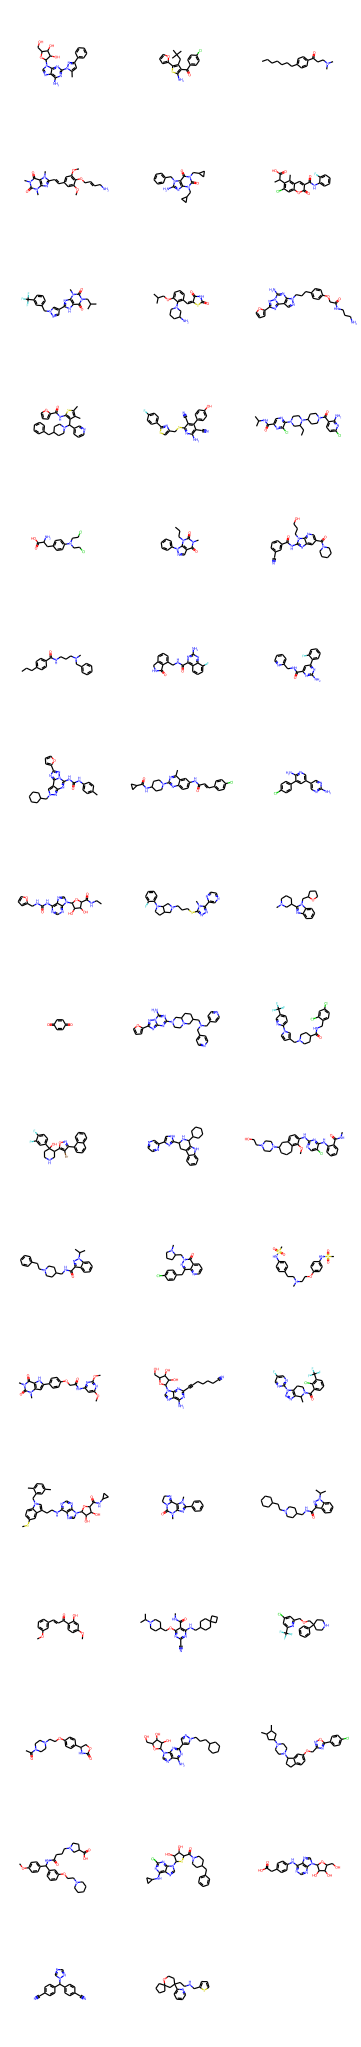

In [22]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in _ [:100]])

In [6]:
epoch_357_RL_OBJ4 = MODEL_PATH / "output/evolve_OBJ4_PR_220204_010742/evolve_PR_REG_OBJ4_1e-03.pkg"

In [8]:
rl_agent = Generator(voc)
rl_agent.load_state_dict(torch.load(epoch_357_RL_OBJ4))data:image/svg+xml,%3Csvg%20baseProfile%3D%22full%22%20height%3D%223400px%22%20version%3D%221.1%22%20viewBox%3D%220%200%20600%203400%22%20width%3D%22600px%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Ardkit%3D%22http%3A%2F%2Fwww.rdkit.org%2Fxml%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%3E%0A%3C!--%20END%20OF%20HEADER%20--%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Crect%20height%3D%223400.0%22%20style%3D%22opacity%3A1.0%3Bfill%3A%23FFFFFF%3Bstroke%3Anone%22%20width%3D%22600.0%22%20x%3D%220.0%22%20y%3D%220.0%22%3E%20%3C%2Frect%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2068.8%2C69.7%20L%2065.9%2C73.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2065.9%2C73.2%20L%2063.0%2C76.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2062.0%2C81.8%20L%2063.7%2C86.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2063.7%2C86.3%20L%2065.4%2C90.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2065.4%2C90.7%20L%2062.9%2C94.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2062.9%2C94.7%20L%2060.3%2C98.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2066.7%2C93.3%20L%2064.9%2C96.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2064.9%2C96.0%20L%2063.1%2C98.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-10%20atom-2%22%20d%3D%22M%2075.4%2C93.4%20L%2070.4%2C92.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-10%20atom-2%22%20d%3D%22M%2070.4%2C92.1%20L%2065.4%2C90.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2060.6%2C103.4%20L%2063.5%2C107.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2063.5%2C107.0%20L%2066.4%2C110.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2066.4%2C110.6%20L%2064.5%2C122.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2068.6%2C112.9%20L%2067.2%2C121.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-9%20atom-4%22%20d%3D%22M%2077.9%2C106.2%20L%2066.4%2C110.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%2064.5%2C122.8%20L%2074.0%2C130.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2074.0%2C130.6%20L%2085.5%2C126.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2074.9%2C127.6%20L%2082.9%2C124.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2085.5%2C126.2%20L%2087.5%2C114.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2087.5%2C114.0%20L%2077.9%2C106.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2084.5%2C114.8%20L%2077.8%2C109.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2077.9%2C106.2%20L%2077.7%2C101.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2077.7%2C101.3%20L%2077.4%2C96.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2079.2%2C92.4%20L%2083.1%2C89.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2083.1%2C89.3%20L%2086.9%2C86.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2086.9%2C86.2%20L%2098.4%2C90.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2097.2%2C90.9%20L%2097.9%2C95.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2097.9%2C95.7%20L%2098.7%2C100.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2099.6%2C90.5%20L%20100.4%2C95.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20100.4%2C95.3%20L%20101.1%2C100.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-12%20atom-14%22%20d%3D%22M%2098.4%2C90.7%20L%20102.2%2C87.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-12%20atom-14%22%20d%3D%22M%20102.2%2C87.6%20L%20106.0%2C84.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20109.9%2C83.7%20L%20114.7%2C85.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20114.7%2C85.5%20L%20119.4%2C87.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20119.4%2C87.4%20L%20123.7%2C84.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20123.7%2C84.6%20L%20127.9%2C81.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20122.0%2C88.6%20L%20125.0%2C86.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20125.0%2C86.7%20L%20127.9%2C84.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-22%20atom-15%22%20d%3D%22M%20122.0%2C96.8%20L%20120.7%2C92.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-22%20atom-15%22%20d%3D%22M%20120.7%2C92.1%20L%20119.4%2C87.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20131.7%2C82.2%20L%20135.5%2C85.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20135.5%2C85.3%20L%20139.3%2C88.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20139.3%2C88.4%20L%20134.9%2C99.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20136.4%2C89.3%20L%20133.3%2C97.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20134.9%2C99.9%20L%20141.6%2C110.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-18%20atom-22%22%20d%3D%22M%20134.9%2C99.9%20L%20129.6%2C99.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-18%20atom-22%22%20d%3D%22M%20129.6%2C99.6%20L%20124.3%2C99.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20141.6%2C111.5%20L%20146.7%2C111.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20146.7%2C111.2%20L%20151.7%2C111.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20141.5%2C109.0%20L%20146.5%2C108.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20146.5%2C108.8%20L%20151.6%2C108.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-21%22%20d%3D%22M%20141.6%2C110.3%20L%20139.4%2C114.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-21%22%20d%3D%22M%20139.4%2C114.5%20L%20137.2%2C118.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%2059.1%2079.3%20Q%2059.1%2078.2%2C%2059.6%2077.7%20Q%2060.1%2077.1%2C%2061.1%2077.1%20Q%2062.0%2077.1%2C%2062.5%2077.7%20Q%2063.0%2078.2%2C%2063.0%2079.3%20Q%2063.0%2080.3%2C%2062.5%2080.9%20Q%2062.0%2081.5%2C%2061.1%2081.5%20Q%2060.1%2081.5%2C%2059.6%2080.9%20Q%2059.1%2080.3%2C%2059.1%2079.3%20M%2061.1%2081.0%20Q%2061.7%2081.0%2C%2062.0%2080.6%20Q%2062.4%2080.1%2C%2062.4%2079.3%20Q%2062.4%2078.4%2C%2062.0%2078.0%20Q%2061.7%2077.6%2C%2061.1%2077.6%20Q%2060.4%2077.6%2C%2060.0%2078.0%20Q%2059.7%2078.4%2C%2059.7%2079.3%20Q%2059.7%2080.1%2C%2060.0%2080.6%20Q%2060.4%2081.0%2C%2061.1%2081.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%2057.8%2098.9%20L%2059.2%20101.2%20Q%2059.3%20101.4%2C%2059.5%20101.8%20Q%2059.8%20102.2%2C%2059.8%20102.2%20L%2059.8%2098.9%20L%2060.3%2098.9%20L%2060.3%20103.2%20L%2059.7%20103.2%20L%2058.3%20100.7%20Q%2058.1%20100.4%2C%2057.9%20100.1%20Q%2057.7%2099.8%2C%2057.7%2099.7%20L%2057.7%20103.2%20L%2057.1%20103.2%20L%2057.1%2098.9%20L%2057.8%2098.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%2076.4%2091.8%20L%2077.8%2094.1%20Q%2077.9%2094.3%2C%2078.1%2094.7%20Q%2078.4%2095.1%2C%2078.4%2095.1%20L%2078.4%2091.8%20L%2078.9%2091.8%20L%2078.9%2096.1%20L%2078.4%2096.1%20L%2076.9%2093.6%20Q%2076.7%2093.3%2C%2076.5%2093.0%20Q%2076.3%2092.7%2C%2076.3%2092.6%20L%2076.3%2096.1%20L%2075.7%2096.1%20L%2075.7%2091.8%20L%2076.4%2091.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-13%22%20d%3D%22M%2098.3%20102.8%20Q%2098.3%20101.8%2C%2098.8%20101.2%20Q%2099.3%20100.7%2C%20100.3%20100.7%20Q%20101.2%20100.7%2C%20101.7%20101.2%20Q%20102.2%20101.8%2C%20102.2%20102.8%20Q%20102.2%20103.9%2C%20101.7%20104.5%20Q%20101.2%20105.0%2C%20100.3%20105.0%20Q%2099.3%20105.0%2C%2098.8%20104.5%20Q%2098.3%20103.9%2C%2098.3%20102.8%20M%20100.3%20104.6%20Q%20100.9%20104.6%2C%20101.3%20104.1%20Q%20101.6%20103.7%2C%20101.6%20102.8%20Q%20101.6%20102.0%2C%20101.3%20101.6%20Q%20100.9%20101.2%2C%20100.3%20101.2%20Q%2099.6%20101.2%2C%2099.3%20101.6%20Q%2098.9%20102.0%2C%2098.9%20102.8%20Q%2098.9%20103.7%2C%2099.3%20104.1%20Q%2099.6%20104.6%2C%20100.3%20104.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20107.0%2080.8%20L%20108.4%2083.1%20Q%20108.6%2083.3%2C%20108.8%2083.7%20Q%20109.0%2084.1%2C%20109.0%2084.1%20L%20109.0%2080.8%20L%20109.6%2080.8%20L%20109.6%2085.1%20L%20109.0%2085.1%20L%20107.5%2082.6%20Q%20107.3%2082.3%2C%20107.1%2082.0%20Q%20107.0%2081.7%2C%20106.9%2081.6%20L%20106.9%2085.1%20L%20106.4%2085.1%20L%20106.4%2080.8%20L%20107.0%2080.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20106.3%2076.1%20L%20106.9%2076.1%20L%20106.9%2077.9%20L%20109.0%2077.9%20L%20109.0%2076.1%20L%20109.6%2076.1%20L%20109.6%2080.4%20L%20109.0%2080.4%20L%20109.0%2078.4%20L%20106.9%2078.4%20L%20106.9%2080.4%20L%20106.3%2080.4%20L%20106.3%2076.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20128.8%2078.6%20L%20130.2%2080.8%20Q%20130.4%2081.0%2C%20130.6%2081.4%20Q%20130.8%2081.8%2C%20130.8%2081.9%20L%20130.8%2078.6%20L%20131.4%2078.6%20L%20131.4%2082.8%20L%20130.8%2082.8%20L%20129.3%2080.3%20Q%20129.1%2080.1%2C%20129.0%2079.7%20Q%20128.8%2079.4%2C%20128.7%2079.3%20L%20128.7%2082.8%20L%20128.2%2082.8%20L%20128.2%2078.6%20L%20128.8%2078.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20151.9%20109.7%20Q%20151.9%20108.6%2C%20152.4%20108.1%20Q%20152.9%20107.5%2C%20153.9%20107.5%20Q%20154.8%20107.5%2C%20155.3%20108.1%20Q%20155.8%20108.6%2C%20155.8%20109.7%20Q%20155.8%20110.7%2C%20155.3%20111.3%20Q%20154.8%20111.9%2C%20153.9%20111.9%20Q%20152.9%20111.9%2C%20152.4%20111.3%20Q%20151.9%20110.7%2C%20151.9%20109.7%20M%20153.9%20111.4%20Q%20154.5%20111.4%2C%20154.9%20110.9%20Q%20155.2%20110.5%2C%20155.2%20109.7%20Q%20155.2%20108.8%2C%20154.9%20108.4%20Q%20154.5%20108.0%2C%20153.9%20108.0%20Q%20153.2%20108.0%2C%20152.9%20108.4%20Q%20152.5%20108.8%2C%20152.5%20109.7%20Q%20152.5%20110.5%2C%20152.9%20110.9%20Q%20153.2%20111.4%2C%20153.9%20111.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%20130.4%20119.1%20L%20131.0%20119.1%20L%20131.0%20120.9%20L%20133.1%20120.9%20L%20133.1%20119.1%20L%20133.7%20119.1%20L%20133.7%20123.4%20L%20133.1%20123.4%20L%20133.1%20121.4%20L%20131.0%20121.4%20L%20131.0%20123.4%20L%20130.4%20123.4%20L%20130.4%20119.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%20134.0%20121.2%20Q%20134.0%20120.2%2C%20134.5%20119.6%20Q%20135.0%20119.1%2C%20136.0%20119.1%20Q%20136.9%20119.1%2C%20137.4%20119.6%20Q%20137.9%20120.2%2C%20137.9%20121.2%20Q%20137.9%20122.3%2C%20137.4%20122.9%20Q%20136.9%20123.4%2C%20136.0%20123.4%20Q%20135.0%20123.4%2C%20134.5%20122.9%20Q%20134.0%20122.3%2C%20134.0%20121.2%20M%20136.0%20123.0%20Q%20136.6%20123.0%2C%20137.0%20122.5%20Q%20137.3%20122.1%2C%20137.3%20121.2%20Q%20137.3%20120.4%2C%20137.0%20120.0%20Q%20136.6%20119.6%2C%20136.0%20119.6%20Q%20135.3%20119.6%2C%20135.0%20120.0%20Q%20134.6%20120.4%2C%20134.6%20121.2%20Q%20134.6%20122.1%2C%20135.0%20122.5%20Q%20135.3%20123.0%2C%20136.0%20123.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20121.4%20100.7%20Q%20121.5%20100.7%2C%20121.7%20100.8%20Q%20121.9%20100.9%2C%20122.1%20101.0%20Q%20122.3%20101.0%2C%20122.5%20101.0%20Q%20122.9%20101.0%2C%20123.1%20100.8%20Q%20123.4%20100.6%2C%20123.4%20100.3%20Q%20123.4%20100.0%2C%20123.3%2099.9%20Q%20123.1%2099.8%2C%20123.0%2099.7%20Q%20122.8%2099.6%2C%20122.5%2099.5%20Q%20122.1%2099.4%2C%20121.9%2099.3%20Q%20121.7%2099.2%2C%20121.5%2099.0%20Q%20121.3%2098.7%2C%20121.3%2098.3%20Q%20121.3%2097.8%2C%20121.7%2097.5%20Q%20122.1%2097.1%2C%20122.8%2097.1%20Q%20123.3%2097.1%2C%20123.8%2097.4%20L%20123.7%2097.8%20Q%20123.2%2097.6%2C%20122.8%2097.6%20Q%20122.4%2097.6%2C%20122.2%2097.8%20Q%20121.9%2098.0%2C%20121.9%2098.3%20Q%20121.9%2098.5%2C%20122.0%2098.6%20Q%20122.2%2098.8%2C%20122.3%2098.8%20Q%20122.5%2098.9%2C%20122.8%2099.0%20Q%20123.2%2099.1%2C%20123.4%2099.3%20Q%20123.6%2099.4%2C%20123.8%2099.6%20Q%20124.0%2099.9%2C%20124.0%20100.3%20Q%20124.0%20100.9%2C%20123.6%20101.2%20Q%20123.2%20101.5%2C%20122.5%20101.5%20Q%20122.2%20101.5%2C%20121.9%20101.4%20Q%20121.6%20101.3%2C%20121.2%20101.2%20L%20121.4%20100.7%20%22%20fill%3D%22%23CCCC00%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20318.6%2C117.9%20L%20317.4%2C113.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20317.4%2C113.1%20L%20316.2%2C108.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20316.2%2C118.5%20L%20315.0%2C113.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20315.0%2C113.7%20L%20313.9%2C109.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20315.1%2C108.7%20L%20310.1%2C107.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20310.1%2C107.3%20L%20305.1%2C105.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-1%20atom-15%22%20d%3D%22M%20315.1%2C108.7%20L%20318.5%2C105.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-1%20atom-15%22%20d%3D%22M%20318.5%2C105.4%20L%20322.0%2C102.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20301.3%2C107.1%20L%20297.8%2C110.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20297.8%2C110.5%20L%20294.4%2C113.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20294.4%2C113.8%20L%20295.0%2C118.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20295.0%2C118.7%20L%20295.7%2C123.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20292.1%2C115.6%20L%20292.6%2C119.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20292.6%2C119.0%20L%20293.1%2C122.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-7%20atom-3%22%20d%3D%22M%20282.2%2C111.6%20L%20294.4%2C113.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20294.1%2C126.9%20L%20290.6%2C128.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20290.6%2C128.6%20L%20287.2%2C130.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20282.7%2C129.0%20L%20280.5%2C126.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20280.5%2C126.7%20L%20278.3%2C124.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20277.7%2C120.0%20L%20280.0%2C115.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20280.0%2C115.8%20L%20282.2%2C111.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20280.6%2C119.9%20L%20282.2%2C117.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20282.2%2C117.0%20L%20283.7%2C114.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20282.2%2C111.6%20L%20280.1%2C107.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20280.1%2C107.3%20L%20278.1%2C103.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20275.0%2C100.6%20L%20269.8%2C100.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20269.8%2C100.6%20L%20264.6%2C100.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-14%20atom-8%22%20d%3D%22M%20284.5%2C90.9%20L%20281.7%2C94.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-14%20atom-8%22%20d%3D%22M%20281.7%2C94.5%20L%20278.8%2C98.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20264.6%2C100.6%20L%20256.9%2C91.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20256.9%2C91.0%20L%20259.6%2C79.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20259.6%2C79.0%20L%20270.7%2C73.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20270.7%2C73.6%20L%20281.8%2C78.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20281.8%2C78.9%20L%20284.5%2C90.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20325.8%2C100.7%20L%20330.8%2C102.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20330.8%2C102.2%20L%20335.7%2C103.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-20%20atom-15%22%20d%3D%22M%20321.0%2C88.2%20L%20322.2%2C93.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-20%20atom-15%22%20d%3D%22M%20322.2%2C93.0%20L%20323.3%2C97.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20335.7%2C103.6%20L%20344.6%2C95.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20344.6%2C95.1%20L%20341.7%2C83.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20341.7%2C83.1%20L%20329.9%2C79.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20329.9%2C79.7%20L%20321.0%2C88.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20316.0%20120.7%20Q%20316.0%20119.6%2C%20316.5%20119.1%20Q%20317.1%20118.5%2C%20318.0%20118.5%20Q%20318.9%20118.5%2C%20319.4%20119.1%20Q%20319.9%20119.6%2C%20319.9%20120.7%20Q%20319.9%20121.7%2C%20319.4%20122.3%20Q%20318.9%20122.9%2C%20318.0%20122.9%20Q%20317.1%20122.9%2C%20316.5%20122.3%20Q%20316.0%20121.7%2C%20316.0%20120.7%20M%20318.0%20122.4%20Q%20318.6%20122.4%2C%20319.0%20121.9%20Q%20319.3%20121.5%2C%20319.3%20120.7%20Q%20319.3%20119.8%2C%20319.0%20119.4%20Q%20318.6%20119.0%2C%20318.0%20119.0%20Q%20317.3%20119.0%2C%20317.0%20119.4%20Q%20316.6%20119.8%2C%20316.6%20120.7%20Q%20316.6%20121.5%2C%20317.0%20121.9%20Q%20317.3%20122.4%2C%20318.0%20122.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20302.3%20103.1%20L%20303.7%20105.4%20Q%20303.8%20105.6%2C%20304.0%20106.0%20Q%20304.3%20106.4%2C%20304.3%20106.4%20L%20304.3%20103.1%20L%20304.8%20103.1%20L%20304.8%20107.4%20L%20304.3%20107.4%20L%20302.8%20104.9%20Q%20302.6%20104.6%2C%20302.4%20104.3%20Q%20302.2%20104.0%2C%20302.2%20103.9%20L%20302.2%20107.4%20L%20301.6%20107.4%20L%20301.6%20103.1%20L%20302.3%20103.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20301.6%2098.5%20L%20302.1%2098.5%20L%20302.1%20100.3%20L%20304.3%20100.3%20L%20304.3%2098.5%20L%20304.9%2098.5%20L%20304.9%20102.7%20L%20304.3%20102.7%20L%20304.3%20100.8%20L%20302.1%20100.8%20L%20302.1%20102.7%20L%20301.6%20102.7%20L%20301.6%2098.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20295.1%20123.9%20L%20296.5%20126.1%20Q%20296.6%20126.3%2C%20296.8%20126.7%20Q%20297.1%20127.1%2C%20297.1%20127.2%20L%20297.1%20123.9%20L%20297.6%20123.9%20L%20297.6%20128.1%20L%20297.1%20128.1%20L%20295.6%20125.7%20Q%20295.4%20125.4%2C%20295.2%20125.0%20Q%20295.0%20124.7%2C%20295.0%20124.6%20L%20295.0%20128.1%20L%20294.4%20128.1%20L%20294.4%20123.9%20L%20295.1%20123.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20283.0%20131.4%20Q%20283.0%20130.3%2C%20283.5%20129.8%20Q%20284.0%20129.2%2C%20285.0%20129.2%20Q%20285.9%20129.2%2C%20286.4%20129.8%20Q%20286.9%20130.3%2C%20286.9%20131.4%20Q%20286.9%20132.4%2C%20286.4%20133.0%20Q%20285.9%20133.6%2C%20285.0%20133.6%20Q%20284.0%20133.6%2C%20283.5%20133.0%20Q%20283.0%20132.4%2C%20283.0%20131.4%20M%20285.0%20133.1%20Q%20285.6%20133.1%2C%20286.0%20132.7%20Q%20286.3%20132.2%2C%20286.3%20131.4%20Q%20286.3%20130.5%2C%20286.0%20130.1%20Q%20285.6%20129.7%2C%20285.0%20129.7%20Q%20284.3%20129.7%2C%20284.0%20130.1%20Q%20283.6%20130.5%2C%20283.6%20131.4%20Q%20283.6%20132.2%2C%20284.0%20132.7%20Q%20284.3%20133.1%2C%20285.0%20133.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20275.5%20120.4%20L%20276.9%20122.6%20Q%20277.0%20122.8%2C%20277.2%20123.2%20Q%20277.5%20123.6%2C%20277.5%20123.7%20L%20277.5%20120.4%20L%20278.0%20120.4%20L%20278.0%20124.6%20L%20277.5%20124.6%20L%20276.0%20122.1%20Q%20275.8%20121.9%2C%20275.6%20121.5%20Q%20275.4%20121.2%2C%20275.4%20121.1%20L%20275.4%20124.6%20L%20274.8%20124.6%20L%20274.8%20120.4%20L%20275.5%20120.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20275.9%2098.4%20L%20277.3%20100.7%20Q%20277.5%20100.9%2C%20277.7%20101.3%20Q%20277.9%20101.7%2C%20277.9%20101.7%20L%20277.9%2098.4%20L%20278.5%2098.4%20L%20278.5%20102.7%20L%20277.9%20102.7%20L%20276.4%20100.2%20Q%20276.2%2099.9%2C%20276.0%2099.6%20Q%20275.9%2099.3%2C%20275.8%2099.2%20L%20275.8%20102.7%20L%20275.3%20102.7%20L%20275.3%2098.4%20L%20275.9%2098.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20323.0%2098.0%20L%20324.4%20100.3%20Q%20324.5%20100.5%2C%20324.7%20100.9%20Q%20325.0%20101.3%2C%20325.0%20101.3%20L%20325.0%2098.0%20L%20325.5%2098.0%20L%20325.5%20102.3%20L%20325.0%20102.3%20L%20323.5%2099.8%20Q%20323.3%2099.5%2C%20323.1%2099.2%20Q%20322.9%2098.9%2C%20322.9%2098.8%20L%20322.9%20102.3%20L%20322.3%20102.3%20L%20322.3%2098.0%20L%20323.0%2098.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20506.0%2C138.2%20L%20504.9%2C133.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20504.9%2C133.4%20L%20503.8%2C128.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20503.8%2C128.6%20L%20507.3%2C125.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20507.3%2C125.3%20L%20510.8%2C122.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20503.2%2C125.9%20L%20505.6%2C123.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20505.6%2C123.5%20L%20508.1%2C121.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-14%20atom-1%22%20d%3D%22M%20492.0%2C125.1%20L%20503.8%2C128.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20512.2%2C117.8%20L%20511.1%2C113.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20511.1%2C113.0%20L%20509.9%2C108.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20509.9%2C108.2%20L%20513.5%2C104.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20513.5%2C104.9%20L%20517.0%2C101.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20509.9%2C108.2%20L%20505.0%2C106.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20505.0%2C106.7%20L%20500.1%2C105.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20507.8%2C110.1%20L%20504.3%2C109.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20504.3%2C109.1%20L%20500.8%2C108.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20520.8%2C100.4%20L%20525.8%2C101.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20525.8%2C101.9%20L%20530.7%2C103.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20530.7%2C103.4%20L%20539.7%2C94.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20539.7%2C94.9%20L%20551.4%2C98.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20542.1%2C93.1%20L%20550.4%2C95.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-11%20atom-6%22%20d%3D%22M%20536.8%2C82.9%20L%20539.7%2C94.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20551.4%2C98.5%20L%20560.4%2C90.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20560.4%2C90.0%20L%20557.6%2C78.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20557.6%2C88.8%20L%20555.6%2C80.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20557.6%2C78.1%20L%20545.8%2C74.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20545.8%2C74.5%20L%20536.8%2C82.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20546.2%2C77.6%20L%20539.9%2C83.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20496.2%2C106.5%20L%20492.7%2C109.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20492.7%2C109.8%20L%20489.2%2C113.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20489.2%2C113.1%20L%20492.0%2C125.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20492.0%2C114.3%20L%20494.0%2C122.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-17%20atom-13%22%20d%3D%22M%20478.8%2C112.2%20L%20484.0%2C112.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-17%20atom-13%22%20d%3D%22M%20484.0%2C112.7%20L%20489.2%2C113.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20492.0%2C125.1%20L%20487.7%2C127.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20487.7%2C127.7%20L%20483.4%2C130.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20479.6%2C129.8%20L%20475.9%2C126.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20475.9%2C126.6%20L%20472.2%2C123.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20480.1%2C127.0%20L%20477.5%2C124.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20477.5%2C124.8%20L%20474.9%2C122.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20472.2%2C123.4%20L%20474.0%2C119.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20474.0%2C119.0%20L%20475.9%2C114.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20475.5%2C109.7%20L%20473.0%2C105.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20473.0%2C105.6%20L%20470.5%2C101.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20470.5%2C101.6%20L%20465.5%2C101.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20465.5%2C101.1%20L%20460.5%2C100.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-25%20atom-18%22%20d%3D%22M%20475.3%2C90.2%20L%20470.5%2C101.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20457.7%2C98.1%20L%20456.6%2C93.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20456.6%2C93.3%20L%20455.5%2C88.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20455.5%2C88.6%20L%20444.1%2C83.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-20%20atom-23%22%20d%3D%22M%20455.5%2C88.6%20L%20466.0%2C82.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20444.1%2C83.8%20L%20443.5%2C78.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20443.5%2C78.9%20L%20442.9%2C74.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20466.0%2C82.2%20L%20466.4%2C77.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20466.4%2C77.3%20L%20466.8%2C72.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-23%20atom-25%22%20d%3D%22M%20466.0%2C82.2%20L%20475.3%2C90.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20475.3%2C90.2%20L%20480.2%2C89.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20480.2%2C89.1%20L%20485.0%2C87.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20505.7%20138.5%20L%20507.1%20140.7%20Q%20507.2%20141.0%2C%20507.4%20141.4%20Q%20507.6%20141.8%2C%20507.7%20141.8%20L%20507.7%20138.5%20L%20508.2%20138.5%20L%20508.2%20142.7%20L%20507.6%20142.7%20L%20506.1%20140.3%20Q%20506.0%20140.0%2C%20505.8%20139.7%20Q%20505.6%20139.3%2C%20505.6%20139.2%20L%20505.6%20142.7%20L%20505.0%20142.7%20L%20505.0%20138.5%20L%20505.7%20138.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20508.7%20138.5%20L%20509.3%20138.5%20L%20509.3%20140.3%20L%20511.5%20140.3%20L%20511.5%20138.5%20L%20512.1%20138.5%20L%20512.1%20142.7%20L%20511.5%20142.7%20L%20511.5%20140.8%20L%20509.3%20140.8%20L%20509.3%20142.7%20L%20508.7%20142.7%20L%20508.7%20138.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20512.3%20142.6%20Q%20512.4%20142.3%2C%20512.6%20142.2%20Q%20512.9%20142.0%2C%20513.2%20142.0%20Q%20513.6%20142.0%2C%20513.9%20142.3%20Q%20514.1%20142.5%2C%20514.1%20142.9%20Q%20514.1%20143.3%2C%20513.8%20143.7%20Q%20513.5%20144.1%2C%20512.8%20144.6%20L%20514.1%20144.6%20L%20514.1%20144.9%20L%20512.3%20144.9%20L%20512.3%20144.6%20Q%20512.8%20144.2%2C%20513.1%20144.0%20Q%20513.4%20143.7%2C%20513.5%20143.4%20Q%20513.7%20143.2%2C%20513.7%20142.9%20Q%20513.7%20142.7%2C%20513.6%20142.5%20Q%20513.4%20142.4%2C%20513.2%20142.4%20Q%20513.0%20142.4%2C%20512.8%20142.4%20Q%20512.7%20142.5%2C%20512.6%20142.7%20L%20512.3%20142.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20511.8%20118.1%20L%20513.2%20120.3%20Q%20513.4%20120.6%2C%20513.6%20121.0%20Q%20513.8%20121.4%2C%20513.8%20121.4%20L%20513.8%20118.1%20L%20514.4%20118.1%20L%20514.4%20122.3%20L%20513.8%20122.3%20L%20512.3%20119.9%20Q%20512.1%20119.6%2C%20511.9%20119.3%20Q%20511.8%20118.9%2C%20511.7%20118.8%20L%20511.7%20122.3%20L%20511.2%20122.3%20L%20511.2%20118.1%20L%20511.8%20118.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20518.0%2097.7%20L%20519.4%2099.9%20Q%20519.5%20100.1%2C%20519.7%20100.6%20Q%20519.9%20101.0%2C%20520.0%20101.0%20L%20520.0%2097.7%20L%20520.5%2097.7%20L%20520.5%20101.9%20L%20519.9%20101.9%20L%20518.4%2099.5%20Q%20518.3%2099.2%2C%20518.1%2098.8%20Q%20517.9%2098.5%2C%20517.9%2098.4%20L%20517.9%20101.9%20L%20517.3%20101.9%20L%20517.3%2097.7%20L%20518.0%2097.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20517.3%2093.0%20L%20517.8%2093.0%20L%20517.8%2094.8%20L%20520.0%2094.8%20L%20520.0%2093.0%20L%20520.6%2093.0%20L%20520.6%2097.3%20L%20520.0%2097.3%20L%20520.0%2095.3%20L%20517.8%2095.3%20L%20517.8%2097.3%20L%20517.3%2097.3%20L%20517.3%2093.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20497.2%20102.6%20L%20498.6%20104.8%20Q%20498.8%20105.0%2C%20499.0%20105.4%20Q%20499.2%20105.8%2C%20499.2%20105.9%20L%20499.2%20102.6%20L%20499.8%20102.6%20L%20499.8%20106.8%20L%20499.2%20106.8%20L%20497.7%20104.3%20Q%20497.5%20104.1%2C%20497.3%20103.7%20Q%20497.2%20103.4%2C%20497.1%20103.3%20L%20497.1%20106.8%20L%20496.6%20106.8%20L%20496.6%20102.6%20L%20497.2%20102.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20480.5%20129.3%20L%20481.9%20131.6%20Q%20482.1%20131.8%2C%20482.3%20132.2%20Q%20482.5%20132.6%2C%20482.5%20132.6%20L%20482.5%20129.3%20L%20483.1%20129.3%20L%20483.1%20133.6%20L%20482.5%20133.6%20L%20481.0%20131.1%20Q%20480.8%20130.8%2C%20480.7%20130.5%20Q%20480.5%20130.2%2C%20480.4%20130.1%20L%20480.4%20133.6%20L%20479.9%20133.6%20L%20479.9%20129.3%20L%20480.5%20129.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%20476.0%20110.0%20L%20477.4%20112.2%20Q%20477.5%20112.4%2C%20477.7%20112.8%20Q%20478.0%20113.2%2C%20478.0%20113.3%20L%20478.0%20110.0%20L%20478.5%20110.0%20L%20478.5%20114.2%20L%20478.0%20114.2%20L%20476.5%20111.7%20Q%20476.3%20111.5%2C%20476.1%20111.1%20Q%20475.9%20110.8%2C%20475.9%20110.7%20L%20475.9%20114.2%20L%20475.3%20114.2%20L%20475.3%20110.0%20L%20476.0%20110.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20456.3%20100.5%20Q%20456.3%2099.5%2C%20456.8%2099.0%20Q%20457.3%2098.4%2C%20458.3%2098.4%20Q%20459.2%2098.4%2C%20459.7%2099.0%20Q%20460.2%2099.5%2C%20460.2%20100.5%20Q%20460.2%20101.6%2C%20459.7%20102.2%20Q%20459.2%20102.8%2C%20458.3%20102.8%20Q%20457.3%20102.8%2C%20456.8%20102.2%20Q%20456.3%20101.6%2C%20456.3%20100.5%20M%20458.3%20102.3%20Q%20458.9%20102.3%2C%20459.3%20101.8%20Q%20459.6%20101.4%2C%20459.6%20100.5%20Q%20459.6%2099.7%2C%20459.3%2099.3%20Q%20458.9%2098.9%2C%20458.3%2098.9%20Q%20457.6%2098.9%2C%20457.3%2099.3%20Q%20456.9%2099.7%2C%20456.9%20100.5%20Q%20456.9%20101.4%2C%20457.3%20101.8%20Q%20457.6%20102.3%2C%20458.3%20102.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20440.6%2071.6%20Q%20440.6%2070.6%2C%20441.1%2070.0%20Q%20441.6%2069.4%2C%20442.6%2069.4%20Q%20443.5%2069.4%2C%20444.0%2070.0%20Q%20444.5%2070.6%2C%20444.5%2071.6%20Q%20444.5%2072.6%2C%20444.0%2073.2%20Q%20443.5%2073.8%2C%20442.6%2073.8%20Q%20441.6%2073.8%2C%20441.1%2073.2%20Q%20440.6%2072.6%2C%20440.6%2071.6%20M%20442.6%2073.3%20Q%20443.2%2073.3%2C%20443.6%2072.9%20Q%20443.9%2072.4%2C%20443.9%2071.6%20Q%20443.9%2070.8%2C%20443.6%2070.3%20Q%20443.2%2069.9%2C%20442.6%2069.9%20Q%20441.9%2069.9%2C%20441.6%2070.3%20Q%20441.2%2070.8%2C%20441.2%2071.6%20Q%20441.2%2072.5%2C%20441.6%2072.9%20Q%20441.9%2073.3%2C%20442.6%2073.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20445.0%2069.5%20L%20445.6%2069.5%20L%20445.6%2071.3%20L%20447.8%2071.3%20L%20447.8%2069.5%20L%20448.4%2069.5%20L%20448.4%2073.7%20L%20447.8%2073.7%20L%20447.8%2071.8%20L%20445.6%2071.8%20L%20445.6%2073.7%20L%20445.0%2073.7%20L%20445.0%2069.5%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-24%22%20d%3D%22M%20465.1%2069.9%20Q%20465.1%2068.9%2C%20465.6%2068.3%20Q%20466.1%2067.8%2C%20467.0%2067.8%20Q%20468.0%2067.8%2C%20468.5%2068.3%20Q%20469.0%2068.9%2C%20469.0%2069.9%20Q%20469.0%2071.0%2C%20468.5%2071.5%20Q%20467.9%2072.1%2C%20467.0%2072.1%20Q%20466.1%2072.1%2C%20465.6%2071.5%20Q%20465.1%2071.0%2C%20465.1%2069.9%20M%20467.0%2071.6%20Q%20467.7%2071.6%2C%20468.0%2071.2%20Q%20468.4%2070.8%2C%20468.4%2069.9%20Q%20468.4%2069.1%2C%20468.0%2068.7%20Q%20467.7%2068.2%2C%20467.0%2068.2%20Q%20466.4%2068.2%2C%20466.0%2068.7%20Q%20465.7%2069.1%2C%20465.7%2069.9%20Q%20465.7%2070.8%2C%20466.0%2071.2%20Q%20466.4%2071.6%2C%20467.0%2071.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-24%22%20d%3D%22M%20469.5%2067.8%20L%20470.1%2067.8%20L%20470.1%2069.6%20L%20472.2%2069.6%20L%20472.2%2067.8%20L%20472.8%2067.8%20L%20472.8%2072.1%20L%20472.2%2072.1%20L%20472.2%2070.1%20L%20470.1%2070.1%20L%20470.1%2072.1%20L%20469.5%2072.1%20L%20469.5%2067.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-26%22%20d%3D%22M%20485.3%2087.4%20Q%20485.3%2086.4%2C%20485.8%2085.8%20Q%20486.4%2085.2%2C%20487.3%2085.2%20Q%20488.2%2085.2%2C%20488.7%2085.8%20Q%20489.2%2086.4%2C%20489.2%2087.4%20Q%20489.2%2088.4%2C%20488.7%2089.0%20Q%20488.2%2089.6%2C%20487.3%2089.6%20Q%20486.4%2089.6%2C%20485.8%2089.0%20Q%20485.3%2088.4%2C%20485.3%2087.4%20M%20487.3%2089.1%20Q%20487.9%2089.1%2C%20488.3%2088.7%20Q%20488.6%2088.3%2C%20488.6%2087.4%20Q%20488.6%2086.6%2C%20488.3%2086.2%20Q%20487.9%2085.7%2C%20487.3%2085.7%20Q%20486.6%2085.7%2C%20486.3%2086.1%20Q%20485.9%2086.6%2C%20485.9%2087.4%20Q%20485.9%2088.3%2C%20486.3%2088.7%20Q%20486.6%2089.1%2C%20487.3%2089.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-26%22%20d%3D%22M%20489.8%2085.3%20L%20490.3%2085.3%20L%20490.3%2087.1%20L%20492.5%2087.1%20L%20492.5%2085.3%20L%20493.1%2085.3%20L%20493.1%2089.5%20L%20492.5%2089.5%20L%20492.5%2087.6%20L%20490.3%2087.6%20L%20490.3%2089.5%20L%20489.8%2089.5%20L%20489.8%2085.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2030.8%2C322.1%20L%2038.9%2C312.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2038.9%2C312.9%20L%2051.0%2C315.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2051.0%2C315.2%20L%2053.0%2C319.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2053.0%2C319.6%20L%2055.1%2C324.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2053.8%2C315.5%20L%2055.3%2C318.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2055.3%2C318.6%20L%2056.7%2C321.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-37%20atom-30%20atom-2%22%20d%3D%22M%2058.1%2C308.6%20L%2054.5%2C311.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-37%20atom-30%20atom-2%22%20d%3D%22M%2054.5%2C311.9%20L%2051.0%2C315.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2058.1%2C326.2%20L%2063.2%2C325.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2063.2%2C325.5%20L%2068.4%2C324.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2068.4%2C324.9%20L%2070.8%2C312.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2066.3%2C322.6%20L%2068.0%2C314.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%2070.8%2C312.8%20L%2081.9%2C307.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-5%20atom-30%22%20d%3D%22M%2070.8%2C312.8%20L%2066.4%2C310.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-5%20atom-30%22%20d%3D%22M%2066.4%2C310.4%20L%2061.9%2C307.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2081.2%2C308.7%20L%2085.1%2C311.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2085.1%2C311.4%20L%2089.0%2C314.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2082.6%2C306.7%20L%2086.5%2C309.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2086.5%2C309.4%20L%2090.5%2C312.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-6%20atom-8%22%20d%3D%22M%2081.9%2C307.7%20L%2082.4%2C302.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-6%20atom-8%22%20d%3D%22M%2082.4%2C302.7%20L%2082.8%2C297.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2081.1%2C293.7%20L%2077.4%2C290.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2077.4%2C290.5%20L%2073.8%2C287.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-39%20atom-12%20atom-8%22%20d%3D%22M%2093.6%2C289.1%20L%2089.3%2C291.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-39%20atom-12%20atom-8%22%20d%3D%22M%2089.3%2C291.7%20L%2084.9%2C294.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2073.8%2C287.3%20L%2078.6%2C276.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2078.6%2C276.0%20L%2090.8%2C277.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2090.8%2C277.1%20L%2093.6%2C289.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2093.6%2C289.1%20L%20104.9%2C293.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20105.7%2C294.9%20L%20109.4%2C292.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20109.4%2C292.1%20L%20113.2%2C289.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20104.2%2C292.9%20L%20108.0%2C290.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20108.0%2C290.1%20L%20111.8%2C287.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-13%20atom-15%22%20d%3D%22M%20104.9%2C293.9%20L%20105.5%2C298.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-13%20atom-15%22%20d%3D%22M%20105.5%2C298.8%20L%20106.1%2C303.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20108.3%2C307.0%20L%20113.0%2C309.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20113.0%2C309.0%20L%20117.7%2C311.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20117.7%2C311.0%20L%20119.2%2C323.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20120.4%2C312.5%20L%20121.4%2C321.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-40%20atom-29%20atom-16%22%20d%3D%22M%20125.6%2C305.0%20L%20121.7%2C308.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-40%20atom-29%20atom-16%22%20d%3D%22M%20121.7%2C308.0%20L%20117.7%2C311.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20119.2%2C323.2%20L%20130.5%2C328.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20130.5%2C328.0%20L%20140.3%2C320.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20130.5%2C324.9%20L%20137.4%2C319.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20140.3%2C320.6%20L%20138.9%2C308.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20138.9%2C308.4%20L%20148.7%2C301.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-20%20atom-29%22%20d%3D%22M%20138.9%2C308.4%20L%20134.2%2C306.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-20%20atom-29%22%20d%3D%22M%20134.2%2C306.4%20L%20129.5%2C304.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-20%20atom-29%22%20d%3D%22M%20136.5%2C310.1%20L%20133.2%2C308.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-20%20atom-29%22%20d%3D%22M%20133.2%2C308.7%20L%20129.9%2C307.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20148.7%2C301.0%20L%20153.4%2C303.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20153.4%2C303.0%20L%20158.1%2C305.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20162.0%2C304.4%20L%20165.9%2C301.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20165.9%2C301.4%20L%20169.9%2C298.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20169.9%2C298.5%20L%20174.6%2C300.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20174.6%2C300.5%20L%20179.3%2C302.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20172.3%2C296.8%20L%20175.5%2C298.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20175.5%2C298.2%20L%20178.8%2C299.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-41%20atom-28%20atom-23%22%20d%3D%22M%20168.7%2C288.7%20L%20169.3%2C293.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-41%20atom-28%20atom-23%22%20d%3D%22M%20169.3%2C293.6%20L%20169.9%2C298.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20183.1%2C301.9%20L%20187.1%2C298.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20187.1%2C298.9%20L%20191.0%2C295.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20191.0%2C295.9%20L%20189.6%2C283.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20188.4%2C294.4%20L%20187.3%2C285.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20189.6%2C283.7%20L%20178.2%2C278.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20178.2%2C278.9%20L%20174.3%2C281.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20174.3%2C281.8%20L%20170.3%2C284.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20178.5%2C281.7%20L%20175.8%2C283.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20175.8%2C283.8%20L%20173.0%2C285.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%2059.7%2C304.4%20L%2059.1%2C299.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%2059.1%2C299.5%20L%2058.5%2C294.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-31%20atom-32%22%20d%3D%22M%2058.5%2C294.6%20L%2047.2%2C289.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-32%20atom-33%22%20d%3D%22M%2047.2%2C289.8%20L%2045.7%2C277.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-32%20atom-33%22%20d%3D%22M%2044.6%2C288.3%20L%2043.5%2C279.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-38%20atom-37%20atom-32%22%20d%3D%22M%2037.4%2C297.2%20L%2047.2%2C289.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-33%20atom-33%20atom-34%22%20d%3D%22M%2045.7%2C277.6%20L%2034.4%2C272.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-34%20atom-34%20atom-35%22%20d%3D%22M%2034.4%2C272.8%20L%2024.6%2C280.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-34%20atom-34%20atom-35%22%20d%3D%22M%2034.4%2C275.8%20L%2027.5%2C281.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-35%20atom-35%20atom-36%22%20d%3D%22M%2024.6%2C280.1%20L%2026.1%2C292.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-36%20atom-36%20atom-37%22%20d%3D%22M%2026.1%2C292.4%20L%2037.4%2C297.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-36%20atom-36%20atom-37%22%20d%3D%22M%2028.7%2C290.8%20L%2036.6%2C294.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%2055.2%20324.3%20L%2056.6%20326.5%20Q%2056.8%20326.7%2C%2057.0%20327.1%20Q%2057.2%20327.5%2C%2057.2%20327.6%20L%2057.2%20324.3%20L%2057.8%20324.3%20L%2057.8%20328.5%20L%2057.2%20328.5%20L%2055.7%20326.1%20Q%2055.5%20325.8%2C%2055.4%20325.4%20Q%2055.2%20325.1%2C%2055.1%20325.0%20L%2055.1%20328.5%20L%2054.6%20328.5%20L%2054.6%20324.3%20L%2055.2%20324.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%2090.1%20314.8%20Q%2090.1%20313.7%2C%2090.6%20313.2%20Q%2091.1%20312.6%2C%2092.0%20312.6%20Q%2092.9%20312.6%2C%2093.4%20313.2%20Q%2094.0%20313.7%2C%2094.0%20314.8%20Q%2094.0%20315.8%2C%2093.4%20316.4%20Q%2092.9%20317.0%2C%2092.0%20317.0%20Q%2091.1%20317.0%2C%2090.6%20316.4%20Q%2090.1%20315.8%2C%2090.1%20314.8%20M%2092.0%20316.5%20Q%2092.7%20316.5%2C%2093.0%20316.0%20Q%2093.4%20315.6%2C%2093.4%20314.8%20Q%2093.4%20313.9%2C%2093.0%20313.5%20Q%2092.7%20313.1%2C%2092.0%20313.1%20Q%2091.4%20313.1%2C%2091.0%20313.5%20Q%2090.7%20313.9%2C%2090.7%20314.8%20Q%2090.7%20315.6%2C%2091.0%20316.0%20Q%2091.4%20316.5%2C%2092.0%20316.5%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%2082.1%20293.3%20L%2083.5%20295.5%20Q%2083.6%20295.8%2C%2083.8%20296.2%20Q%2084.1%20296.6%2C%2084.1%20296.6%20L%2084.1%20293.3%20L%2084.6%20293.3%20L%2084.6%20297.5%20L%2084.1%20297.5%20L%2082.6%20295.1%20Q%2082.4%20294.8%2C%2082.2%20294.4%20Q%2082.0%20294.1%2C%2082.0%20294.0%20L%2082.0%20297.5%20L%2081.4%20297.5%20L%2081.4%20293.3%20L%2082.1%20293.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20112.8%20286.5%20Q%20112.8%20285.5%2C%20113.3%20284.9%20Q%20113.8%20284.4%2C%20114.8%20284.4%20Q%20115.7%20284.4%2C%20116.2%20284.9%20Q%20116.7%20285.5%2C%20116.7%20286.5%20Q%20116.7%20287.6%2C%20116.2%20288.2%20Q%20115.7%20288.7%2C%20114.8%20288.7%20Q%20113.8%20288.7%2C%20113.3%20288.2%20Q%20112.8%20287.6%2C%20112.8%20286.5%20M%20114.8%20288.3%20Q%20115.4%20288.3%2C%20115.8%20287.8%20Q%20116.1%20287.4%2C%20116.1%20286.5%20Q%20116.1%20285.7%2C%20115.8%20285.3%20Q%20115.4%20284.9%2C%20114.8%20284.9%20Q%20114.1%20284.9%2C%20113.8%20285.3%20Q%20113.4%20285.7%2C%20113.4%20286.5%20Q%20113.4%20287.4%2C%20113.8%20287.8%20Q%20114.1%20288.3%2C%20114.8%20288.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20101.0%20304.0%20L%20101.5%20304.0%20L%20101.5%20305.8%20L%20103.7%20305.8%20L%20103.7%20304.0%20L%20104.3%20304.0%20L%20104.3%20308.3%20L%20103.7%20308.3%20L%20103.7%20306.3%20L%20101.5%20306.3%20L%20101.5%20308.3%20L%20101.0%20308.3%20L%20101.0%20304.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20105.4%20304.0%20L%20106.8%20306.3%20Q%20107.0%20306.5%2C%20107.2%20306.9%20Q%20107.4%20307.3%2C%20107.4%20307.3%20L%20107.4%20304.0%20L%20108.0%20304.0%20L%20108.0%20308.3%20L%20107.4%20308.3%20L%20105.9%20305.8%20Q%20105.7%20305.5%2C%20105.6%20305.2%20Q%20105.4%20304.8%2C%20105.3%20304.7%20L%20105.3%20308.3%20L%20104.8%20308.3%20L%20104.8%20304.0%20L%20105.4%20304.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20159.1%20303.7%20L%20160.5%20306.0%20Q%20160.6%20306.2%2C%20160.8%20306.6%20Q%20161.1%20307.0%2C%20161.1%20307.0%20L%20161.1%20303.7%20L%20161.6%20303.7%20L%20161.6%20308.0%20L%20161.1%20308.0%20L%20159.6%20305.5%20Q%20159.4%20305.2%2C%20159.2%20304.9%20Q%20159.0%20304.6%2C%20159.0%20304.5%20L%20159.0%20308.0%20L%20158.4%20308.0%20L%20158.4%20303.7%20L%20159.1%20303.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20158.4%20308.4%20L%20158.9%20308.4%20L%20158.9%20310.2%20L%20161.1%20310.2%20L%20161.1%20308.4%20L%20161.7%20308.4%20L%20161.7%20312.6%20L%20161.1%20312.6%20L%20161.1%20310.7%20L%20158.9%20310.7%20L%20158.9%20312.6%20L%20158.4%20312.6%20L%20158.4%20308.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-24%22%20d%3D%22M%20180.3%20301.2%20L%20181.7%20303.4%20Q%20181.8%20303.6%2C%20182.0%20304.0%20Q%20182.2%20304.4%2C%20182.2%20304.5%20L%20182.2%20301.2%20L%20182.8%20301.2%20L%20182.8%20305.4%20L%20182.2%20305.4%20L%20180.7%20303.0%20Q%20180.6%20302.7%2C%20180.4%20302.3%20Q%20180.2%20302.0%2C%20180.1%20301.9%20L%20180.1%20305.4%20L%20179.6%20305.4%20L%20179.6%20301.2%20L%20180.3%20301.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-28%22%20d%3D%22M%20167.5%20284.1%20L%20168.9%20286.4%20Q%20169.0%20286.6%2C%20169.2%20287.0%20Q%20169.4%20287.4%2C%20169.4%20287.4%20L%20169.4%20284.1%20L%20170.0%20284.1%20L%20170.0%20288.4%20L%20169.4%20288.4%20L%20167.9%20285.9%20Q%20167.8%20285.6%2C%20167.6%20285.3%20Q%20167.4%20285.0%2C%20167.3%20284.9%20L%20167.3%20288.4%20L%20166.8%20288.4%20L%20166.8%20284.1%20L%20167.5%20284.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-29%22%20d%3D%22M%20126.6%20301.5%20L%20128.0%20303.7%20Q%20128.1%20303.9%2C%20128.4%20304.3%20Q%20128.6%20304.7%2C%20128.6%20304.8%20L%20128.6%20301.5%20L%20129.2%20301.5%20L%20129.2%20305.7%20L%20128.6%20305.7%20L%20127.1%20303.2%20Q%20126.9%20303.0%2C%20126.7%20302.6%20Q%20126.5%20302.3%2C%20126.5%20302.2%20L%20126.5%20305.7%20L%20125.9%20305.7%20L%20125.9%20301.5%20L%20126.6%20301.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-30%22%20d%3D%22M%2059.1%20304.7%20L%2060.5%20307.0%20Q%2060.6%20307.2%2C%2060.8%20307.6%20Q%2061.1%20308.0%2C%2061.1%20308.0%20L%2061.1%20304.7%20L%2061.6%20304.7%20L%2061.6%20309.0%20L%2061.0%20309.0%20L%2059.6%20306.5%20Q%2059.4%20306.2%2C%2059.2%20305.9%20Q%2059.0%20305.6%2C%2059.0%20305.5%20L%2059.0%20309.0%20L%2058.4%20309.0%20L%2058.4%20304.7%20L%2059.1%20304.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20353.7%2C315.7%20L%20349.3%2C313.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20349.3%2C313.1%20L%20345.0%2C310.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20341.1%2C310.6%20L%20336.7%2C313.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20336.7%2C313.1%20L%20332.3%2C315.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-24%20atom-1%22%20d%3D%22M%20343.1%2C297.2%20L%20343.1%2C302.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-24%20atom-1%22%20d%3D%22M%20343.1%2C302.1%20L%20343.1%2C307.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20331.1%2C315.6%20L%20331.1%2C320.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20331.1%2C320.5%20L%20331.1%2C325.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20333.6%2C315.6%20L%20333.6%2C320.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20333.6%2C320.5%20L%20333.5%2C325.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-2%20atom-4%22%20d%3D%22M%20332.3%2C315.6%20L%20321.7%2C309.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20321.7%2C309.4%20L%20316.8%2C310.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20316.8%2C310.9%20L%20311.9%2C312.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-21%20atom-4%22%20d%3D%22M%20321.8%2C297.0%20L%20321.7%2C309.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-21%20atom-4%22%20d%3D%22M%20324.2%2C298.9%20L%20324.2%2C307.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20308.2%2C310.7%20L%20305.5%2C306.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20305.5%2C306.9%20L%20302.8%2C303.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20302.8%2C303.1%20L%20290.5%2C303.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-6%20atom-20%22%20d%3D%22M%20302.8%2C303.1%20L%20305.6%2C299.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-6%20atom-20%22%20d%3D%22M%20305.6%2C299.4%20L%20308.3%2C295.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-6%20atom-20%22%20d%3D%22M%20305.6%2C303.4%20L%20307.6%2C300.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-6%20atom-20%22%20d%3D%22M%20307.6%2C300.8%20L%20309.5%2C298.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20290.5%2C303.0%20L%20284.4%2C292.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20284.4%2C292.3%20L%20290.6%2C281.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20283.2%2C289.5%20L%20287.6%2C282.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-13%20atom-8%22%20d%3D%22M%20272.1%2C292.3%20L%20284.4%2C292.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20290.6%2C281.7%20L%20284.5%2C271.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20284.5%2C271.0%20L%20272.2%2C271.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20282.7%2C273.5%20L%20274.1%2C273.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20272.2%2C271.0%20L%20266.0%2C281.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20266.0%2C281.6%20L%20272.1%2C292.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20269.1%2C282.0%20L%20273.3%2C289.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20272.1%2C292.3%20L%20269.7%2C296.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20269.7%2C296.4%20L%20267.3%2C300.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20263.6%2C302.9%20L%20258.6%2C302.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20258.6%2C302.9%20L%20253.6%2C302.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20253.6%2C302.8%20L%20247.4%2C313.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20247.4%2C313.5%20L%20245.0%2C317.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20245.0%2C317.5%20L%20242.6%2C321.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-16%20atom-18%22%20d%3D%22M%20247.4%2C313.5%20L%20242.8%2C310.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-16%20atom-18%22%20d%3D%22M%20242.8%2C310.8%20L%20238.3%2C308.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-16%20atom-19%22%20d%3D%22M%20247.4%2C313.5%20L%20251.9%2C316.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-16%20atom-19%22%20d%3D%22M%20251.9%2C316.1%20L%20256.4%2C318.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20312.0%2C293.8%20L%20316.9%2C295.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20316.9%2C295.4%20L%20321.8%2C297.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20321.8%2C297.0%20L%20326.2%2C294.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20326.2%2C294.5%20L%20330.6%2C292.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20332.5%2C288.5%20L%20332.5%2C283.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20332.5%2C283.6%20L%20332.5%2C278.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-22%20atom-24%22%20d%3D%22M%20334.4%2C292.1%20L%20338.8%2C294.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-22%20atom-24%22%20d%3D%22M%20338.8%2C294.6%20L%20343.1%2C297.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20343.7%2C298.2%20L%20347.9%2C295.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20347.9%2C295.8%20L%20352.1%2C293.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20342.5%2C296.1%20L%20346.7%2C293.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20346.7%2C293.7%20L%20350.9%2C291.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20342.1%20307.3%20L%20343.5%20309.6%20Q%20343.6%20309.8%2C%20343.9%20310.2%20Q%20344.1%20310.6%2C%20344.1%20310.6%20L%20344.1%20307.3%20L%20344.6%20307.3%20L%20344.6%20311.6%20L%20344.1%20311.6%20L%20342.6%20309.1%20Q%20342.4%20308.8%2C%20342.2%20308.5%20Q%20342.0%20308.2%2C%20342.0%20308.1%20L%20342.0%20311.6%20L%20341.4%20311.6%20L%20341.4%20307.3%20L%20342.1%20307.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20330.3%20327.9%20Q%20330.3%20326.9%2C%20330.8%20326.3%20Q%20331.3%20325.7%2C%20332.3%20325.7%20Q%20333.2%20325.7%2C%20333.7%20326.3%20Q%20334.2%20326.9%2C%20334.2%20327.9%20Q%20334.2%20328.9%2C%20333.7%20329.5%20Q%20333.2%20330.1%2C%20332.3%20330.1%20Q%20331.3%20330.1%2C%20330.8%20329.5%20Q%20330.3%20328.9%2C%20330.3%20327.9%20M%20332.3%20329.6%20Q%20332.9%20329.6%2C%20333.3%20329.2%20Q%20333.6%20328.7%2C%20333.6%20327.9%20Q%20333.6%20327.0%2C%20333.3%20326.6%20Q%20332.9%20326.2%2C%20332.3%20326.2%20Q%20331.6%20326.2%2C%20331.3%20326.6%20Q%20330.9%20327.0%2C%20330.9%20327.9%20Q%20330.9%20328.7%2C%20331.3%20329.2%20Q%20331.6%20329.6%2C%20332.3%20329.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20309.1%20311.0%20L%20310.4%20313.2%20Q%20310.6%20313.4%2C%20310.8%20313.8%20Q%20311.0%20314.2%2C%20311.0%20314.3%20L%20311.0%20311.0%20L%20311.6%20311.0%20L%20311.6%20315.2%20L%20311.0%20315.2%20L%20309.5%20312.8%20Q%20309.4%20312.5%2C%20309.2%20312.1%20Q%20309.0%20311.8%2C%20308.9%20311.7%20L%20308.9%20315.2%20L%20308.4%20315.2%20L%20308.4%20311.0%20L%20309.1%20311.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20308.3%20315.6%20L%20308.9%20315.6%20L%20308.9%20317.4%20L%20311.1%20317.4%20L%20311.1%20315.6%20L%20311.7%20315.6%20L%20311.7%20319.9%20L%20311.1%20319.9%20L%20311.1%20317.9%20L%20308.9%20317.9%20L%20308.9%20319.9%20L%20308.3%20319.9%20L%20308.3%20315.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20263.9%20302.9%20Q%20263.9%20301.9%2C%20264.4%20301.3%20Q%20265.0%20300.7%2C%20265.9%20300.7%20Q%20266.8%20300.7%2C%20267.3%20301.3%20Q%20267.8%20301.9%2C%20267.8%20302.9%20Q%20267.8%20303.9%2C%20267.3%20304.5%20Q%20266.8%20305.1%2C%20265.9%20305.1%20Q%20265.0%20305.1%2C%20264.4%20304.5%20Q%20263.9%20303.9%2C%20263.9%20302.9%20M%20265.9%20304.6%20Q%20266.5%20304.6%2C%20266.9%20304.2%20Q%20267.2%20303.8%2C%20267.2%20302.9%20Q%20267.2%20302.1%2C%20266.9%20301.7%20Q%20266.5%20301.2%2C%20265.9%20301.2%20Q%20265.2%20301.2%2C%20264.9%20301.6%20Q%20264.5%20302.1%2C%20264.5%20302.9%20Q%20264.5%20303.8%2C%20264.9%20304.2%20Q%20265.2%20304.6%2C%20265.9%20304.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%20239.9%20322.0%20L%20242.4%20322.0%20L%20242.4%20322.4%20L%20240.5%20322.4%20L%20240.5%20323.7%20L%20242.2%20323.7%20L%20242.2%20324.2%20L%20240.5%20324.2%20L%20240.5%20326.2%20L%20239.9%20326.2%20L%20239.9%20322.0%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22atom-18%22%20d%3D%22M%20235.5%20305.1%20L%20238.0%20305.1%20L%20238.0%20305.6%20L%20236.1%20305.6%20L%20236.1%20306.9%20L%20237.8%20306.9%20L%20237.8%20307.4%20L%20236.1%20307.4%20L%20236.1%20309.4%20L%20235.5%20309.4%20L%20235.5%20305.1%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20256.7%20317.5%20L%20259.3%20317.5%20L%20259.3%20318.0%20L%20257.3%20318.0%20L%20257.3%20319.3%20L%20259.0%20319.3%20L%20259.0%20319.8%20L%20257.3%20319.8%20L%20257.3%20321.8%20L%20256.7%20321.8%20L%20256.7%20317.5%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20309.2%20291.1%20L%20310.6%20293.3%20Q%20310.7%20293.5%2C%20310.9%20293.9%20Q%20311.1%20294.3%2C%20311.2%20294.4%20L%20311.2%20291.1%20L%20311.7%20291.1%20L%20311.7%20295.3%20L%20311.1%20295.3%20L%20309.6%20292.8%20Q%20309.5%20292.6%2C%20309.3%20292.2%20Q%20309.1%20291.9%2C%20309.0%20291.8%20L%20309.0%20295.3%20L%20308.5%20295.3%20L%20308.5%20291.1%20L%20309.2%20291.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20331.5%20288.8%20L%20332.9%20291.1%20Q%20333.1%20291.3%2C%20333.3%20291.7%20Q%20333.5%20292.1%2C%20333.5%20292.1%20L%20333.5%20288.8%20L%20334.1%20288.8%20L%20334.1%20293.1%20L%20333.5%20293.1%20L%20332.0%20290.6%20Q%20331.8%20290.3%2C%20331.7%20290.0%20Q%20331.5%20289.7%2C%20331.4%20289.6%20L%20331.4%20293.1%20L%20330.9%20293.1%20L%20330.9%20288.8%20L%20331.5%20288.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-25%22%20d%3D%22M%20351.8%20291.1%20Q%20351.8%20290.1%2C%20352.4%20289.5%20Q%20352.9%20288.9%2C%20353.8%20288.9%20Q%20354.7%20288.9%2C%20355.2%20289.5%20Q%20355.7%20290.1%2C%20355.7%20291.1%20Q%20355.7%20292.1%2C%20355.2%20292.7%20Q%20354.7%20293.3%2C%20353.8%20293.3%20Q%20352.9%20293.3%2C%20352.4%20292.7%20Q%20351.8%20292.1%2C%20351.8%20291.1%20M%20353.8%20292.8%20Q%20354.4%20292.8%2C%20354.8%20292.4%20Q%20355.1%20291.9%2C%20355.1%20291.1%20Q%20355.1%20290.2%2C%20354.8%20289.8%20Q%20354.4%20289.4%2C%20353.8%20289.4%20Q%20353.1%20289.4%2C%20352.8%20289.8%20Q%20352.4%20290.2%2C%20352.4%20291.1%20Q%20352.4%20291.9%2C%20352.8%20292.4%20Q%20353.1%20292.8%2C%20353.8%20292.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20485.2%2C287.8%20L%20482.3%2C291.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20482.3%2C291.4%20L%20479.5%2C294.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20487.1%2C289.4%20L%20484.3%2C292.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20484.3%2C292.9%20L%20481.4%2C296.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20480.5%2C295.7%20L%20482.2%2C300.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20482.2%2C300.2%20L%20484.0%2C304.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-1%20atom-18%22%20d%3D%22M%20480.5%2C295.7%20L%20468.3%2C293.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20486.8%2C307.5%20L%20492.0%2C308.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20492.0%2C308.2%20L%20497.1%2C309.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20497.1%2C309.0%20L%20500.0%2C305.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20500.0%2C305.4%20L%20502.9%2C301.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20499.9%2C309.5%20L%20501.9%2C307.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20501.9%2C307.0%20L%20503.9%2C304.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-17%20atom-3%22%20d%3D%22M%20500.6%2C318.1%20L%20498.9%2C313.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-17%20atom-3%22%20d%3D%22M%20498.9%2C313.5%20L%20497.1%2C309.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20506.7%2C299.7%20L%20511.8%2C300.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20511.8%2C300.5%20L%20517.0%2C301.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20517.0%2C301.3%20L%20524.7%2C291.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-5%20atom-12%22%20d%3D%22M%20517.0%2C301.3%20L%20518.7%2C305.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-5%20atom-12%22%20d%3D%22M%20518.7%2C305.8%20L%20520.5%2C310.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-5%20atom-12%22%20d%3D%22M%20515.2%2C303.5%20L%20516.4%2C306.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-5%20atom-12%22%20d%3D%22M%20516.4%2C306.7%20L%20517.7%2C309.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20524.7%2C291.7%20L%20536.8%2C293.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20526.9%2C289.5%20L%20535.4%2C290.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-11%20atom-6%22%20d%3D%22M%20520.2%2C280.2%20L%20524.7%2C291.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20536.8%2C293.6%20L%20544.5%2C283.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20544.5%2C283.9%20L%20540.0%2C272.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20541.6%2C283.1%20L%20538.4%2C275.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20540.0%2C272.5%20L%20527.9%2C270.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20527.9%2C270.6%20L%20520.2%2C280.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20528.6%2C273.6%20L%20523.3%2C280.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20519.5%2C315.2%20L%20516.6%2C318.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20516.6%2C318.8%20L%20513.7%2C322.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20513.7%2C322.4%20L%20515.7%2C334.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20511.6%2C324.6%20L%20513.0%2C333.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-17%20atom-13%22%20d%3D%22M%20503.5%2C320.8%20L%20508.6%2C321.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-17%20atom-13%22%20d%3D%22M%20508.6%2C321.6%20L%20513.7%2C322.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20515.7%2C334.5%20L%20511.2%2C336.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20511.2%2C336.8%20L%20506.7%2C339.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20502.9%2C338.3%20L%20497.9%2C333.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20503.8%2C335.8%20L%20500.4%2C332.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20497.3%2C329.1%20L%20500.4%2C322.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20468.3%2C293.8%20L%20463.8%2C282.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20465.3%2C293.0%20L%20462.2%2C285.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-23%20atom-18%22%20d%3D%22M%20460.6%2C303.4%20L%20468.3%2C293.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20463.8%2C282.4%20L%20451.7%2C280.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20451.7%2C280.5%20L%20444.0%2C290.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20452.4%2C283.5%20L%20447.0%2C290.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20444.0%2C290.1%20L%20448.4%2C301.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20448.4%2C301.6%20L%20460.6%2C303.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20450.6%2C299.4%20L%20459.1%2C300.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20486.2%20286.1%20Q%20486.2%20285.1%2C%20486.7%20284.5%20Q%20487.2%20283.9%2C%20488.2%20283.9%20Q%20489.1%20283.9%2C%20489.6%20284.5%20Q%20490.1%20285.1%2C%20490.1%20286.1%20Q%20490.1%20287.1%2C%20489.6%20287.7%20Q%20489.1%20288.3%2C%20488.2%20288.3%20Q%20487.2%20288.3%2C%20486.7%20287.7%20Q%20486.2%20287.1%2C%20486.2%20286.1%20M%20488.2%20287.8%20Q%20488.8%20287.8%2C%20489.2%20287.4%20Q%20489.5%20287.0%2C%20489.5%20286.1%20Q%20489.5%20285.3%2C%20489.2%20284.9%20Q%20488.8%20284.4%2C%20488.2%20284.4%20Q%20487.5%20284.4%2C%20487.2%20284.8%20Q%20486.8%20285.3%2C%20486.8%20286.1%20Q%20486.8%20287.0%2C%20487.2%20287.4%20Q%20487.5%20287.8%2C%20488.2%20287.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20479.5%20305.0%20L%20480.1%20305.0%20L%20480.1%20306.8%20L%20482.2%20306.8%20L%20482.2%20305.0%20L%20482.8%20305.0%20L%20482.8%20309.3%20L%20482.2%20309.3%20L%20482.2%20307.3%20L%20480.1%20307.3%20L%20480.1%20309.3%20L%20479.5%20309.3%20L%20479.5%20305.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20484.0%20305.0%20L%20485.4%20307.3%20Q%20485.5%20307.5%2C%20485.7%20307.9%20Q%20486.0%20308.3%2C%20486.0%20308.3%20L%20486.0%20305.0%20L%20486.5%20305.0%20L%20486.5%20309.3%20L%20486.0%20309.3%20L%20484.5%20306.8%20Q%20484.3%20306.5%2C%20484.1%20306.2%20Q%20483.9%20305.9%2C%20483.9%20305.8%20L%20483.9%20309.3%20L%20483.3%20309.3%20L%20483.3%20305.0%20L%20484.0%20305.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20503.9%20297.3%20L%20505.2%20299.6%20Q%20505.4%20299.8%2C%20505.6%20300.2%20Q%20505.8%20300.6%2C%20505.8%20300.6%20L%20505.8%20297.3%20L%20506.4%20297.3%20L%20506.4%20301.6%20L%20505.8%20301.6%20L%20504.3%20299.1%20Q%20504.2%20298.8%2C%20504.0%20298.5%20Q%20503.8%20298.1%2C%20503.7%20298.0%20L%20503.7%20301.6%20L%20503.2%20301.6%20L%20503.2%20297.3%20L%20503.9%20297.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20520.5%20310.6%20L%20521.9%20312.9%20Q%20522.0%20313.1%2C%20522.2%20313.5%20Q%20522.5%20313.9%2C%20522.5%20313.9%20L%20522.5%20310.6%20L%20523.0%20310.6%20L%20523.0%20314.9%20L%20522.5%20314.9%20L%20521.0%20312.4%20Q%20520.8%20312.1%2C%20520.6%20311.8%20Q%20520.4%20311.5%2C%20520.4%20311.4%20L%20520.4%20314.9%20L%20519.8%20314.9%20L%20519.8%20310.6%20L%20520.5%20310.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20503.8%20338.0%20L%20505.2%20340.3%20Q%20505.4%20340.5%2C%20505.6%20340.9%20Q%20505.8%20341.3%2C%20505.8%20341.3%20L%20505.8%20338.0%20L%20506.4%20338.0%20L%20506.4%20342.3%20L%20505.8%20342.3%20L%20504.3%20339.8%20Q%20504.1%20339.5%2C%20504.0%20339.2%20Q%20503.8%20338.9%2C%20503.7%20338.8%20L%20503.7%20342.3%20L%20503.2%20342.3%20L%20503.2%20338.0%20L%20503.8%20338.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20495.1%20329.4%20L%20496.5%20331.6%20Q%20496.6%20331.8%2C%20496.8%20332.2%20Q%20497.1%20332.6%2C%20497.1%20332.7%20L%20497.1%20329.4%20L%20497.6%20329.4%20L%20497.6%20333.6%20L%20497.1%20333.6%20L%20495.6%20331.2%20Q%20495.4%20330.9%2C%20495.2%20330.5%20Q%20495.0%20330.2%2C%20495.0%20330.1%20L%20495.0%20333.6%20L%20494.4%20333.6%20L%20494.4%20329.4%20L%20495.1%20329.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%20500.6%20318.4%20L%20502.0%20320.6%20Q%20502.2%20320.8%2C%20502.4%20321.2%20Q%20502.6%20321.7%2C%20502.6%20321.7%20L%20502.6%20318.4%20L%20503.2%20318.4%20L%20503.2%20322.6%20L%20502.6%20322.6%20L%20501.1%20320.2%20Q%20500.9%20319.9%2C%20500.7%20319.5%20Q%20500.6%20319.2%2C%20500.5%20319.1%20L%20500.5%20322.6%20L%20500.0%20322.6%20L%20500.0%20318.4%20L%20500.6%20318.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2058.2%2C475.8%20L%2059.0%2C480.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2059.0%2C480.7%20L%2059.7%2C485.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2059.7%2C485.6%20L%2056.2%2C489.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2056.2%2C489.0%20L%2052.8%2C492.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2060.4%2C488.4%20L%2058.0%2C490.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2058.0%2C490.7%20L%2055.6%2C493.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-9%20atom-1%22%20d%3D%22M%2068.7%2C490.3%20L%2064.2%2C487.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-9%20atom-1%22%20d%3D%22M%2064.2%2C487.9%20L%2059.7%2C485.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2052.1%2C496.6%20L%2054.2%2C500.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2054.2%2C500.9%20L%2056.3%2C505.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2056.3%2C505.2%20L%2051.8%2C516.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2058.0%2C507.8%20L%2054.8%2C515.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-8%20atom-3%22%20d%3D%22M%2068.5%2C503.4%20L%2056.3%2C505.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2051.8%2C516.7%20L%2059.5%2C526.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%2059.5%2C526.3%20L%2071.6%2C524.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%2060.9%2C523.6%20L%2069.4%2C522.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2071.6%2C524.5%20L%2076.2%2C513.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2076.2%2C513.1%20L%2068.5%2C503.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2073.1%2C513.2%20L%2067.7%2C506.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2068.5%2C503.4%20L%2069.3%2C498.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2069.3%2C498.6%20L%2070.2%2C493.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2072.5%2C490.3%20L%2077.1%2C488.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2077.1%2C488.1%20L%2081.6%2C485.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2081.6%2C485.8%20L%2091.9%2C492.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2091.9%2C492.7%20L%20102.9%2C487.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20102.9%2C487.2%20L%20113.1%2C494.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20113.1%2C494.0%20L%20124.2%2C488.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20124.2%2C488.5%20L%20128.3%2C491.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20128.3%2C491.3%20L%20132.5%2C494.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20136.3%2C494.2%20L%20140.7%2C491.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20140.7%2C491.6%20L%20145.0%2C489.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-21%20atom-15%22%20d%3D%22M%20132.7%2C507.5%20L%20133.4%2C502.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-21%20atom-15%22%20d%3D%22M%20133.4%2C502.7%20L%20134.1%2C497.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20145.0%2C489.1%20L%20156.5%2C493.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20156.5%2C493.4%20L%20160.3%2C505.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20160.3%2C505.2%20L%20153.4%2C515.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20153.4%2C515.4%20L%20141.2%2C516.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20141.2%2C516.5%20L%20132.7%2C507.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%2057.0%20471.3%20L%2058.3%20473.5%20Q%2058.5%20473.8%2C%2058.7%20474.2%20Q%2058.9%20474.6%2C%2058.9%20474.6%20L%2058.9%20471.3%20L%2059.5%20471.3%20L%2059.5%20475.5%20L%2058.9%20475.5%20L%2057.4%20473.1%20Q%2057.3%20472.8%2C%2057.1%20472.5%20Q%2056.9%20472.1%2C%2056.8%20472.0%20L%2056.8%20475.5%20L%2056.3%20475.5%20L%2056.3%20471.3%20L%2057.0%20471.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%2060.0%20471.3%20L%2060.6%20471.3%20L%2060.6%20473.1%20L%2062.8%20473.1%20L%2062.8%20471.3%20L%2063.3%20471.3%20L%2063.3%20475.5%20L%2062.8%20475.5%20L%2062.8%20473.6%20L%2060.6%20473.6%20L%2060.6%20475.5%20L%2060.0%20475.5%20L%2060.0%20471.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%2063.5%20475.4%20Q%2063.6%20475.1%2C%2063.9%20475.0%20Q%2064.1%20474.8%2C%2064.5%20474.8%20Q%2064.9%20474.8%2C%2065.1%20475.1%20Q%2065.4%20475.3%2C%2065.4%20475.7%20Q%2065.4%20476.1%2C%2065.1%20476.5%20Q%2064.8%20476.9%2C%2064.1%20477.3%20L%2065.4%20477.3%20L%2065.4%20477.7%20L%2063.5%20477.7%20L%2063.5%20477.4%20Q%2064.1%20477.0%2C%2064.4%20476.7%20Q%2064.7%20476.5%2C%2064.8%20476.2%20Q%2065.0%20476.0%2C%2065.0%20475.7%20Q%2065.0%20475.4%2C%2064.8%20475.3%20Q%2064.7%20475.1%2C%2064.5%20475.1%20Q%2064.2%20475.1%2C%2064.1%20475.2%20Q%2063.9%20475.3%2C%2063.8%20475.5%20L%2063.5%20475.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%2049.9%20492.1%20L%2051.3%20494.3%20Q%2051.5%20494.5%2C%2051.7%20494.9%20Q%2051.9%20495.4%2C%2051.9%20495.4%20L%2051.9%20492.1%20L%2052.5%20492.1%20L%2052.5%20496.3%20L%2051.9%20496.3%20L%2050.4%20493.9%20Q%2050.2%20493.6%2C%2050.1%20493.2%20Q%2049.9%20492.9%2C%2049.8%20492.8%20L%2049.8%20496.3%20L%2049.3%20496.3%20L%2049.3%20492.1%20L%2049.9%20492.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%2069.6%20489.2%20L%2071.0%20491.4%20Q%2071.2%20491.6%2C%2071.4%20492.1%20Q%2071.6%20492.5%2C%2071.6%20492.5%20L%2071.6%20489.2%20L%2072.2%20489.2%20L%2072.2%20493.4%20L%2071.6%20493.4%20L%2070.1%20491.0%20Q%2069.9%20490.7%2C%2069.8%20490.3%20Q%2069.6%20490.0%2C%2069.5%20489.9%20L%2069.5%20493.4%20L%2069.0%20493.4%20L%2069.0%20489.2%20L%2069.6%20489.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20133.5%20493.2%20L%20134.9%20495.5%20Q%20135.0%20495.7%2C%20135.2%20496.1%20Q%20135.4%20496.5%2C%20135.5%20496.5%20L%20135.5%20493.2%20L%20136.0%20493.2%20L%20136.0%20497.5%20L%20135.4%20497.5%20L%20133.9%20495.0%20Q%20133.8%20494.7%2C%20133.6%20494.4%20Q%20133.4%20494.1%2C%20133.3%20494.0%20L%20133.3%20497.5%20L%20132.8%20497.5%20L%20132.8%20493.2%20L%20133.5%20493.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20260.1%2C495.1%20L%20263.7%2C498.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20263.7%2C498.3%20L%20267.4%2C501.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20271.2%2C502.6%20L%20279.1%2C499.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20282.9%2C501.0%20L%20286.6%2C504.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20286.6%2C504.2%20L%20290.2%2C507.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20290.2%2C507.4%20L%20301.9%2C503.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20301.9%2C503.4%20L%20304.3%2C491.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20304.7%2C502.1%20L%20306.3%2C493.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-4%22%20d%3D%22M%20311.1%2C511.6%20L%20301.9%2C503.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20304.3%2C491.4%20L%20315.9%2C487.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20315.9%2C487.4%20L%20325.2%2C495.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20315.7%2C490.5%20L%20322.2%2C496.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20325.2%2C495.5%20L%20322.8%2C507.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20322.8%2C507.6%20L%20311.1%2C511.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20320.3%2C505.9%20L%20312.1%2C508.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20268.4%20501.1%20L%20269.8%20503.4%20Q%20269.9%20503.6%2C%20270.1%20504.0%20Q%20270.4%20504.4%2C%20270.4%20504.4%20L%20270.4%20501.1%20L%20270.9%20501.1%20L%20270.9%20505.4%20L%20270.4%20505.4%20L%20268.9%20502.9%20Q%20268.7%20502.6%2C%20268.5%20502.3%20Q%20268.3%20501.9%2C%20268.3%20501.8%20L%20268.3%20505.4%20L%20267.7%20505.4%20L%20267.7%20501.1%20L%20268.4%20501.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20267.7%20505.8%20L%20268.2%20505.8%20L%20268.2%20507.6%20L%20270.4%20507.6%20L%20270.4%20505.8%20L%20271.0%20505.8%20L%20271.0%20510.0%20L%20270.4%20510.0%20L%20270.4%20508.1%20L%20268.2%20508.1%20L%20268.2%20510.0%20L%20267.7%20510.0%20L%20267.7%20505.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20280.0%20497.2%20L%20281.4%20499.4%20Q%20281.6%20499.6%2C%20281.8%20500.0%20Q%20282.0%20500.4%2C%20282.0%20500.5%20L%20282.0%20497.2%20L%20282.6%20497.2%20L%20282.6%20501.4%20L%20282.0%20501.4%20L%20280.5%20498.9%20Q%20280.3%20498.7%2C%20280.2%20498.3%20Q%20280.0%20498.0%2C%20279.9%20497.9%20L%20279.9%20501.4%20L%20279.4%20501.4%20L%20279.4%20497.2%20L%20280.0%20497.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20279.3%20492.5%20L%20279.9%20492.5%20L%20279.9%20494.3%20L%20282.1%20494.3%20L%20282.1%20492.5%20L%20282.6%20492.5%20L%20282.6%20496.7%20L%20282.1%20496.7%20L%20282.1%20494.8%20L%20279.9%20494.8%20L%20279.9%20496.7%20L%20279.3%20496.7%20L%20279.3%20492.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20521.7%2C550.3%20L%20519.6%2C546.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20519.6%2C546.1%20L%20517.5%2C541.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20517.5%2C536.9%20L%20519.7%2C532.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20519.7%2C532.7%20L%20521.9%2C528.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-1%22%20d%3D%22M%20506.0%2C537.6%20L%20514.4%2C539.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20521.9%2C528.4%20L%20513.3%2C519.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20518.9%2C528.8%20L%20512.9%2C522.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20513.3%2C519.6%20L%20502.3%2C525.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-24%20atom-3%22%20d%3D%22M%20514.1%2C507.3%20L%20513.3%2C519.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20502.3%2C525.1%20L%20498.1%2C522.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20498.1%2C522.3%20L%20494.0%2C519.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-4%20atom-25%22%20d%3D%22M%20502.3%2C525.1%20L%20503.0%2C530.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-4%20atom-25%22%20d%3D%22M%20503.0%2C530.0%20L%20503.7%2C534.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-4%20atom-25%22%20d%3D%22M%20505.0%2C526.2%20L%20505.5%2C529.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-4%20atom-25%22%20d%3D%22M%20505.5%2C529.6%20L%20506.0%2C533.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20492.2%2C515.9%20L%20492.5%2C510.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20492.5%2C510.9%20L%20492.8%2C506.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20494.7%2C514.5%20L%20495.0%2C511.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20495.0%2C511.1%20L%20495.2%2C507.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20492.8%2C506.0%20L%20488.6%2C503.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20488.6%2C503.3%20L%20484.5%2C500.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-6%20atom-15%22%20d%3D%22M%20492.8%2C506.0%20L%20497.4%2C503.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-6%20atom-15%22%20d%3D%22M%20497.4%2C503.8%20L%20501.9%2C501.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20480.6%2C500.2%20L%20476.1%2C502.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20476.1%2C502.4%20L%20471.5%2C504.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20471.5%2C504.7%20L%20461.3%2C497.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20461.3%2C497.9%20L%20462.0%2C485.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20458.9%2C495.9%20L%20459.5%2C487.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-14%20atom-9%22%20d%3D%22M%20450.3%2C503.4%20L%20461.3%2C497.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20462.0%2C485.6%20L%20451.8%2C478.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20451.8%2C478.8%20L%20440.8%2C484.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20451.2%2C481.8%20L%20443.5%2C485.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20440.8%2C484.3%20L%20440.0%2C496.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20440.0%2C496.6%20L%20450.3%2C503.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20442.9%2C495.5%20L%20450.1%2C500.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20504.5%2C498.1%20L%20506.5%2C491.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-24%20atom-15%22%20d%3D%22M%20514.1%2C507.3%20L%20509.9%2C504.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-24%20atom-15%22%20d%3D%22M%20509.9%2C504.6%20L%20505.7%2C501.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20509.0%2C488.6%20L%20514.2%2C488.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20514.2%2C488.4%20L%20519.4%2C488.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20510.7%2C491.0%20L%20514.3%2C490.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20514.3%2C490.8%20L%20518.0%2C490.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20519.4%2C488.2%20L%20526.2%2C477.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-17%20atom-23%22%20d%3D%22M%20519.4%2C488.2%20L%20521.1%2C492.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-17%20atom-23%22%20d%3D%22M%20521.1%2C492.7%20L%20522.8%2C497.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20526.2%2C477.9%20L%20521.9%2C466.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20527.9%2C475.3%20L%20524.9%2C467.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-22%20atom-18%22%20d%3D%22M%20536.3%2C477.5%20L%20531.2%2C477.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-22%20atom-18%22%20d%3D%22M%20531.2%2C477.7%20L%20526.2%2C477.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20521.9%2C466.4%20L%20531.6%2C458.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20531.6%2C458.7%20L%20541.8%2C465.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20531.7%2C461.8%20L%20538.9%2C466.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20541.8%2C465.5%20L%20540.5%2C470.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20540.5%2C470.2%20L%20539.2%2C474.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20521.8%2C501.2%20L%20517.9%2C504.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20517.9%2C504.3%20L%20514.1%2C507.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20519.1%2C500.2%20L%20516.4%2C502.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20516.4%2C502.4%20L%20513.7%2C504.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20515.3%20537.2%20L%20516.7%20539.5%20Q%20516.8%20539.7%2C%20517.1%20540.1%20Q%20517.3%20540.5%2C%20517.3%20540.5%20L%20517.3%20537.2%20L%20517.9%20537.2%20L%20517.9%20541.4%20L%20517.3%20541.4%20L%20515.8%20539.0%20Q%20515.6%20538.7%2C%20515.4%20538.4%20Q%20515.2%20538.0%2C%20515.2%20537.9%20L%20515.2%20541.4%20L%20514.6%20541.4%20L%20514.6%20537.2%20L%20515.3%20537.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20491.1%20516.2%20L%20492.5%20518.4%20Q%20492.6%20518.7%2C%20492.9%20519.1%20Q%20493.1%20519.5%2C%20493.1%20519.5%20L%20493.1%20516.2%20L%20493.7%20516.2%20L%20493.7%20520.4%20L%20493.1%20520.4%20L%20491.6%20518.0%20Q%20491.4%20517.7%2C%20491.2%20517.4%20Q%20491.0%20517.0%2C%20491.0%20516.9%20L%20491.0%20520.4%20L%20490.4%20520.4%20L%20490.4%20516.2%20L%20491.1%20516.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20481.6%20497.1%20L%20483.0%20499.3%20Q%20483.1%20499.6%2C%20483.4%20500.0%20Q%20483.6%20500.4%2C%20483.6%20500.4%20L%20483.6%20497.1%20L%20484.2%20497.1%20L%20484.2%20501.3%20L%20483.6%20501.3%20L%20482.1%20498.9%20Q%20481.9%20498.6%2C%20481.7%20498.3%20Q%20481.5%20497.9%2C%20481.5%20497.8%20L%20481.5%20501.3%20L%20480.9%20501.3%20L%20480.9%20497.1%20L%20481.6%20497.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20480.9%20492.4%20L%20481.5%20492.4%20L%20481.5%20494.2%20L%20483.6%20494.2%20L%20483.6%20492.4%20L%20484.2%20492.4%20L%20484.2%20496.7%20L%20483.6%20496.7%20L%20483.6%20494.7%20L%20481.5%20494.7%20L%20481.5%20496.7%20L%20480.9%20496.7%20L%20480.9%20492.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20502.9%20498.4%20L%20504.3%20500.7%20Q%20504.4%20500.9%2C%20504.6%20501.3%20Q%20504.9%20501.7%2C%20504.9%20501.7%20L%20504.9%20498.4%20L%20505.4%20498.4%20L%20505.4%20502.7%20L%20504.9%20502.7%20L%20503.4%20500.2%20Q%20503.2%20499.9%2C%20503.0%20499.6%20Q%20502.8%20499.3%2C%20502.8%20499.2%20L%20502.8%20502.7%20L%20502.2%20502.7%20L%20502.2%20498.4%20L%20502.9%20498.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20506.2%20486.6%20L%20507.6%20488.8%20Q%20507.7%20489.0%2C%20507.9%20489.4%20Q%20508.2%20489.8%2C%20508.2%20489.9%20L%20508.2%20486.6%20L%20508.7%20486.6%20L%20508.7%20490.8%20L%20508.2%20490.8%20L%20506.7%20488.3%20Q%20506.5%20488.1%2C%20506.3%20487.7%20Q%20506.1%20487.4%2C%20506.1%20487.3%20L%20506.1%20490.8%20L%20505.5%20490.8%20L%20505.5%20486.6%20L%20506.2%20486.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20536.6%20477.4%20Q%20536.6%20476.4%2C%20537.1%20475.8%20Q%20537.6%20475.2%2C%20538.5%20475.2%20Q%20539.5%20475.2%2C%20540.0%20475.8%20Q%20540.5%20476.4%2C%20540.5%20477.4%20Q%20540.5%20478.4%2C%20540.0%20479.0%20Q%20539.5%20479.6%2C%20538.5%20479.6%20Q%20537.6%20479.6%2C%20537.1%20479.0%20Q%20536.6%20478.4%2C%20536.6%20477.4%20M%20538.5%20479.1%20Q%20539.2%20479.1%2C%20539.5%20478.7%20Q%20539.9%20478.2%2C%20539.9%20477.4%20Q%20539.9%20476.6%2C%20539.5%20476.1%20Q%20539.2%20475.7%2C%20538.5%20475.7%20Q%20537.9%20475.7%2C%20537.5%20476.1%20Q%20537.2%20476.5%2C%20537.2%20477.4%20Q%20537.2%20478.2%2C%20537.5%20478.7%20Q%20537.9%20479.1%2C%20538.5%20479.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-23%22%20d%3D%22M%20522.8%20497.6%20L%20524.2%20499.8%20Q%20524.3%20500.0%2C%20524.5%20500.4%20Q%20524.8%20500.8%2C%20524.8%20500.9%20L%20524.8%20497.6%20L%20525.3%20497.6%20L%20525.3%20501.8%20L%20524.7%20501.8%20L%20523.3%20499.4%20Q%20523.1%20499.1%2C%20522.9%20498.7%20Q%20522.7%20498.4%2C%20522.7%20498.3%20L%20522.7%20501.8%20L%20522.1%20501.8%20L%20522.1%20497.6%20L%20522.8%20497.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-25%22%20d%3D%22M%20503.2%20535.2%20L%20504.6%20537.4%20Q%20504.7%20537.6%2C%20504.9%20538.0%20Q%20505.1%20538.4%2C%20505.2%20538.5%20L%20505.2%20535.2%20L%20505.7%20535.2%20L%20505.7%20539.4%20L%20505.1%20539.4%20L%20503.6%20536.9%20Q%20503.5%20536.7%2C%20503.3%20536.3%20Q%20503.1%20536.0%2C%20503.0%20535.9%20L%20503.0%20539.4%20L%20502.5%20539.4%20L%20502.5%20535.2%20L%20503.2%20535.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20155.5%2C694.2%20L%20144.5%2C699.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20144.5%2C699.6%20L%20134.3%2C692.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20134.3%2C692.7%20L%20129.7%2C694.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20129.7%2C694.9%20L%20125.1%2C697.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20123.0%2C700.5%20L%20122.7%2C705.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20122.7%2C705.4%20L%20122.3%2C710.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-18%20atom-3%22%20d%3D%22M%20113.0%2C691.1%20L%20117.1%2C693.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-18%20atom-3%22%20d%3D%22M%20117.1%2C693.9%20L%20121.3%2C696.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20121.6%2C711.3%20L%20125.6%2C714.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20125.6%2C714.0%20L%20129.5%2C716.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20123.0%2C709.3%20L%20126.9%2C712.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20126.9%2C712.0%20L%20130.9%2C714.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-4%20atom-6%22%20d%3D%22M%20122.3%2C710.3%20L%20117.7%2C712.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-4%20atom-6%22%20d%3D%22M%20117.7%2C712.5%20L%20113.1%2C714.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20109.3%2C714.4%20L%20105.2%2C711.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20105.2%2C711.5%20L%20101.0%2C708.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20101.0%2C708.7%20L%2096.0%2C710.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2096.0%2C710.0%20L%2091.0%2C711.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-17%20atom-7%22%20d%3D%22M%20101.9%2C696.5%20L%20101.0%2C708.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-17%20atom-7%22%20d%3D%22M%20104.2%2C698.5%20L%20103.6%2C707.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2087.6%2C709.2%20L%2085.1%2C705.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2085.1%2C705.2%20L%2082.6%2C701.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2082.6%2C701.2%20L%2070.3%2C700.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-9%20atom-16%22%20d%3D%22M%2082.6%2C701.2%20L%2085.6%2C697.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-9%20atom-16%22%20d%3D%22M%2085.6%2C697.7%20L%2088.6%2C694.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-9%20atom-16%22%20d%3D%22M%2085.4%2C701.7%20L%2087.5%2C699.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-9%20atom-16%22%20d%3D%22M%2087.5%2C699.2%20L%2089.6%2C696.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2070.3%2C700.3%20L%2065.0%2C689.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-15%20atom-10%22%20d%3D%22M%2063.4%2C710.5%20L%2070.3%2C700.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2065.0%2C689.2%20L%2052.7%2C688.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2052.7%2C688.3%20L%2045.8%2C698.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2045.8%2C698.5%20L%2051.1%2C709.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%2051.1%2C709.6%20L%2063.4%2C710.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%2092.5%2C692.6%20L%2097.2%2C694.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%2097.2%2C694.5%20L%20101.9%2C696.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20101.9%2C696.5%20L%20113.0%2C691.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20114.2%2C691.2%20L%20114.6%2C686.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20114.6%2C686.3%20L%20115.0%2C681.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20111.8%2C691.0%20L%20112.1%2C686.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20112.1%2C686.1%20L%20112.5%2C681.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20122.3%20695.9%20L%20123.6%20698.1%20Q%20123.8%20698.4%2C%20124.0%20698.8%20Q%20124.2%20699.2%2C%20124.2%20699.2%20L%20124.2%20695.9%20L%20124.8%20695.9%20L%20124.8%20700.1%20L%20124.2%20700.1%20L%20122.7%20697.7%20Q%20122.6%20697.4%2C%20122.4%20697.1%20Q%20122.2%20696.7%2C%20122.1%20696.6%20L%20122.1%20700.1%20L%20121.6%20700.1%20L%20121.6%20695.9%20L%20122.3%20695.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20130.5%20717.2%20Q%20130.5%20716.2%2C%20131.0%20715.6%20Q%20131.5%20715.1%2C%20132.5%20715.1%20Q%20133.4%20715.1%2C%20133.9%20715.6%20Q%20134.4%20716.2%2C%20134.4%20717.2%20Q%20134.4%20718.3%2C%20133.9%20718.8%20Q%20133.4%20719.4%2C%20132.5%20719.4%20Q%20131.5%20719.4%2C%20131.0%20718.8%20Q%20130.5%20718.3%2C%20130.5%20717.2%20M%20132.5%20718.9%20Q%20133.1%20718.9%2C%20133.5%20718.5%20Q%20133.8%20718.1%2C%20133.8%20717.2%20Q%20133.8%20716.4%2C%20133.5%20716.0%20Q%20133.1%20715.5%2C%20132.5%20715.5%20Q%20131.8%20715.5%2C%20131.5%20716.0%20Q%20131.1%20716.4%2C%20131.1%20717.2%20Q%20131.1%20718.1%2C%20131.5%20718.5%20Q%20131.8%20718.9%2C%20132.5%20718.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20110.3%20713.5%20L%20111.7%20715.8%20Q%20111.8%20716.0%2C%20112.0%20716.4%20Q%20112.2%20716.8%2C%20112.3%20716.8%20L%20112.3%20713.5%20L%20112.8%20713.5%20L%20112.8%20717.8%20L%20112.2%20717.8%20L%20110.7%20715.3%20Q%20110.6%20715.0%2C%20110.4%20714.7%20Q%20110.2%20714.4%2C%20110.2%20714.3%20L%20110.2%20717.8%20L%20109.6%20717.8%20L%20109.6%20713.5%20L%20110.3%20713.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20109.6%20718.2%20L%20110.1%20718.2%20L%20110.1%20720.0%20L%20112.3%20720.0%20L%20112.3%20718.2%20L%20112.9%20718.2%20L%20112.9%20722.5%20L%20112.3%20722.5%20L%20112.3%20720.5%20L%20110.1%20720.5%20L%20110.1%20722.5%20L%20109.6%20722.5%20L%20109.6%20718.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%2083.6%20709.6%20L%2084.2%20709.6%20L%2084.2%20711.4%20L%2086.4%20711.4%20L%2086.4%20709.6%20L%2087.0%20709.6%20L%2087.0%20713.8%20L%2086.4%20713.8%20L%2086.4%20711.8%20L%2084.2%20711.8%20L%2084.2%20713.8%20L%2083.6%20713.8%20L%2083.6%20709.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%2088.1%20709.6%20L%2089.5%20711.8%20Q%2089.7%20712.0%2C%2089.9%20712.4%20Q%2090.1%20712.8%2C%2090.1%20712.9%20L%2090.1%20709.6%20L%2090.7%20709.6%20L%2090.7%20713.8%20L%2090.1%20713.8%20L%2088.6%20711.3%20Q%2088.4%20711.1%2C%2088.3%20710.7%20Q%2088.1%20710.4%2C%2088.0%20710.3%20L%2088.0%20713.8%20L%2087.5%20713.8%20L%2087.5%20709.6%20L%2088.1%20709.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%2089.6%20689.7%20L%2091.0%20691.9%20Q%2091.1%20692.2%2C%2091.3%20692.6%20Q%2091.6%20693.0%2C%2091.6%20693.0%20L%2091.6%20689.7%20L%2092.1%20689.7%20L%2092.1%20693.9%20L%2091.6%20693.9%20L%2090.1%20691.5%20Q%2089.9%20691.2%2C%2089.7%20690.9%20Q%2089.5%20690.5%2C%2089.5%20690.4%20L%2089.5%20693.9%20L%2088.9%20693.9%20L%2088.9%20689.7%20L%2089.6%20689.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20112.0%20678.8%20Q%20112.0%20677.8%2C%20112.5%20677.3%20Q%20113.0%20676.7%2C%20113.9%20676.7%20Q%20114.8%20676.7%2C%20115.4%20677.3%20Q%20115.9%20677.8%2C%20115.9%20678.8%20Q%20115.9%20679.9%2C%20115.3%20680.5%20Q%20114.8%20681.0%2C%20113.9%20681.0%20Q%20113.0%20681.0%2C%20112.5%20680.5%20Q%20112.0%20679.9%2C%20112.0%20678.8%20M%20113.9%20680.6%20Q%20114.6%20680.6%2C%20114.9%20680.1%20Q%20115.3%20679.7%2C%20115.3%20678.8%20Q%20115.3%20678.0%2C%20114.9%20677.6%20Q%20114.6%20677.2%2C%20113.9%20677.2%20Q%20113.3%20677.2%2C%20112.9%20677.6%20Q%20112.6%20678.0%2C%20112.6%20678.8%20Q%20112.6%20679.7%2C%20112.9%20680.1%20Q%20113.3%20680.6%2C%20113.9%20680.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20293.7%2C674.6%20L%20295.7%2C679.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20295.7%2C679.0%20L%20297.7%2C683.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20300.7%2C686.0%20L%20305.9%2C686.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20305.9%2C686.5%20L%20311.0%2C687.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-1%20atom-13%22%20d%3D%22M%20297.1%2C688.3%20L%20294.3%2C692.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-1%20atom-13%22%20d%3D%22M%20294.3%2C692.0%20L%20291.6%2C695.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20311.0%2C687.0%20L%20316.1%2C698.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20316.1%2C698.2%20L%20309.0%2C708.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20317.0%2C701.2%20L%20312.0%2C708.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-12%20atom-3%22%20d%3D%22M%20328.4%2C699.5%20L%20316.1%2C698.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20309.0%2C708.2%20L%20314.0%2C719.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20314.0%2C719.5%20L%20326.3%2C720.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20316.1%2C717.2%20L%20324.7%2C718.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20326.3%2C720.7%20L%20333.5%2C710.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20333.5%2C710.7%20L%20345.7%2C711.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20335.5%2C708.4%20L%20344.1%2C709.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-12%20atom-7%22%20d%3D%22M%20328.4%2C699.5%20L%20333.5%2C710.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20345.7%2C711.9%20L%20352.9%2C701.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20352.9%2C701.9%20L%20347.8%2C690.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20349.9%2C701.2%20L%20346.3%2C693.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20347.8%2C690.7%20L%20335.5%2C689.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20335.5%2C689.4%20L%20328.4%2C699.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20336.5%2C692.4%20L%20331.4%2C699.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20291.6%2C695.8%20L%20279.4%2C694.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20279.4%2C694.6%20L%20274.3%2C683.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20276.4%2C694.0%20L%20272.8%2C686.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-22%20atom-14%22%20d%3D%22M%20272.2%2C704.6%20L%20279.4%2C694.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20274.3%2C683.4%20L%20262.1%2C682.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20262.1%2C682.2%20L%20254.9%2C692.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20263.0%2C685.1%20L%20258.0%2C692.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20254.9%2C692.2%20L%20260.0%2C703.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20260.0%2C703.4%20L%20252.8%2C713.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-18%20atom-22%22%20d%3D%22M%20260.0%2C703.4%20L%20272.2%2C704.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-18%20atom-22%22%20d%3D%22M%20262.0%2C701.1%20L%20270.6%2C702.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20251.7%2C713.9%20L%20253.7%2C718.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20253.7%2C718.3%20L%20255.6%2C722.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20253.9%2C712.9%20L%20255.9%2C717.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20255.9%2C717.3%20L%20257.9%2C721.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-21%22%20d%3D%22M%20252.8%2C713.4%20L%20247.8%2C712.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-21%22%20d%3D%22M%20247.8%2C712.9%20L%20242.8%2C712.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20297.9%20683.7%20L%20299.3%20686.0%20Q%20299.4%20686.2%2C%20299.6%20686.6%20Q%20299.8%20687.0%2C%20299.8%20687.0%20L%20299.8%20683.7%20L%20300.4%20683.7%20L%20300.4%20687.9%20L%20299.8%20687.9%20L%20298.3%20685.5%20Q%20298.2%20685.2%2C%20298.0%20684.9%20Q%20297.8%20684.5%2C%20297.7%20684.4%20L%20297.7%20687.9%20L%20297.2%20687.9%20L%20297.2%20683.7%20L%20297.9%20683.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20255.9%20724.6%20Q%20255.9%20723.6%2C%20256.4%20723.1%20Q%20256.9%20722.5%2C%20257.9%20722.5%20Q%20258.8%20722.5%2C%20259.3%20723.1%20Q%20259.8%20723.6%2C%20259.8%20724.6%20Q%20259.8%20725.7%2C%20259.3%20726.3%20Q%20258.8%20726.8%2C%20257.9%20726.8%20Q%20256.9%20726.8%2C%20256.4%20726.3%20Q%20255.9%20725.7%2C%20255.9%20724.6%20M%20257.9%20726.4%20Q%20258.5%20726.4%2C%20258.9%20725.9%20Q%20259.2%20725.5%2C%20259.2%20724.6%20Q%20259.2%20723.8%2C%20258.9%20723.4%20Q%20258.5%20723.0%2C%20257.9%20723.0%20Q%20257.2%20723.0%2C%20256.9%20723.4%20Q%20256.5%20723.8%2C%20256.5%20724.6%20Q%20256.5%20725.5%2C%20256.9%20725.9%20Q%20257.2%20726.4%2C%20257.9%20726.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%20235.0%20710.1%20L%20235.5%20710.1%20L%20235.5%20711.9%20L%20237.7%20711.9%20L%20237.7%20710.1%20L%20238.3%20710.1%20L%20238.3%20714.4%20L%20237.7%20714.4%20L%20237.7%20712.4%20L%20235.5%20712.4%20L%20235.5%20714.4%20L%20235.0%20714.4%20L%20235.0%20710.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%20238.6%20712.2%20Q%20238.6%20711.2%2C%20239.1%20710.6%20Q%20239.6%20710.1%2C%20240.5%20710.1%20Q%20241.5%20710.1%2C%20242.0%20710.6%20Q%20242.5%20711.2%2C%20242.5%20712.2%20Q%20242.5%20713.3%2C%20242.0%20713.8%20Q%20241.5%20714.4%2C%20240.5%20714.4%20Q%20239.6%20714.4%2C%20239.1%20713.8%20Q%20238.6%20713.3%2C%20238.6%20712.2%20M%20240.5%20713.9%20Q%20241.2%20713.9%2C%20241.5%20713.5%20Q%20241.9%20713.1%2C%20241.9%20712.2%20Q%20241.9%20711.4%2C%20241.5%20711.0%20Q%20241.2%20710.5%2C%20240.5%20710.5%20Q%20239.9%20710.5%2C%20239.5%20711.0%20Q%20239.2%20711.4%2C%20239.2%20712.2%20Q%20239.2%20713.1%2C%20239.5%20713.5%20Q%20239.9%20713.9%2C%20240.5%20713.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20512.6%2C754.5%20L%20511.0%2C749.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20511.0%2C749.8%20L%20509.5%2C745.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20510.5%2C740.3%20L%20513.2%2C736.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20513.2%2C736.6%20L%20515.9%2C732.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-1%22%20d%3D%22M%20498.9%2C739.6%20L%20506.9%2C742.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20515.9%2C732.8%20L%20508.7%2C722.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20512.9%2C732.8%20L%20507.8%2C725.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20508.7%2C722.9%20L%20497.0%2C726.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-25%20atom-3%22%20d%3D%22M%20511.2%2C710.8%20L%20508.7%2C722.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20497.0%2C726.7%20L%20493.4%2C723.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20493.4%2C723.5%20L%20489.7%2C720.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-4%20atom-26%22%20d%3D%22M%20497.0%2C726.7%20L%20497.0%2C731.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-4%20atom-26%22%20d%3D%22M%20497.0%2C731.6%20L%20497.0%2C736.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-4%20atom-26%22%20d%3D%22M%20499.5%2C728.2%20L%20499.5%2C731.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-4%20atom-26%22%20d%3D%22M%20499.5%2C731.6%20L%20499.5%2C735.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20488.3%2C716.1%20L%20489.3%2C711.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20489.3%2C711.3%20L%20490.3%2C706.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20491.0%2C715.1%20L%20491.7%2C711.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20491.7%2C711.8%20L%20492.5%2C708.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20490.3%2C706.4%20L%20486.7%2C703.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20486.7%2C703.2%20L%20483.1%2C700.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-6%20atom-15%22%20d%3D%22M%20490.3%2C706.4%20L%20495.2%2C704.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-6%20atom-15%22%20d%3D%22M%20495.2%2C704.8%20L%20500.1%2C703.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20479.3%2C698.9%20L%20474.4%2C700.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20474.4%2C700.5%20L%20469.5%2C702.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20469.5%2C702.1%20L%20460.3%2C693.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20460.3%2C693.9%20L%20462.8%2C681.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20458.3%2C691.5%20L%20460.1%2C683.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-14%20atom-9%22%20d%3D%22M%20448.6%2C697.7%20L%20460.3%2C693.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20462.8%2C681.8%20L%20453.7%2C673.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20453.7%2C673.6%20L%20442.0%2C677.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20452.7%2C676.5%20L%20444.5%2C679.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20442.0%2C677.4%20L%20439.5%2C689.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20439.5%2C689.5%20L%20448.6%2C697.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20442.5%2C688.9%20L%20448.9%2C694.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20503.1%2C700.2%20L%20506.0%2C693.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-25%20atom-15%22%20d%3D%22M%20511.2%2C710.8%20L%20507.6%2C707.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-25%20atom-15%22%20d%3D%22M%20507.6%2C707.6%20L%20504.0%2C704.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20508.9%2C691.6%20L%20514.1%2C692.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20514.1%2C692.1%20L%20519.3%2C692.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20510.2%2C694.2%20L%20513.8%2C694.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20513.8%2C694.5%20L%20517.5%2C694.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20519.3%2C692.6%20L%20527.5%2C683.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-17%20atom-24%22%20d%3D%22M%20519.3%2C692.6%20L%20520.3%2C697.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-17%20atom-24%22%20d%3D%22M%20520.3%2C697.4%20L%20521.3%2C702.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20527.5%2C683.4%20L%20539.5%2C686.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20529.8%2C681.4%20L%20538.2%2C683.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-23%20atom-18%22%20d%3D%22M%20523.6%2C671.7%20L%20527.5%2C683.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20539.5%2C686.0%20L%20547.7%2C676.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20547.7%2C676.8%20L%20543.9%2C665.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20544.8%2C675.8%20L%20542.1%2C667.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20543.9%2C665.1%20L%20531.8%2C662.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20531.8%2C662.6%20L%20523.6%2C671.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20532.4%2C665.6%20L%20526.7%2C672.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20519.9%2C705.8%20L%20515.6%2C708.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20515.6%2C708.3%20L%20511.2%2C710.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20517.4%2C704.4%20L%20514.3%2C706.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20514.3%2C706.2%20L%20511.3%2C707.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20507.8%20740.7%20L%20509.2%20742.9%20Q%20509.3%20743.1%2C%20509.5%20743.5%20Q%20509.8%20743.9%2C%20509.8%20744.0%20L%20509.8%20740.7%20L%20510.3%20740.7%20L%20510.3%20744.9%20L%20509.8%20744.9%20L%20508.3%20742.4%20Q%20508.1%20742.2%2C%20507.9%20741.8%20Q%20507.7%20741.5%2C%20507.7%20741.4%20L%20507.7%20744.9%20L%20507.1%20744.9%20L%20507.1%20740.7%20L%20507.8%20740.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20486.9%20716.4%20L%20488.3%20718.6%20Q%20488.4%20718.8%2C%20488.6%20719.2%20Q%20488.9%20719.6%2C%20488.9%20719.7%20L%20488.9%20716.4%20L%20489.4%20716.4%20L%20489.4%20720.6%20L%20488.8%20720.6%20L%20487.4%20718.2%20Q%20487.2%20717.9%2C%20487.0%20717.5%20Q%20486.8%20717.2%2C%20486.8%20717.1%20L%20486.8%20720.6%20L%20486.2%20720.6%20L%20486.2%20716.4%20L%20486.9%20716.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20480.2%20696.1%20L%20481.6%20698.4%20Q%20481.8%20698.6%2C%20482.0%20699.0%20Q%20482.2%20699.4%2C%20482.2%20699.4%20L%20482.2%20696.1%20L%20482.8%20696.1%20L%20482.8%20700.4%20L%20482.2%20700.4%20L%20480.7%20697.9%20Q%20480.5%20697.6%2C%20480.4%20697.3%20Q%20480.2%20696.9%2C%20480.1%20696.8%20L%20480.1%20700.4%20L%20479.6%20700.4%20L%20479.6%20696.1%20L%20480.2%20696.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20479.5%20691.4%20L%20480.1%20691.4%20L%20480.1%20693.2%20L%20482.3%20693.2%20L%20482.3%20691.4%20L%20482.8%20691.4%20L%20482.8%20695.7%20L%20482.3%20695.7%20L%20482.3%20693.7%20L%20480.1%20693.7%20L%20480.1%20695.7%20L%20479.5%20695.7%20L%20479.5%20691.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20501.1%20700.5%20L%20502.5%20702.7%20Q%20502.6%20703.0%2C%20502.9%20703.4%20Q%20503.1%20703.8%2C%20503.1%20703.8%20L%20503.1%20700.5%20L%20503.7%20700.5%20L%20503.7%20704.7%20L%20503.1%20704.7%20L%20501.6%20702.3%20Q%20501.4%20702.0%2C%20501.2%20701.7%20Q%20501.0%20701.3%2C%20501.0%20701.2%20L%20501.0%20704.7%20L%20500.4%20704.7%20L%20500.4%20700.5%20L%20501.1%20700.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20506.1%20689.2%20L%20507.5%20691.5%20Q%20507.6%20691.7%2C%20507.8%20692.1%20Q%20508.1%20692.5%2C%20508.1%20692.5%20L%20508.1%20689.2%20L%20508.6%20689.2%20L%20508.6%20693.5%20L%20508.0%20693.5%20L%20506.6%20691.0%20Q%20506.4%20690.7%2C%20506.2%20690.4%20Q%20506.0%20690.1%2C%20506.0%20690.0%20L%20506.0%20693.5%20L%20505.4%20693.5%20L%20505.4%20689.2%20L%20506.1%20689.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-24%22%20d%3D%22M%20520.9%20702.5%20L%20522.3%20704.8%20Q%20522.4%20705.0%2C%20522.7%20705.4%20Q%20522.9%20705.8%2C%20522.9%20705.8%20L%20522.9%20702.5%20L%20523.5%20702.5%20L%20523.5%20706.8%20L%20522.9%20706.8%20L%20521.4%20704.3%20Q%20521.2%20704.0%2C%20521.0%20703.7%20Q%20520.8%20703.4%2C%20520.8%20703.3%20L%20520.8%20706.8%20L%20520.2%20706.8%20L%20520.2%20702.5%20L%20520.9%20702.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-26%22%20d%3D%22M%20496.1%20736.9%20L%20497.5%20739.1%20Q%20497.6%20739.4%2C%20497.8%20739.8%20Q%20498.1%20740.2%2C%20498.1%20740.2%20L%20498.1%20736.9%20L%20498.6%20736.9%20L%20498.6%20741.1%20L%20498.0%20741.1%20L%20496.6%20738.7%20Q%20496.4%20738.4%2C%20496.2%20738.1%20Q%20496.0%20737.7%2C%20496.0%20737.6%20L%20496.0%20741.1%20L%20495.4%20741.1%20L%20495.4%20736.9%20L%20496.1%20736.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2089.4%2C889.0%20L%2090.3%2C893.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2090.3%2C893.8%20L%2091.2%2C898.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2093.6%2C901.8%20L%20101.4%2C904.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-1%20atom-13%22%20d%3D%22M%2089.7%2C902.7%20L%2086.0%2C905.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-1%20atom-13%22%20d%3D%22M%2086.0%2C905.9%20L%2082.3%2C909.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20105.2%2C903.6%20L%20108.9%2C900.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20108.9%2C900.4%20L%20112.6%2C897.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20104.7%2C900.8%20L%20107.3%2C898.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20107.3%2C898.5%20L%20109.9%2C896.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20112.6%2C897.2%20L%20110.4%2C885.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-3%20atom-7%22%20d%3D%22M%20112.6%2C897.2%20L%20124.2%2C901.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20111.2%2C886.1%20L%20114.7%2C883.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20114.7%2C883.1%20L%20118.3%2C880.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20109.6%2C884.2%20L%20113.1%2C881.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20113.1%2C881.2%20L%20116.7%2C878.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-4%20atom-6%22%20d%3D%22M%20110.4%2C885.1%20L%20105.7%2C883.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-4%20atom-6%22%20d%3D%22M%20105.7%2C883.5%20L%20101.0%2C881.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20124.2%2C901.4%20L%20126.4%2C913.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20127.0%2C902.7%20L%20128.5%2C911.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-12%20atom-7%22%20d%3D%22M%20133.6%2C893.4%20L%20124.2%2C901.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20126.4%2C913.5%20L%20138.0%2C917.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20138.0%2C917.6%20L%20147.4%2C909.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20137.8%2C914.5%20L%20144.4%2C908.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20147.4%2C909.6%20L%20145.2%2C897.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20145.2%2C897.5%20L%20133.6%2C893.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20142.6%2C899.2%20L%20134.5%2C896.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2081.1%2C909.3%20L%2082.0%2C914.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2082.0%2C914.1%20L%2082.8%2C919.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2083.5%2C908.9%20L%2084.4%2C913.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2084.4%2C913.7%20L%2085.3%2C918.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-13%20atom-15%22%20d%3D%22M%2082.3%2C909.1%20L%2070.7%2C905.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2070.7%2C905.0%20L%2061.3%2C912.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2067.7%2C904.3%20L%2061.1%2C909.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-20%20atom-15%22%20d%3D%22M%2068.5%2C892.9%20L%2070.7%2C905.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%2061.3%2C912.9%20L%2049.7%2C908.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%2049.7%2C908.8%20L%2047.5%2C896.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%2051.8%2C906.6%20L%2050.2%2C898.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2047.5%2C896.7%20L%2056.9%2C888.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%2056.9%2C888.7%20L%2068.5%2C892.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%2057.8%2C891.7%20L%2065.9%2C894.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%2090.7%20899.0%20L%2092.1%20901.2%20Q%2092.2%20901.5%2C%2092.5%20901.9%20Q%2092.7%20902.3%2C%2092.7%20902.3%20L%2092.7%20899.0%20L%2093.3%20899.0%20L%2093.3%20903.2%20L%2092.7%20903.2%20L%2091.2%20900.8%20Q%2091.0%20900.5%2C%2090.8%20900.2%20Q%2090.6%20899.8%2C%2090.6%20899.7%20L%2090.6%20903.2%20L%2090.0%20903.2%20L%2090.0%20899.0%20L%2090.7%20899.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20102.3%20903.1%20L%20103.7%20905.4%20Q%20103.8%20905.6%2C%20104.1%20906.0%20Q%20104.3%20906.4%2C%20104.3%20906.4%20L%20104.3%20903.1%20L%20104.9%20903.1%20L%20104.9%20907.4%20L%20104.3%20907.4%20L%20102.8%20904.9%20Q%20102.6%20904.6%2C%20102.4%20904.3%20Q%20102.2%20903.9%2C%20102.2%20903.8%20L%20102.2%20907.4%20L%20101.6%20907.4%20L%20101.6%20903.1%20L%20102.3%20903.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20117.8%20877.2%20Q%20117.8%20876.2%2C%20118.3%20875.6%20Q%20118.8%20875.0%2C%20119.8%20875.0%20Q%20120.7%20875.0%2C%20121.2%20875.6%20Q%20121.7%20876.2%2C%20121.7%20877.2%20Q%20121.7%20878.2%2C%20121.2%20878.8%20Q%20120.7%20879.4%2C%20119.8%20879.4%20Q%20118.8%20879.4%2C%20118.3%20878.8%20Q%20117.8%20878.2%2C%20117.8%20877.2%20M%20119.8%20878.9%20Q%20120.4%20878.9%2C%20120.7%20878.5%20Q%20121.1%20878.0%2C%20121.1%20877.2%20Q%20121.1%20876.3%2C%20120.7%20875.9%20Q%20120.4%20875.5%2C%20119.8%20875.5%20Q%20119.1%20875.5%2C%20118.8%20875.9%20Q%20118.4%20876.3%2C%20118.4%20877.2%20Q%20118.4%20878.0%2C%20118.8%20878.5%20Q%20119.1%20878.9%2C%20119.8%20878.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%2093.2%20878.9%20L%2093.8%20878.9%20L%2093.8%20880.7%20L%2096.0%20880.7%20L%2096.0%20878.9%20L%2096.5%20878.9%20L%2096.5%20883.2%20L%2096.0%20883.2%20L%2096.0%20881.2%20L%2093.8%20881.2%20L%2093.8%20883.2%20L%2093.2%20883.2%20L%2093.2%20878.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%2096.8%20881.0%20Q%2096.8%20880.0%2C%2097.3%20879.4%20Q%2097.8%20878.9%2C%2098.8%20878.9%20Q%2099.7%20878.9%2C%20100.2%20879.4%20Q%20100.7%20880.0%2C%20100.7%20881.0%20Q%20100.7%20882.1%2C%20100.2%20882.7%20Q%2099.7%20883.2%2C%2098.8%20883.2%20Q%2097.9%20883.2%2C%2097.3%20882.7%20Q%2096.8%20882.1%2C%2096.8%20881.0%20M%2098.8%20882.8%20Q%2099.4%20882.8%2C%2099.8%20882.3%20Q%20100.1%20881.9%2C%20100.1%20881.0%20Q%20100.1%20880.2%2C%2099.8%20879.8%20Q%2099.4%20879.4%2C%2098.8%20879.4%20Q%2098.1%20879.4%2C%2097.8%20879.8%20Q%2097.4%20880.2%2C%2097.4%20881.0%20Q%2097.4%20881.9%2C%2097.8%20882.3%20Q%2098.1%20882.8%2C%2098.8%20882.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%2082.6%20921.2%20Q%2082.6%20920.2%2C%2083.1%20919.6%20Q%2083.6%20919.0%2C%2084.5%20919.0%20Q%2085.4%20919.0%2C%2085.9%20919.6%20Q%2086.5%20920.2%2C%2086.5%20921.2%20Q%2086.5%20922.2%2C%2085.9%20922.8%20Q%2085.4%20923.4%2C%2084.5%20923.4%20Q%2083.6%20923.4%2C%2083.1%20922.8%20Q%2082.6%20922.2%2C%2082.6%20921.2%20M%2084.5%20922.9%20Q%2085.2%20922.9%2C%2085.5%20922.5%20Q%2085.9%20922.1%2C%2085.9%20921.2%20Q%2085.9%20920.4%2C%2085.5%20919.9%20Q%2085.2%20919.5%2C%2084.5%20919.5%20Q%2083.9%20919.5%2C%2083.5%20919.9%20Q%2083.2%20920.4%2C%2083.2%20921.2%20Q%2083.2%20922.1%2C%2083.5%20922.5%20Q%2083.9%20922.9%2C%2084.5%20922.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20236.8%2C919.7%20L%20240.9%2C908.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20240.9%2C908.2%20L%20233.0%2C898.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20240.9%2C908.2%20L%20253.0%2C905.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20243.2%2C910.2%20L%20251.7%2C908.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20253.0%2C905.9%20L%20257.2%2C894.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20257.2%2C894.4%20L%20269.3%2C892.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20269.3%2C892.1%20L%20273.4%2C880.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20273.4%2C880.6%20L%20265.5%2C871.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-6%20atom-8%22%20d%3D%22M%20273.4%2C880.6%20L%20285.5%2C878.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-6%20atom-8%22%20d%3D%22M%20275.7%2C882.6%20L%20284.2%2C881.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20285.5%2C878.3%20L%20293.5%2C887.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20293.5%2C887.7%20L%20298.4%2C886.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20298.4%2C886.8%20L%20303.4%2C885.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20307.8%2C888.0%20L%20309.7%2C890.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20309.7%2C890.4%20L%20311.7%2C892.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20315.5%2C894.5%20L%20320.6%2C893.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20320.6%2C893.6%20L%20325.7%2C892.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20316.6%2C891.8%20L%20320.1%2C891.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20320.1%2C891.2%20L%20323.7%2C890.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20325.7%2C892.7%20L%20329.8%2C881.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-17%20atom-12%22%20d%3D%22M%20333.7%2C902.1%20L%20325.7%2C892.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20329.8%2C881.1%20L%20341.9%2C878.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20341.9%2C878.9%20L%20349.9%2C888.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20349.9%2C888.3%20L%20345.8%2C899.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20345.8%2C899.8%20L%20333.7%2C902.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20333.7%2C902.1%20L%20329.5%2C913.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20328.6%2C914.4%20L%20331.5%2C917.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20331.5%2C917.9%20L%20334.5%2C921.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20330.5%2C912.9%20L%20333.4%2C916.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20333.4%2C916.3%20L%20336.3%2C919.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-18%20atom-20%22%20d%3D%22M%20329.5%2C913.6%20L%20317.4%2C915.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20317.4%2C915.9%20L%20309.4%2C906.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20314.3%2C916.0%20L%20308.8%2C909.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-25%20atom-20%22%20d%3D%22M%20313.3%2C927.5%20L%20317.4%2C915.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20309.4%2C906.5%20L%20297.3%2C908.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20297.3%2C908.7%20L%20293.2%2C920.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20299.0%2C911.3%20L%20296.1%2C919.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20293.2%2C920.3%20L%20301.2%2C929.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20301.2%2C929.7%20L%20313.3%2C927.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20302.5%2C926.9%20L%20311.0%2C925.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%20303.7%20885.5%20Q%20303.7%20884.5%2C%20304.2%20883.9%20Q%20304.7%20883.4%2C%20305.6%20883.4%20Q%20306.6%20883.4%2C%20307.1%20883.9%20Q%20307.6%20884.5%2C%20307.6%20885.5%20Q%20307.6%20886.6%2C%20307.1%20887.1%20Q%20306.5%20887.7%2C%20305.6%20887.7%20Q%20304.7%20887.7%2C%20304.2%20887.1%20Q%20303.7%20886.6%2C%20303.7%20885.5%20M%20305.6%20887.2%20Q%20306.3%20887.2%2C%20306.6%20886.8%20Q%20307.0%20886.4%2C%20307.0%20885.5%20Q%20307.0%20884.7%2C%20306.6%20884.3%20Q%20306.3%20883.8%2C%20305.6%20883.8%20Q%20305.0%20883.8%2C%20304.6%20884.3%20Q%20304.3%20884.7%2C%20304.3%20885.5%20Q%20304.3%20886.4%2C%20304.6%20886.8%20Q%20305.0%20887.2%2C%20305.6%20887.2%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%20312.6%20892.8%20L%20314.0%20895.0%20Q%20314.2%20895.2%2C%20314.4%20895.6%20Q%20314.6%20896.0%2C%20314.6%20896.1%20L%20314.6%20892.8%20L%20315.2%20892.8%20L%20315.2%20897.0%20L%20314.6%20897.0%20L%20313.1%20894.6%20Q%20312.9%20894.3%2C%20312.8%20893.9%20Q%20312.6%20893.6%2C%20312.5%20893.5%20L%20312.5%20897.0%20L%20312.0%20897.0%20L%20312.0%20892.8%20L%20312.6%20892.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20335.5%20923.0%20Q%20335.5%20922.0%2C%20336.0%20921.5%20Q%20336.5%20920.9%2C%20337.5%20920.9%20Q%20338.4%20920.9%2C%20338.9%20921.5%20Q%20339.4%20922.0%2C%20339.4%20923.0%20Q%20339.4%20924.1%2C%20338.9%20924.7%20Q%20338.4%20925.2%2C%20337.5%20925.2%20Q%20336.5%20925.2%2C%20336.0%20924.7%20Q%20335.5%20924.1%2C%20335.5%20923.0%20M%20337.5%20924.8%20Q%20338.1%20924.8%2C%20338.5%20924.3%20Q%20338.8%20923.9%2C%20338.8%20923.0%20Q%20338.8%20922.2%2C%20338.5%20921.8%20Q%20338.1%20921.4%2C%20337.5%20921.4%20Q%20336.8%20921.4%2C%20336.5%20921.8%20Q%20336.1%20922.2%2C%20336.1%20923.0%20Q%20336.1%20923.9%2C%20336.5%20924.3%20Q%20336.8%20924.8%2C%20337.5%20924.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20482.2%2C895.8%20L%20481.2%2C900.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20481.2%2C900.5%20L%20480.1%2C905.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20484.7%2C896.3%20L%20483.6%2C901.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20483.6%2C901.0%20L%20482.6%2C905.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20481.3%2C905.5%20L%20484.9%2C908.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20484.9%2C908.8%20L%20488.5%2C912.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-1%20atom-15%22%20d%3D%22M%20481.3%2C905.5%20L%20476.4%2C907.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-1%20atom-15%22%20d%3D%22M%20476.4%2C907.1%20L%20471.5%2C908.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20492.3%2C913.2%20L%20497.3%2C911.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20497.3%2C911.7%20L%20502.2%2C910.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20502.2%2C910.1%20L%20511.2%2C918.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20505.2%2C909.6%20L%20511.5%2C915.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-14%20atom-3%22%20d%3D%22M%20504.3%2C900.5%20L%20503.2%2C905.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-14%20atom-3%22%20d%3D%22M%20503.2%2C905.3%20L%20502.2%2C910.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20511.2%2C918.4%20L%20523.0%2C914.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20523.0%2C914.7%20L%20525.6%2C902.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20521.0%2C912.4%20L%20522.8%2C904.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20525.6%2C902.7%20L%20537.4%2C899.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-6%20atom-13%22%20d%3D%22M%20525.6%2C902.7%20L%20516.6%2C894.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20537.4%2C899.0%20L%20546.5%2C907.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20540.4%2C898.4%20L%20546.8%2C904.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-12%20atom-7%22%20d%3D%22M%20540.0%2C887.0%20L%20537.4%2C899.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20546.5%2C907.3%20L%20558.2%2C903.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20558.2%2C903.6%20L%20560.8%2C891.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20556.2%2C901.3%20L%20558.0%2C892.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20560.8%2C891.6%20L%20551.8%2C883.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20551.8%2C883.3%20L%20540.0%2C887.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20550.7%2C886.2%20L%20542.5%2C888.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20516.6%2C894.4%20L%20511.6%2C895.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20511.6%2C895.9%20L%20506.7%2C897.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20515.8%2C897.2%20L%20512.4%2C898.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20512.4%2C898.3%20L%20509.0%2C899.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20467.7%2C907.5%20L%20464.1%2C904.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20464.1%2C904.2%20L%20460.5%2C900.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20460.5%2C900.9%20L%20463.2%2C888.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20458.5%2C898.6%20L%20460.4%2C890.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-21%20atom-16%22%20d%3D%22M%20448.8%2C904.6%20L%20460.5%2C900.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20463.2%2C888.9%20L%20454.1%2C880.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20454.1%2C880.6%20L%20442.4%2C884.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20453.1%2C883.5%20L%20444.9%2C886.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20442.4%2C884.3%20L%20439.7%2C896.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20439.7%2C896.3%20L%20448.8%2C904.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20442.7%2C895.7%20L%20449.1%2C901.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20448.8%2C904.6%20L%20447.7%2C909.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20447.7%2C909.4%20L%20446.7%2C914.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20482.1%20893.5%20Q%20482.1%20892.5%2C%20482.6%20891.9%20Q%20483.1%20891.4%2C%20484.0%20891.4%20Q%20484.9%20891.4%2C%20485.5%20891.9%20Q%20486.0%20892.5%2C%20486.0%20893.5%20Q%20486.0%20894.5%2C%20485.4%20895.1%20Q%20484.9%20895.7%2C%20484.0%20895.7%20Q%20483.1%20895.7%2C%20482.6%20895.1%20Q%20482.1%20894.6%2C%20482.1%20893.5%20M%20484.0%20895.2%20Q%20484.7%20895.2%2C%20485.0%20894.8%20Q%20485.4%20894.4%2C%20485.4%20893.5%20Q%20485.4%20892.7%2C%20485.0%20892.3%20Q%20484.7%20891.8%2C%20484.0%20891.8%20Q%20483.4%20891.8%2C%20483.0%20892.3%20Q%20482.7%20892.7%2C%20482.7%20893.5%20Q%20482.7%20894.4%2C%20483.0%20894.8%20Q%20483.4%20895.2%2C%20484.0%20895.2%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20489.5%20911.7%20L%20490.9%20914.0%20Q%20491.0%20914.2%2C%20491.2%20914.6%20Q%20491.5%20915.0%2C%20491.5%20915.0%20L%20491.5%20911.7%20L%20492.0%20911.7%20L%20492.0%20916.0%20L%20491.5%20916.0%20L%20490.0%20913.5%20Q%20489.8%20913.2%2C%20489.6%20912.9%20Q%20489.4%20912.5%2C%20489.4%20912.4%20L%20489.4%20916.0%20L%20488.8%20916.0%20L%20488.8%20911.7%20L%20489.5%20911.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20488.8%20916.4%20L%20489.3%20916.4%20L%20489.3%20918.2%20L%20491.5%20918.2%20L%20491.5%20916.4%20L%20492.1%20916.4%20L%20492.1%20920.6%20L%20491.5%20920.6%20L%20491.5%20918.7%20L%20489.3%20918.7%20L%20489.3%20920.6%20L%20488.8%20920.6%20L%20488.8%20916.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20503.9%20896.0%20L%20505.3%20898.2%20Q%20505.4%20898.5%2C%20505.6%20898.9%20Q%20505.9%20899.3%2C%20505.9%20899.3%20L%20505.9%20896.0%20L%20506.4%20896.0%20L%20506.4%20900.2%20L%20505.8%20900.2%20L%20504.4%20897.8%20Q%20504.2%20897.5%2C%20504.0%20897.2%20Q%20503.8%20896.8%2C%20503.8%20896.7%20L%20503.8%20900.2%20L%20503.2%20900.2%20L%20503.2%20896.0%20L%20503.9%20896.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20468.7%20907.1%20L%20470.1%20909.4%20Q%20470.2%20909.6%2C%20470.4%20910.0%20Q%20470.6%20910.4%2C%20470.7%20910.4%20L%20470.7%20907.1%20L%20471.2%20907.1%20L%20471.2%20911.4%20L%20470.6%20911.4%20L%20469.1%20908.9%20Q%20469.0%20908.6%2C%20468.8%20908.3%20Q%20468.6%20907.9%2C%20468.6%20907.8%20L%20468.6%20911.4%20L%20468.0%20911.4%20L%20468.0%20907.1%20L%20468.7%20907.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20468.0%20911.8%20L%20468.5%20911.8%20L%20468.5%20913.6%20L%20470.7%20913.6%20L%20470.7%20911.8%20L%20471.3%20911.8%20L%20471.3%20916.0%20L%20470.7%20916.0%20L%20470.7%20914.1%20L%20468.5%20914.1%20L%20468.5%20916.0%20L%20468.0%20916.0%20L%20468.0%20911.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20444.9%20914.5%20L%20447.4%20914.5%20L%20447.4%20915.0%20L%20445.4%20915.0%20L%20445.4%20916.3%20L%20447.2%20916.3%20L%20447.2%20916.8%20L%20445.4%20916.8%20L%20445.4%20918.8%20L%20444.9%20918.8%20L%20444.9%20914.5%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20208.0%2C1076.2%20L%20219.3%2C1081.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20219.3%2C1081.1%20L%20219.9%2C1086.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20219.9%2C1086.0%20L%20220.5%2C1090.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20223.0%2C1094.3%20L%20227.6%2C1096.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20227.6%2C1096.2%20L%20232.1%2C1098.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20232.1%2C1098.1%20L%20241.9%2C1090.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20235.0%2C1099.0%20L%20241.9%2C1093.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-40%20atom-40%20atom-3%22%20d%3D%22M%20233.6%2C1110.4%20L%20232.1%2C1098.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20241.9%2C1090.8%20L%20253.3%2C1095.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20253.3%2C1095.6%20L%20254.7%2C1107.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20251.0%2C1097.7%20L%20252.1%2C1106.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20254.7%2C1107.8%20L%20266.0%2C1112.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-38%20atom-6%20atom-39%22%20d%3D%22M%20254.7%2C1107.8%20L%20244.9%2C1115.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20266.0%2C1112.6%20L%20270.6%2C1124.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20269.0%2C1113.4%20L%20272.2%2C1121.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-41%20atom-38%20atom-7%22%20d%3D%22M%20277.5%2C1108.1%20L%20266.0%2C1112.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20270.6%2C1124.1%20L%20275.4%2C1122.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20275.4%2C1122.2%20L%20280.1%2C1120.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20284.0%2C1120.1%20L%20288.9%2C1121.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20288.9%2C1121.5%20L%20293.8%2C1123.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-42%20atom-38%20atom-9%22%20d%3D%22M%20277.5%2C1108.1%20L%20279.3%2C1112.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-42%20atom-38%20atom-9%22%20d%3D%22M%20279.3%2C1112.6%20L%20281.1%2C1117.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20292.6%2C1123.2%20L%20293.4%2C1128.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20293.4%2C1128.1%20L%20294.2%2C1132.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20295.1%2C1122.8%20L%20295.8%2C1127.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20295.8%2C1127.7%20L%20296.6%2C1132.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-10%20atom-12%22%20d%3D%22M%20293.8%2C1123.0%20L%20297.9%2C1120.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-10%20atom-12%22%20d%3D%22M%20297.9%2C1120.2%20L%20302.0%2C1117.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20305.9%2C1117.1%20L%20310.3%2C1119.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20310.3%2C1119.6%20L%20314.7%2C1122.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-12%20atom-29%22%20d%3D%22M%20304.1%2C1113.6%20L%20304.6%2C1106.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20314.7%2C1122.1%20L%20314.8%2C1134.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20317.1%2C1123.9%20L%20317.2%2C1132.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-43%20atom-18%20atom-13%22%20d%3D%22M%20325.3%2C1115.9%20L%20314.7%2C1122.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20314.8%2C1134.4%20L%20325.5%2C1140.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20325.5%2C1140.5%20L%20336.1%2C1134.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20325.8%2C1137.4%20L%20333.2%2C1133.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20336.1%2C1134.2%20L%20336.0%2C1121.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20336.0%2C1121.9%20L%20325.3%2C1115.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20333.2%2C1123.2%20L%20325.7%2C1118.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20325.3%2C1115.9%20L%20325.2%2C1110.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20325.2%2C1110.9%20L%20325.2%2C1106.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20327.1%2C1102.4%20L%20330.6%2C1100.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20330.6%2C1100.3%20L%20334.2%2C1098.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20336.2%2C1100.5%20L%20337.9%2C1103.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20337.9%2C1103.3%20L%20339.6%2C1106.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20338.3%2C1099.2%20L%20340.0%2C1102.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20340.0%2C1102.1%20L%20341.7%2C1104.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-20%20atom-22%22%20d%3D%22M%20335.4%2C1094.3%20L%20333.7%2C1091.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-20%20atom-22%22%20d%3D%22M%20333.7%2C1091.4%20L%20332.1%2C1088.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-20%20atom-22%22%20d%3D%22M%20333.3%2C1095.5%20L%20331.6%2C1092.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-20%20atom-22%22%20d%3D%22M%20331.6%2C1092.6%20L%20329.9%2C1089.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-20%20atom-23%22%20d%3D%22M%20337.5%2C1096.3%20L%20341.9%2C1093.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-20%20atom-23%22%20d%3D%22M%20341.9%2C1093.7%20L%20346.4%2C1091.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20346.4%2C1091.1%20L%20357.1%2C1097.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20349.2%2C1089.9%20L%20356.7%2C1094.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-44%20atom-28%20atom-23%22%20d%3D%22M%20346.3%2C1078.8%20L%20346.4%2C1091.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20357.1%2C1097.2%20L%20367.7%2C1090.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20367.7%2C1090.9%20L%20367.6%2C1078.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20365.2%2C1089.1%20L%20365.2%2C1080.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20367.6%2C1078.6%20L%20356.9%2C1072.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20356.9%2C1072.5%20L%20346.3%2C1078.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20356.6%2C1075.6%20L%20349.1%2C1080.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-29%20atom-30%22%20d%3D%22M%20302.9%2C1102.0%20L%20299.3%2C1098.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-29%20atom-30%22%20d%3D%22M%20299.3%2C1098.7%20L%20295.7%2C1095.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-29%20atom-30%22%20d%3D%22M%20300.1%2C1102.8%20L%20297.6%2C1100.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-29%20atom-30%22%20d%3D%22M%20297.6%2C1100.5%20L%20295.1%2C1098.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20295.7%2C1095.4%20L%20299.2%2C1083.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-36%20atom-30%20atom-37%22%20d%3D%22M%20295.7%2C1095.4%20L%20290.6%2C1096.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-36%20atom-30%20atom-37%22%20d%3D%22M%20290.6%2C1096.2%20L%20285.5%2C1097.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-31%20atom-32%22%20d%3D%22M%20299.2%2C1083.6%20L%20311.2%2C1080.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-31%20atom-32%22%20d%3D%22M%20300.5%2C1080.8%20L%20308.8%2C1078.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-45%20atom-36%20atom-31%22%20d%3D%22M%20290.8%2C1074.7%20L%20299.2%2C1083.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-32%20atom-33%22%20d%3D%22M%20311.2%2C1080.8%20L%20314.8%2C1069.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-33%20atom-33%20atom-34%22%20d%3D%22M%20314.8%2C1069.0%20L%20306.3%2C1060.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-33%20atom-33%20atom-34%22%20d%3D%22M%20311.7%2C1069.4%20L%20305.8%2C1063.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-34%20atom-34%20atom-35%22%20d%3D%22M%20306.3%2C1060.1%20L%20294.3%2C1062.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-35%20atom-35%20atom-36%22%20d%3D%22M%20294.3%2C1062.9%20L%20290.8%2C1074.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-35%20atom-35%20atom-36%22%20d%3D%22M%20296.2%2C1065.4%20L%20293.7%2C1073.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-37%20atom-37%20atom-38%22%20d%3D%22M%20282.2%2C1099.8%20L%20279.8%2C1103.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-37%20atom-37%20atom-38%22%20d%3D%22M%20279.8%2C1103.9%20L%20277.5%2C1108.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-37%20atom-37%20atom-38%22%20d%3D%22M%20283.6%2C1102.2%20L%20282.0%2C1105.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-37%20atom-37%20atom-38%22%20d%3D%22M%20282.0%2C1105.1%20L%20280.3%2C1108.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-39%20atom-39%20atom-40%22%20d%3D%22M%20244.9%2C1115.2%20L%20233.6%2C1110.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-39%20atom-39%20atom-40%22%20d%3D%22M%20244.1%2C1112.2%20L%20236.2%2C1108.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20218.8%201093.3%20Q%20218.8%201092.3%2C%20219.3%201091.7%20Q%20219.8%201091.2%2C%20220.8%201091.2%20Q%20221.7%201091.2%2C%20222.2%201091.7%20Q%20222.7%201092.3%2C%20222.7%201093.3%20Q%20222.7%201094.3%2C%20222.2%201094.9%20Q%20221.7%201095.5%2C%20220.8%201095.5%20Q%20219.8%201095.5%2C%20219.3%201094.9%20Q%20218.8%201094.4%2C%20218.8%201093.3%20M%20220.8%201095.0%20Q%20221.4%201095.0%2C%20221.8%201094.6%20Q%20222.1%201094.2%2C%20222.1%201093.3%20Q%20222.1%201092.5%2C%20221.8%201092.1%20Q%20221.4%201091.6%2C%20220.8%201091.6%20Q%20220.1%201091.6%2C%20219.8%201092.1%20Q%20219.4%201092.5%2C%20219.4%201093.3%20Q%20219.4%201094.2%2C%20219.8%201094.6%20Q%20220.1%201095.0%2C%20220.8%201095.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20281.1%201117.4%20L%20282.5%201119.6%20Q%20282.6%201119.8%2C%20282.9%201120.2%20Q%20283.1%201120.6%2C%20283.1%201120.7%20L%20283.1%201117.4%20L%20283.7%201117.4%20L%20283.7%201121.6%20L%20283.1%201121.6%20L%20281.6%201119.2%20Q%20281.4%201118.9%2C%20281.2%201118.5%20Q%20281.0%201118.2%2C%20281.0%201118.1%20L%20281.0%201121.6%20L%20280.4%201121.6%20L%20280.4%201117.4%20L%20281.1%201117.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%20293.8%201135.2%20Q%20293.8%201134.2%2C%20294.3%201133.6%20Q%20294.8%201133.0%2C%20295.8%201133.0%20Q%20296.7%201133.0%2C%20297.2%201133.6%20Q%20297.7%201134.2%2C%20297.7%201135.2%20Q%20297.7%201136.2%2C%20297.2%201136.8%20Q%20296.7%201137.4%2C%20295.8%201137.4%20Q%20294.8%201137.4%2C%20294.3%201136.8%20Q%20293.8%201136.2%2C%20293.8%201135.2%20M%20295.8%201136.9%20Q%20296.4%201136.9%2C%20296.8%201136.5%20Q%20297.1%201136.0%2C%20297.1%201135.2%20Q%20297.1%201134.4%2C%20296.8%201133.9%20Q%20296.4%201133.5%2C%20295.8%201133.5%20Q%20295.1%201133.5%2C%20294.8%201133.9%20Q%20294.4%201134.4%2C%20294.4%201135.2%20Q%20294.4%201136.1%2C%20294.8%201136.5%20Q%20295.1%201136.9%2C%20295.8%201136.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20303.0%201113.9%20L%20304.4%201116.1%20Q%20304.5%201116.4%2C%20304.8%201116.8%20Q%20305.0%201117.2%2C%20305.0%201117.2%20L%20305.0%201113.9%20L%20305.6%201113.9%20L%20305.6%201118.1%20L%20305.0%201118.1%20L%20303.5%201115.7%20Q%20303.3%201115.4%2C%20303.1%201115.1%20Q%20302.9%201114.7%2C%20302.9%201114.6%20L%20302.9%201118.1%20L%20302.3%201118.1%20L%20302.3%201113.9%20L%20303.0%201113.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20319.7%201101.4%20L%20320.3%201101.4%20L%20320.3%201103.2%20L%20322.5%201103.2%20L%20322.5%201101.4%20L%20323.1%201101.4%20L%20323.1%201105.7%20L%20322.5%201105.7%20L%20322.5%201103.7%20L%20320.3%201103.7%20L%20320.3%201105.7%20L%20319.7%201105.7%20L%20319.7%201101.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20324.2%201101.4%20L%20325.6%201103.7%20Q%20325.8%201103.9%2C%20326.0%201104.3%20Q%20326.2%201104.7%2C%20326.2%201104.7%20L%20326.2%201101.4%20L%20326.8%201101.4%20L%20326.8%201105.7%20L%20326.2%201105.7%20L%20324.7%201103.2%20Q%20324.5%201102.9%2C%20324.4%201102.6%20Q%20324.2%201102.3%2C%20324.1%201102.2%20L%20324.1%201105.7%20L%20323.6%201105.7%20L%20323.6%201101.4%20L%20324.2%201101.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20334.6%201098.8%20Q%20334.6%201098.8%2C%20334.8%201098.9%20Q%20335.0%201099.0%2C%20335.2%201099.0%20Q%20335.5%201099.1%2C%20335.7%201099.1%20Q%20336.1%201099.1%2C%20336.3%201098.9%20Q%20336.6%201098.7%2C%20336.6%201098.3%20Q%20336.6%201098.1%2C%20336.4%201098.0%20Q%20336.3%201097.8%2C%20336.1%201097.7%20Q%20336.0%201097.7%2C%20335.7%201097.6%20Q%20335.3%201097.4%2C%20335.1%201097.3%20Q%20334.8%201097.2%2C%20334.7%201097.0%20Q%20334.5%201096.8%2C%20334.5%201096.4%20Q%20334.5%201095.9%2C%20334.9%201095.5%20Q%20335.2%201095.2%2C%20336.0%201095.2%20Q%20336.5%201095.2%2C%20337.0%201095.4%20L%20336.9%201095.9%20Q%20336.4%201095.7%2C%20336.0%201095.7%20Q%20335.6%201095.7%2C%20335.3%201095.9%20Q%20335.1%201096.0%2C%20335.1%201096.3%20Q%20335.1%201096.5%2C%20335.2%201096.7%20Q%20335.4%201096.8%2C%20335.5%201096.9%20Q%20335.7%201097.0%2C%20336.0%201097.1%20Q%20336.4%201097.2%2C%20336.6%201097.3%20Q%20336.8%201097.4%2C%20337.0%201097.7%20Q%20337.2%201097.9%2C%20337.2%201098.3%20Q%20337.2%201098.9%2C%20336.8%201099.2%20Q%20336.4%201099.5%2C%20335.7%201099.5%20Q%20335.3%201099.5%2C%20335.0%201099.5%20Q%20334.8%201099.4%2C%20334.4%201099.2%20L%20334.6%201098.8%20%22%20fill%3D%22%23CCCC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%20340.1%201107.9%20Q%20340.1%201106.9%2C%20340.6%201106.3%20Q%20341.1%201105.8%2C%20342.0%201105.8%20Q%20343.0%201105.8%2C%20343.5%201106.3%20Q%20344.0%201106.9%2C%20344.0%201107.9%20Q%20344.0%201109.0%2C%20343.5%201109.6%20Q%20343.0%201110.1%2C%20342.0%201110.1%20Q%20341.1%201110.1%2C%20340.6%201109.6%20Q%20340.1%201109.0%2C%20340.1%201107.9%20M%20342.0%201109.7%20Q%20342.7%201109.7%2C%20343.0%201109.2%20Q%20343.4%201108.8%2C%20343.4%201107.9%20Q%20343.4%201107.1%2C%20343.0%201106.7%20Q%20342.7%201106.3%2C%20342.0%201106.3%20Q%20341.4%201106.3%2C%20341.0%201106.7%20Q%20340.7%201107.1%2C%20340.7%201107.9%20Q%20340.7%201108.8%2C%20341.0%201109.2%20Q%20341.4%201109.7%2C%20342.0%201109.7%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20327.6%201086.7%20Q%20327.6%201085.7%2C%20328.1%201085.1%20Q%20328.6%201084.6%2C%20329.6%201084.6%20Q%20330.5%201084.6%2C%20331.0%201085.1%20Q%20331.5%201085.7%2C%20331.5%201086.7%20Q%20331.5%201087.7%2C%20331.0%201088.3%20Q%20330.5%201088.9%2C%20329.6%201088.9%20Q%20328.6%201088.9%2C%20328.1%201088.3%20Q%20327.6%201087.8%2C%20327.6%201086.7%20M%20329.6%201088.4%20Q%20330.2%201088.4%2C%20330.6%201088.0%20Q%20330.9%201087.6%2C%20330.9%201086.7%20Q%20330.9%201085.9%2C%20330.6%201085.5%20Q%20330.2%201085.0%2C%20329.6%201085.0%20Q%20328.9%201085.0%2C%20328.6%201085.5%20Q%20328.2%201085.9%2C%20328.2%201086.7%20Q%20328.2%201087.6%2C%20328.6%201088.0%20Q%20328.9%201088.4%2C%20329.6%201088.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-29%22%20d%3D%22M%20303.8%201101.6%20L%20305.2%201103.9%20Q%20305.4%201104.1%2C%20305.6%201104.5%20Q%20305.8%201104.9%2C%20305.8%201104.9%20L%20305.8%201101.6%20L%20306.4%201101.6%20L%20306.4%201105.9%20L%20305.8%201105.9%20L%20304.3%201103.4%20Q%20304.1%201103.1%2C%20304.0%201102.8%20Q%20303.8%201102.5%2C%20303.7%201102.4%20L%20303.7%201105.9%20L%20303.2%201105.9%20L%20303.2%201101.6%20L%20303.8%201101.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-37%22%20d%3D%22M%20282.6%201095.2%20L%20284.0%201097.5%20Q%20284.1%201097.7%2C%20284.4%201098.1%20Q%20284.6%201098.5%2C%20284.6%201098.5%20L%20284.6%201095.2%20L%20285.2%201095.2%20L%20285.2%201099.5%20L%20284.6%201099.5%20L%20283.1%201097.0%20Q%20282.9%201096.7%2C%20282.7%201096.4%20Q%20282.5%201096.1%2C%20282.5%201096.0%20L%20282.5%201099.5%20L%20281.9%201099.5%20L%20281.9%201095.2%20L%20282.6%201095.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20514.8%2C1096.8%20L%20515.3%2C1101.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20515.3%2C1101.6%20L%20515.8%2C1106.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20517.3%2C1096.5%20L%20517.8%2C1101.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20517.8%2C1101.4%20L%20518.3%2C1106.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20517.1%2C1106.4%20L%20521.7%2C1108.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20521.7%2C1108.5%20L%20526.4%2C1110.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-1%20atom-10%22%20d%3D%22M%20517.1%2C1106.4%20L%20507.1%2C1113.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20530.2%2C1110.0%20L%20534.2%2C1107.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20534.2%2C1107.1%20L%20538.3%2C1104.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20538.3%2C1104.2%20L%20549.5%2C1109.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20540.9%2C1102.7%20L%20548.8%2C1106.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-9%20atom-3%22%20d%3D%22M%20537.0%2C1091.9%20L%20538.3%2C1104.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20549.5%2C1109.2%20L%20559.5%2C1101.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20559.5%2C1101.9%20L%20558.2%2C1089.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20556.8%2C1100.3%20L%20555.9%2C1091.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20558.2%2C1089.7%20L%20562.4%2C1086.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20562.4%2C1086.6%20L%20566.6%2C1083.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-6%20atom-8%22%20d%3D%22M%20558.2%2C1089.7%20L%20546.9%2C1084.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20546.9%2C1084.7%20L%20537.0%2C1091.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20546.9%2C1087.8%20L%20539.9%2C1092.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20505.9%2C1113.7%20L%20506.4%2C1118.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20506.4%2C1118.6%20L%20506.9%2C1123.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20508.3%2C1113.5%20L%20508.8%2C1118.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20508.8%2C1118.4%20L%20509.3%2C1123.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-10%20atom-12%22%20d%3D%22M%20507.1%2C1113.6%20L%20495.9%2C1108.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20495.9%2C1108.6%20L%20485.2%2C1114.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20493.0%2C1107.4%20L%20485.6%2C1111.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-24%20atom-12%22%20d%3D%22M%20493.8%2C1099.0%20L%20494.8%2C1103.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-24%20atom-12%22%20d%3D%22M%20494.8%2C1103.8%20L%20495.9%2C1108.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20485.2%2C1114.8%20L%20481.6%2C1111.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20481.6%2C1111.5%20L%20478.0%2C1108.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20474.1%2C1106.9%20L%20469.1%2C1108.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20469.1%2C1108.0%20L%20464.0%2C1109.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-14%20atom-23%22%20d%3D%22M%20477.1%2C1104.1%20L%20480.0%2C1097.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20464.0%2C1109.1%20L%20455.8%2C1099.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20455.8%2C1099.9%20L%20459.6%2C1088.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20454.0%2C1097.4%20L%20456.7%2C1089.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-21%20atom-16%22%20d%3D%22M%20443.7%2C1102.5%20L%20455.8%2C1099.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20459.6%2C1088.2%20L%20451.3%2C1079.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20451.3%2C1079.1%20L%20439.3%2C1081.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20450.1%2C1081.9%20L%20441.6%2C1083.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20439.3%2C1081.6%20L%20435.5%2C1093.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20435.5%2C1093.3%20L%20443.7%2C1102.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20438.6%2C1093.1%20L%20444.3%2C1099.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20443.7%2C1102.5%20L%20442.2%2C1107.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20442.2%2C1107.1%20L%20440.7%2C1111.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20483.0%2C1095.5%20L%20491.4%2C1096.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20484.0%2C1098.1%20L%20489.9%2C1098.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20513.8%201094.2%20Q%20513.8%201093.1%2C%20514.3%201092.6%20Q%20514.8%201092.0%2C%20515.8%201092.0%20Q%20516.7%201092.0%2C%20517.2%201092.6%20Q%20517.7%201093.1%2C%20517.7%201094.2%20Q%20517.7%201095.2%2C%20517.2%201095.8%20Q%20516.7%201096.4%2C%20515.8%201096.4%20Q%20514.8%201096.4%2C%20514.3%201095.8%20Q%20513.8%201095.2%2C%20513.8%201094.2%20M%20515.8%201095.9%20Q%20516.4%201095.9%2C%20516.8%201095.4%20Q%20517.1%201095.0%2C%20517.1%201094.2%20Q%20517.1%201093.3%2C%20516.8%201092.9%20Q%20516.4%201092.5%2C%20515.8%201092.5%20Q%20515.1%201092.5%2C%20514.8%201092.9%20Q%20514.4%201093.3%2C%20514.4%201094.2%20Q%20514.4%201095.0%2C%20514.8%201095.4%20Q%20515.1%201095.9%2C%20515.8%201095.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20527.4%201109.3%20L%20528.8%201111.5%20Q%20528.9%201111.7%2C%20529.1%201112.1%20Q%20529.3%201112.5%2C%20529.3%201112.6%20L%20529.3%201109.3%20L%20529.9%201109.3%20L%20529.9%201113.5%20L%20529.3%201113.5%20L%20527.8%201111.1%20Q%20527.7%201110.8%2C%20527.5%201110.4%20Q%20527.3%201110.1%2C%20527.2%201110.0%20L%20527.2%201113.5%20L%20526.7%201113.5%20L%20526.7%201109.3%20L%20527.4%201109.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20526.6%201113.9%20L%20527.2%201113.9%20L%20527.2%201115.7%20L%20529.4%201115.7%20L%20529.4%201113.9%20L%20530.0%201113.9%20L%20530.0%201118.2%20L%20529.4%201118.2%20L%20529.4%201116.2%20L%20527.2%201116.2%20L%20527.2%201118.2%20L%20526.6%201118.2%20L%20526.6%201113.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20566.9%201080.3%20L%20569.4%201080.3%20L%20569.4%201080.8%20L%20567.4%201080.8%20L%20567.4%201082.1%20L%20569.2%201082.1%20L%20569.2%201082.6%20L%20567.4%201082.6%20L%20567.4%201084.6%20L%20566.9%201084.6%20L%20566.9%201080.3%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%20506.4%201125.9%20Q%20506.4%201124.8%2C%20506.9%201124.3%20Q%20507.4%201123.7%2C%20508.4%201123.7%20Q%20509.3%201123.7%2C%20509.8%201124.3%20Q%20510.3%201124.8%2C%20510.3%201125.9%20Q%20510.3%201126.9%2C%20509.8%201127.5%20Q%20509.3%201128.1%2C%20508.4%201128.1%20Q%20507.4%201128.1%2C%20506.9%201127.5%20Q%20506.4%201126.9%2C%20506.4%201125.9%20M%20508.4%201127.6%20Q%20509.0%201127.6%2C%20509.4%201127.2%20Q%20509.7%201126.7%2C%20509.7%201125.9%20Q%20509.7%201125.0%2C%20509.4%201124.6%20Q%20509.0%201124.2%2C%20508.4%201124.2%20Q%20507.7%201124.2%2C%20507.4%201124.6%20Q%20507.0%201125.0%2C%20507.0%201125.9%20Q%20507.0%201126.7%2C%20507.4%201127.2%20Q%20507.7%201127.6%2C%20508.4%201127.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20475.1%201104.4%20L%20476.5%201106.6%20Q%20476.6%201106.9%2C%20476.9%201107.3%20Q%20477.1%201107.7%2C%20477.1%201107.7%20L%20477.1%201104.4%20L%20477.7%201104.4%20L%20477.7%201108.6%20L%20477.1%201108.6%20L%20475.6%201106.2%20Q%20475.4%201105.9%2C%20475.2%201105.6%20Q%20475.0%201105.2%2C%20475.0%201105.1%20L%20475.0%201108.6%20L%20474.4%201108.6%20L%20474.4%201104.4%20L%20475.1%201104.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20438.7%201112.1%20L%20441.2%201112.1%20L%20441.2%201112.6%20L%20439.2%201112.6%20L%20439.2%201113.8%20L%20441.0%201113.8%20L%20441.0%201114.3%20L%20439.2%201114.3%20L%20439.2%201116.3%20L%20438.7%201116.3%20L%20438.7%201112.1%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22atom-23%22%20d%3D%22M%20480.1%201093.2%20L%20481.5%201095.4%20Q%20481.6%201095.6%2C%20481.9%201096.0%20Q%20482.1%201096.4%2C%20482.1%201096.5%20L%20482.1%201093.2%20L%20482.7%201093.2%20L%20482.7%201097.4%20L%20482.1%201097.4%20L%20480.6%201094.9%20Q%20480.4%201094.7%2C%20480.2%201094.3%20Q%20480.1%201094.0%2C%20480.0%201093.9%20L%20480.0%201097.4%20L%20479.4%201097.4%20L%20479.4%201093.2%20L%20480.1%201093.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-24%22%20d%3D%22M%20492.4%201094.4%20L%20493.8%201096.7%20Q%20493.9%201096.9%2C%20494.1%201097.3%20Q%20494.3%201097.7%2C%20494.3%201097.7%20L%20494.3%201094.4%20L%20494.9%201094.4%20L%20494.9%201098.7%20L%20494.3%201098.7%20L%20492.8%201096.2%20Q%20492.7%201095.9%2C%20492.5%201095.6%20Q%20492.3%201095.3%2C%20492.2%201095.2%20L%20492.2%201098.7%20L%20491.7%201098.7%20L%20491.7%201094.4%20L%20492.4%201094.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20108.7%2C1354.7%20L%2099.5%2C1346.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2099.1%2C1345.4%20L%2094.4%2C1347.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2094.4%2C1347.0%20L%2089.7%2C1348.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2099.9%2C1347.7%20L%2095.2%2C1349.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2095.2%2C1349.3%20L%2090.5%2C1350.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%2099.5%2C1346.5%20L%20100.4%2C1341.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20100.4%2C1341.7%20L%20101.4%2C1336.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20100.0%2C1332.8%20L%2096.3%2C1329.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2096.3%2C1329.6%20L%2092.6%2C1326.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2092.6%2C1326.4%20L%2081.0%2C1330.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2090.1%2C1324.6%20L%2081.9%2C1327.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-18%20atom-4%22%20d%3D%22M%2095.0%2C1314.3%20L%2092.6%2C1326.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%2081.0%2C1330.3%20L%2071.7%2C1322.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2071.7%2C1322.2%20L%2074.1%2C1310.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2074.5%2C1320.9%20L%2076.2%2C1312.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2074.1%2C1310.1%20L%2064.9%2C1302.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-7%20atom-17%22%20d%3D%22M%2074.1%2C1310.1%20L%2085.8%2C1306.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2064.5%2C1300.8%20L%2059.8%2C1302.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2059.8%2C1302.4%20L%2055.1%2C1304.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2065.3%2C1303.2%20L%2060.6%2C1304.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2060.6%2C1304.8%20L%2055.9%2C1306.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-8%20atom-10%22%20d%3D%22M%2064.9%2C1302.0%20L%2065.8%2C1297.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-8%20atom-10%22%20d%3D%22M%2065.8%2C1297.2%20L%2066.8%2C1292.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2065.4%2C1288.2%20L%2061.7%2C1285.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2061.7%2C1285.0%20L%2058.0%2C1281.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2058.0%2C1281.8%20L%2060.4%2C1269.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2056.0%2C1279.5%20L%2057.7%2C1271.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-33%20atom-16%20atom-11%22%20d%3D%22M%2048.3%2C1285.1%20L%2053.2%2C1283.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-33%20atom-16%20atom-11%22%20d%3D%22M%2053.2%2C1283.5%20L%2058.0%2C1281.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2060.4%2C1269.7%20L%2056.8%2C1266.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2056.8%2C1266.5%20L%2053.1%2C1263.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2049.3%2C1262.3%20L%2044.4%2C1263.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2044.4%2C1263.9%20L%2039.5%2C1265.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2048.6%2C1265.1%20L%2045.2%2C1266.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2045.2%2C1266.3%20L%2041.8%2C1267.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%2039.5%2C1265.6%20L%2037.1%2C1277.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2037.1%2C1277.6%20L%2040.8%2C1280.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2040.8%2C1280.9%20L%2044.5%2C1284.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2039.9%2C1276.8%20L%2042.4%2C1279.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2042.4%2C1279.0%20L%2045.0%2C1281.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%2085.8%2C1306.2%20L%2095.0%2C1314.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%2085.6%2C1309.2%20L%2092.0%2C1314.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2095.0%2C1314.3%20L%2099.9%2C1312.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2099.9%2C1312.6%20L%20104.8%2C1311.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20107.2%2C1307.9%20L%20108.1%2C1303.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20108.1%2C1303.1%20L%20109.1%2C1298.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20109.9%2C1297.3%20L%20106.4%2C1294.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20106.4%2C1294.3%20L%20102.9%2C1291.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20108.3%2C1299.2%20L%20104.8%2C1296.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20104.8%2C1296.1%20L%20101.3%2C1293.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-20%20atom-22%22%20d%3D%22M%20109.1%2C1298.3%20L%20120.8%2C1294.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20120.8%2C1294.3%20L%20130.0%2C1302.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20123.8%2C1293.7%20L%20130.2%2C1299.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-31%20atom-22%22%20d%3D%22M%20123.2%2C1282.2%20L%20120.8%2C1294.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20130.0%2C1302.4%20L%20141.7%2C1298.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20141.7%2C1298.5%20L%20144.1%2C1286.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20139.6%2C1296.2%20L%20141.3%2C1287.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20144.1%2C1286.4%20L%20155.7%2C1282.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-25%20atom-30%22%20d%3D%22M%20144.1%2C1286.4%20L%20134.8%2C1278.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20156.9%2C1282.7%20L%20157.9%2C1277.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20157.9%2C1277.9%20L%20158.8%2C1273.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20154.5%2C1282.2%20L%20155.5%2C1277.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20155.5%2C1277.4%20L%20156.4%2C1272.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-26%20atom-28%22%20d%3D%22M%20155.7%2C1282.4%20L%20159.4%2C1285.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-26%20atom-28%22%20d%3D%22M%20159.4%2C1285.7%20L%20163.1%2C1288.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-28%20atom-29%22%20d%3D%22M%20166.9%2C1289.9%20L%20170.7%2C1288.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-28%20atom-29%22%20d%3D%22M%20170.7%2C1288.6%20L%20174.4%2C1287.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20134.8%2C1278.3%20L%20123.2%2C1282.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20133.9%2C1281.2%20L%20125.7%2C1284.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%2085.9%201350.5%20Q%2085.9%201349.5%2C%2086.4%201348.9%20Q%2086.9%201348.3%2C%2087.8%201348.3%20Q%2088.8%201348.3%2C%2089.3%201348.9%20Q%2089.8%201349.5%2C%2089.8%201350.5%20Q%2089.8%201351.5%2C%2089.3%201352.1%20Q%2088.8%201352.7%2C%2087.8%201352.7%20Q%2086.9%201352.7%2C%2086.4%201352.1%20Q%2085.9%201351.5%2C%2085.9%201350.5%20M%2087.8%201352.2%20Q%2088.5%201352.2%2C%2088.8%201351.8%20Q%2089.2%201351.4%2C%2089.2%201350.5%20Q%2089.2%201349.7%2C%2088.8%201349.2%20Q%2088.5%201348.8%2C%2087.8%201348.8%20Q%2087.2%201348.8%2C%2086.8%201349.2%20Q%2086.5%201349.7%2C%2086.5%201350.5%20Q%2086.5%201351.4%2C%2086.8%201351.8%20Q%2087.2%201352.2%2C%2087.8%201352.2%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20101.0%201332.3%20L%20102.3%201334.6%20Q%20102.5%201334.8%2C%20102.7%201335.2%20Q%20102.9%201335.6%2C%20102.9%201335.6%20L%20102.9%201332.3%20L%20103.5%201332.3%20L%20103.5%201336.6%20L%20102.9%201336.6%20L%20101.4%201334.1%20Q%20101.3%201333.8%2C%20101.1%201333.5%20Q%20100.9%201333.2%2C%20100.8%201333.1%20L%20100.8%201336.6%20L%20100.3%201336.6%20L%20100.3%201332.3%20L%20101.0%201332.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20104.0%201332.3%20L%20104.6%201332.3%20L%20104.6%201334.1%20L%20106.8%201334.1%20L%20106.8%201332.3%20L%20107.3%201332.3%20L%20107.3%201336.6%20L%20106.8%201336.6%20L%20106.8%201334.6%20L%20104.6%201334.6%20L%20104.6%201336.6%20L%20104.0%201336.6%20L%20104.0%201332.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%2051.3%201306.0%20Q%2051.3%201304.9%2C%2051.8%201304.4%20Q%2052.3%201303.8%2C%2053.2%201303.8%20Q%2054.2%201303.8%2C%2054.7%201304.4%20Q%2055.2%201304.9%2C%2055.2%201306.0%20Q%2055.2%201307.0%2C%2054.7%201307.6%20Q%2054.2%201308.2%2C%2053.2%201308.2%20Q%2052.3%201308.2%2C%2051.8%201307.6%20Q%2051.3%201307.0%2C%2051.3%201306.0%20M%2053.2%201307.7%20Q%2053.9%201307.7%2C%2054.2%201307.3%20Q%2054.6%201306.8%2C%2054.6%201306.0%20Q%2054.6%201305.1%2C%2054.2%201304.7%20Q%2053.9%201304.3%2C%2053.2%201304.3%20Q%2052.6%201304.3%2C%2052.2%201304.7%20Q%2051.9%201305.1%2C%2051.9%201306.0%20Q%2051.9%201306.8%2C%2052.2%201307.3%20Q%2052.6%201307.7%2C%2053.2%201307.7%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%2066.4%201287.8%20L%2067.7%201290.1%20Q%2067.9%201290.3%2C%2068.1%201290.7%20Q%2068.3%201291.1%2C%2068.3%201291.1%20L%2068.3%201287.8%20L%2068.9%201287.8%20L%2068.9%201292.1%20L%2068.3%201292.1%20L%2066.8%201289.6%20Q%2066.7%201289.3%2C%2066.5%201289.0%20Q%2066.3%201288.6%2C%2066.2%201288.5%20L%2066.2%201292.1%20L%2065.7%201292.1%20L%2065.7%201287.8%20L%2066.4%201287.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%2069.4%201287.8%20L%2070.0%201287.8%20L%2070.0%201289.6%20L%2072.2%201289.6%20L%2072.2%201287.8%20L%2072.7%201287.8%20L%2072.7%201292.1%20L%2072.2%201292.1%20L%2072.2%201290.1%20L%2070.0%201290.1%20L%2070.0%201292.1%20L%2069.4%201292.1%20L%2069.4%201287.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-13%22%20d%3D%22M%2050.3%201259.5%20L%2051.6%201261.8%20Q%2051.8%201262.0%2C%2052.0%201262.4%20Q%2052.2%201262.8%2C%2052.2%201262.8%20L%2052.2%201259.5%20L%2052.8%201259.5%20L%2052.8%201263.7%20L%2052.2%201263.7%20L%2050.7%201261.3%20Q%2050.6%201261.0%2C%2050.4%201260.7%20Q%2050.2%201260.3%2C%2050.1%201260.2%20L%2050.1%201263.7%20L%2049.6%201263.7%20L%2049.6%201259.5%20L%2050.3%201259.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%2045.4%201283.6%20L%2046.8%201285.9%20Q%2047.0%201286.1%2C%2047.2%201286.5%20Q%2047.4%201286.9%2C%2047.4%201286.9%20L%2047.4%201283.6%20L%2048.0%201283.6%20L%2048.0%201287.9%20L%2047.4%201287.9%20L%2045.9%201285.4%20Q%2045.7%201285.1%2C%2045.6%201284.8%20Q%2045.4%201284.5%2C%2045.3%201284.4%20L%2045.3%201287.9%20L%2044.8%201287.9%20L%2044.8%201283.6%20L%2045.4%201283.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20105.8%201308.2%20L%20107.2%201310.5%20Q%20107.3%201310.7%2C%20107.5%201311.1%20Q%20107.7%201311.5%2C%20107.7%201311.5%20L%20107.7%201308.2%20L%20108.3%201308.2%20L%20108.3%201312.5%20L%20107.7%201312.5%20L%20106.2%201310.0%20Q%20106.1%201309.7%2C%20105.9%201309.4%20Q%20105.7%201309.0%2C%20105.6%201308.9%20L%20105.6%201312.5%20L%20105.1%201312.5%20L%20105.1%201308.2%20L%20105.8%201308.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20108.8%201308.2%20L%20109.4%201308.2%20L%20109.4%201310.0%20L%20111.6%201310.0%20L%20111.6%201308.2%20L%20112.1%201308.2%20L%20112.1%201312.5%20L%20111.6%201312.5%20L%20111.6%201310.5%20L%20109.4%201310.5%20L%20109.4%201312.5%20L%20108.8%201312.5%20L%20108.8%201308.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%2097.9%201290.2%20Q%2097.9%201289.1%2C%2098.4%201288.6%20Q%2098.9%201288.0%2C%2099.9%201288.0%20Q%20100.8%201288.0%2C%20101.3%201288.6%20Q%20101.8%201289.1%2C%20101.8%201290.2%20Q%20101.8%201291.2%2C%20101.3%201291.8%20Q%20100.8%201292.4%2C%2099.9%201292.4%20Q%2098.9%201292.4%2C%2098.4%201291.8%20Q%2097.9%201291.2%2C%2097.9%201290.2%20M%2099.9%201291.9%20Q%20100.5%201291.9%2C%20100.8%201291.4%20Q%20101.2%201291.0%2C%20101.2%201290.2%20Q%20101.2%201289.3%2C%20100.8%201288.9%20Q%20100.5%201288.5%2C%2099.9%201288.5%20Q%2099.2%201288.5%2C%2098.8%201288.9%20Q%2098.5%201289.3%2C%2098.5%201290.2%20Q%2098.5%201291.0%2C%2098.8%201291.4%20Q%2099.2%201291.9%2C%2099.9%201291.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-27%22%20d%3D%22M%20156.2%201270.4%20Q%20156.2%201269.4%2C%20156.7%201268.8%20Q%20157.2%201268.2%2C%20158.1%201268.2%20Q%20159.1%201268.2%2C%20159.6%201268.8%20Q%20160.1%201269.4%2C%20160.1%201270.4%20Q%20160.1%201271.4%2C%20159.6%201272.0%20Q%20159.1%201272.6%2C%20158.1%201272.6%20Q%20157.2%201272.6%2C%20156.7%201272.0%20Q%20156.2%201271.4%2C%20156.2%201270.4%20M%20158.1%201272.1%20Q%20158.8%201272.1%2C%20159.1%201271.7%20Q%20159.5%201271.2%2C%20159.5%201270.4%20Q%20159.5%201269.5%2C%20159.1%201269.1%20Q%20158.8%201268.7%2C%20158.1%201268.7%20Q%20157.5%201268.7%2C%20157.1%201269.1%20Q%20156.8%201269.5%2C%20156.8%201270.4%20Q%20156.8%201271.2%2C%20157.1%201271.7%20Q%20157.5%201272.1%2C%20158.1%201272.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-28%22%20d%3D%22M%20164.0%201288.4%20L%20165.4%201290.7%20Q%20165.6%201290.9%2C%20165.8%201291.3%20Q%20166.0%201291.7%2C%20166.0%201291.7%20L%20166.0%201288.4%20L%20166.6%201288.4%20L%20166.6%201292.7%20L%20166.0%201292.7%20L%20164.5%201290.2%20Q%20164.3%201289.9%2C%20164.2%201289.6%20Q%20164.0%201289.3%2C%20163.9%201289.2%20L%20163.9%201292.7%20L%20163.4%201292.7%20L%20163.4%201288.4%20L%20164.0%201288.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-28%22%20d%3D%22M%20163.3%201293.1%20L%20163.9%201293.1%20L%20163.9%201294.9%20L%20166.1%201294.9%20L%20166.1%201293.1%20L%20166.6%201293.1%20L%20166.6%201297.4%20L%20166.1%201297.4%20L%20166.1%201295.4%20L%20163.9%201295.4%20L%20163.9%201297.4%20L%20163.3%201297.4%20L%20163.3%201293.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-29%22%20d%3D%22M%20174.7%201286.6%20Q%20174.7%201285.6%2C%20175.2%201285.0%20Q%20175.7%201284.5%2C%20176.6%201284.5%20Q%20177.6%201284.5%2C%20178.1%201285.0%20Q%20178.6%201285.6%2C%20178.6%201286.6%20Q%20178.6%201287.6%2C%20178.1%201288.2%20Q%20177.6%201288.8%2C%20176.6%201288.8%20Q%20175.7%201288.8%2C%20175.2%201288.2%20Q%20174.7%201287.7%2C%20174.7%201286.6%20M%20176.6%201288.3%20Q%20177.3%201288.3%2C%20177.6%201287.9%20Q%20178.0%201287.5%2C%20178.0%201286.6%20Q%20178.0%201285.8%2C%20177.6%201285.4%20Q%20177.3%201284.9%2C%20176.6%201284.9%20Q%20176.0%201284.9%2C%20175.6%201285.4%20Q%20175.3%201285.8%2C%20175.3%201286.6%20Q%20175.3%201287.5%2C%20175.6%201287.9%20Q%20176.0%201288.3%2C%20176.6%201288.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-29%22%20d%3D%22M%20179.1%201284.5%20L%20179.7%201284.5%20L%20179.7%201286.3%20L%20181.8%201286.3%20L%20181.8%201284.5%20L%20182.4%201284.5%20L%20182.4%201288.8%20L%20181.8%201288.8%20L%20181.8%201286.8%20L%20179.7%201286.8%20L%20179.7%201288.8%20L%20179.1%201288.8%20L%20179.1%201284.5%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20312.0%2C1290.3%20L%20318.9%2C1300.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20311.0%2C1293.2%20L%20315.8%2C1300.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-0%22%20d%3D%22M%20299.7%2C1291.2%20L%20312.0%2C1290.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20318.9%2C1300.5%20L%20331.2%2C1299.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-1%20atom-8%22%20d%3D%22M%20318.9%2C1300.5%20L%20313.5%2C1311.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20331.2%2C1299.6%20L%20338.1%2C1309.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20334.3%2C1299.7%20L%20339.1%2C1306.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-7%20atom-2%22%20d%3D%22M%20336.6%2C1288.5%20L%20331.2%2C1299.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20338.1%2C1309.8%20L%20350.4%2C1308.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20350.4%2C1308.9%20L%20355.7%2C1297.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20349.0%2C1306.2%20L%20352.7%2C1298.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20355.7%2C1297.8%20L%20348.8%2C1287.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20348.8%2C1287.6%20L%20336.6%2C1288.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20347.2%2C1290.2%20L%20338.6%2C1290.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20313.5%2C1311.6%20L%20301.3%2C1312.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20301.3%2C1312.4%20L%20298.6%2C1308.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20298.6%2C1308.6%20L%20296.0%2C1304.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20292.4%2C1302.4%20L%20287.3%2C1302.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20287.3%2C1302.8%20L%20282.1%2C1303.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-10%20atom-20%22%20d%3D%22M%20295.5%2C1299.8%20L%20297.6%2C1295.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-10%20atom-20%22%20d%3D%22M%20297.6%2C1295.5%20L%20299.7%2C1291.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20282.1%2C1303.1%20L%20276.7%2C1314.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-19%20atom-11%22%20d%3D%22M%20275.2%2C1292.9%20L%20282.1%2C1303.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20276.7%2C1314.2%20L%20264.4%2C1315.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20264.4%2C1315.1%20L%20257.5%2C1304.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20257.5%2C1304.9%20L%20245.3%2C1303.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-18%20atom-14%22%20d%3D%22M%20262.9%2C1293.8%20L%20257.5%2C1304.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20245.3%2C1303.2%20L%20243.2%2C1291.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20243.2%2C1291.1%20L%20254.0%2C1285.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20254.0%2C1285.3%20L%20262.9%2C1293.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20262.9%2C1293.8%20L%20275.2%2C1292.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%20293.4%201300.1%20L%20294.8%201302.4%20Q%20294.9%201302.6%2C%20295.2%201303.0%20Q%20295.4%201303.4%2C%20295.4%201303.4%20L%20295.4%201300.1%20L%20296.0%201300.1%20L%20296.0%201304.4%20L%20295.4%201304.4%20L%20293.9%201301.9%20Q%20293.7%201301.6%2C%20293.5%201301.3%20Q%20293.4%201301.0%2C%20293.3%201300.9%20L%20293.3%201304.4%20L%20292.7%201304.4%20L%20292.7%201300.1%20L%20293.4%201300.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20469.8%2C1300.2%20L%20475.0%2C1300.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20475.0%2C1300.2%20L%20480.2%2C1300.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20480.2%2C1300.2%20L%20482.9%2C1304.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20482.9%2C1304.0%20L%20485.7%2C1307.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20483.0%2C1299.9%20L%20484.9%2C1302.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20484.9%2C1302.5%20L%20486.9%2C1305.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-1%22%20d%3D%22M%20485.7%2C1292.7%20L%20482.9%2C1296.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-1%22%20d%3D%22M%20482.9%2C1296.4%20L%20480.2%2C1300.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20489.4%2C1309.5%20L%20497.3%2C1307.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20501.1%2C1307.5%20L%20505.4%2C1310.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20505.4%2C1310.0%20L%20509.8%2C1312.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-8%20atom-3%22%20d%3D%22M%20499.2%2C1294.0%20L%20499.2%2C1299.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-8%20atom-3%22%20d%3D%22M%20499.2%2C1299.0%20L%20499.2%2C1303.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20509.8%2C1312.5%20L%20520.5%2C1306.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20510.2%2C1309.5%20L%20517.6%2C1305.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20520.5%2C1306.4%20L%20520.5%2C1294.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20520.5%2C1294.0%20L%20509.8%2C1287.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20517.6%2C1295.3%20L%20510.2%2C1290.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20509.8%2C1287.9%20L%20499.2%2C1294.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20499.2%2C1294.0%20L%20494.3%2C1292.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20494.3%2C1292.5%20L%20489.4%2C1290.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20496.9%2C1295.9%20L%20493.5%2C1294.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20493.5%2C1294.8%20L%20490.1%2C1293.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20460.4%201298.1%20L%20461.0%201298.1%20L%20461.0%201299.9%20L%20463.1%201299.9%20L%20463.1%201298.1%20L%20463.7%201298.1%20L%20463.7%201302.3%20L%20463.1%201302.3%20L%20463.1%201300.4%20L%20461.0%201300.4%20L%20461.0%201302.3%20L%20460.4%201302.3%20L%20460.4%201298.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20463.9%201302.2%20Q%20464.0%201301.9%2C%20464.3%201301.8%20Q%20464.5%201301.6%2C%20464.8%201301.6%20Q%20465.3%201301.6%2C%20465.5%201301.8%20Q%20465.7%201302.1%2C%20465.7%201302.5%20Q%20465.7%201302.9%2C%20465.4%201303.3%20Q%20465.1%201303.7%2C%20464.5%201304.1%20L%20465.8%201304.1%20L%20465.8%201304.4%20L%20463.9%201304.4%20L%20463.9%201304.2%20Q%20464.4%201303.8%2C%20464.7%201303.5%20Q%20465.1%201303.3%2C%20465.2%201303.0%20Q%20465.4%201302.8%2C%20465.4%201302.5%20Q%20465.4%201302.2%2C%20465.2%201302.1%20Q%20465.1%201301.9%2C%20464.8%201301.9%20Q%20464.6%201301.9%2C%20464.5%201302.0%20Q%20464.3%201302.1%2C%20464.2%201302.3%20L%20463.9%201302.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20467.0%201298.1%20L%20468.4%201300.3%20Q%20468.5%201300.5%2C%20468.7%201301.0%20Q%20468.9%201301.4%2C%20469.0%201301.4%20L%20469.0%201298.1%20L%20469.5%201298.1%20L%20469.5%201302.3%20L%20468.9%201302.3%20L%20467.4%201299.9%20Q%20467.3%201299.6%2C%20467.1%201299.2%20Q%20466.9%201298.9%2C%20466.8%201298.8%20L%20466.8%201302.3%20L%20466.3%201302.3%20L%20466.3%201298.1%20L%20467.0%201298.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20486.5%201308.0%20L%20487.9%201310.3%20Q%20488.0%201310.5%2C%20488.3%201310.9%20Q%20488.5%201311.3%2C%20488.5%201311.3%20L%20488.5%201308.0%20L%20489.1%201308.0%20L%20489.1%201312.3%20L%20488.5%201312.3%20L%20487.0%201309.8%20Q%20486.8%201309.5%2C%20486.6%201309.2%20Q%20486.4%201308.9%2C%20486.4%201308.8%20L%20486.4%201312.3%20L%20485.8%201312.3%20L%20485.8%201308.0%20L%20486.5%201308.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20498.2%201304.2%20L%20499.6%201306.5%20Q%20499.7%201306.7%2C%20500.0%201307.1%20Q%20500.2%201307.5%2C%20500.2%201307.5%20L%20500.2%201304.2%20L%20500.8%201304.2%20L%20500.8%201308.5%20L%20500.2%201308.5%20L%20498.7%201306.0%20Q%20498.5%201305.7%2C%20498.3%201305.4%20Q%20498.1%201305.1%2C%20498.1%201305.0%20L%20498.1%201308.5%20L%20497.5%201308.5%20L%20497.5%201304.2%20L%20498.2%201304.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20486.5%201288.1%20L%20487.9%201290.4%20Q%20488.0%201290.6%2C%20488.3%201291.0%20Q%20488.5%201291.4%2C%20488.5%201291.4%20L%20488.5%201288.1%20L%20489.1%201288.1%20L%20489.1%201292.4%20L%20488.5%201292.4%20L%20487.0%201289.9%20Q%20486.8%201289.6%2C%20486.6%201289.3%20Q%20486.4%201289.0%2C%20486.4%201288.9%20L%20486.4%201292.4%20L%20485.8%201292.4%20L%20485.8%201288.1%20L%20486.5%201288.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2044.2%2C1484.9%20L%2046.1%2C1489.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2046.1%2C1489.4%20L%2047.9%2C1493.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2047.4%2C1498.7%20L%2044.9%2C1502.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2044.9%2C1502.7%20L%2042.5%2C1506.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-1%22%20d%3D%22M%2060.9%2C1499.2%20L%2055.8%2C1498.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-1%22%20d%3D%22M%2055.8%2C1498.0%20L%2050.8%2C1496.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2042.5%2C1506.8%20L%2045.5%2C1510.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2045.5%2C1510.3%20L%2048.5%2C1513.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2045.2%2C1506.2%20L%2047.4%2C1508.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2047.4%2C1508.7%20L%2049.5%2C1511.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2052.4%2C1515.3%20L%2057.1%2C1513.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2057.1%2C1513.4%20L%2061.8%2C1511.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2061.8%2C1511.4%20L%2072.9%2C1516.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2064.5%2C1510.0%20L%2072.3%2C1513.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-25%20atom-4%22%20d%3D%22M%2060.9%2C1499.2%20L%2061.8%2C1511.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%2072.9%2C1516.8%20L%2083.1%2C1509.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2083.1%2C1509.8%20L%2082.1%2C1497.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2080.5%2C1508.2%20L%2079.8%2C1499.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2082.1%2C1497.5%20L%2092.3%2C1490.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-7%20atom-24%22%20d%3D%22M%2082.1%2C1497.5%20L%2071.0%2C1492.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2093.5%2C1490.5%20L%2093.1%2C1485.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2093.1%2C1485.6%20L%2092.7%2C1480.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2091.0%2C1490.7%20L%2090.7%2C1485.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2090.7%2C1485.8%20L%2090.3%2C1480.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-8%20atom-10%22%20d%3D%22M%2092.3%2C1490.6%20L%2096.9%2C1492.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-8%20atom-10%22%20d%3D%22M%2096.9%2C1492.8%20L%20101.5%2C1495.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20105.3%2C1494.6%20L%20109.4%2C1491.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20109.4%2C1491.8%20L%20113.5%2C1488.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20113.5%2C1488.9%20L%20112.6%2C1476.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20115.8%2C1486.9%20L%20115.2%2C1478.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-16%20atom-11%22%20d%3D%22M%20124.6%2C1494.2%20L%20113.5%2C1488.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20112.6%2C1476.7%20L%20122.7%2C1469.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20122.7%2C1469.7%20L%20127.3%2C1471.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20127.3%2C1471.9%20L%20131.9%2C1474.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20123.0%2C1472.6%20L%20126.3%2C1474.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20126.3%2C1474.1%20L%20129.5%2C1475.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20134.0%2C1477.4%20L%20134.4%2C1482.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20134.4%2C1482.4%20L%20134.8%2C1487.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20134.8%2C1487.3%20L%20124.6%2C1494.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20131.9%2C1486.3%20L%20124.8%2C1491.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20124.6%2C1494.2%20L%20125.6%2C1506.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20125.6%2C1506.5%20L%20115.4%2C1513.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20125.4%2C1509.6%20L%20118.3%2C1514.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-22%20atom-17%22%20d%3D%22M%20136.7%2C1511.8%20L%20125.6%2C1506.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20115.4%2C1513.5%20L%20116.4%2C1525.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20116.4%2C1525.7%20L%20127.5%2C1531.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20119.1%2C1524.3%20L%20126.9%2C1528.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20127.5%2C1531.1%20L%20137.6%2C1524.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20137.6%2C1524.1%20L%20136.7%2C1511.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20135.0%2C1522.4%20L%20134.4%2C1513.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20136.7%2C1511.8%20L%20141.0%2C1508.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20141.0%2C1508.9%20L%20145.3%2C1505.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%2071.0%2C1492.2%20L%2060.9%2C1499.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%2070.9%2C1495.3%20L%2063.8%2C1500.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%2048.0%201494.2%20L%2049.4%201496.4%20Q%2049.5%201496.6%2C%2049.7%201497.0%20Q%2049.9%201497.4%2C%2050.0%201497.5%20L%2050.0%201494.2%20L%2050.5%201494.2%20L%2050.5%201498.4%20L%2049.9%201498.4%20L%2048.4%201496.0%20Q%2048.3%201495.7%2C%2048.1%201495.3%20Q%2047.9%201495.0%2C%2047.8%201494.9%20L%2047.8%201498.4%20L%2047.3%201498.4%20L%2047.3%201494.2%20L%2048.0%201494.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%2049.5%201514.0%20L%2050.9%201516.3%20Q%2051.0%201516.5%2C%2051.3%201516.9%20Q%2051.5%201517.3%2C%2051.5%201517.3%20L%2051.5%201514.0%20L%2052.1%201514.0%20L%2052.1%201518.3%20L%2051.5%201518.3%20L%2050.0%201515.8%20Q%2049.8%201515.5%2C%2049.6%201515.2%20Q%2049.4%201514.9%2C%2049.4%201514.8%20L%2049.4%201518.3%20L%2048.8%201518.3%20L%2048.8%201514.0%20L%2049.5%201514.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%2089.4%201478.3%20Q%2089.4%201477.3%2C%2089.9%201476.7%20Q%2090.4%201476.2%2C%2091.3%201476.2%20Q%2092.3%201476.2%2C%2092.8%201476.7%20Q%2093.3%201477.3%2C%2093.3%201478.3%20Q%2093.3%201479.3%2C%2092.8%201479.9%20Q%2092.3%201480.5%2C%2091.3%201480.5%20Q%2090.4%201480.5%2C%2089.9%201479.9%20Q%2089.4%201479.4%2C%2089.4%201478.3%20M%2091.3%201480.0%20Q%2092.0%201480.0%2C%2092.3%201479.6%20Q%2092.7%201479.2%2C%2092.7%201478.3%20Q%2092.7%201477.5%2C%2092.3%201477.1%20Q%2092.0%201476.6%2C%2091.3%201476.6%20Q%2090.7%201476.6%2C%2090.3%201477.1%20Q%2090.0%201477.5%2C%2090.0%201478.3%20Q%2090.0%201479.2%2C%2090.3%201479.6%20Q%2090.7%201480.0%2C%2091.3%201480.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%20102.4%201493.8%20L%20103.8%201496.0%20Q%20104.0%201496.2%2C%20104.2%201496.6%20Q%20104.4%201497.0%2C%20104.4%201497.1%20L%20104.4%201493.8%20L%20105.0%201493.8%20L%20105.0%201498.0%20L%20104.4%201498.0%20L%20102.9%201495.6%20Q%20102.7%201495.3%2C%20102.6%201494.9%20Q%20102.4%201494.6%2C%20102.3%201494.5%20L%20102.3%201498.0%20L%20101.8%201498.0%20L%20101.8%201493.8%20L%20102.4%201493.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%20101.7%201498.4%20L%20102.3%201498.4%20L%20102.3%201500.2%20L%20104.5%201500.2%20L%20104.5%201498.4%20L%20105.0%201498.4%20L%20105.0%201502.7%20L%20104.5%201502.7%20L%20104.5%201500.7%20L%20102.3%201500.7%20L%20102.3%201502.7%20L%20101.7%201502.7%20L%20101.7%201498.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20132.9%201472.9%20L%20134.3%201475.1%20Q%20134.4%201475.4%2C%20134.6%201475.8%20Q%20134.9%201476.2%2C%20134.9%201476.2%20L%20134.9%201472.9%20L%20135.4%201472.9%20L%20135.4%201477.1%20L%20134.9%201477.1%20L%20133.4%201474.7%20Q%20133.2%201474.4%2C%20133.0%201474.1%20Q%20132.8%201473.7%2C%20132.8%201473.6%20L%20132.8%201477.1%20L%20132.2%201477.1%20L%20132.2%201472.9%20L%20132.9%201472.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-23%22%20d%3D%22M%20145.6%201502.7%20L%20148.1%201502.7%20L%20148.1%201503.2%20L%20146.1%201503.2%20L%20146.1%201504.5%20L%20147.9%201504.5%20L%20147.9%201505.0%20L%20146.1%201505.0%20L%20146.1%201507.0%20L%20145.6%201507.0%20L%20145.6%201502.7%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20303.0%2C1477.6%20L%20304.8%2C1482.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20304.8%2C1482.0%20L%20306.7%2C1486.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20306.7%2C1486.5%20L%20311.9%2C1487.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20311.9%2C1487.1%20L%20317.0%2C1487.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20307.9%2C1489.1%20L%20311.5%2C1489.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20311.5%2C1489.6%20L%20315.1%2C1490.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-1%22%20d%3D%22M%20299.3%2C1496.3%20L%20306.7%2C1486.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20319.9%2C1490.5%20L%20321.8%2C1494.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20321.8%2C1494.9%20L%20323.7%2C1499.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20323.7%2C1499.4%20L%20335.9%2C1500.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-3%20atom-9%22%20d%3D%22M%20323.7%2C1499.4%20L%20320.9%2C1503.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-3%20atom-9%22%20d%3D%22M%20320.9%2C1503.1%20L%20318.1%2C1506.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-3%20atom-9%22%20d%3D%22M%20320.9%2C1499.0%20L%20318.9%2C1501.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-3%20atom-9%22%20d%3D%22M%20318.9%2C1501.6%20L%20317.0%2C1504.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20335.9%2C1500.9%20L%20344.3%2C1492.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20338.9%2C1501.3%20L%20344.8%2C1495.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-8%20atom-4%22%20d%3D%22M%20340.5%2C1509.3%20L%20338.2%2C1505.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-8%20atom-4%22%20d%3D%22M%20338.2%2C1505.1%20L%20335.9%2C1500.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20344.3%2C1492.0%20L%20355.4%2C1497.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20355.4%2C1497.2%20L%20353.9%2C1509.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20352.8%2C1498.7%20L%20351.7%2C1507.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20353.9%2C1509.4%20L%20349.0%2C1510.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20349.0%2C1510.4%20L%20344.1%2C1511.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20314.3%2C1508.9%20L%20309.2%2C1508.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20309.2%2C1508.3%20L%20304.0%2C1507.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20304.0%2C1507.6%20L%20300.2%2C1510.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20300.2%2C1510.9%20L%20296.4%2C1514.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-21%20atom-10%22%20d%3D%22M%20299.3%2C1496.3%20L%20304.0%2C1507.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-21%20atom-10%22%20d%3D%22M%20302.2%2C1497.0%20L%20305.6%2C1505.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20293.0%2C1514.6%20L%20288.6%2C1512.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20288.6%2C1512.0%20L%20284.2%2C1509.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20284.2%2C1509.3%20L%20272.8%2C1514.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-12%20atom-20%22%20d%3D%22M%20284.2%2C1509.3%20L%20287.0%2C1497.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-12%20atom-20%22%20d%3D%22M%20287.0%2C1508.0%20L%20289.0%2C1499.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20272.8%2C1514.0%20L%20263.0%2C1506.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20263.0%2C1506.6%20L%20264.6%2C1494.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20260.8%2C1504.4%20L%20261.9%2C1495.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-19%20atom-14%22%20d%3D%22M%20251.7%2C1511.3%20L%20263.0%2C1506.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20264.6%2C1494.4%20L%20254.8%2C1486.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20254.8%2C1486.9%20L%20243.4%2C1491.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20254.0%2C1489.9%20L%20246.1%2C1493.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20243.4%2C1491.7%20L%20241.9%2C1503.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20241.9%2C1503.9%20L%20251.7%2C1511.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20244.8%2C1503.0%20L%20251.7%2C1508.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20287.0%2C1497.3%20L%20299.3%2C1496.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20294.4%201473.0%20L%20295.0%201473.0%20L%20295.0%201474.8%20L%20297.2%201474.8%20L%20297.2%201473.0%20L%20297.8%201473.0%20L%20297.8%201477.3%20L%20297.2%201477.3%20L%20297.2%201475.3%20L%20295.0%201475.3%20L%20295.0%201477.3%20L%20294.4%201477.3%20L%20294.4%201473.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20298.0%201477.1%20Q%20298.1%201476.8%2C%20298.3%201476.7%20Q%20298.6%201476.5%2C%20298.9%201476.5%20Q%20299.3%201476.5%2C%20299.6%201476.8%20Q%20299.8%201477.0%2C%20299.8%201477.4%20Q%20299.8%201477.8%2C%20299.5%201478.2%20Q%20299.2%201478.6%2C%20298.5%201479.1%20L%20299.8%201479.1%20L%20299.8%201479.4%20L%20298.0%201479.4%20L%20298.0%201479.1%20Q%20298.5%201478.7%2C%20298.8%201478.5%20Q%20299.1%201478.2%2C%20299.2%201477.9%20Q%20299.4%201477.7%2C%20299.4%201477.4%20Q%20299.4%201477.2%2C%20299.3%201477.0%20Q%20299.1%201476.9%2C%20298.9%201476.9%20Q%20298.7%201476.9%2C%20298.5%201476.9%20Q%20298.4%201477.0%2C%20298.3%201477.2%20L%20298.0%201477.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20301.0%201473.0%20L%20302.4%201475.3%20Q%20302.5%201475.5%2C%20302.8%201475.9%20Q%20303.0%201476.3%2C%20303.0%201476.3%20L%20303.0%201473.0%20L%20303.6%201473.0%20L%20303.6%201477.3%20L%20303.0%201477.3%20L%20301.5%201474.8%20Q%20301.3%201474.5%2C%20301.1%201474.2%20Q%20300.9%201473.8%2C%20300.9%201473.7%20L%20300.9%201477.3%20L%20300.3%201477.3%20L%20300.3%201473.0%20L%20301.0%201473.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20318.0%201485.9%20L%20319.4%201488.2%20Q%20319.5%201488.4%2C%20319.7%201488.8%20Q%20320.0%201489.2%2C%20320.0%201489.2%20L%20320.0%201485.9%20L%20320.5%201485.9%20L%20320.5%201490.2%20L%20319.9%201490.2%20L%20318.5%201487.7%20Q%20318.3%201487.4%2C%20318.1%201487.1%20Q%20317.9%201486.7%2C%20317.9%201486.6%20L%20317.9%201490.2%20L%20317.3%201490.2%20L%20317.3%201485.9%20L%20318.0%201485.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20339.9%201511.7%20Q%20339.9%201510.7%2C%20340.4%201510.1%20Q%20340.9%201509.6%2C%20341.8%201509.6%20Q%20342.7%201509.6%2C%20343.2%201510.1%20Q%20343.8%201510.7%2C%20343.8%201511.7%20Q%20343.8%201512.8%2C%20343.2%201513.4%20Q%20342.7%201513.9%2C%20341.8%201513.9%20Q%20340.9%201513.9%2C%20340.4%201513.4%20Q%20339.9%201512.8%2C%20339.9%201511.7%20M%20341.8%201513.5%20Q%20342.5%201513.5%2C%20342.8%201513.0%20Q%20343.2%201512.6%2C%20343.2%201511.7%20Q%20343.2%201510.9%2C%20342.8%201510.5%20Q%20342.5%201510.1%2C%20341.8%201510.1%20Q%20341.2%201510.1%2C%20340.8%201510.5%20Q%20340.5%201510.9%2C%20340.5%201511.7%20Q%20340.5%201512.6%2C%20340.8%201513.0%20Q%20341.2%201513.5%2C%20341.8%201513.5%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20315.3%201507.1%20L%20316.7%201509.3%20Q%20316.8%201509.5%2C%20317.0%201509.9%20Q%20317.3%201510.3%2C%20317.3%201510.4%20L%20317.3%201507.1%20L%20317.8%201507.1%20L%20317.8%201511.3%20L%20317.3%201511.3%20L%20315.8%201508.8%20Q%20315.6%201508.6%2C%20315.4%201508.2%20Q%20315.2%201507.9%2C%20315.2%201507.8%20L%20315.2%201511.3%20L%20314.6%201511.3%20L%20314.6%201507.1%20L%20315.3%201507.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%20293.5%201517.1%20Q%20293.5%201517.1%2C%20293.7%201517.2%20Q%20293.9%201517.3%2C%20294.2%201517.4%20Q%20294.4%201517.4%2C%20294.6%201517.4%20Q%20295.0%201517.4%2C%20295.2%201517.2%20Q%20295.5%201517.0%2C%20295.5%201516.7%20Q%20295.5%201516.4%2C%20295.3%201516.3%20Q%20295.2%201516.1%2C%20295.0%201516.1%20Q%20294.9%201516.0%2C%20294.6%201515.9%20Q%20294.2%201515.8%2C%20294.0%201515.7%20Q%20293.7%201515.6%2C%20293.6%201515.3%20Q%20293.4%201515.1%2C%20293.4%201514.7%20Q%20293.4%201514.2%2C%20293.8%201513.9%20Q%20294.1%201513.5%2C%20294.9%201513.5%20Q%20295.4%201513.5%2C%20295.9%201513.8%20L%20295.8%201514.2%20Q%20295.3%201514.0%2C%20294.9%201514.0%20Q%20294.5%201514.0%2C%20294.2%201514.2%20Q%20294.0%201514.4%2C%20294.0%201514.7%20Q%20294.0%201514.9%2C%20294.1%201515.0%20Q%20294.3%201515.2%2C%20294.4%201515.2%20Q%20294.6%201515.3%2C%20294.9%201515.4%20Q%20295.3%201515.5%2C%20295.5%201515.7%20Q%20295.7%201515.8%2C%20295.9%201516.0%20Q%20296.1%201516.3%2C%20296.1%201516.7%20Q%20296.1%201517.3%2C%20295.7%201517.6%20Q%20295.3%201517.9%2C%20294.6%201517.9%20Q%20294.2%201517.9%2C%20293.9%201517.8%20Q%20293.7%201517.7%2C%20293.3%201517.6%20L%20293.5%201517.1%20%22%20fill%3D%22%23CCCC00%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20459.4%2C1524.7%20L%20459.6%2C1512.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20461.9%2C1522.9%20L%20462.0%2C1514.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-0%22%20d%3D%22M%20470.0%2C1531.0%20L%20459.4%2C1524.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20459.6%2C1512.4%20L%20470.4%2C1506.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20470.4%2C1506.4%20L%20480.9%2C1512.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20470.7%2C1509.4%20L%20478.1%2C1513.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20480.9%2C1512.7%20L%20491.7%2C1506.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-3%20atom-23%22%20d%3D%22M%20480.9%2C1512.7%20L%20480.7%2C1525.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20491.7%2C1506.7%20L%20496.0%2C1509.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20496.0%2C1509.3%20L%20500.3%2C1511.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20494.2%2C1505.4%20L%20497.3%2C1507.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20497.3%2C1507.2%20L%20500.3%2C1509.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-16%20atom-4%22%20d%3D%22M%20491.9%2C1494.4%20L%20491.7%2C1506.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20504.2%2C1512.0%20L%20511.1%2C1508.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20513.0%2C1504.7%20L%20513.1%2C1499.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20513.1%2C1499.7%20L%20513.2%2C1494.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20510.6%2C1503.1%20L%20510.7%2C1499.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20510.7%2C1499.7%20L%20510.7%2C1496.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20513.2%2C1494.8%20L%20517.6%2C1492.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20517.6%2C1492.3%20L%20522.0%2C1489.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-7%20atom-15%22%20d%3D%22M%20513.2%2C1494.8%20L%20508.9%2C1492.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-7%20atom-15%22%20d%3D%22M%20508.9%2C1492.2%20L%20504.6%2C1489.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20525.9%2C1490.0%20L%20530.2%2C1492.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20530.2%2C1492.6%20L%20534.5%2C1495.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20534.5%2C1495.1%20L%20534.3%2C1507.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20536.9%2C1497.0%20L%20536.8%2C1505.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-14%20atom-9%22%20d%3D%22M%20545.3%2C1489.2%20L%20534.5%2C1495.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20534.3%2C1507.4%20L%20544.9%2C1513.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20544.9%2C1513.8%20L%20555.6%2C1507.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20545.3%2C1510.7%20L%20552.8%2C1506.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20555.6%2C1507.8%20L%20555.8%2C1495.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20555.8%2C1495.5%20L%20545.3%2C1489.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20553.0%2C1496.7%20L%20545.6%2C1492.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20500.7%2C1489.5%20L%20496.3%2C1492.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20496.3%2C1492.0%20L%20491.9%2C1494.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20500.6%2C1492.4%20L%20497.5%2C1494.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20497.5%2C1494.1%20L%20494.4%2C1495.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20491.9%2C1494.4%20L%20481.3%2C1488.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20481.3%2C1488.1%20L%20481.5%2C1475.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20478.9%2C1486.2%20L%20479.0%2C1477.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-22%20atom-17%22%20d%3D%22M%20470.6%2C1494.1%20L%20481.3%2C1488.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20481.5%2C1475.8%20L%20471.0%2C1469.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20471.0%2C1469.5%20L%20460.2%2C1475.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20470.6%2C1472.5%20L%20463.0%2C1476.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20460.2%2C1475.4%20L%20460.0%2C1487.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20460.0%2C1487.7%20L%20470.6%2C1494.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20462.9%2C1486.6%20L%20470.3%2C1491.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20480.7%2C1525.0%20L%20470.0%2C1531.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20477.9%2C1523.8%20L%20470.4%2C1527.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20501.3%201510.9%20L%20502.7%201513.2%20Q%20502.8%201513.4%2C%20503.1%201513.8%20Q%20503.3%201514.2%2C%20503.3%201514.2%20L%20503.3%201510.9%20L%20503.8%201510.9%20L%20503.8%201515.2%20L%20503.3%201515.2%20L%20501.8%201512.7%20Q%20501.6%201512.4%2C%20501.4%201512.1%20Q%20501.2%201511.8%2C%20501.2%201511.7%20L%20501.2%201515.2%20L%20500.6%201515.2%20L%20500.6%201510.9%20L%20501.3%201510.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20512.1%201505.0%20L%20513.5%201507.2%20Q%20513.6%201507.4%2C%20513.8%201507.8%20Q%20514.0%201508.2%2C%20514.0%201508.3%20L%20514.0%201505.0%20L%20514.6%201505.0%20L%20514.6%201509.2%20L%20514.0%201509.2%20L%20512.5%201506.8%20Q%20512.4%201506.5%2C%20512.2%201506.1%20Q%20512.0%201505.8%2C%20511.9%201505.7%20L%20511.9%201509.2%20L%20511.4%201509.2%20L%20511.4%201505.0%20L%20512.1%201505.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20523.0%201486.7%20L%20524.4%201488.9%20Q%20524.6%201489.2%2C%20524.8%201489.6%20Q%20525.0%201490.0%2C%20525.0%201490.0%20L%20525.0%201486.7%20L%20525.6%201486.7%20L%20525.6%201490.9%20L%20525.0%201490.9%20L%20523.5%201488.5%20Q%20523.3%201488.2%2C%20523.1%201487.9%20Q%20523.0%201487.5%2C%20522.9%201487.4%20L%20522.9%201490.9%20L%20522.4%201490.9%20L%20522.4%201486.7%20L%20523.0%201486.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20522.3%201482.0%20L%20522.9%201482.0%20L%20522.9%201483.8%20L%20525.0%201483.8%20L%20525.0%201482.0%20L%20525.6%201482.0%20L%20525.6%201486.3%20L%20525.0%201486.3%20L%20525.0%201484.3%20L%20522.9%201484.3%20L%20522.9%201486.3%20L%20522.3%201486.3%20L%20522.3%201482.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20501.7%201486.3%20L%20503.1%201488.6%20Q%20503.2%201488.8%2C%20503.5%201489.2%20Q%20503.7%201489.6%2C%20503.7%201489.6%20L%20503.7%201486.3%20L%20504.3%201486.3%20L%20504.3%201490.6%20L%20503.7%201490.6%20L%20502.2%201488.1%20Q%20502.0%201487.8%2C%20501.8%201487.5%20Q%20501.6%201487.2%2C%20501.6%201487.1%20L%20501.6%201490.6%20L%20501.0%201490.6%20L%20501.0%201486.3%20L%20501.7%201486.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20138.6%2C1684.4%20L%20129.0%2C1692.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20129.0%2C1692.0%20L%20117.5%2C1687.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20117.5%2C1687.6%20L%20113.7%2C1690.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20113.7%2C1690.6%20L%20109.8%2C1693.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20108.3%2C1697.7%20L%20109.0%2C1702.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20109.0%2C1702.6%20L%20109.7%2C1707.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-15%20atom-3%22%20d%3D%22M%2096.4%2C1690.8%20L%20101.2%2C1692.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-15%20atom-3%22%20d%3D%22M%20101.2%2C1692.6%20L%20106.0%2C1694.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20109.3%2C1708.6%20L%20113.9%2C1710.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20113.9%2C1710.4%20L%20118.5%2C1712.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20110.2%2C1706.3%20L%20114.8%2C1708.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20114.8%2C1708.1%20L%20119.4%2C1709.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-4%20atom-6%22%20d%3D%22M%20109.7%2C1707.4%20L%20100.1%2C1715.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20100.1%2C1715.1%20L%2099.8%2C1720.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%2099.8%2C1720.0%20L%2099.6%2C1725.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-10%20atom-6%22%20d%3D%22M%2088.7%2C1710.6%20L%20100.1%2C1715.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-10%20atom-6%22%20d%3D%22M%2091.3%2C1709.0%20L%2099.3%2C1712.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2097.5%2C1727.9%20L%2092.5%2C1729.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2092.5%2C1729.2%20L%2087.5%2C1730.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2095.4%2C1725.9%20L%2091.9%2C1726.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%2091.9%2C1726.8%20L%2088.4%2C1727.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2087.5%2C1730.5%20L%2085.0%2C1726.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2085.0%2C1726.6%20L%2082.4%2C1722.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2082.8%2C1717.8%20L%2085.7%2C1714.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2085.7%2C1714.2%20L%2088.7%2C1710.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2088.7%2C1710.6%20L%2087.9%2C1705.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2087.9%2C1705.8%20L%2087.2%2C1700.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2084.9%2C1697.7%20L%2080.1%2C1695.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2080.1%2C1695.9%20L%2075.4%2C1694.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-11%20atom-15%22%20d%3D%22M%2088.7%2C1696.9%20L%2092.6%2C1693.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-11%20atom-15%22%20d%3D%22M%2092.6%2C1693.9%20L%2096.4%2C1690.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2075.4%2C1694.0%20L%2073.5%2C1681.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2073.5%2C1681.8%20L%2062.0%2C1677.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2097.6%2C1690.6%20L%2096.9%2C1685.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2096.9%2C1685.8%20L%2096.2%2C1680.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2095.2%2C1691.0%20L%2094.5%2C1686.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2094.5%2C1686.1%20L%2093.7%2C1681.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20107.0%201693.1%20L%20108.3%201695.4%20Q%20108.5%201695.6%2C%20108.7%201696.0%20Q%20108.9%201696.4%2C%20108.9%201696.4%20L%20108.9%201693.1%20L%20109.5%201693.1%20L%20109.5%201697.4%20L%20108.9%201697.4%20L%20107.4%201694.9%20Q%20107.3%201694.6%2C%20107.1%201694.3%20Q%20106.9%201694.0%2C%20106.8%201693.9%20L%20106.8%201697.4%20L%20106.3%201697.4%20L%20106.3%201693.1%20L%20107.0%201693.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20119.3%201711.9%20Q%20119.3%201710.9%2C%20119.8%201710.3%20Q%20120.3%201709.8%2C%20121.2%201709.8%20Q%20122.2%201709.8%2C%20122.7%201710.3%20Q%20123.2%201710.9%2C%20123.2%201711.9%20Q%20123.2%201712.9%2C%20122.6%201713.5%20Q%20122.1%201714.1%2C%20121.2%201714.1%20Q%20120.3%201714.1%2C%20119.8%201713.5%20Q%20119.3%201713.0%2C%20119.3%201711.9%20M%20121.2%201713.6%20Q%20121.9%201713.6%2C%20122.2%201713.2%20Q%20122.6%201712.8%2C%20122.6%201711.9%20Q%20122.6%201711.1%2C%20122.2%201710.7%20Q%20121.9%201710.2%2C%20121.2%201710.2%20Q%20120.6%201710.2%2C%20120.2%201710.7%20Q%20119.9%201711.1%2C%20119.9%201711.9%20Q%20119.9%201712.8%2C%20120.2%201713.2%20Q%20120.6%201713.6%2C%20121.2%201713.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%2098.5%201725.3%20L%2099.9%201727.5%20Q%20100.0%201727.7%2C%20100.2%201728.2%20Q%20100.5%201728.6%2C%20100.5%201728.6%20L%20100.5%201725.3%20L%20101.0%201725.3%20L%20101.0%201729.5%20L%20100.4%201729.5%20L%2099.0%201727.1%20Q%2098.8%201726.8%2C%2098.6%201726.4%20Q%2098.4%201726.1%2C%2098.4%201726.0%20L%2098.4%201729.5%20L%2097.8%201729.5%20L%2097.8%201725.3%20L%2098.5%201725.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%2075.4%201718.0%20L%2076.0%201718.0%20L%2076.0%201719.8%20L%2078.2%201719.8%20L%2078.2%201718.0%20L%2078.8%201718.0%20L%2078.8%201722.3%20L%2078.2%201722.3%20L%2078.2%201720.3%20L%2076.0%201720.3%20L%2076.0%201722.3%20L%2075.4%201722.3%20L%2075.4%201718.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%2079.9%201718.0%20L%2081.3%201720.3%20Q%2081.5%201720.5%2C%2081.7%201720.9%20Q%2081.9%201721.3%2C%2081.9%201721.3%20L%2081.9%201718.0%20L%2082.5%201718.0%20L%2082.5%201722.3%20L%2081.9%201722.3%20L%2080.4%201719.8%20Q%2080.2%201719.5%2C%2080.0%201719.2%20Q%2079.9%201718.9%2C%2079.8%201718.8%20L%2079.8%201722.3%20L%2079.3%201722.3%20L%2079.3%201718.0%20L%2079.9%201718.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%2085.9%201696.3%20L%2087.3%201698.6%20Q%2087.4%201698.8%2C%2087.6%201699.2%20Q%2087.9%201699.6%2C%2087.9%201699.6%20L%2087.9%201696.3%20L%2088.4%201696.3%20L%2088.4%201700.6%20L%2087.8%201700.6%20L%2086.4%201698.1%20Q%2086.2%201697.8%2C%2086.0%201697.5%20Q%2085.8%201697.2%2C%2085.8%201697.1%20L%2085.8%201700.6%20L%2085.2%201700.6%20L%2085.2%201696.3%20L%2085.9%201696.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%2092.6%201678.6%20Q%2092.6%201677.6%2C%2093.1%201677.0%20Q%2093.6%201676.5%2C%2094.6%201676.5%20Q%2095.5%201676.5%2C%2096.0%201677.0%20Q%2096.5%201677.6%2C%2096.5%201678.6%20Q%2096.5%201679.7%2C%2096.0%201680.2%20Q%2095.5%201680.8%2C%2094.6%201680.8%20Q%2093.6%201680.8%2C%2093.1%201680.2%20Q%2092.6%201679.7%2C%2092.6%201678.6%20M%2094.6%201680.3%20Q%2095.2%201680.3%2C%2095.6%201679.9%20Q%2095.9%201679.5%2C%2095.9%201678.6%20Q%2095.9%201677.8%2C%2095.6%201677.4%20Q%2095.2%201676.9%2C%2094.6%201676.9%20Q%2093.9%201676.9%2C%2093.6%201677.4%20Q%2093.2%201677.8%2C%2093.2%201678.6%20Q%2093.2%201679.5%2C%2093.6%201679.9%20Q%2093.9%201680.3%2C%2094.6%201680.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20516.3%2C1675.2%20L%20516.3%2C1680.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20516.3%2C1680.1%20L%20516.2%2C1685.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20516.2%2C1685.1%20L%20520.3%2C1688.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20520.3%2C1688.0%20L%20524.3%2C1690.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20516.0%2C1687.9%20L%20518.8%2C1690.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20518.8%2C1690.0%20L%20521.6%2C1692.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-8%20atom-1%22%20d%3D%22M%20508.2%2C1690.9%20L%20512.2%2C1688.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-8%20atom-1%22%20d%3D%22M%20512.2%2C1688.0%20L%20516.2%2C1685.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20525.4%2C1694.8%20L%20523.9%2C1699.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20523.9%2C1699.4%20L%20522.4%2C1704.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20522.4%2C1704.0%20L%20523.9%2C1708.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20523.9%2C1708.7%20L%20525.4%2C1713.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-7%20atom-3%22%20d%3D%22M%20510.1%2C1704.0%20L%20522.4%2C1704.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-7%20atom-3%22%20d%3D%22M%20511.9%2C1701.5%20L%20520.5%2C1701.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20524.2%2C1717.1%20L%20520.2%2C1720.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20520.2%2C1720.0%20L%20516.2%2C1722.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20516.2%2C1722.9%20L%20512.2%2C1720.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20512.2%2C1720.0%20L%20508.1%2C1717.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20516.4%2C1720.1%20L%20513.6%2C1718.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20513.6%2C1718.0%20L%20510.8%2C1716.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20507.0%2C1713.3%20L%20508.5%2C1708.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20508.5%2C1708.6%20L%20510.1%2C1704.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20510.1%2C1704.0%20L%20508.6%2C1699.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20508.6%2C1699.4%20L%20507.1%2C1694.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20504.4%2C1691.7%20L%20499.5%2C1690.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20499.5%2C1690.1%20L%20494.6%2C1688.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20494.6%2C1688.5%20L%20485.4%2C1696.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20485.4%2C1696.7%20L%20487.9%2C1708.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20483.4%2C1699.0%20L%20485.2%2C1707.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-15%20atom-10%22%20d%3D%22M%20473.7%2C1692.8%20L%20485.4%2C1696.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20487.9%2C1708.7%20L%20478.8%2C1716.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20478.8%2C1716.9%20L%20467.1%2C1713.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20477.8%2C1714.0%20L%20469.6%2C1711.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20467.1%2C1713.1%20L%20464.6%2C1701.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20464.6%2C1701.1%20L%20473.7%2C1692.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20467.6%2C1701.7%20L%20474.0%2C1695.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20473.7%2C1692.8%20L%20472.7%2C1688.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20472.7%2C1688.0%20L%20471.7%2C1683.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20515.3%201670.6%20L%20516.7%201672.9%20Q%20516.9%201673.1%2C%20517.1%201673.5%20Q%20517.3%201673.9%2C%20517.3%201673.9%20L%20517.3%201670.6%20L%20517.9%201670.6%20L%20517.9%201674.9%20L%20517.3%201674.9%20L%20515.8%201672.4%20Q%20515.6%201672.1%2C%20515.4%201671.8%20Q%20515.3%201671.5%2C%20515.2%201671.4%20L%20515.2%201674.9%20L%20514.7%201674.9%20L%20514.7%201670.6%20L%20515.3%201670.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20518.4%201670.6%20L%20519.0%201670.6%20L%20519.0%201672.4%20L%20521.1%201672.4%20L%20521.1%201670.6%20L%20521.7%201670.6%20L%20521.7%201674.9%20L%20521.1%201674.9%20L%20521.1%201672.9%20L%20519.0%201672.9%20L%20519.0%201674.9%20L%20518.4%201674.9%20L%20518.4%201670.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20521.9%201674.7%20Q%20522.0%201674.5%2C%20522.3%201674.3%20Q%20522.5%201674.2%2C%20522.9%201674.2%20Q%20523.3%201674.2%2C%20523.5%201674.4%20Q%20523.8%201674.6%2C%20523.8%201675.0%20Q%20523.8%201675.5%2C%20523.4%201675.8%20Q%20523.1%201676.2%2C%20522.5%201676.7%20L%20523.8%201676.7%20L%20523.8%201677.0%20L%20521.9%201677.0%20L%20521.9%201676.7%20Q%20522.4%201676.4%2C%20522.7%201676.1%20Q%20523.1%201675.8%2C%20523.2%201675.6%20Q%20523.4%201675.3%2C%20523.4%201675.1%20Q%20523.4%201674.8%2C%20523.2%201674.6%20Q%20523.1%201674.5%2C%20522.9%201674.5%20Q%20522.6%201674.5%2C%20522.5%201674.6%20Q%20522.3%201674.7%2C%20522.2%201674.9%20L%20521.9%201674.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20525.2%201690.2%20L%20526.6%201692.4%20Q%20526.8%201692.7%2C%20527.0%201693.1%20Q%20527.2%201693.5%2C%20527.2%201693.5%20L%20527.2%201690.2%20L%20527.8%201690.2%20L%20527.8%201694.4%20L%20527.2%201694.4%20L%20525.7%201692.0%20Q%20525.5%201691.7%2C%20525.4%201691.4%20Q%20525.2%201691.0%2C%20525.1%201690.9%20L%20525.1%201694.4%20L%20524.6%201694.4%20L%20524.6%201690.2%20L%20525.2%201690.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20525.2%201713.6%20L%20526.6%201715.9%20Q%20526.7%201716.1%2C%20527.0%201716.5%20Q%20527.2%201716.9%2C%20527.2%201716.9%20L%20527.2%201713.6%20L%20527.8%201713.6%20L%20527.8%201717.9%20L%20527.2%201717.9%20L%20525.7%201715.4%20Q%20525.5%201715.1%2C%20525.3%201714.8%20Q%20525.1%201714.4%2C%20525.1%201714.3%20L%20525.1%201717.9%20L%20524.5%201717.9%20L%20524.5%201713.6%20L%20525.2%201713.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20528.3%201713.6%20L%20528.8%201713.6%20L%20528.8%201715.4%20L%20531.0%201715.4%20L%20531.0%201713.6%20L%20531.6%201713.6%20L%20531.6%201717.9%20L%20531.0%201717.9%20L%20531.0%201715.9%20L%20528.8%201715.9%20L%20528.8%201717.9%20L%20528.3%201717.9%20L%20528.3%201713.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20505.3%201713.6%20L%20506.7%201715.8%20Q%20506.8%201716.0%2C%20507.0%201716.4%20Q%20507.3%201716.8%2C%20507.3%201716.9%20L%20507.3%201713.6%20L%20507.8%201713.6%20L%20507.8%201717.8%20L%20507.3%201717.8%20L%20505.8%201715.4%20Q%20505.6%201715.1%2C%20505.4%201714.7%20Q%20505.2%201714.4%2C%20505.2%201714.3%20L%20505.2%201717.8%20L%20504.6%201717.8%20L%20504.6%201713.6%20L%20505.3%201713.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20505.3%201690.2%20L%20506.7%201692.4%20Q%20506.9%201692.6%2C%20507.1%201693.0%20Q%20507.3%201693.4%2C%20507.3%201693.5%20L%20507.3%201690.2%20L%20507.9%201690.2%20L%20507.9%201694.4%20L%20507.3%201694.4%20L%20505.8%201691.9%20Q%20505.6%201691.7%2C%20505.4%201691.3%20Q%20505.3%201691.0%2C%20505.2%201690.9%20L%20505.2%201694.4%20L%20504.7%201694.4%20L%20504.7%201690.2%20L%20505.3%201690.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20469.9%201678.7%20L%20472.4%201678.7%20L%20472.4%201679.2%20L%20470.5%201679.2%20L%20470.5%201680.5%20L%20472.2%201680.5%20L%20472.2%201680.9%20L%20470.5%201680.9%20L%20470.5%201682.9%20L%20469.9%201682.9%20L%20469.9%201678.7%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20166.5%2C1931.3%20L%20156.4%2C1924.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20156.4%2C1924.2%20L%20145.3%2C1929.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20153.7%2C1922.8%20L%20145.9%2C1926.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-31%20atom-1%22%20d%3D%22M%20157.5%2C1912.0%20L%20156.4%2C1924.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20145.3%2C1929.4%20L%20135.2%2C1922.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20135.2%2C1922.3%20L%20136.3%2C1910.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20137.8%2C1920.7%20L%20138.6%2C1912.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20136.3%2C1910.1%20L%20126.3%2C1903.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-4%20atom-30%22%20d%3D%22M%20136.3%2C1910.1%20L%20147.5%2C1904.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20127.5%2C1903.1%20L%20127.9%2C1898.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20127.9%2C1898.2%20L%20128.4%2C1893.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20125.0%2C1902.9%20L%20125.5%2C1898.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20125.5%2C1898.0%20L%20125.9%2C1893.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-5%20atom-7%22%20d%3D%22M%20126.3%2C1903.0%20L%20121.6%2C1905.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-5%20atom-7%22%20d%3D%22M%20121.6%2C1905.1%20L%20117.0%2C1907.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20113.2%2C1906.8%20L%20109.1%2C1903.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20109.1%2C1903.9%20L%20105.0%2C1901.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20105.0%2C1901.1%20L%20105.5%2C1896.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20105.5%2C1896.1%20L%20105.9%2C1891.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20102.7%2C1899.4%20L%20103.0%2C1895.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20103.0%2C1895.9%20L%20103.3%2C1892.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-19%20atom-8%22%20d%3D%22M%2093.9%2C1906.2%20L%20105.0%2C1901.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20104.2%2C1887.4%20L%20100.1%2C1884.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20100.1%2C1884.6%20L%2096.1%2C1881.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2096.1%2C1881.7%20L%2097.2%2C1869.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-10%20atom-17%22%20d%3D%22M%2096.1%2C1881.7%20L%2091.4%2C1883.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-10%20atom-17%22%20d%3D%22M%2091.4%2C1883.9%20L%2086.8%2C1886.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-10%20atom-17%22%20d%3D%22M%2095.7%2C1884.6%20L%2092.5%2C1886.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-10%20atom-17%22%20d%3D%22M%2092.5%2C1886.1%20L%2089.2%2C1887.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2097.2%2C1869.5%20L%20108.3%2C1864.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2097.8%2C1866.4%20L%20105.6%2C1862.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-34%20atom-16%20atom-11%22%20d%3D%22M%2087.1%2C1862.4%20L%2097.2%2C1869.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20108.3%2C1864.3%20L%20109.4%2C1852.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20109.4%2C1852.0%20L%2099.4%2C1844.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20106.5%2C1853.0%20L%2099.5%2C1848.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%2099.4%2C1844.9%20L%2088.2%2C1850.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2088.2%2C1850.1%20L%2087.1%2C1862.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2090.5%2C1852.2%20L%2089.7%2C1860.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%2084.7%2C1889.3%20L%2084.2%2C1894.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%2084.2%2C1894.2%20L%2083.8%2C1899.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2083.8%2C1899.1%20L%2093.9%2C1906.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2086.7%2C1898.2%20L%2093.8%2C1903.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-35%20atom-22%20atom-18%22%20d%3D%22M%2075.9%2C1905.1%20L%2079.8%2C1902.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-35%20atom-22%20atom-18%22%20d%3D%22M%2079.8%2C1902.1%20L%2083.8%2C1899.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%2093.9%2C1906.2%20L%2092.4%2C1910.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%2092.4%2C1910.9%20L%2091.0%2C1915.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%2088.3%2C1918.0%20L%2079.8%2C1918.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%2087.0%2C1915.6%20L%2081.0%2C1915.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%2077.1%2C1915.7%20L%2074.8%2C1908.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%2072.0%2C1905.9%20L%2067.1%2C1904.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%2067.1%2C1904.4%20L%2062.2%2C1902.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%2062.2%2C1902.9%20L%2053.2%2C1911.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%2053.2%2C1911.3%20L%2041.4%2C1907.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%2050.7%2C1913.1%20L%2042.4%2C1910.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-33%20atom-29%20atom-24%22%20d%3D%22M%2055.9%2C1923.3%20L%2053.2%2C1911.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%2041.4%2C1907.6%20L%2032.4%2C1916.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%2032.4%2C1916.0%20L%2035.1%2C1928.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%2035.2%2C1917.3%20L%2037.1%2C1925.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%2035.1%2C1928.0%20L%2046.9%2C1931.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-28%20atom-29%22%20d%3D%22M%2046.9%2C1931.6%20L%2055.9%2C1923.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-28%20atom-29%22%20d%3D%22M%2046.6%2C1928.6%20L%2052.9%2C1922.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20147.5%2C1904.9%20L%20157.5%2C1912.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20147.6%2C1908.0%20L%20154.6%2C1912.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20125.4%201890.7%20Q%20125.4%201889.7%2C%20125.9%201889.1%20Q%20126.4%201888.6%2C%20127.4%201888.6%20Q%20128.3%201888.6%2C%20128.8%201889.1%20Q%20129.3%201889.7%2C%20129.3%201890.7%20Q%20129.3%201891.8%2C%20128.8%201892.3%20Q%20128.3%201892.9%2C%20127.4%201892.9%20Q%20126.4%201892.9%2C%20125.9%201892.3%20Q%20125.4%201891.8%2C%20125.4%201890.7%20M%20127.4%201892.4%20Q%20128.0%201892.4%2C%20128.4%201892.0%20Q%20128.7%201891.6%2C%20128.7%201890.7%20Q%20128.7%201889.9%2C%20128.4%201889.5%20Q%20128.0%201889.0%2C%20127.4%201889.0%20Q%20126.7%201889.0%2C%20126.4%201889.5%20Q%20126.0%201889.9%2C%20126.0%201890.7%20Q%20126.0%201891.6%2C%20126.4%201892.0%20Q%20126.7%201892.4%2C%20127.4%201892.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20114.1%201906.0%20L%20115.5%201908.3%20Q%20115.7%201908.5%2C%20115.9%201908.9%20Q%20116.1%201909.3%2C%20116.1%201909.3%20L%20116.1%201906.0%20L%20116.7%201906.0%20L%20116.7%201910.3%20L%20116.1%201910.3%20L%20114.6%201907.8%20Q%20114.4%201907.5%2C%20114.3%201907.2%20Q%20114.1%201906.9%2C%20114.0%201906.8%20L%20114.0%201910.3%20L%20113.5%201910.3%20L%20113.5%201906.0%20L%20114.1%201906.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20113.4%201910.7%20L%20114.0%201910.7%20L%20114.0%201912.5%20L%20116.2%201912.5%20L%20116.2%201910.7%20L%20116.7%201910.7%20L%20116.7%201914.9%20L%20116.2%201914.9%20L%20116.2%201913.0%20L%20114.0%201913.0%20L%20114.0%201914.9%20L%20113.4%201914.9%20L%20113.4%201910.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20105.2%201886.7%20L%20106.6%201888.9%20Q%20106.7%201889.1%2C%20106.9%201889.6%20Q%20107.2%201890.0%2C%20107.2%201890.0%20L%20107.2%201886.7%20L%20107.7%201886.7%20L%20107.7%201890.9%20L%20107.2%201890.9%20L%20105.7%201888.5%20Q%20105.5%201888.2%2C%20105.3%201887.8%20Q%20105.1%201887.5%2C%20105.1%201887.4%20L%20105.1%201890.9%20L%20104.5%201890.9%20L%20104.5%201886.7%20L%20105.2%201886.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%2084.0%201884.8%20L%2085.4%201887.0%20Q%2085.5%201887.2%2C%2085.7%201887.6%20Q%2085.9%201888.0%2C%2085.9%201888.1%20L%2085.9%201884.8%20L%2086.5%201884.8%20L%2086.5%201889.0%20L%2085.9%201889.0%20L%2084.4%201886.5%20Q%2084.3%201886.3%2C%2084.1%201885.9%20Q%2083.9%201885.6%2C%2083.8%201885.5%20L%2083.8%201889.0%20L%2083.3%201889.0%20L%2083.3%201884.8%20L%2084.0%201884.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%2089.3%201915.9%20L%2090.7%201918.1%20Q%2090.8%201918.3%2C%2091.0%201918.7%20Q%2091.3%201919.1%2C%2091.3%201919.2%20L%2091.3%201915.9%20L%2091.8%201915.9%20L%2091.8%201920.1%20L%2091.3%201920.1%20L%2089.8%201917.7%20Q%2089.6%201917.4%2C%2089.4%201917.0%20Q%2089.2%201916.7%2C%2089.2%201916.6%20L%2089.2%201920.1%20L%2088.6%201920.1%20L%2088.6%201915.9%20L%2089.3%201915.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%2077.0%201916.0%20L%2078.4%201918.3%20Q%2078.5%201918.5%2C%2078.7%201918.9%20Q%2079.0%201919.3%2C%2079.0%201919.3%20L%2079.0%201916.0%20L%2079.5%201916.0%20L%2079.5%201920.3%20L%2078.9%201920.3%20L%2077.5%201917.8%20Q%2077.3%201917.5%2C%2077.1%201917.2%20Q%2076.9%201916.9%2C%2076.9%201916.8%20L%2076.9%201920.3%20L%2076.3%201920.3%20L%2076.3%201916.0%20L%2077.0%201916.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%2073.0%201904.4%20L%2074.4%201906.6%20Q%2074.5%201906.9%2C%2074.8%201907.3%20Q%2075.0%201907.7%2C%2075.0%201907.7%20L%2075.0%201904.4%20L%2075.6%201904.4%20L%2075.6%201908.6%20L%2075.0%201908.6%20L%2073.5%201906.2%20Q%2073.3%201905.9%2C%2073.1%201905.6%20Q%2072.9%201905.2%2C%2072.9%201905.1%20L%2072.9%201908.6%20L%2072.3%201908.6%20L%2072.3%201904.4%20L%2073.0%201904.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20303.7%2C1903.4%20L%20304.0%2C1908.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20304.0%2C1908.3%20L%20304.3%2C1913.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20306.1%2C1903.3%20L%20306.4%2C1908.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20306.4%2C1908.1%20L%20306.8%2C1913.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20305.5%2C1913.1%20L%20301.4%2C1915.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20301.4%2C1915.9%20L%20297.2%2C1918.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-1%20atom-15%22%20d%3D%22M%20305.5%2C1913.1%20L%20310.1%2C1915.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-1%20atom-15%22%20d%3D%22M%20310.1%2C1915.3%20L%20314.7%2C1917.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20293.4%2C1919.0%20L%20288.8%2C1916.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20288.8%2C1916.8%20L%20284.3%2C1914.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20284.3%2C1914.5%20L%20283.4%2C1902.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20281.7%2C1912.9%20L%20281.1%2C1904.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-14%20atom-3%22%20d%3D%22M%20274.1%2C1921.4%20L%20284.3%2C1914.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20283.4%2C1902.3%20L%20272.4%2C1896.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20272.4%2C1896.8%20L%20262.2%2C1903.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20272.2%2C1899.9%20L%20265.1%2C1904.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20262.2%2C1903.7%20L%20251.1%2C1898.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-6%20atom-13%22%20d%3D%22M%20262.2%2C1903.7%20L%20263.0%2C1916.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20251.1%2C1898.3%20L%20250.3%2C1886.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20248.5%2C1896.6%20L%20248.0%2C1888.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-12%20atom-7%22%20d%3D%22M%20240.9%2C1905.2%20L%20251.1%2C1898.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20250.3%2C1886.0%20L%20239.2%2C1880.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20239.2%2C1880.6%20L%20229.0%2C1887.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20239.1%2C1883.7%20L%20231.9%2C1888.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20229.0%2C1887.5%20L%20229.9%2C1899.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20229.9%2C1899.7%20L%20240.9%2C1905.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20232.6%2C1898.3%20L%20240.3%2C1902.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20263.0%2C1916.0%20L%20274.1%2C1921.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20265.7%2C1914.6%20L%20273.5%2C1918.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20318.5%2C1917.2%20L%20322.7%2C1914.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20322.7%2C1914.4%20L%20326.8%2C1911.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20326.8%2C1911.7%20L%20331.6%2C1913.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20331.6%2C1913.4%20L%20336.4%2C1915.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20329.1%2C1909.9%20L%20332.5%2C1911.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20332.5%2C1911.1%20L%20335.9%2C1912.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-24%20atom-16%22%20d%3D%22M%20327.2%2C1901.8%20L%20327.0%2C1906.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-24%20atom-16%22%20d%3D%22M%20327.0%2C1906.7%20L%20326.8%2C1911.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20340.3%2C1913.5%20L%20343.1%2C1909.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20343.1%2C1909.8%20L%20346.0%2C1906.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20346.0%2C1906.2%20L%20358.2%2C1905.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20347.6%2C1903.6%20L%20356.2%2C1903.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-23%20atom-18%22%20d%3D%22M%20339.1%2C1896.0%20L%20346.0%2C1906.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20358.2%2C1905.4%20L%20363.7%2C1894.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20363.7%2C1894.3%20L%20356.8%2C1884.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20360.6%2C1894.2%20L%20355.8%2C1887.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20356.8%2C1884.1%20L%20344.5%2C1884.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20344.5%2C1884.9%20L%20339.1%2C1896.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20345.9%2C1887.7%20L%20342.1%2C1895.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20339.1%2C1896.0%20L%20334.1%2C1897.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20334.1%2C1897.4%20L%20329.2%2C1898.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20325.3%2C1897.9%20L%20321.5%2C1894.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20321.5%2C1894.8%20L%20317.6%2C1891.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20317.6%2C1891.8%20L%20319.3%2C1879.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20319.3%2C1879.6%20L%20315.6%2C1876.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20315.6%2C1876.7%20L%20311.9%2C1873.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20302.8%201900.8%20Q%20302.8%201899.8%2C%20303.3%201899.2%20Q%20303.8%201898.7%2C%20304.7%201898.7%20Q%20305.7%201898.7%2C%20306.2%201899.2%20Q%20306.7%201899.8%2C%20306.7%201900.8%20Q%20306.7%201901.9%2C%20306.2%201902.5%20Q%20305.6%201903.0%2C%20304.7%201903.0%20Q%20303.8%201903.0%2C%20303.3%201902.5%20Q%20302.8%201901.9%2C%20302.8%201900.8%20M%20304.7%201902.6%20Q%20305.4%201902.6%2C%20305.7%201902.1%20Q%20306.1%201901.7%2C%20306.1%201900.8%20Q%20306.1%201900.0%2C%20305.7%201899.6%20Q%20305.4%201899.2%2C%20304.7%201899.2%20Q%20304.1%201899.2%2C%20303.7%201899.6%20Q%20303.4%201900.0%2C%20303.4%201900.8%20Q%20303.4%201901.7%2C%20303.7%201902.1%20Q%20304.1%201902.6%2C%20304.7%201902.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20294.4%201917.8%20L%20295.8%201920.1%20Q%20295.9%201920.3%2C%20296.1%201920.7%20Q%20296.4%201921.1%2C%20296.4%201921.1%20L%20296.4%201917.8%20L%20296.9%201917.8%20L%20296.9%201922.1%20L%20296.4%201922.1%20L%20294.9%201919.6%20Q%20294.7%201919.3%2C%20294.5%201919.0%20Q%20294.3%201918.7%2C%20294.3%201918.6%20L%20294.3%201922.1%20L%20293.7%201922.1%20L%20293.7%201917.8%20L%20294.4%201917.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20293.7%201922.5%20L%20294.2%201922.5%20L%20294.2%201924.3%20L%20296.4%201924.3%20L%20296.4%201922.5%20L%20297.0%201922.5%20L%20297.0%201926.8%20L%20296.4%201926.8%20L%20296.4%201924.8%20L%20294.2%201924.8%20L%20294.2%201926.8%20L%20293.7%201926.8%20L%20293.7%201922.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20315.7%201916.4%20L%20317.0%201918.6%20Q%20317.2%201918.9%2C%20317.4%201919.3%20Q%20317.6%201919.7%2C%20317.6%201919.7%20L%20317.6%201916.4%20L%20318.2%201916.4%20L%20318.2%201920.6%20L%20317.6%201920.6%20L%20316.1%201918.2%20Q%20316.0%201917.9%2C%20315.8%201917.6%20Q%20315.6%201917.2%2C%20315.5%201917.1%20L%20315.5%201920.6%20L%20315.0%201920.6%20L%20315.0%201916.4%20L%20315.7%201916.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20314.9%201921.1%20L%20315.5%201921.1%20L%20315.5%201922.9%20L%20317.7%201922.9%20L%20317.7%201921.1%20L%20318.3%201921.1%20L%20318.3%201925.3%20L%20317.7%201925.3%20L%20317.7%201923.4%20L%20315.5%201923.4%20L%20315.5%201925.3%20L%20314.9%201925.3%20L%20314.9%201921.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%20337.4%201913.8%20L%20338.8%201916.0%20Q%20339.0%201916.2%2C%20339.2%201916.6%20Q%20339.4%201917.0%2C%20339.4%201917.1%20L%20339.4%201913.8%20L%20340.0%201913.8%20L%20340.0%201918.0%20L%20339.4%201918.0%20L%20337.9%201915.6%20Q%20337.7%201915.3%2C%20337.5%201914.9%20Q%20337.4%201914.6%2C%20337.3%201914.5%20L%20337.3%201918.0%20L%20336.8%201918.0%20L%20336.8%201913.8%20L%20337.4%201913.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-24%22%20d%3D%22M%20326.3%201897.2%20L%20327.7%201899.5%20Q%20327.9%201899.7%2C%20328.1%201900.1%20Q%20328.3%201900.5%2C%20328.3%201900.5%20L%20328.3%201897.2%20L%20328.9%201897.2%20L%20328.9%201901.5%20L%20328.3%201901.5%20L%20326.8%201899.0%20Q%20326.6%201898.7%2C%20326.4%201898.4%20Q%20326.3%201898.1%2C%20326.2%201898.0%20L%20326.2%201901.5%20L%20325.7%201901.5%20L%20325.7%201897.2%20L%20326.3%201897.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-27%22%20d%3D%22M%20304.1%201869.9%20L%20304.6%201869.9%20L%20304.6%201871.7%20L%20306.8%201871.7%20L%20306.8%201869.9%20L%20307.4%201869.9%20L%20307.4%201874.1%20L%20306.8%201874.1%20L%20306.8%201872.2%20L%20304.6%201872.2%20L%20304.6%201874.1%20L%20304.1%201874.1%20L%20304.1%201869.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-27%22%20d%3D%22M%20307.7%201872.0%20Q%20307.7%201871.0%2C%20308.2%201870.4%20Q%20308.7%201869.8%2C%20309.6%201869.8%20Q%20310.6%201869.8%2C%20311.1%201870.4%20Q%20311.6%201871.0%2C%20311.6%201872.0%20Q%20311.6%201873.0%2C%20311.1%201873.6%20Q%20310.6%201874.2%2C%20309.6%201874.2%20Q%20308.7%201874.2%2C%20308.2%201873.6%20Q%20307.7%201873.0%2C%20307.7%201872.0%20M%20309.6%201873.7%20Q%20310.3%201873.7%2C%20310.6%201873.3%20Q%20311.0%201872.8%2C%20311.0%201872.0%20Q%20311.0%201871.2%2C%20310.6%201870.7%20Q%20310.3%201870.3%2C%20309.6%201870.3%20Q%20309.0%201870.3%2C%20308.6%201870.7%20Q%20308.3%201871.2%2C%20308.3%201872.0%20Q%20308.3%201872.9%2C%20308.6%201873.3%20Q%20309.0%201873.7%2C%20309.6%201873.7%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20447.4%2C1899.0%20L%20459.6%2C1897.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20460.8%2C1898.1%20L%20462.7%2C1893.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20462.7%2C1893.7%20L%20464.6%2C1889.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20458.5%2C1897.1%20L%20460.4%2C1892.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20460.4%2C1892.7%20L%20462.3%2C1888.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20459.6%2C1897.6%20L%20462.4%2C1901.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20462.4%2C1901.3%20L%20465.2%2C1905.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20468.9%2C1907.3%20L%20474.0%2C1906.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20474.0%2C1906.7%20L%20479.2%2C1906.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20479.2%2C1906.1%20L%20484.1%2C1894.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20482.2%2C1905.4%20L%20485.6%2C1897.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-4%22%20d%3D%22M%20486.5%2C1916.0%20L%20479.2%2C1906.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20484.1%2C1894.8%20L%20496.3%2C1893.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20496.3%2C1893.5%20L%20503.6%2C1903.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20495.5%2C1896.4%20L%20500.6%2C1903.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20503.6%2C1903.4%20L%20515.9%2C1902.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-7%20atom-15%22%20d%3D%22M%20503.6%2C1903.4%20L%20501.7%2C1907.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-7%20atom-15%22%20d%3D%22M%20501.7%2C1907.8%20L%20499.8%2C1912.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20515.9%2C1902.0%20L%20523.2%2C1911.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20519.0%2C1902.0%20L%20524.1%2C1909.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-13%20atom-8%22%20d%3D%22M%20520.8%2C1890.7%20L%20515.9%2C1902.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20523.2%2C1911.9%20L%20535.4%2C1910.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20535.4%2C1910.5%20L%20540.3%2C1899.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20533.9%2C1907.9%20L%20537.3%2C1900.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20540.3%2C1899.3%20L%20533.0%2C1889.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20533.0%2C1889.4%20L%20520.8%2C1890.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20531.5%2C1892.0%20L%20522.9%2C1893.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20520.8%2C1890.7%20L%20518.1%2C1887.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20518.1%2C1887.0%20L%20515.4%2C1883.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20496.8%2C1914.9%20L%20491.6%2C1915.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20491.6%2C1915.4%20L%20486.5%2C1916.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20495.0%2C1912.6%20L%20491.4%2C1913.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20491.4%2C1913.0%20L%20487.8%2C1913.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20462.6%201886.3%20Q%20462.6%201885.3%2C%20463.1%201884.7%20Q%20463.6%201884.2%2C%20464.6%201884.2%20Q%20465.5%201884.2%2C%20466.0%201884.7%20Q%20466.5%201885.3%2C%20466.5%201886.3%20Q%20466.5%201887.3%2C%20466.0%201887.9%20Q%20465.5%201888.5%2C%20464.6%201888.5%20Q%20463.6%201888.5%2C%20463.1%201887.9%20Q%20462.6%201887.4%2C%20462.6%201886.3%20M%20464.6%201888.0%20Q%20465.2%201888.0%2C%20465.6%201887.6%20Q%20465.9%201887.2%2C%20465.9%201886.3%20Q%20465.9%201885.5%2C%20465.6%201885.1%20Q%20465.2%201884.6%2C%20464.6%201884.6%20Q%20463.9%201884.6%2C%20463.6%201885.1%20Q%20463.2%201885.5%2C%20463.2%201886.3%20Q%20463.2%201887.2%2C%20463.6%201887.6%20Q%20463.9%201888.0%2C%20464.6%201888.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20461.5%201905.4%20L%20462.1%201905.4%20L%20462.1%201907.2%20L%20464.3%201907.2%20L%20464.3%201905.4%20L%20464.8%201905.4%20L%20464.8%201909.6%20L%20464.3%201909.6%20L%20464.3%201907.6%20L%20462.1%201907.6%20L%20462.1%201909.6%20L%20461.5%201909.6%20L%20461.5%201905.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20466.0%201905.4%20L%20467.4%201907.6%20Q%20467.5%201907.8%2C%20467.8%201908.2%20Q%20468.0%201908.6%2C%20468.0%201908.7%20L%20468.0%201905.4%20L%20468.6%201905.4%20L%20468.6%201909.6%20L%20468.0%201909.6%20L%20466.5%201907.2%20Q%20466.3%201906.9%2C%20466.1%201906.5%20Q%20465.9%201906.2%2C%20465.9%201906.1%20L%20465.9%201909.6%20L%20465.3%201909.6%20L%20465.3%201905.4%20L%20466.0%201905.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20507.9%201878.7%20L%20508.5%201878.7%20L%20508.5%201880.5%20L%20510.7%201880.5%20L%20510.7%201878.7%20L%20511.2%201878.7%20L%20511.2%201883.0%20L%20510.7%201883.0%20L%20510.7%201881.0%20L%20508.5%201881.0%20L%20508.5%201883.0%20L%20507.9%201883.0%20L%20507.9%201878.7%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20511.5%201880.8%20Q%20511.5%201879.8%2C%20512.1%201879.2%20Q%20512.6%201878.7%2C%20513.5%201878.7%20Q%20514.4%201878.7%2C%20514.9%201879.2%20Q%20515.4%201879.8%2C%20515.4%201880.8%20Q%20515.4%201881.9%2C%20514.9%201882.5%20Q%20514.4%201883.0%2C%20513.5%201883.0%20Q%20512.6%201883.0%2C%20512.1%201882.5%20Q%20511.5%201881.9%2C%20511.5%201880.8%20M%20513.5%201882.6%20Q%20514.1%201882.6%2C%20514.5%201882.1%20Q%20514.8%201881.7%2C%20514.8%201880.8%20Q%20514.8%201880.0%2C%20514.5%201879.6%20Q%20514.1%201879.2%2C%20513.5%201879.2%20Q%20512.9%201879.2%2C%20512.5%201879.6%20Q%20512.1%201880.0%2C%20512.1%201880.8%20Q%20512.1%201881.7%2C%20512.5%201882.1%20Q%20512.9%201882.6%2C%20513.5%201882.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20497.8%201912.5%20L%20499.2%201914.8%20Q%20499.3%201915.0%2C%20499.5%201915.4%20Q%20499.7%201915.8%2C%20499.8%201915.8%20L%20499.8%201912.5%20L%20500.3%201912.5%20L%20500.3%201916.8%20L%20499.7%201916.8%20L%20498.2%201914.3%20Q%20498.1%201914.0%2C%20497.9%201913.7%20Q%20497.7%201913.4%2C%20497.7%201913.3%20L%20497.7%201916.8%20L%20497.1%201916.8%20L%20497.1%201912.5%20L%20497.8%201912.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20116.3%2C2075.2%20L%20116.3%2C2080.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20116.3%2C2080.1%20L%20116.2%2C2085.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20116.2%2C2085.1%20L%20120.3%2C2088.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20120.3%2C2088.0%20L%20124.3%2C2090.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20116.0%2C2087.9%20L%20118.8%2C2090.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20118.8%2C2090.0%20L%20121.6%2C2092.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-8%20atom-1%22%20d%3D%22M%20108.2%2C2090.9%20L%20112.2%2C2088.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-8%20atom-1%22%20d%3D%22M%20112.2%2C2088.0%20L%20116.2%2C2085.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20125.4%2C2094.8%20L%20123.9%2C2099.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20123.9%2C2099.4%20L%20122.4%2C2104.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20122.4%2C2104.0%20L%20123.9%2C2108.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20123.9%2C2108.7%20L%20125.4%2C2113.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-7%20atom-3%22%20d%3D%22M%20110.1%2C2104.0%20L%20122.4%2C2104.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-7%20atom-3%22%20d%3D%22M%20111.9%2C2101.5%20L%20120.5%2C2101.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20124.2%2C2117.1%20L%20120.2%2C2120.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20120.2%2C2120.0%20L%20116.2%2C2122.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20116.2%2C2122.9%20L%20112.2%2C2120.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20112.2%2C2120.0%20L%20108.1%2C2117.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20116.4%2C2120.1%20L%20113.6%2C2118.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20113.6%2C2118.0%20L%20110.8%2C2116.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20107.0%2C2113.3%20L%20108.5%2C2108.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20108.5%2C2108.6%20L%20110.1%2C2104.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20110.1%2C2104.0%20L%20108.6%2C2099.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20108.6%2C2099.4%20L%20107.1%2C2094.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20104.4%2C2091.7%20L%2099.5%2C2090.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%2099.5%2C2090.1%20L%2094.6%2C2088.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%2094.6%2C2088.5%20L%2085.4%2C2096.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2085.4%2C2096.7%20L%2087.9%2C2108.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%2083.4%2C2099.0%20L%2085.2%2C2107.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-15%20atom-10%22%20d%3D%22M%2073.7%2C2092.8%20L%2085.4%2C2096.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%2087.9%2C2108.7%20L%2078.8%2C2116.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2078.8%2C2116.9%20L%2067.1%2C2113.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%2077.8%2C2114.0%20L%2069.6%2C2111.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2067.1%2C2113.1%20L%2064.6%2C2101.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%2064.6%2C2101.1%20L%2073.7%2C2092.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%2067.6%2C2101.7%20L%2074.0%2C2095.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2073.7%2C2092.8%20L%2072.7%2C2088.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2072.7%2C2088.0%20L%2071.7%2C2083.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20115.3%202070.6%20L%20116.7%202072.9%20Q%20116.9%202073.1%2C%20117.1%202073.5%20Q%20117.3%202073.9%2C%20117.3%202073.9%20L%20117.3%202070.6%20L%20117.9%202070.6%20L%20117.9%202074.9%20L%20117.3%202074.9%20L%20115.8%202072.4%20Q%20115.6%202072.1%2C%20115.4%202071.8%20Q%20115.3%202071.5%2C%20115.2%202071.4%20L%20115.2%202074.9%20L%20114.7%202074.9%20L%20114.7%202070.6%20L%20115.3%202070.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20118.4%202070.6%20L%20119.0%202070.6%20L%20119.0%202072.4%20L%20121.1%202072.4%20L%20121.1%202070.6%20L%20121.7%202070.6%20L%20121.7%202074.9%20L%20121.1%202074.9%20L%20121.1%202072.9%20L%20119.0%202072.9%20L%20119.0%202074.9%20L%20118.4%202074.9%20L%20118.4%202070.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20121.9%202074.7%20Q%20122.0%202074.5%2C%20122.3%202074.3%20Q%20122.5%202074.2%2C%20122.9%202074.2%20Q%20123.3%202074.2%2C%20123.5%202074.4%20Q%20123.8%202074.6%2C%20123.8%202075.0%20Q%20123.8%202075.5%2C%20123.4%202075.8%20Q%20123.1%202076.2%2C%20122.5%202076.7%20L%20123.8%202076.7%20L%20123.8%202077.0%20L%20121.9%202077.0%20L%20121.9%202076.7%20Q%20122.4%202076.4%2C%20122.7%202076.1%20Q%20123.1%202075.8%2C%20123.2%202075.6%20Q%20123.4%202075.3%2C%20123.4%202075.1%20Q%20123.4%202074.8%2C%20123.2%202074.6%20Q%20123.1%202074.5%2C%20122.9%202074.5%20Q%20122.6%202074.5%2C%20122.5%202074.6%20Q%20122.3%202074.7%2C%20122.2%202074.9%20L%20121.9%202074.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20125.2%202090.2%20L%20126.6%202092.4%20Q%20126.8%202092.7%2C%20127.0%202093.1%20Q%20127.2%202093.5%2C%20127.2%202093.5%20L%20127.2%202090.2%20L%20127.8%202090.2%20L%20127.8%202094.4%20L%20127.2%202094.4%20L%20125.7%202092.0%20Q%20125.5%202091.7%2C%20125.4%202091.4%20Q%20125.2%202091.0%2C%20125.1%202090.9%20L%20125.1%202094.4%20L%20124.6%202094.4%20L%20124.6%202090.2%20L%20125.2%202090.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20125.2%202113.6%20L%20126.6%202115.9%20Q%20126.7%202116.1%2C%20127.0%202116.5%20Q%20127.2%202116.9%2C%20127.2%202116.9%20L%20127.2%202113.6%20L%20127.8%202113.6%20L%20127.8%202117.9%20L%20127.2%202117.9%20L%20125.7%202115.4%20Q%20125.5%202115.1%2C%20125.3%202114.8%20Q%20125.1%202114.4%2C%20125.1%202114.3%20L%20125.1%202117.9%20L%20124.5%202117.9%20L%20124.5%202113.6%20L%20125.2%202113.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20128.3%202113.6%20L%20128.8%202113.6%20L%20128.8%202115.4%20L%20131.0%202115.4%20L%20131.0%202113.6%20L%20131.6%202113.6%20L%20131.6%202117.9%20L%20131.0%202117.9%20L%20131.0%202115.9%20L%20128.8%202115.9%20L%20128.8%202117.9%20L%20128.3%202117.9%20L%20128.3%202113.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20105.3%202113.6%20L%20106.7%202115.8%20Q%20106.8%202116.0%2C%20107.0%202116.4%20Q%20107.3%202116.8%2C%20107.3%202116.9%20L%20107.3%202113.6%20L%20107.8%202113.6%20L%20107.8%202117.8%20L%20107.3%202117.8%20L%20105.8%202115.4%20Q%20105.6%202115.1%2C%20105.4%202114.7%20Q%20105.2%202114.4%2C%20105.2%202114.3%20L%20105.2%202117.8%20L%20104.6%202117.8%20L%20104.6%202113.6%20L%20105.3%202113.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20105.3%202090.2%20L%20106.7%202092.4%20Q%20106.9%202092.6%2C%20107.1%202093.0%20Q%20107.3%202093.4%2C%20107.3%202093.5%20L%20107.3%202090.2%20L%20107.9%202090.2%20L%20107.9%202094.4%20L%20107.3%202094.4%20L%20105.8%202091.9%20Q%20105.6%202091.7%2C%20105.4%202091.3%20Q%20105.3%202091.0%2C%20105.2%202090.9%20L%20105.2%202094.4%20L%20104.7%202094.4%20L%20104.7%202090.2%20L%20105.3%202090.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%2069.9%202078.7%20L%2072.4%202078.7%20L%2072.4%202079.2%20L%2070.5%202079.2%20L%2070.5%202080.5%20L%2072.2%202080.5%20L%2072.2%202080.9%20L%2070.5%202080.9%20L%2070.5%202082.9%20L%2069.9%202082.9%20L%2069.9%202078.7%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20440.4%2C2120.9%20L%20445.2%2C2119.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20445.2%2C2119.5%20L%20449.9%2C2118.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20452.8%2C2114.9%20L%20453.9%2C2110.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20453.9%2C2110.2%20L%20455.0%2C2105.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20455.0%2C2105.4%20L%20446.1%2C2097.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20455.4%2C2102.4%20L%20449.1%2C2096.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-7%20atom-2%22%20d%3D%22M%20466.8%2C2101.9%20L%20455.0%2C2105.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20446.1%2C2097.0%20L%20448.9%2C2085.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20448.9%2C2085.0%20L%20460.7%2C2081.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20451.4%2C2086.8%20L%20459.7%2C2084.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20460.7%2C2081.5%20L%20469.7%2C2089.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20469.7%2C2089.9%20L%20466.8%2C2101.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20466.9%2C2091.2%20L%20464.9%2C2099.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20466.8%2C2101.9%20L%20475.8%2C2110.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20475.8%2C2110.4%20L%20480.7%2C2108.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20480.7%2C2108.9%20L%20485.7%2C2107.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20489.5%2C2108.7%20L%20493.0%2C2112.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20493.0%2C2112.0%20L%20496.5%2C2115.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20495.3%2C2115.0%20L%20494.2%2C2119.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20494.2%2C2119.8%20L%20493.1%2C2124.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20497.7%2C2115.6%20L%20496.6%2C2120.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20496.6%2C2120.3%20L%20495.4%2C2125.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-10%20atom-12%22%20d%3D%22M%20496.5%2C2115.3%20L%20508.3%2C2111.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20508.3%2C2111.8%20L%20518.1%2C2119.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-21%20atom-12%22%20d%3D%22M%20511.5%2C2102.6%20L%20509.9%2C2107.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-21%20atom-12%22%20d%3D%22M%20509.9%2C2107.2%20L%20508.3%2C2111.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20518.1%2C2119.3%20L%20519.1%2C2131.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20520.7%2C2120.9%20L%20521.4%2C2129.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-18%20atom-13%22%20d%3D%22M%20528.2%2C2112.3%20L%20518.1%2C2119.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20519.1%2C2131.5%20L%20530.2%2C2136.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20530.2%2C2136.8%20L%20540.3%2C2129.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20530.3%2C2133.7%20L%20537.4%2C2128.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20540.3%2C2129.8%20L%20539.3%2C2117.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20539.3%2C2117.5%20L%20528.2%2C2112.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20536.6%2C2119.0%20L%20528.8%2C2115.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20528.2%2C2112.3%20L%20524.7%2C2100.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20525.7%2C2101.2%20L%20528.5%2C2097.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20528.5%2C2097.6%20L%20531.2%2C2094.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20523.7%2C2099.7%20L%20526.5%2C2096.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20526.5%2C2096.1%20L%20529.3%2C2092.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-21%22%20d%3D%22M%20524.7%2C2100.5%20L%20519.5%2C2100.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-21%22%20d%3D%22M%20519.5%2C2100.3%20L%20514.3%2C2100.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20510.7%2C2097.7%20L%20508.1%2C2093.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20508.1%2C2093.9%20L%20505.4%2C2090.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20505.4%2C2090.0%20L%20510.7%2C2078.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20510.7%2C2078.9%20L%20523.0%2C2077.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20512.3%2C2076.3%20L%20520.9%2C2075.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-28%20atom-23%22%20d%3D%22M%20503.7%2C2068.8%20L%20510.7%2C2078.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20523.0%2C2077.9%20L%20528.2%2C2066.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20528.2%2C2066.8%20L%20521.2%2C2056.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20525.2%2C2066.7%20L%20520.3%2C2059.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20521.2%2C2056.7%20L%20509.0%2C2057.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20509.0%2C2057.7%20L%20503.7%2C2068.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20510.4%2C2060.4%20L%20506.7%2C2068.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20450.2%202117.4%20Q%20450.2%202116.4%2C%20450.7%202115.8%20Q%20451.2%202115.2%2C%20452.2%202115.2%20Q%20453.1%202115.2%2C%20453.6%202115.8%20Q%20454.1%202116.4%2C%20454.1%202117.4%20Q%20454.1%202118.4%2C%20453.6%202119.0%20Q%20453.1%202119.6%2C%20452.2%202119.6%20Q%20451.3%202119.6%2C%20450.7%202119.0%20Q%20450.2%202118.4%2C%20450.2%202117.4%20M%20452.2%202119.1%20Q%20452.8%202119.1%2C%20453.2%202118.7%20Q%20453.5%202118.3%2C%20453.5%202117.4%20Q%20453.5%202116.6%2C%20453.2%202116.1%20Q%20452.8%202115.7%2C%20452.2%202115.7%20Q%20451.5%202115.7%2C%20451.2%202116.1%20Q%20450.8%202116.6%2C%20450.8%202117.4%20Q%20450.8%202118.3%2C%20451.2%202118.7%20Q%20451.5%202119.1%2C%20452.2%202119.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20486.6%202104.7%20L%20488.0%202107.0%20Q%20488.2%202107.2%2C%20488.4%202107.6%20Q%20488.6%202108.0%2C%20488.6%202108.0%20L%20488.6%202104.7%20L%20489.2%202104.7%20L%20489.2%202109.0%20L%20488.6%202109.0%20L%20487.1%202106.5%20Q%20486.9%202106.2%2C%20486.7%202105.9%20Q%20486.6%202105.6%2C%20486.5%202105.5%20L%20486.5%202109.0%20L%20486.0%202109.0%20L%20486.0%202104.7%20L%20486.6%202104.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20485.9%202100.0%20L%20486.5%202100.0%20L%20486.5%202101.8%20L%20488.7%202101.8%20L%20488.7%202100.0%20L%20489.2%202100.0%20L%20489.2%202104.3%20L%20488.7%202104.3%20L%20488.7%202102.3%20L%20486.5%202102.3%20L%20486.5%202104.3%20L%20485.9%202104.3%20L%20485.9%202100.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%20491.7%202127.3%20Q%20491.7%202126.3%2C%20492.2%202125.7%20Q%20492.7%202125.1%2C%20493.7%202125.1%20Q%20494.6%202125.1%2C%20495.1%202125.7%20Q%20495.6%202126.3%2C%20495.6%202127.3%20Q%20495.6%202128.3%2C%20495.1%202128.9%20Q%20494.6%202129.5%2C%20493.7%202129.5%20Q%20492.7%202129.5%2C%20492.2%202128.9%20Q%20491.7%202128.3%2C%20491.7%202127.3%20M%20493.7%202129.0%20Q%20494.3%202129.0%2C%20494.7%202128.6%20Q%20495.0%202128.1%2C%20495.0%202127.3%20Q%20495.0%202126.4%2C%20494.7%202126.0%20Q%20494.3%202125.6%2C%20493.7%202125.6%20Q%20493.0%202125.6%2C%20492.7%202126.0%20Q%20492.3%202126.4%2C%20492.3%202127.3%20Q%20492.3%202128.1%2C%20492.7%202128.6%20Q%20493.0%202129.0%2C%20493.7%202129.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20530.2%202090.7%20Q%20530.2%202089.7%2C%20530.7%202089.1%20Q%20531.2%202088.5%2C%20532.2%202088.5%20Q%20533.1%202088.5%2C%20533.6%202089.1%20Q%20534.1%202089.7%2C%20534.1%202090.7%20Q%20534.1%202091.7%2C%20533.6%202092.3%20Q%20533.1%202092.9%2C%20532.2%202092.9%20Q%20531.2%202092.9%2C%20530.7%202092.3%20Q%20530.2%202091.7%2C%20530.2%202090.7%20M%20532.2%202092.4%20Q%20532.8%202092.4%2C%20533.2%202092.0%20Q%20533.5%202091.6%2C%20533.5%202090.7%20Q%20533.5%202089.9%2C%20533.2%202089.4%20Q%20532.8%202089.0%2C%20532.2%202089.0%20Q%20531.5%202089.0%2C%20531.2%202089.4%20Q%20530.8%202089.9%2C%20530.8%202090.7%20Q%20530.8%202091.6%2C%20531.2%202092.0%20Q%20531.5%202092.4%2C%20532.2%202092.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%20511.5%202098.0%20L%20512.8%202100.3%20Q%20513.0%202100.5%2C%20513.2%202100.9%20Q%20513.4%202101.3%2C%20513.4%202101.3%20L%20513.4%202098.0%20L%20514.0%202098.0%20L%20514.0%202102.3%20L%20513.4%202102.3%20L%20511.9%202099.8%20Q%20511.8%202099.5%2C%20511.6%202099.2%20Q%20511.4%202098.9%2C%20511.3%202098.8%20L%20511.3%202102.3%20L%20510.8%202102.3%20L%20510.8%202098.0%20L%20511.5%202098.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20286.4%2C2284.0%20L%20281.8%2C2286.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20281.8%2C2286.3%20L%20277.3%2C2288.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20277.3%2C2288.6%20L%20272.8%2C2286.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20272.8%2C2286.3%20L%20268.3%2C2284.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20274.8%2C2290.1%20L%20271.7%2C2288.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20271.7%2C2288.5%20L%20268.5%2C2286.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-9%20atom-1%22%20d%3D%22M%20275.8%2C2298.4%20L%20276.5%2C2293.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-9%20atom-1%22%20d%3D%22M%20276.5%2C2293.5%20L%20277.3%2C2288.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20264.4%2C2285.0%20L%20261.0%2C2288.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20261.0%2C2288.4%20L%20257.6%2C2291.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20257.6%2C2291.7%20L%20245.3%2C2291.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20255.7%2C2294.1%20L%20247.1%2C2293.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-8%20atom-3%22%20d%3D%22M%20263.2%2C2302.7%20L%20257.6%2C2291.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20245.3%2C2291.1%20L%20238.6%2C2301.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20238.6%2C2301.4%20L%20244.2%2C2312.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20241.7%2C2301.9%20L%20245.6%2C2309.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20244.2%2C2312.4%20L%20256.5%2C2313.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20256.5%2C2313.0%20L%20263.2%2C2302.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20255.4%2C2310.1%20L%20260.1%2C2302.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20263.2%2C2302.7%20L%20268.3%2C2301.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20268.3%2C2301.9%20L%20273.5%2C2301.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20277.3%2C2302.7%20L%20280.7%2C2306.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20280.7%2C2306.1%20L%20284.1%2C2309.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20284.1%2C2309.5%20L%20296.0%2C2306.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20296.0%2C2306.3%20L%20297.2%2C2301.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20297.2%2C2301.6%20L%20298.5%2C2297.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-11%20atom-13%22%20d%3D%22M%20296.0%2C2306.3%20L%20304.7%2C2315.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20304.7%2C2315.0%20L%20309.6%2C2313.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20309.6%2C2313.7%20L%20314.6%2C2312.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20318.5%2C2313.8%20L%20321.9%2C2317.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20321.9%2C2317.2%20L%20325.2%2C2320.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-23%20atom-14%22%20d%3D%22M%20319.7%2C2300.0%20L%20318.5%2C2304.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-23%20atom-14%22%20d%3D%22M%20318.5%2C2304.7%20L%20317.2%2C2309.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20325.2%2C2320.6%20L%20337.1%2C2317.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20337.1%2C2317.4%20L%20340.3%2C2305.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20340.3%2C2305.5%20L%20352.2%2C2302.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20341.5%2C2302.7%20L%20349.8%2C2300.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-22%20atom-17%22%20d%3D%22M%20331.6%2C2296.8%20L%20340.3%2C2305.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20352.2%2C2302.3%20L%20355.4%2C2290.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20355.4%2C2290.4%20L%20346.7%2C2281.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20352.4%2C2290.9%20L%20346.3%2C2284.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20346.7%2C2281.7%20L%20334.8%2C2284.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20334.8%2C2284.9%20L%20331.6%2C2296.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20336.7%2C2287.3%20L%20334.5%2C2295.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20331.6%2C2296.8%20L%20319.7%2C2300.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20287.3%202280.9%20L%20288.7%202283.2%20Q%20288.9%202283.4%2C%20289.1%202283.8%20Q%20289.3%202284.2%2C%20289.3%202284.2%20L%20289.3%202280.9%20L%20289.9%202280.9%20L%20289.9%202285.2%20L%20289.3%202285.2%20L%20287.8%202282.7%20Q%20287.6%202282.4%2C%20287.5%202282.1%20Q%20287.3%202281.8%2C%20287.2%202281.7%20L%20287.2%202285.2%20L%20286.7%202285.2%20L%20286.7%202280.9%20L%20287.3%202280.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20290.4%202280.9%20L%20291.0%202280.9%20L%20291.0%202282.7%20L%20293.1%202282.7%20L%20293.1%202280.9%20L%20293.7%202280.9%20L%20293.7%202285.2%20L%20293.1%202285.2%20L%20293.1%202283.2%20L%20291.0%202283.2%20L%20291.0%202285.2%20L%20290.4%202285.2%20L%20290.4%202280.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20293.9%202285.0%20Q%20294.0%202284.8%2C%20294.3%202284.6%20Q%20294.5%202284.5%2C%20294.9%202284.5%20Q%20295.3%202284.5%2C%20295.5%202284.7%20Q%20295.8%202284.9%2C%20295.8%202285.3%20Q%20295.8%202285.8%2C%20295.5%202286.1%20Q%20295.1%202286.5%2C%20294.5%202287.0%20L%20295.8%202287.0%20L%20295.8%202287.3%20L%20293.9%202287.3%20L%20293.9%202287.0%20Q%20294.4%202286.7%2C%20294.8%202286.4%20Q%20295.1%202286.1%2C%20295.2%202285.9%20Q%20295.4%202285.6%2C%20295.4%202285.4%20Q%20295.4%202285.1%2C%20295.2%202284.9%20Q%20295.1%202284.8%2C%20294.9%202284.8%20Q%20294.6%202284.8%2C%20294.5%202284.9%20Q%20294.3%202285.0%2C%20294.2%202285.2%20L%20293.9%202285.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20265.4%202280.9%20L%20266.8%202283.2%20Q%20266.9%202283.4%2C%20267.2%202283.8%20Q%20267.4%202284.2%2C%20267.4%202284.2%20L%20267.4%202280.9%20L%20268.0%202280.9%20L%20268.0%202285.2%20L%20267.4%202285.2%20L%20265.9%202282.7%20Q%20265.7%202282.4%2C%20265.5%202282.1%20Q%20265.3%202281.8%2C%20265.3%202281.7%20L%20265.3%202285.2%20L%20264.7%202285.2%20L%20264.7%202280.9%20L%20265.4%202280.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20274.4%202298.7%20L%20275.8%202300.9%20Q%20276.0%202301.1%2C%20276.2%202301.6%20Q%20276.4%202302.0%2C%20276.4%202302.0%20L%20276.4%202298.7%20L%20277.0%202298.7%20L%20277.0%202302.9%20L%20276.4%202302.9%20L%20274.9%202300.5%20Q%20274.7%202300.2%2C%20274.5%202299.8%20Q%20274.4%202299.5%2C%20274.3%202299.4%20L%20274.3%202302.9%20L%20273.8%202302.9%20L%20273.8%202298.7%20L%20274.4%202298.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20297.2%202294.5%20Q%20297.2%202293.4%2C%20297.7%202292.9%20Q%20298.2%202292.3%2C%20299.2%202292.3%20Q%20300.1%202292.3%2C%20300.6%202292.9%20Q%20301.1%202293.4%2C%20301.1%202294.5%20Q%20301.1%202295.5%2C%20300.6%202296.1%20Q%20300.1%202296.7%2C%20299.2%202296.7%20Q%20298.2%202296.7%2C%20297.7%202296.1%20Q%20297.2%202295.5%2C%20297.2%202294.5%20M%20299.2%202296.2%20Q%20299.8%202296.2%2C%20300.2%202295.7%20Q%20300.5%202295.3%2C%20300.5%202294.5%20Q%20300.5%202293.6%2C%20300.2%202293.2%20Q%20299.8%202292.8%2C%20299.2%202292.8%20Q%20298.5%202292.8%2C%20298.2%202293.2%20Q%20297.8%202293.6%2C%20297.8%202294.5%20Q%20297.8%202295.3%2C%20298.2%202295.7%20Q%20298.5%202296.2%2C%20299.2%202296.2%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20301.6%202292.3%20L%20302.2%202292.3%20L%20302.2%202294.2%20L%20304.4%202294.2%20L%20304.4%202292.3%20L%20304.9%202292.3%20L%20304.9%202296.6%20L%20304.4%202296.6%20L%20304.4%202294.6%20L%20302.2%202294.6%20L%20302.2%202296.6%20L%20301.6%202296.6%20L%20301.6%202292.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20315.6%202309.7%20L%20317.0%202312.0%20Q%20317.1%202312.2%2C%20317.4%202312.6%20Q%20317.6%202313.0%2C%20317.6%202313.0%20L%20317.6%202309.7%20L%20318.2%202309.7%20L%20318.2%202314.0%20L%20317.6%202314.0%20L%20316.1%202311.5%20Q%20315.9%202311.2%2C%20315.7%202310.9%20Q%20315.5%202310.6%2C%20315.5%202310.5%20L%20315.5%202314.0%20L%20314.9%202314.0%20L%20314.9%202309.7%20L%20315.6%202309.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20535.7%2C2312.8%20L%20538.3%2C2308.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20538.3%2C2308.9%20L%20541.0%2C2305.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20533.6%2C2311.4%20L%20536.3%2C2307.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20536.3%2C2307.5%20L%20538.9%2C2303.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20539.9%2C2304.4%20L%20537.9%2C2300.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20537.9%2C2300.1%20L%20535.8%2C2295.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-1%20atom-26%22%20d%3D%22M%20539.9%2C2304.4%20L%20552.2%2C2305.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20532.7%2C2293.1%20L%20527.6%2C2292.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20527.6%2C2292.7%20L%20522.4%2C2292.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20522.4%2C2292.3%20L%20516.2%2C2302.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20519.3%2C2292.7%20L%20515.0%2C2300.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-24%20atom-3%22%20d%3D%22M%20517.9%2C2280.8%20L%20522.4%2C2292.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20516.2%2C2302.9%20L%20504.0%2C2304.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20504.0%2C2304.7%20L%20495.0%2C2296.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20504.3%2C2301.7%20L%20498.1%2C2295.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20495.0%2C2296.3%20L%20490.2%2C2298.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20490.2%2C2298.2%20L%20485.5%2C2300.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-6%20atom-21%22%20d%3D%22M%20495.0%2C2296.3%20L%20496.0%2C2284.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20481.6%2C2299.2%20L%20477.8%2C2296.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20477.8%2C2296.1%20L%20474.0%2C2293.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-34%20atom-20%20atom-7%22%20d%3D%22M%20481.7%2C2312.9%20L%20482.4%2C2308.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-34%20atom-20%20atom-7%22%20d%3D%22M%20482.4%2C2308.0%20L%20483.2%2C2303.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20474.0%2C2293.0%20L%20462.5%2C2297.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20462.5%2C2297.5%20L%20461.7%2C2302.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20461.7%2C2302.3%20L%20461.0%2C2307.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20458.7%2C2310.4%20L%20453.9%2C2312.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20453.9%2C2312.2%20L%20449.1%2C2314.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-10%20atom-19%22%20d%3D%22M%20462.5%2C2311.2%20L%20466.3%2C2314.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-10%20atom-19%22%20d%3D%22M%20466.3%2C2314.3%20L%20470.2%2C2317.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20449.1%2C2314.1%20L%20439.5%2C2306.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20439.5%2C2306.4%20L%20441.4%2C2294.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20437.4%2C2304.2%20L%20438.7%2C2295.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-35%20atom-17%20atom-12%22%20d%3D%22M%20428.0%2C2310.8%20L%20439.5%2C2306.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20441.4%2C2294.2%20L%20431.8%2C2286.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20431.8%2C2286.5%20L%20420.4%2C2290.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20431.0%2C2289.4%20L%20423.0%2C2292.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20420.4%2C2290.9%20L%20418.5%2C2303.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20418.5%2C2303.1%20L%20428.0%2C2310.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20421.4%2C2302.3%20L%20428.2%2C2307.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20428.0%2C2310.8%20L%20427.3%2C2315.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20427.3%2C2315.7%20L%20426.5%2C2320.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20470.2%2C2317.3%20L%20481.7%2C2312.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20496.0%2C2284.0%20L%20491.0%2C2281.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20491.0%2C2281.1%20L%20486.0%2C2278.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2300CC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-21%20atom-23%22%20d%3D%22M%20496.0%2C2284.0%20L%20506.2%2C2277.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-21%20atom-23%22%20d%3D%22M%20498.9%2C2285.0%20L%20506.0%2C2280.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20506.2%2C2277.1%20L%20517.9%2C2280.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20518.8%2C2281.7%20L%20521.9%2C2278.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20521.9%2C2278.4%20L%20525.0%2C2275.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20517.0%2C2280.0%20L%20520.1%2C2276.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20520.1%2C2276.7%20L%20523.2%2C2273.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20552.2%2C2305.4%20L%20557.5%2C2316.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20555.2%2C2306.0%20L%20558.9%2C2313.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-33%20atom-32%20atom-26%22%20d%3D%22M%20559.2%2C2295.2%20L%20552.2%2C2305.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-27%20atom-28%22%20d%3D%22M%20557.5%2C2316.5%20L%20569.8%2C2317.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-28%20atom-29%22%20d%3D%22M%20569.8%2C2317.5%20L%20576.7%2C2307.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-28%20atom-29%22%20d%3D%22M%20568.8%2C2314.6%20L%20573.7%2C2307.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-29%20atom-30%22%20d%3D%22M%20576.7%2C2307.3%20L%20581.9%2C2307.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-29%20atom-30%22%20d%3D%22M%20581.9%2C2307.7%20L%20587.1%2C2308.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2300CC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-29%20atom-31%22%20d%3D%22M%20576.7%2C2307.3%20L%20571.5%2C2296.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-31%20atom-32%22%20d%3D%22M%20571.5%2C2296.2%20L%20559.2%2C2295.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-31%20atom-32%22%20d%3D%22M%20569.4%2C2298.5%20L%20560.8%2C2297.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20531.0%202314.5%20Q%20531.0%202313.5%2C%20531.5%202313.0%20Q%20532.0%202312.4%2C%20533.0%202312.4%20Q%20533.9%202312.4%2C%20534.4%202313.0%20Q%20534.9%202313.5%2C%20534.9%202314.5%20Q%20534.9%202315.6%2C%20534.4%202316.2%20Q%20533.9%202316.8%2C%20533.0%202316.8%20Q%20532.0%202316.8%2C%20531.5%202316.2%20Q%20531.0%202315.6%2C%20531.0%202314.5%20M%20533.0%202316.3%20Q%20533.6%202316.3%2C%20534.0%202315.8%20Q%20534.3%202315.4%2C%20534.3%202314.5%20Q%20534.3%202313.7%2C%20534.0%202313.3%20Q%20533.6%202312.9%2C%20533.0%202312.9%20Q%20532.3%202312.9%2C%20532.0%202313.3%20Q%20531.6%202313.7%2C%20531.6%202314.5%20Q%20531.6%202315.4%2C%20532.0%202315.8%20Q%20532.3%202316.3%2C%20533.0%202316.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20533.7%202291.2%20L%20535.1%202293.4%20Q%20535.2%202293.6%2C%20535.5%202294.0%20Q%20535.7%202294.4%2C%20535.7%202294.5%20L%20535.7%202291.2%20L%20536.3%202291.2%20L%20536.3%202295.4%20L%20535.7%202295.4%20L%20534.2%202293.0%20Q%20534.0%202292.7%2C%20533.8%202292.3%20Q%20533.6%202292.0%2C%20533.6%202291.9%20L%20533.6%202295.4%20L%20533.0%202295.4%20L%20533.0%202291.2%20L%20533.7%202291.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20536.8%202291.2%20L%20537.4%202291.2%20L%20537.4%202293.0%20L%20539.5%202293.0%20L%20539.5%202291.2%20L%20540.1%202291.2%20L%20540.1%202295.4%20L%20539.5%202295.4%20L%20539.5%202293.5%20L%20537.4%202293.5%20L%20537.4%202295.4%20L%20536.8%202295.4%20L%20536.8%202291.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20482.6%202298.6%20L%20484.0%202300.9%20Q%20484.1%202301.1%2C%20484.4%202301.5%20Q%20484.6%202301.9%2C%20484.6%202301.9%20L%20484.6%202298.6%20L%20485.2%202298.6%20L%20485.2%202302.9%20L%20484.6%202302.9%20L%20483.1%202300.4%20Q%20482.9%202300.1%2C%20482.7%202299.8%20Q%20482.5%202299.5%2C%20482.5%202299.4%20L%20482.5%202302.9%20L%20481.9%202302.9%20L%20481.9%202298.6%20L%20482.6%202298.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%20459.6%202307.5%20L%20461.0%202309.8%20Q%20461.2%202310.0%2C%20461.4%202310.4%20Q%20461.6%202310.8%2C%20461.6%202310.8%20L%20461.6%202307.5%20L%20462.2%202307.5%20L%20462.2%202311.8%20L%20461.6%202311.8%20L%20460.1%202309.3%20Q%20459.9%202309.0%2C%20459.8%202308.7%20Q%20459.6%202308.3%2C%20459.5%202308.2%20L%20459.5%202311.8%20L%20459.0%202311.8%20L%20459.0%202307.5%20L%20459.6%202307.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-18%22%20d%3D%22M%20424.9%202320.8%20L%20427.4%202320.8%20L%20427.4%202321.3%20L%20425.5%202321.3%20L%20425.5%202322.6%20L%20427.2%202322.6%20L%20427.2%202323.1%20L%20425.5%202323.1%20L%20425.5%202325.1%20L%20424.9%202325.1%20L%20424.9%202320.8%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20481.3%202278.0%20Q%20481.3%202276.9%2C%20481.8%202276.4%20Q%20482.3%202275.8%2C%20483.2%202275.8%20Q%20484.1%202275.8%2C%20484.6%202276.4%20L%20484.2%202276.8%20Q%20483.8%202276.3%2C%20483.2%202276.3%20Q%20482.6%202276.3%2C%20482.2%202276.7%20Q%20481.9%202277.2%2C%20481.9%202278.0%20Q%20481.9%202278.8%2C%20482.3%202279.2%20Q%20482.6%202279.7%2C%20483.3%202279.7%20Q%20483.8%202279.7%2C%20484.3%202279.4%20L%20484.5%202279.8%20Q%20484.3%202280.0%2C%20483.9%202280.1%20Q%20483.6%202280.2%2C%20483.2%202280.2%20Q%20482.3%202280.2%2C%20481.8%202279.6%20Q%20481.3%202279.0%2C%20481.3%202278.0%20%22%20fill%3D%22%2300CC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20485.1%202275.6%20L%20485.6%202275.6%20L%20485.6%202280.1%20L%20485.1%202280.1%20L%20485.1%202275.6%20%22%20fill%3D%22%2300CC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-25%22%20d%3D%22M%20524.4%202271.9%20Q%20524.4%202270.8%2C%20524.9%202270.3%20Q%20525.4%202269.7%2C%20526.4%202269.7%20Q%20527.3%202269.7%2C%20527.8%202270.3%20Q%20528.3%202270.8%2C%20528.3%202271.9%20Q%20528.3%202272.9%2C%20527.8%202273.5%20Q%20527.3%202274.1%2C%20526.4%202274.1%20Q%20525.4%202274.1%2C%20524.9%202273.5%20Q%20524.4%202272.9%2C%20524.4%202271.9%20M%20526.4%202273.6%20Q%20527.0%202273.6%2C%20527.4%202273.2%20Q%20527.7%202272.7%2C%20527.7%202271.9%20Q%20527.7%202271.0%2C%20527.4%202270.6%20Q%20527.0%202270.2%2C%20526.4%202270.2%20Q%20525.7%202270.2%2C%20525.4%202270.6%20Q%20525.0%202271.0%2C%20525.0%202271.9%20Q%20525.0%202272.7%2C%20525.4%202273.2%20Q%20525.7%202273.6%2C%20526.4%202273.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-30%22%20d%3D%22M%20587.4%202308.5%20Q%20587.4%202307.4%2C%20587.9%202306.9%20Q%20588.4%202306.3%2C%20589.3%202306.3%20Q%20590.2%202306.3%2C%20590.7%202306.9%20L%20590.3%202307.2%20Q%20589.9%202306.8%2C%20589.3%202306.8%20Q%20588.7%202306.8%2C%20588.3%202307.2%20Q%20588.0%202307.6%2C%20588.0%202308.5%20Q%20588.0%202309.3%2C%20588.3%202309.7%20Q%20588.7%202310.2%2C%20589.4%202310.2%20Q%20589.8%202310.2%2C%20590.4%202309.9%20L%20590.6%202310.3%20Q%20590.3%202310.5%2C%20590.0%202310.6%20Q%20589.7%202310.6%2C%20589.3%202310.6%20Q%20588.4%202310.6%2C%20587.9%202310.1%20Q%20587.4%202309.5%2C%20587.4%202308.5%20%22%20fill%3D%22%2300CC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-30%22%20d%3D%22M%20591.2%202306.0%20L%20591.7%202306.0%20L%20591.7%202310.6%20L%20591.2%202310.6%20L%20591.2%202306.0%20%22%20fill%3D%22%2300CC00%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2098.5%2C2531.3%20L%2096.8%2C2526.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2096.8%2C2526.8%20L%2095.1%2C2522.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2096.1%2C2517.5%20L%2099.0%2C2513.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2099.0%2C2513.9%20L%20102.0%2C2510.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-1%20atom-13%22%20d%3D%22M%2092.2%2C2519.5%20L%2087.1%2C2518.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-1%20atom-13%22%20d%3D%22M%2087.1%2C2518.6%20L%2082.0%2C2517.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20102.0%2C2510.3%20L%20114.1%2C2512.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20114.1%2C2512.3%20L%20121.9%2C2502.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20123.1%2C2502.4%20L%20121.4%2C2497.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20121.4%2C2497.9%20L%20119.7%2C2493.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20120.8%2C2503.2%20L%20119.1%2C2498.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20119.1%2C2498.7%20L%20117.4%2C2494.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-4%20atom-6%22%20d%3D%22M%20121.9%2C2502.8%20L%20127.0%2C2503.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-4%20atom-6%22%20d%3D%22M%20127.0%2C2503.6%20L%20132.2%2C2504.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20136.1%2C2502.4%20L%20139.0%2C2498.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20139.0%2C2498.8%20L%20141.9%2C2495.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20141.9%2C2495.3%20L%20154.0%2C2497.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20154.0%2C2497.3%20L%20157.0%2C2493.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20157.0%2C2493.7%20L%20159.9%2C2490.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20163.8%2C2488.1%20L%20168.9%2C2489.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20168.9%2C2489.0%20L%20174.0%2C2489.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20164.9%2C2490.8%20L%20168.5%2C2491.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20168.5%2C2491.4%20L%20172.0%2C2492.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20174.0%2C2489.8%20L%20176.9%2C2486.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20176.9%2C2486.2%20L%20179.9%2C2482.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-10%20atom-12%22%20d%3D%22M%20174.0%2C2489.8%20L%20175.7%2C2494.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-10%20atom-12%22%20d%3D%22M%20175.7%2C2494.4%20L%20177.4%2C2498.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2081.1%2C2517.0%20L%2078.2%2C2520.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2078.2%2C2520.5%20L%2075.3%2C2524.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2083.0%2C2518.6%20L%2080.1%2C2522.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%2080.1%2C2522.1%20L%2077.2%2C2525.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-13%20atom-15%22%20d%3D%22M%2082.0%2C2517.8%20L%2080.3%2C2513.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-13%20atom-15%22%20d%3D%22M%2080.3%2C2513.3%20L%2078.6%2C2508.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2075.4%2C2505.9%20L%2070.5%2C2505.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2070.5%2C2505.1%20L%2065.5%2C2504.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%2065.5%2C2504.2%20L%2061.2%2C2492.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%2061.2%2C2492.7%20L%2049.1%2C2490.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2049.1%2C2490.7%20L%2041.3%2C2500.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2046.0%2C2490.6%20L%2040.5%2C2497.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-18%22%20d%3D%22M%2044.8%2C2479.2%20L%2049.1%2C2490.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%2041.3%2C2500.2%20L%2029.1%2C2498.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%2029.1%2C2498.2%20L%2024.8%2C2486.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%2030.8%2C2495.6%20L%2027.7%2C2487.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%2024.8%2C2486.7%20L%2032.6%2C2477.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%2032.6%2C2477.2%20L%2044.8%2C2479.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%2034.0%2C2479.9%20L%2042.5%2C2481.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%2093.2%202517.7%20L%2094.6%202519.9%20Q%2094.8%202520.1%2C%2095.0%202520.5%20Q%2095.2%202520.9%2C%2095.2%202521.0%20L%2095.2%202517.7%20L%2095.8%202517.7%20L%2095.8%202521.9%20L%2095.2%202521.9%20L%2093.7%202519.5%20Q%2093.5%202519.2%2C%2093.3%202518.8%20Q%2093.2%202518.5%2C%2093.1%202518.4%20L%2093.1%202521.9%20L%2092.5%202521.9%20L%2092.5%202517.7%20L%2093.2%202517.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20115.7%202491.3%20Q%20115.7%202490.3%2C%20116.2%202489.7%20Q%20116.7%202489.1%2C%20117.6%202489.1%20Q%20118.5%202489.1%2C%20119.0%202489.7%20Q%20119.6%202490.3%2C%20119.6%202491.3%20Q%20119.6%202492.3%2C%20119.0%202492.9%20Q%20118.5%202493.5%2C%20117.6%202493.5%20Q%20116.7%202493.5%2C%20116.2%202492.9%20Q%20115.7%202492.3%2C%20115.7%202491.3%20M%20117.6%202493.0%20Q%20118.3%202493.0%2C%20118.6%202492.6%20Q%20119.0%202492.1%2C%20119.0%202491.3%20Q%20119.0%202490.4%2C%20118.6%202490.0%20Q%20118.3%202489.6%2C%20117.6%202489.6%20Q%20117.0%202489.6%2C%20116.6%202490.0%20Q%20116.3%202490.4%2C%20116.3%202491.3%20Q%20116.3%202492.1%2C%20116.6%202492.6%20Q%20117.0%202493.0%2C%20117.6%202493.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20133.1%202502.7%20L%20134.5%202504.9%20Q%20134.7%202505.1%2C%20134.9%202505.5%20Q%20135.1%202505.9%2C%20135.1%202506.0%20L%20135.1%202502.7%20L%20135.7%202502.7%20L%20135.7%202506.9%20L%20135.1%202506.9%20L%20133.6%202504.5%20Q%20133.4%202504.2%2C%20133.2%202503.8%20Q%20133.1%202503.5%2C%20133.0%202503.4%20L%20133.0%202506.9%20L%20132.5%202506.9%20L%20132.5%202502.7%20L%20133.1%202502.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20136.2%202502.7%20L%20136.8%202502.7%20L%20136.8%202504.5%20L%20138.9%202504.5%20L%20138.9%202502.7%20L%20139.5%202502.7%20L%20139.5%202506.9%20L%20138.9%202506.9%20L%20138.9%202505.0%20L%20136.8%202505.0%20L%20136.8%202506.9%20L%20136.2%202506.9%20L%20136.2%202502.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20160.9%202485.7%20L%20162.3%202487.9%20Q%20162.4%202488.1%2C%20162.7%202488.5%20Q%20162.9%202488.9%2C%20162.9%202489.0%20L%20162.9%202485.7%20L%20163.5%202485.7%20L%20163.5%202489.9%20L%20162.9%202489.9%20L%20161.4%202487.5%20Q%20161.2%202487.2%2C%20161.0%202486.8%20Q%20160.8%202486.5%2C%20160.8%202486.4%20L%20160.8%202489.9%20L%20160.2%202489.9%20L%20160.2%202485.7%20L%20160.9%202485.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%20180.9%202478.2%20L%20182.3%202480.4%20Q%20182.4%202480.6%2C%20182.6%202481.0%20Q%20182.8%202481.4%2C%20182.8%202481.5%20L%20182.8%202478.2%20L%20183.4%202478.2%20L%20183.4%202482.4%20L%20182.8%202482.4%20L%20181.3%202480.0%20Q%20181.2%202479.7%2C%20181.0%202479.3%20Q%20180.8%202479.0%2C%20180.7%202478.9%20L%20180.7%202482.4%20L%20180.2%202482.4%20L%20180.2%202478.2%20L%20180.9%202478.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%20183.9%202478.2%20L%20184.5%202478.2%20L%20184.5%202480.0%20L%20186.7%202480.0%20L%20186.7%202478.2%20L%20187.2%202478.2%20L%20187.2%202482.4%20L%20186.7%202482.4%20L%20186.7%202480.5%20L%20184.5%202480.5%20L%20184.5%202482.4%20L%20183.9%202482.4%20L%20183.9%202478.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-11%22%20d%3D%22M%20187.4%202482.3%20Q%20187.6%202482.0%2C%20187.8%202481.9%20Q%20188.0%202481.7%2C%20188.4%202481.7%20Q%20188.8%202481.7%2C%20189.0%202481.9%20Q%20189.3%202482.2%2C%20189.3%202482.6%20Q%20189.3%202483.0%2C%20189.0%202483.4%20Q%20188.7%202483.8%2C%20188.0%202484.2%20L%20189.3%202484.2%20L%20189.3%202484.5%20L%20187.4%202484.5%20L%20187.4%202484.3%20Q%20188.0%202483.9%2C%20188.3%202483.6%20Q%20188.6%202483.4%2C%20188.7%202483.1%20Q%20188.9%202482.9%2C%20188.9%202482.6%20Q%20188.9%202482.3%2C%20188.8%202482.2%20Q%20188.6%202482.0%2C%20188.4%202482.0%20Q%20188.2%202482.0%2C%20188.0%202482.1%20Q%20187.9%202482.2%2C%20187.7%202482.4%20L%20187.4%202482.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20177.4%202499.2%20L%20178.8%202501.5%20Q%20178.9%202501.7%2C%20179.1%202502.1%20Q%20179.3%202502.5%2C%20179.4%202502.5%20L%20179.4%202499.2%20L%20179.9%202499.2%20L%20179.9%202503.5%20L%20179.3%202503.5%20L%20177.8%202501.0%20Q%20177.7%202500.7%2C%20177.5%202500.4%20Q%20177.3%202500.0%2C%20177.3%202499.9%20L%20177.3%202503.5%20L%20176.7%202503.5%20L%20176.7%202499.2%20L%20177.4%202499.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20180.4%202499.2%20L%20181.0%202499.2%20L%20181.0%202501.0%20L%20183.2%202501.0%20L%20183.2%202499.2%20L%20183.8%202499.2%20L%20183.8%202503.5%20L%20183.2%202503.5%20L%20183.2%202501.5%20L%20181.0%202501.5%20L%20181.0%202503.5%20L%20180.4%202503.5%20L%20180.4%202499.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20184.0%202503.3%20Q%20184.1%202503.0%2C%20184.3%202502.9%20Q%20184.6%202502.7%2C%20184.9%202502.7%20Q%20185.3%202502.7%2C%20185.6%202503.0%20Q%20185.8%202503.2%2C%20185.8%202503.6%20Q%20185.8%202504.0%2C%20185.5%202504.4%20Q%20185.2%202504.8%2C%20184.5%202505.3%20L%20185.8%202505.3%20L%20185.8%202505.6%20L%20184.0%202505.6%20L%20184.0%202505.3%20Q%20184.5%202504.9%2C%20184.8%202504.7%20Q%20185.1%202504.4%2C%20185.2%202504.1%20Q%20185.4%202503.9%2C%20185.4%202503.6%20Q%20185.4%202503.4%2C%20185.3%202503.2%20Q%20185.1%202503.1%2C%20184.9%202503.1%20Q%20184.7%202503.1%2C%20184.5%202503.1%20Q%20184.4%202503.2%2C%20184.3%202503.4%20L%20184.0%202503.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%2072.3%202527.3%20Q%2072.3%202526.3%2C%2072.8%202525.7%20Q%2073.3%202525.1%2C%2074.2%202525.1%20Q%2075.1%202525.1%2C%2075.7%202525.7%20Q%2076.2%202526.3%2C%2076.2%202527.3%20Q%2076.2%202528.3%2C%2075.6%202528.9%20Q%2075.1%202529.5%2C%2074.2%202529.5%20Q%2073.3%202529.5%2C%2072.8%202528.9%20Q%2072.3%202528.3%2C%2072.3%202527.3%20M%2074.2%202529.0%20Q%2074.9%202529.0%2C%2075.2%202528.6%20Q%2075.6%202528.2%2C%2075.6%202527.3%20Q%2075.6%202526.5%2C%2075.2%202526.0%20Q%2074.9%202525.6%2C%2074.2%202525.6%20Q%2073.6%202525.6%2C%2073.2%202526.0%20Q%2072.9%202526.5%2C%2072.9%202527.3%20Q%2072.9%202528.2%2C%2073.2%202528.6%20Q%2073.6%202529.0%2C%2074.2%202529.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%2075.7%202506.3%20Q%2075.7%202505.2%2C%2076.2%202504.7%20Q%2076.7%202504.1%2C%2077.7%202504.1%20Q%2078.6%202504.1%2C%2079.1%202504.7%20Q%2079.6%202505.2%2C%2079.6%202506.3%20Q%2079.6%202507.3%2C%2079.1%202507.9%20Q%2078.6%202508.5%2C%2077.7%202508.5%20Q%2076.8%202508.5%2C%2076.2%202507.9%20Q%2075.7%202507.3%2C%2075.7%202506.3%20M%2077.7%202508.0%20Q%2078.3%202508.0%2C%2078.7%202507.6%20Q%2079.0%202507.1%2C%2079.0%202506.3%20Q%2079.0%202505.4%2C%2078.7%202505.0%20Q%2078.3%202504.6%2C%2077.7%202504.6%20Q%2077.0%202504.6%2C%2076.7%202505.0%20Q%2076.3%202505.4%2C%2076.3%202506.3%20Q%2076.3%202507.1%2C%2076.7%202507.6%20Q%2077.0%202508.0%2C%2077.7%202508.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20268.4%2C2479.1%20L%20270.7%2C2483.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20270.7%2C2483.3%20L%20272.9%2C2487.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20272.9%2C2487.6%20L%20278.1%2C2487.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20278.1%2C2487.8%20L%20283.3%2C2488.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20274.3%2C2490.1%20L%20278.0%2C2490.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20278.0%2C2490.3%20L%20281.6%2C2490.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-1%22%20d%3D%22M%20266.3%2C2498.0%20L%20272.9%2C2487.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20286.4%2C2490.5%20L%20288.7%2C2494.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20288.7%2C2494.8%20L%20290.9%2C2499.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20290.9%2C2499.0%20L%20303.2%2C2499.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20290.9%2C2499.0%20L%20288.3%2C2503.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20288.3%2C2503.0%20L%20285.8%2C2507.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20288.0%2C2498.9%20L%20286.3%2C2501.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20286.3%2C2501.7%20L%20284.5%2C2504.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20303.2%2C2499.5%20L%20315.5%2C2500.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20304.9%2C2502.1%20L%20313.5%2C2502.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20305.1%2C2497.1%20L%20313.7%2C2497.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20315.5%2C2500.1%20L%20327.8%2C2500.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20327.8%2C2500.6%20L%20333.5%2C2511.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20330.8%2C2501.1%20L%20334.8%2C2508.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-11%20atom-6%22%20d%3D%22M%20334.4%2C2490.2%20L%20327.8%2C2500.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20333.5%2C2511.5%20L%20345.8%2C2512.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20345.8%2C2512.0%20L%20352.3%2C2501.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20344.7%2C2509.1%20L%20349.3%2C2501.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20352.3%2C2501.6%20L%20346.7%2C2490.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20346.7%2C2490.7%20L%20334.4%2C2490.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20344.7%2C2493.1%20L%20336.1%2C2492.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20282.3%2C2509.3%20L%20277.2%2C2509.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20277.2%2C2509.1%20L%20272.0%2C2508.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20272.0%2C2508.9%20L%20268.5%2C2512.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20268.5%2C2512.4%20L%20265.0%2C2516.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-17%20atom-13%22%20d%3D%22M%20266.3%2C2498.0%20L%20272.0%2C2508.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-17%20atom-13%22%20d%3D%22M%20269.3%2C2498.5%20L%20273.3%2C2506.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20261.7%2C2516.8%20L%20257.0%2C2514.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20257.0%2C2514.5%20L%20252.3%2C2512.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20252.3%2C2512.2%20L%20254.1%2C2500.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20255.0%2C2510.7%20L%20256.3%2C2502.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20254.1%2C2500.0%20L%20266.3%2C2498.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20259.7%202474.5%20L%20260.2%202474.5%20L%20260.2%202476.4%20L%20262.4%202476.4%20L%20262.4%202474.5%20L%20263.0%202474.5%20L%20263.0%202478.8%20L%20262.4%202478.8%20L%20262.4%202476.8%20L%20260.2%202476.8%20L%20260.2%202478.8%20L%20259.7%202478.8%20L%20259.7%202474.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20263.2%202478.6%20Q%20263.3%202478.4%2C%20263.5%202478.2%20Q%20263.8%202478.1%2C%20264.1%202478.1%20Q%20264.5%202478.1%2C%20264.8%202478.3%20Q%20265.0%202478.5%2C%20265.0%202478.9%20Q%20265.0%202479.4%2C%20264.7%202479.8%20Q%20264.4%202480.1%2C%20263.8%202480.6%20L%20265.1%202480.6%20L%20265.1%202480.9%20L%20263.2%202480.9%20L%20263.2%202480.7%20Q%20263.7%202480.3%2C%20264.0%202480.0%20Q%20264.3%202479.7%2C%20264.5%202479.5%20Q%20264.6%202479.2%2C%20264.6%202479.0%20Q%20264.6%202478.7%2C%20264.5%202478.5%20Q%20264.4%202478.4%2C%20264.1%202478.4%20Q%20263.9%202478.4%2C%20263.7%202478.5%20Q%20263.6%202478.6%2C%20263.5%202478.8%20L%20263.2%202478.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20266.2%202474.5%20L%20267.6%202476.8%20Q%20267.8%202477.0%2C%20268.0%202477.4%20Q%20268.2%202477.8%2C%20268.2%202477.8%20L%20268.2%202474.5%20L%20268.8%202474.5%20L%20268.8%202478.8%20L%20268.2%202478.8%20L%20266.7%202476.3%20Q%20266.5%202476.0%2C%20266.4%202475.7%20Q%20266.2%202475.4%2C%20266.1%202475.3%20L%20266.1%202478.8%20L%20265.6%202478.8%20L%20265.6%202474.5%20L%20266.2%202474.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20284.2%202486.0%20L%20285.6%202488.2%20Q%20285.8%202488.4%2C%20286.0%202488.8%20Q%20286.2%202489.3%2C%20286.2%202489.3%20L%20286.2%202486.0%20L%20286.8%202486.0%20L%20286.8%202490.2%20L%20286.2%202490.2%20L%20284.7%202487.8%20Q%20284.5%202487.5%2C%20284.3%202487.1%20Q%20284.2%202486.8%2C%20284.1%202486.7%20L%20284.1%202490.2%20L%20283.6%202490.2%20L%20283.6%202486.0%20L%20284.2%202486.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20283.3%202507.3%20L%20284.7%202509.5%20Q%20284.9%202509.7%2C%20285.1%202510.1%20Q%20285.3%202510.5%2C%20285.3%202510.6%20L%20285.3%202507.3%20L%20285.9%202507.3%20L%20285.9%202511.5%20L%20285.3%202511.5%20L%20283.8%202509.1%20Q%20283.6%202508.8%2C%20283.4%202508.4%20Q%20283.3%202508.1%2C%20283.2%202508.0%20L%20283.2%202511.5%20L%20282.7%202511.5%20L%20282.7%202507.3%20L%20283.3%202507.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20262.2%202519.1%20Q%20262.2%202519.1%2C%20262.4%202519.2%20Q%20262.6%202519.3%2C%20262.8%202519.4%20Q%20263.0%202519.4%2C%20263.3%202519.4%20Q%20263.7%202519.4%2C%20263.9%202519.2%20Q%20264.1%202519.0%2C%20264.1%202518.7%20Q%20264.1%202518.4%2C%20264.0%202518.3%20Q%20263.9%202518.2%2C%20263.7%202518.1%20Q%20263.5%202518.0%2C%20263.2%202517.9%20Q%20262.9%202517.8%2C%20262.6%202517.7%20Q%20262.4%202517.6%2C%20262.2%202517.4%20Q%20262.1%202517.1%2C%20262.1%202516.7%20Q%20262.1%202516.2%2C%20262.4%202515.9%20Q%20262.8%202515.5%2C%20263.5%202515.5%20Q%20264.0%202515.5%2C%20264.6%202515.8%20L%20264.4%202516.2%20Q%20263.9%202516.0%2C%20263.5%202516.0%20Q%20263.1%202516.0%2C%20262.9%202516.2%20Q%20262.7%202516.4%2C%20262.7%202516.7%20Q%20262.7%202516.9%2C%20262.8%202517.0%20Q%20262.9%202517.2%2C%20263.1%202517.3%20Q%20263.3%202517.3%2C%20263.5%202517.4%20Q%20263.9%202517.5%2C%20264.2%202517.7%20Q%20264.4%202517.8%2C%20264.6%202518.0%20Q%20264.7%202518.3%2C%20264.7%202518.7%20Q%20264.7%202519.3%2C%20264.3%202519.6%20Q%20263.9%202519.9%2C%20263.3%202519.9%20Q%20262.9%202519.9%2C%20262.6%202519.8%20Q%20262.3%202519.7%2C%20262.0%202519.6%20L%20262.2%202519.1%20%22%20fill%3D%22%23CCCC00%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20547.8%2C2509.0%20L%20543.1%2C2507.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20543.1%2C2507.1%20L%20538.3%2C2505.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20534.5%2C2506.0%20L%20530.6%2C2509.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20530.6%2C2509.0%20L%20526.7%2C2512.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-1%22%20d%3D%22M%20534.6%2C2492.3%20L%20535.4%2C2497.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-1%22%20d%3D%22M%20535.4%2C2497.2%20L%20536.1%2C2502.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20525.5%2C2512.3%20L%20526.2%2C2517.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20526.2%2C2517.1%20L%20526.9%2C2522.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20528.0%2C2511.9%20L%20528.7%2C2516.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20528.7%2C2516.8%20L%20529.4%2C2521.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-2%20atom-4%22%20d%3D%22M%20526.7%2C2512.1%20L%20515.3%2C2507.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20515.3%2C2507.5%20L%20510.8%2C2509.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20510.8%2C2509.8%20L%20506.2%2C2512.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-16%20atom-4%22%20d%3D%22M%20513.5%2C2495.3%20L%20515.3%2C2507.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-16%20atom-4%22%20d%3D%22M%20516.2%2C2496.8%20L%20517.5%2C2505.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20502.4%2C2511.0%20L%20499.0%2C2507.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20499.0%2C2507.6%20L%20495.7%2C2504.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20495.7%2C2504.2%20L%20483.5%2C2505.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-6%20atom-15%22%20d%3D%22M%20495.7%2C2504.2%20L%20501.4%2C2493.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-6%20atom-15%22%20d%3D%22M%20498.7%2C2503.7%20L%20502.7%2C2496.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20483.5%2C2505.9%20L%20475.9%2C2496.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20475.9%2C2496.3%20L%20463.7%2C2498.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20463.7%2C2498.0%20L%20456.1%2C2488.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20460.6%2C2498.1%20L%20455.3%2C2491.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-14%20atom-9%22%20d%3D%22M%20459.1%2C2509.4%20L%20463.7%2C2498.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20456.1%2C2488.3%20L%20443.9%2C2490.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20443.9%2C2490.1%20L%20439.3%2C2501.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20445.5%2C2492.7%20L%20442.3%2C2500.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20439.3%2C2501.5%20L%20447.0%2C2511.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20447.0%2C2511.2%20L%20459.1%2C2509.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20448.4%2C2508.5%20L%20457.0%2C2507.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20501.4%2C2493.3%20L%20513.5%2C2495.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20513.5%2C2495.3%20L%20517.4%2C2492.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20517.4%2C2492.3%20L%20521.3%2C2489.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20522.9%2C2485.3%20L%20522.2%2C2480.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20522.2%2C2480.4%20L%20521.5%2C2475.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-17%20atom-19%22%20d%3D%22M%20525.1%2C2488.5%20L%20529.9%2C2490.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-17%20atom-19%22%20d%3D%22M%20529.9%2C2490.4%20L%20534.6%2C2492.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20535.4%2C2493.3%20L%20539.1%2C2490.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20539.1%2C2490.3%20L%20542.8%2C2487.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20533.9%2C2491.3%20L%20537.6%2C2488.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20537.6%2C2488.4%20L%20541.3%2C2485.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20535.5%202502.3%20L%20536.9%202504.6%20Q%20537.0%202504.8%2C%20537.2%202505.2%20Q%20537.4%202505.6%2C%20537.5%202505.6%20L%20537.5%202502.3%20L%20538.0%202502.3%20L%20538.0%202506.6%20L%20537.4%202506.6%20L%20535.9%202504.1%20Q%20535.8%202503.8%2C%20535.6%202503.5%20Q%20535.4%202503.2%2C%20535.4%202503.1%20L%20535.4%202506.6%20L%20534.8%202506.6%20L%20534.8%202502.3%20L%20535.5%202502.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20526.6%202524.3%20Q%20526.6%202523.3%2C%20527.1%202522.7%20Q%20527.6%202522.1%2C%20528.5%202522.1%20Q%20529.4%202522.1%2C%20530.0%202522.7%20Q%20530.5%202523.3%2C%20530.5%202524.3%20Q%20530.5%202525.3%2C%20529.9%202525.9%20Q%20529.4%202526.5%2C%20528.5%202526.5%20Q%20527.6%202526.5%2C%20527.1%202525.9%20Q%20526.6%202525.3%2C%20526.6%202524.3%20M%20528.5%202526.0%20Q%20529.2%202526.0%2C%20529.5%202525.6%20Q%20529.9%202525.1%2C%20529.9%202524.3%20Q%20529.9%202523.4%2C%20529.5%202523.0%20Q%20529.2%202522.6%2C%20528.5%202522.6%20Q%20527.9%202522.6%2C%20527.5%202523.0%20Q%20527.2%202523.4%2C%20527.2%202524.3%20Q%20527.2%202525.1%2C%20527.5%202525.6%20Q%20527.9%202526.0%2C%20528.5%202526.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20503.3%202510.8%20L%20504.7%202513.1%20Q%20504.9%202513.3%2C%20505.1%202513.7%20Q%20505.3%202514.1%2C%20505.3%202514.1%20L%20505.3%202510.8%20L%20505.9%202510.8%20L%20505.9%202515.1%20L%20505.3%202515.1%20L%20503.8%202512.6%20Q%20503.6%202512.3%2C%20503.4%202512.0%20Q%20503.3%202511.7%2C%20503.2%202511.6%20L%20503.2%202515.1%20L%20502.7%202515.1%20L%20502.7%202510.8%20L%20503.3%202510.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20502.6%202515.5%20L%20503.2%202515.5%20L%20503.2%202517.3%20L%20505.4%202517.3%20L%20505.4%202515.5%20L%20505.9%202515.5%20L%20505.9%202519.8%20L%20505.4%202519.8%20L%20505.4%202517.8%20L%20503.2%202517.8%20L%20503.2%202519.8%20L%20502.6%202519.8%20L%20502.6%202515.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%20522.3%202485.6%20L%20523.7%202487.9%20Q%20523.8%202488.1%2C%20524.0%202488.5%20Q%20524.3%202488.9%2C%20524.3%202488.9%20L%20524.3%202485.6%20L%20524.8%202485.6%20L%20524.8%202489.9%20L%20524.2%202489.9%20L%20522.8%202487.4%20Q%20522.6%202487.1%2C%20522.4%202486.8%20Q%20522.2%202486.4%2C%20522.2%202486.3%20L%20522.2%202489.9%20L%20521.6%202489.9%20L%20521.6%202485.6%20L%20522.3%202485.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20542.4%202484.7%20Q%20542.4%202483.7%2C%20542.9%202483.1%20Q%20543.4%202482.5%2C%20544.3%202482.5%20Q%20545.3%202482.5%2C%20545.8%202483.1%20Q%20546.3%202483.7%2C%20546.3%202484.7%20Q%20546.3%202485.7%2C%20545.8%202486.3%20Q%20545.2%202486.9%2C%20544.3%202486.9%20Q%20543.4%202486.9%2C%20542.9%202486.3%20Q%20542.4%202485.7%2C%20542.4%202484.7%20M%20544.3%202486.4%20Q%20545.0%202486.4%2C%20545.3%202486.0%20Q%20545.7%202485.5%2C%20545.7%202484.7%20Q%20545.7%202483.9%2C%20545.3%202483.4%20Q%20545.0%202483.0%2C%20544.3%202483.0%20Q%20543.7%202483.0%2C%20543.3%202483.4%20Q%20543.0%202483.8%2C%20543.0%202484.7%20Q%20543.0%202485.5%2C%20543.3%202486.0%20Q%20543.7%202486.4%2C%20544.3%202486.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20366.9%2C2688.3%20L%20355.0%2C2685.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20355.0%2C2685.2%20L%20351.6%2C2688.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20351.6%2C2688.6%20L%20348.2%2C2692.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20344.4%2C2693.4%20L%20339.4%2C2692.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20339.4%2C2692.1%20L%20334.4%2C2690.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20335.6%2C2690.4%20L%20334.3%2C2685.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20334.3%2C2685.7%20L%20333.1%2C2681.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20333.2%2C2691.1%20L%20332.0%2C2686.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20332.0%2C2686.4%20L%20330.7%2C2681.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-3%20atom-5%22%20d%3D%22M%20334.4%2C2690.7%20L%20325.7%2C2699.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20325.7%2C2699.5%20L%20320.8%2C2698.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20320.8%2C2698.7%20L%20315.8%2C2697.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-24%20atom-5%22%20d%3D%22M%20327.7%2C2711.6%20L%20325.7%2C2699.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20312.3%2C2700.1%20L%20310.2%2C2704.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20310.2%2C2704.3%20L%20308.0%2C2708.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20308.0%2C2708.6%20L%20302.9%2C2709.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20302.9%2C2709.4%20L%20297.8%2C2710.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-7%20atom-22%22%20d%3D%22M%20308.0%2C2708.6%20L%20316.7%2C2717.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20294.6%2C2712.9%20L%20292.5%2C2717.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20292.5%2C2717.2%20L%20290.3%2C2721.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-21%20atom-8%22%20d%3D%22M%20287.1%2C2701.8%20L%20290.5%2C2705.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-21%20atom-8%22%20d%3D%22M%20290.5%2C2705.2%20L%20293.9%2C2708.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20290.3%2C2721.5%20L%20285.2%2C2720.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20285.2%2C2720.7%20L%20280.1%2C2719.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20289.1%2C2718.8%20L%20285.6%2C2718.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20285.6%2C2718.3%20L%20282.0%2C2717.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20277.8%2C2717.2%20L%20277.0%2C2712.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20277.0%2C2712.3%20L%20276.2%2C2707.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20276.2%2C2707.5%20L%20265.8%2C2700.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20276.0%2C2704.4%20L%20268.7%2C2699.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-21%20atom-11%22%20d%3D%22M%20287.1%2C2701.8%20L%20276.2%2C2707.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20265.8%2C2700.8%20L%20261.3%2C2703.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20261.3%2C2703.1%20L%20256.8%2C2705.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-12%20atom-17%22%20d%3D%22M%20265.8%2C2700.8%20L%20266.1%2C2695.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-12%20atom-17%22%20d%3D%22M%20266.1%2C2695.8%20L%20266.3%2C2690.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20253.0%2C2705.2%20L%20248.8%2C2702.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20248.8%2C2702.4%20L%20244.6%2C2699.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20244.6%2C2699.7%20L%20232.3%2C2699.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-16%20atom-14%22%20d%3D%22M%20238.9%2C2688.8%20L%20244.6%2C2699.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20232.3%2C2699.1%20L%20238.9%2C2688.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20268.4%2C2687.5%20L%20272.9%2C2685.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20272.9%2C2685.2%20L%20277.4%2C2682.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20270.9%2C2689.0%20L%20274.0%2C2687.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20274.0%2C2687.4%20L%20277.2%2C2685.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20277.4%2C2682.9%20L%20277.7%2C2678.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20277.7%2C2678.0%20L%20277.9%2C2673.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2300CC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-18%20atom-20%22%20d%3D%22M%20277.4%2C2682.9%20L%20281.6%2C2685.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-18%20atom-20%22%20d%3D%22M%20281.6%2C2685.6%20L%20285.8%2C2688.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20287.6%2C2692.0%20L%20287.4%2C2696.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20287.4%2C2696.9%20L%20287.1%2C2701.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20285.1%2C2693.3%20L%20284.9%2C2696.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20284.9%2C2696.8%20L%20284.8%2C2700.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20316.7%2C2717.2%20L%20316.0%2C2722.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20316.0%2C2722.1%20L%20315.2%2C2726.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-22%20atom-24%22%20d%3D%22M%20316.7%2C2717.2%20L%20327.7%2C2711.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20327.7%2C2711.6%20L%20332.1%2C2713.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20332.1%2C2713.8%20L%20336.4%2C2716.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20345.4%202691.8%20L%20346.8%202694.0%20Q%20346.9%202694.2%2C%20347.1%202694.6%20Q%20347.3%202695.1%2C%20347.4%202695.1%20L%20347.4%202691.8%20L%20347.9%202691.8%20L%20347.9%202696.0%20L%20347.3%202696.0%20L%20345.8%202693.6%20Q%20345.7%202693.3%2C%20345.5%202692.9%20Q%20345.3%202692.6%2C%20345.3%202692.5%20L%20345.3%202696.0%20L%20344.7%202696.0%20L%20344.7%202691.8%20L%20345.4%202691.8%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20344.6%202696.4%20L%20345.2%202696.4%20L%20345.2%202698.3%20L%20347.4%202698.3%20L%20347.4%202696.4%20L%20348.0%202696.4%20L%20348.0%202700.7%20L%20347.4%202700.7%20L%20347.4%202698.7%20L%20345.2%202698.7%20L%20345.2%202700.7%20L%20344.6%202700.7%20L%20344.6%202696.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20329.2%202678.9%20Q%20329.2%202677.9%2C%20329.8%202677.3%20Q%20330.3%202676.7%2C%20331.2%202676.7%20Q%20332.1%202676.7%2C%20332.6%202677.3%20Q%20333.1%202677.9%2C%20333.1%202678.9%20Q%20333.1%202679.9%2C%20332.6%202680.5%20Q%20332.1%202681.1%2C%20331.2%202681.1%20Q%20330.3%202681.1%2C%20329.8%202680.5%20Q%20329.2%202679.9%2C%20329.2%202678.9%20M%20331.2%202680.6%20Q%20331.8%202680.6%2C%20332.2%202680.2%20Q%20332.5%202679.7%2C%20332.5%202678.9%20Q%20332.5%202678.0%2C%20332.2%202677.6%20Q%20331.8%202677.2%2C%20331.2%202677.2%20Q%20330.5%202677.2%2C%20330.2%202677.6%20Q%20329.8%202678.0%2C%20329.8%202678.9%20Q%20329.8%202679.7%2C%20330.2%202680.2%20Q%20330.5%202680.6%2C%20331.2%202680.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20311.6%202697.6%20Q%20311.6%202696.6%2C%20312.1%202696.0%20Q%20312.6%202695.4%2C%20313.6%202695.4%20Q%20314.5%202695.4%2C%20315.0%202696.0%20Q%20315.5%202696.6%2C%20315.5%202697.6%20Q%20315.5%202698.6%2C%20315.0%202699.2%20Q%20314.5%202699.8%2C%20313.6%202699.8%20Q%20312.6%202699.8%2C%20312.1%202699.2%20Q%20311.6%202698.6%2C%20311.6%202697.6%20M%20313.6%202699.3%20Q%20314.2%202699.3%2C%20314.6%202698.9%20Q%20314.9%202698.4%2C%20314.9%202697.6%20Q%20314.9%202696.8%2C%20314.6%202696.3%20Q%20314.2%202695.9%2C%20313.6%202695.9%20Q%20312.9%202695.9%2C%20312.6%202696.3%20Q%20312.2%202696.8%2C%20312.2%202697.6%20Q%20312.2%202698.4%2C%20312.6%202698.9%20Q%20312.9%202699.3%2C%20313.6%202699.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20294.9%202708.4%20L%20296.3%202710.6%20Q%20296.5%202710.9%2C%20296.7%202711.3%20Q%20296.9%202711.7%2C%20296.9%202711.7%20L%20296.9%202708.4%20L%20297.5%202708.4%20L%20297.5%202712.6%20L%20296.9%202712.6%20L%20295.4%202710.2%20Q%20295.2%202709.9%2C%20295.0%202709.6%20Q%20294.9%202709.2%2C%20294.8%202709.1%20L%20294.8%202712.6%20L%20294.3%202712.6%20L%20294.3%202708.4%20L%20294.9%202708.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%20277.2%202717.5%20L%20278.6%202719.7%20Q%20278.7%202720.0%2C%20279.0%202720.4%20Q%20279.2%202720.8%2C%20279.2%202720.8%20L%20279.2%202717.5%20L%20279.8%202717.5%20L%20279.8%202721.7%20L%20279.2%202721.7%20L%20277.7%202719.3%20Q%20277.5%202719.0%2C%20277.3%202718.7%20Q%20277.1%202718.3%2C%20277.1%202718.2%20L%20277.1%202721.7%20L%20276.5%202721.7%20L%20276.5%202717.5%20L%20277.2%202717.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-13%22%20d%3D%22M%20254.0%202704.3%20L%20255.4%202706.5%20Q%20255.5%202706.7%2C%20255.7%202707.1%20Q%20255.9%202707.5%2C%20255.9%202707.6%20L%20255.9%202704.3%20L%20256.5%202704.3%20L%20256.5%202708.5%20L%20255.9%202708.5%20L%20254.4%202706.1%20Q%20254.3%202705.8%2C%20254.1%202705.4%20Q%20253.9%202705.1%2C%20253.8%202705.0%20L%20253.8%202708.5%20L%20253.3%202708.5%20L%20253.3%202704.3%20L%20254.0%202704.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-13%22%20d%3D%22M%20253.2%202708.9%20L%20253.8%202708.9%20L%20253.8%202710.7%20L%20256.0%202710.7%20L%20256.0%202708.9%20L%20256.6%202708.9%20L%20256.6%202713.2%20L%20256.0%202713.2%20L%20256.0%202711.2%20L%20253.8%202711.2%20L%20253.8%202713.2%20L%20253.2%202713.2%20L%20253.2%202708.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%20265.5%202686.4%20L%20266.9%202688.6%20Q%20267.1%202688.8%2C%20267.3%202689.2%20Q%20267.5%202689.6%2C%20267.5%202689.7%20L%20267.5%202686.4%20L%20268.1%202686.4%20L%20268.1%202690.6%20L%20267.5%202690.6%20L%20266.0%202688.1%20Q%20265.8%202687.9%2C%20265.6%202687.5%20Q%20265.5%202687.2%2C%20265.4%202687.1%20L%20265.4%202690.6%20L%20264.8%202690.6%20L%20264.8%202686.4%20L%20265.5%202686.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20276.4%202670.7%20Q%20276.4%202669.7%2C%20276.9%202669.1%20Q%20277.4%202668.6%2C%20278.3%202668.6%20Q%20279.2%202668.6%2C%20279.7%202669.2%20L%20279.3%202669.5%20Q%20278.9%202669.0%2C%20278.3%202669.0%20Q%20277.7%202669.0%2C%20277.3%202669.5%20Q%20277.0%202669.9%2C%20277.0%202670.7%20Q%20277.0%202671.6%2C%20277.3%202672.0%20Q%20277.7%202672.4%2C%20278.4%202672.4%20Q%20278.9%202672.4%2C%20279.4%202672.1%20L%20279.6%202672.6%20Q%20279.3%202672.7%2C%20279.0%202672.8%20Q%20278.7%202672.9%2C%20278.3%202672.9%20Q%20277.4%202672.9%2C%20276.9%202672.3%20Q%20276.4%202671.8%2C%20276.4%202670.7%20%22%20fill%3D%22%2300CC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20280.2%202668.3%20L%20280.7%202668.3%20L%20280.7%202672.9%20L%20280.2%202672.9%20L%20280.2%202668.3%20%22%20fill%3D%22%2300CC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20286.8%202687.4%20L%20288.2%202689.7%20Q%20288.3%202689.9%2C%20288.6%202690.3%20Q%20288.8%202690.7%2C%20288.8%202690.7%20L%20288.8%202687.4%20L%20289.4%202687.4%20L%20289.4%202691.7%20L%20288.8%202691.7%20L%20287.3%202689.2%20Q%20287.1%202688.9%2C%20286.9%202688.6%20Q%20286.7%202688.3%2C%20286.7%202688.2%20L%20286.7%202691.7%20L%20286.1%202691.7%20L%20286.1%202687.4%20L%20286.8%202687.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-23%22%20d%3D%22M%20312.9%202729.4%20Q%20312.9%202728.4%2C%20313.4%202727.8%20Q%20313.9%202727.3%2C%20314.8%202727.3%20Q%20315.8%202727.3%2C%20316.3%202727.8%20Q%20316.8%202728.4%2C%20316.8%202729.4%20Q%20316.8%202730.4%2C%20316.3%202731.0%20Q%20315.8%202731.6%2C%20314.8%202731.6%20Q%20313.9%202731.6%2C%20313.4%202731.0%20Q%20312.9%202730.4%2C%20312.9%202729.4%20M%20314.8%202731.1%20Q%20315.5%202731.1%2C%20315.8%202730.7%20Q%20316.2%202730.3%2C%20316.2%202729.4%20Q%20316.2%202728.6%2C%20315.8%202728.2%20Q%20315.5%202727.7%2C%20314.8%202727.7%20Q%20314.2%202727.7%2C%20313.8%202728.2%20Q%20313.5%202728.6%2C%20313.5%202729.4%20Q%20313.5%202730.3%2C%20313.8%202730.7%20Q%20314.2%202731.1%2C%20314.8%202731.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-23%22%20d%3D%22M%20317.3%202727.3%20L%20317.9%202727.3%20L%20317.9%202729.1%20L%20320.1%202729.1%20L%20320.1%202727.3%20L%20320.6%202727.3%20L%20320.6%202731.5%20L%20320.1%202731.5%20L%20320.1%202729.6%20L%20317.9%202729.6%20L%20317.9%202731.5%20L%20317.3%202731.5%20L%20317.3%202727.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-25%22%20d%3D%22M%20336.7%202717.2%20Q%20336.7%202716.2%2C%20337.2%202715.6%20Q%20337.7%202715.0%2C%20338.7%202715.0%20Q%20339.6%202715.0%2C%20340.1%202715.6%20Q%20340.6%202716.2%2C%20340.6%202717.2%20Q%20340.6%202718.2%2C%20340.1%202718.8%20Q%20339.6%202719.4%2C%20338.7%202719.4%20Q%20337.7%202719.4%2C%20337.2%202718.8%20Q%20336.7%202718.2%2C%20336.7%202717.2%20M%20338.7%202718.9%20Q%20339.3%202718.9%2C%20339.7%202718.5%20Q%20340.0%202718.0%2C%20340.0%202717.2%20Q%20340.0%202716.4%2C%20339.7%202715.9%20Q%20339.3%202715.5%2C%20338.7%202715.5%20Q%20338.0%202715.5%2C%20337.7%202715.9%20Q%20337.3%202716.4%2C%20337.3%202717.2%20Q%20337.3%202718.1%2C%20337.7%202718.5%20Q%20338.0%202718.9%2C%20338.7%202718.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-25%22%20d%3D%22M%20341.1%202715.1%20L%20341.7%202715.1%20L%20341.7%202716.9%20L%20343.9%202716.9%20L%20343.9%202715.1%20L%20344.5%202715.1%20L%20344.5%202719.3%20L%20343.9%202719.3%20L%20343.9%202717.4%20L%20341.7%202717.4%20L%20341.7%202719.3%20L%20341.1%202719.3%20L%20341.1%202715.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20522.5%2C2730.5%20L%20514.6%2C2721.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20514.6%2C2721.0%20L%20509.7%2C2721.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20509.7%2C2721.9%20L%20504.7%2C2722.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20514.6%2C2721.0%20L%20516.3%2C2716.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20516.3%2C2716.5%20L%20518.0%2C2711.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20520.8%2C2708.9%20L%20525.8%2C2707.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20525.8%2C2707.5%20L%20530.7%2C2706.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-3%22%20d%3D%22M%20512.1%2C2699.2%20L%20514.7%2C2703.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-3%22%20d%3D%22M%20514.7%2C2703.1%20L%20517.3%2C2707.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20530.7%2C2706.1%20L%20530.9%2C2701.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20530.9%2C2701.2%20L%20531.1%2C2696.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20528.3%2C2704.6%20L%20528.5%2C2701.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20528.5%2C2701.1%20L%20528.6%2C2697.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20529.3%2C2693.1%20L%20524.5%2C2691.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20524.5%2C2691.4%20L%20519.7%2C2689.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20519.7%2C2689.6%20L%20517.9%2C2685.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20517.9%2C2685.1%20L%20516.1%2C2680.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20516.9%2C2689.1%20L%20515.6%2C2686.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20515.6%2C2686.0%20L%20514.4%2C2682.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-19%20atom-6%22%20d%3D%22M%20512.1%2C2699.2%20L%20519.7%2C2689.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20513.2%2C2677.9%20L%20508.1%2C2677.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20508.1%2C2677.1%20L%20503.0%2C2676.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20503.0%2C2676.4%20L%20501.0%2C2671.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20501.0%2C2671.4%20L%20499.0%2C2666.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2300CC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-8%20atom-10%22%20d%3D%22M%20503.0%2C2676.4%20L%20500.1%2C2680.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-8%20atom-10%22%20d%3D%22M%20500.1%2C2680.0%20L%20497.3%2C2683.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-8%20atom-10%22%20d%3D%22M%20504.1%2C2679.0%20L%20502.1%2C2681.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-8%20atom-10%22%20d%3D%22M%20502.1%2C2681.5%20L%20500.1%2C2684.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20496.3%2C2688.4%20L%20498.1%2C2692.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20498.1%2C2692.9%20L%20499.9%2C2697.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20499.9%2C2697.4%20L%20497.0%2C2701.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20497.0%2C2701.1%20L%20494.2%2C2704.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-11%20atom-19%22%20d%3D%22M%20499.9%2C2697.4%20L%20512.1%2C2699.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-11%20atom-19%22%20d%3D%22M%20502.1%2C2695.3%20L%20510.6%2C2696.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20490.3%2C2706.8%20L%20485.2%2C2706.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20485.2%2C2706.1%20L%20480.1%2C2705.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20480.1%2C2705.3%20L%20475.5%2C2693.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20477.1%2C2704.5%20L%20473.9%2C2696.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-18%20atom-13%22%20d%3D%22M%20472.5%2C2715.0%20L%20480.1%2C2705.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20475.5%2C2693.9%20L%20463.4%2C2692.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20463.4%2C2692.1%20L%20455.7%2C2701.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20464.1%2C2695.1%20L%20458.8%2C2701.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20455.7%2C2701.8%20L%20460.3%2C2713.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20460.3%2C2713.2%20L%20472.5%2C2715.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20462.5%2C2711.0%20L%20471.0%2C2712.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20496.9%202721.0%20L%20497.5%202721.0%20L%20497.5%202722.8%20L%20499.7%202722.8%20L%20499.7%202721.0%20L%20500.2%202721.0%20L%20500.2%202725.2%20L%20499.7%202725.2%20L%20499.7%202723.3%20L%20497.5%202723.3%20L%20497.5%202725.2%20L%20496.9%202725.2%20L%20496.9%202721.0%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20500.5%202723.1%20Q%20500.5%202722.1%2C%20501.0%202721.5%20Q%20501.5%202720.9%2C%20502.5%202720.9%20Q%20503.4%202720.9%2C%20503.9%202721.5%20Q%20504.4%202722.1%2C%20504.4%202723.1%20Q%20504.4%202724.1%2C%20503.9%202724.7%20Q%20503.4%202725.3%2C%20502.5%202725.3%20Q%20501.6%202725.3%2C%20501.0%202724.7%20Q%20500.5%202724.1%2C%20500.5%202723.1%20M%20502.5%202724.8%20Q%20503.1%202724.8%2C%20503.5%202724.4%20Q%20503.8%202723.9%2C%20503.8%202723.1%20Q%20503.8%202722.3%2C%20503.5%202721.8%20Q%20503.1%202721.4%2C%20502.5%202721.4%20Q%20501.8%202721.4%2C%20501.5%202721.8%20Q%20501.1%202722.3%2C%20501.1%202723.1%20Q%20501.1%202723.9%2C%20501.5%202724.4%20Q%20501.8%202724.8%2C%20502.5%202724.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20518.0%202707.3%20L%20519.3%202709.6%20Q%20519.5%202709.8%2C%20519.7%202710.2%20Q%20519.9%202710.6%2C%20519.9%202710.6%20L%20519.9%202707.3%20L%20520.5%202707.3%20L%20520.5%202711.6%20L%20519.9%202711.6%20L%20518.4%202709.1%20Q%20518.3%202708.8%2C%20518.1%202708.5%20Q%20517.9%202708.2%2C%20517.8%202708.1%20L%20517.8%202711.6%20L%20517.3%202711.6%20L%20517.3%202707.3%20L%20518.0%202707.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20530.3%202691.7%20L%20531.7%202694.0%20Q%20531.8%202694.2%2C%20532.1%202694.6%20Q%20532.3%202695.0%2C%20532.3%202695.0%20L%20532.3%202691.7%20L%20532.9%202691.7%20L%20532.9%202696.0%20L%20532.3%202696.0%20L%20530.8%202693.5%20Q%20530.6%202693.2%2C%20530.4%202692.9%20Q%20530.2%202692.6%2C%20530.2%202692.5%20L%20530.2%202696.0%20L%20529.6%202696.0%20L%20529.6%202691.7%20L%20530.3%202691.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-7%22%20d%3D%22M%20514.2%202676.0%20L%20515.6%202678.3%20Q%20515.7%202678.5%2C%20516.0%202678.9%20Q%20516.2%202679.3%2C%20516.2%202679.3%20L%20516.2%202676.0%20L%20516.8%202676.0%20L%20516.8%202680.3%20L%20516.2%202680.3%20L%20514.7%202677.8%20Q%20514.5%202677.5%2C%20514.3%202677.2%20Q%20514.2%202676.8%2C%20514.1%202676.7%20L%20514.1%202680.3%20L%20513.5%202680.3%20L%20513.5%202676.0%20L%20514.2%202676.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20494.4%202665.1%20Q%20494.4%202664.0%2C%20494.9%202663.5%20Q%20495.4%202662.9%2C%20496.3%202662.9%20Q%20497.2%202662.9%2C%20497.6%202663.5%20L%20497.2%202663.8%20Q%20496.9%202663.4%2C%20496.3%202663.4%20Q%20495.7%202663.4%2C%20495.3%202663.8%20Q%20495.0%202664.2%2C%20495.0%202665.1%20Q%20495.0%202665.9%2C%20495.3%202666.3%20Q%20495.7%202666.8%2C%20496.4%202666.8%20Q%20496.8%202666.8%2C%20497.4%202666.5%20L%20497.5%202666.9%20Q%20497.3%202667.1%2C%20497.0%202667.2%20Q%20496.7%202667.2%2C%20496.3%202667.2%20Q%20495.4%202667.2%2C%20494.9%202666.7%20Q%20494.4%202666.1%2C%20494.4%202665.1%20%22%20fill%3D%22%2300CC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20498.2%202662.6%20L%20498.7%202662.6%20L%20498.7%202667.2%20L%20498.2%202667.2%20L%20498.2%202662.6%20%22%20fill%3D%22%2300CC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%20494.4%202683.9%20L%20495.8%202686.1%20Q%20495.9%202686.4%2C%20496.2%202686.8%20Q%20496.4%202687.2%2C%20496.4%202687.2%20L%20496.4%202683.9%20L%20497.0%202683.9%20L%20497.0%202688.1%20L%20496.4%202688.1%20L%20494.9%202685.7%20Q%20494.7%202685.4%2C%20494.5%202685.1%20Q%20494.3%202684.7%2C%20494.3%202684.6%20L%20494.3%202688.1%20L%20493.7%202688.1%20L%20493.7%202683.9%20L%20494.4%202683.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20491.3%202705.0%20L%20492.7%202707.2%20Q%20492.9%202707.4%2C%20493.1%202707.9%20Q%20493.3%202708.3%2C%20493.3%202708.3%20L%20493.3%202705.0%20L%20493.9%202705.0%20L%20493.9%202709.2%20L%20493.3%202709.2%20L%20491.8%202706.8%20Q%20491.6%202706.5%2C%20491.4%202706.1%20Q%20491.3%202705.8%2C%20491.2%202705.7%20L%20491.2%202709.2%20L%20490.7%202709.2%20L%20490.7%202705.0%20L%20491.3%202705.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20494.4%202705.0%20L%20495.0%202705.0%20L%20495.0%202706.8%20L%20497.1%202706.8%20L%20497.1%202705.0%20L%20497.7%202705.0%20L%20497.7%202709.2%20L%20497.1%202709.2%20L%20497.1%202707.3%20L%20495.0%202707.3%20L%20495.0%202709.2%20L%20494.4%202709.2%20L%20494.4%202705.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%2073.3%2C2858.7%20L%2078.0%2C2870.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2078.0%2C2870.1%20L%2075.2%2C2873.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%2075.2%2C2873.8%20L%2072.3%2C2877.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2071.5%2C2882.3%20L%2073.3%2C2886.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%2073.3%2C2886.8%20L%2075.2%2C2891.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2075.2%2C2891.2%20L%2080.3%2C2891.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2080.3%2C2891.9%20L%2085.5%2C2892.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2076.4%2C2893.9%20L%2080.0%2C2894.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%2080.0%2C2894.4%20L%2083.6%2C2894.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-3%22%20d%3D%22M%2069.5%2C2898.6%20L%2072.4%2C2894.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-3%22%20d%3D%22M%2072.4%2C2894.9%20L%2075.2%2C2891.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2088.4%2C2895.3%20L%2090.2%2C2899.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%2090.2%2C2899.8%20L%2092.1%2C2904.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%2092.1%2C2904.2%20L%2097.2%2C2904.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%2097.2%2C2904.9%20L%20102.3%2C2905.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-5%20atom-14%22%20d%3D%22M%2092.1%2C2904.2%20L%2084.6%2C2914.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-5%20atom-14%22%20d%3D%22M%2089.0%2C2904.2%20L%2083.7%2C2911.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20106.1%2C2903.4%20L%20109.0%2C2899.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20109.0%2C2899.8%20L%20111.8%2C2896.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20111.8%2C2896.1%20L%20124.0%2C2897.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20124.0%2C2897.7%20L%20128.7%2C2909.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20126.9%2C2898.5%20L%20130.2%2C2906.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-13%20atom-8%22%20d%3D%22M%20131.5%2C2888.0%20L%20124.0%2C2897.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20128.7%2C2909.1%20L%20140.9%2C2910.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20140.9%2C2910.7%20L%20148.4%2C2901.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20140.0%2C2907.8%20L%20145.3%2C2900.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20148.4%2C2901.0%20L%20143.7%2C2889.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20143.7%2C2889.6%20L%20131.5%2C2888.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20141.5%2C2891.8%20L%20133.0%2C2890.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%2084.6%2C2914.0%20L%2085.4%2C2918.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%2085.4%2C2918.8%20L%2086.3%2C2923.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-18%20atom-14%22%20d%3D%22M%2072.4%2C2912.4%20L%2084.6%2C2914.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2085.1%2C2927.0%20L%2080.5%2C2929.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%2080.5%2C2929.5%20L%2076.0%2C2932.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%2076.0%2C2932.0%20L%2067.0%2C2923.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%2076.3%2C2928.9%20L%2070.1%2C2923.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%2067.0%2C2923.5%20L%2072.4%2C2912.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2072.4%2C2912.4%20L%2070.5%2C2907.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2070.5%2C2907.9%20L%2068.7%2C2903.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2074.1%2C2910.1%20L%2072.8%2C2907.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%2072.8%2C2907.0%20L%2071.5%2C2903.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%2065.0%202877.7%20L%2065.6%202877.7%20L%2065.6%202879.5%20L%2067.8%202879.5%20L%2067.8%202877.7%20L%2068.4%202877.7%20L%2068.4%202882.0%20L%2067.8%202882.0%20L%2067.8%202880.0%20L%2065.6%202880.0%20L%2065.6%202882.0%20L%2065.0%202882.0%20L%2065.0%202877.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%2069.5%202877.7%20L%2070.9%202880.0%20Q%2071.1%202880.2%2C%2071.3%202880.6%20Q%2071.5%202881.0%2C%2071.5%202881.0%20L%2071.5%202877.7%20L%2072.1%202877.7%20L%2072.1%202882.0%20L%2071.5%202882.0%20L%2070.0%202879.5%20Q%2069.8%202879.2%2C%2069.7%202878.9%20Q%2069.5%202878.6%2C%2069.4%202878.5%20L%2069.4%202882.0%20L%2068.9%202882.0%20L%2068.9%202877.7%20L%2069.5%202877.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%2086.4%202890.7%20L%2087.8%202893.0%20Q%2088.0%202893.2%2C%2088.2%202893.6%20Q%2088.4%202894.0%2C%2088.4%202894.0%20L%2088.4%202890.7%20L%2089.0%202890.7%20L%2089.0%202895.0%20L%2088.4%202895.0%20L%2086.9%202892.5%20Q%2086.7%202892.2%2C%2086.5%202891.9%20Q%2086.4%202891.6%2C%2086.3%202891.5%20L%2086.3%202895.0%20L%2085.8%202895.0%20L%2085.8%202890.7%20L%2086.4%202890.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20103.3%202903.7%20L%20104.7%202906.0%20Q%20104.9%202906.2%2C%20105.1%202906.6%20Q%20105.3%202907.0%2C%20105.3%202907.0%20L%20105.3%202903.7%20L%20105.9%202903.7%20L%20105.9%202908.0%20L%20105.3%202908.0%20L%20103.8%202905.5%20Q%20103.6%202905.2%2C%20103.4%202904.9%20Q%20103.3%202904.6%2C%20103.2%202904.5%20L%20103.2%202908.0%20L%20102.7%202908.0%20L%20102.7%202903.7%20L%20103.3%202903.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-6%22%20d%3D%22M%20106.4%202903.7%20L%20107.0%202903.7%20L%20107.0%202905.5%20L%20109.1%202905.5%20L%20109.1%202903.7%20L%20109.7%202903.7%20L%20109.7%202908.0%20L%20109.1%202908.0%20L%20109.1%202906.0%20L%20107.0%202906.0%20L%20107.0%202908.0%20L%20106.4%202908.0%20L%20106.4%202903.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%2085.6%202927.6%20Q%2085.6%202927.6%2C%2085.8%202927.7%20Q%2086.0%202927.7%2C%2086.2%202927.8%20Q%2086.5%202927.8%2C%2086.7%202927.8%20Q%2087.1%202927.8%2C%2087.3%202927.6%20Q%2087.5%202927.5%2C%2087.5%202927.1%20Q%2087.5%202926.9%2C%2087.4%202926.7%20Q%2087.3%202926.6%2C%2087.1%202926.5%20Q%2087.0%202926.4%2C%2086.7%202926.3%20Q%2086.3%202926.2%2C%2086.0%202926.1%20Q%2085.8%202926.0%2C%2085.7%202925.8%20Q%2085.5%202925.6%2C%2085.5%202925.2%20Q%2085.5%202924.6%2C%2085.9%202924.3%20Q%2086.2%202924.0%2C%2087.0%202924.0%20Q%2087.4%202924.0%2C%2088.0%202924.2%20L%2087.9%202924.7%20Q%2087.4%202924.5%2C%2087.0%202924.5%20Q%2086.6%202924.5%2C%2086.3%202924.6%20Q%2086.1%202924.8%2C%2086.1%202925.1%20Q%2086.1%202925.3%2C%2086.2%202925.5%20Q%2086.3%202925.6%2C%2086.5%202925.7%20Q%2086.7%202925.8%2C%2087.0%202925.8%20Q%2087.4%202926.0%2C%2087.6%202926.1%20Q%2087.8%202926.2%2C%2088.0%202926.5%20Q%2088.1%202926.7%2C%2088.1%202927.1%20Q%2088.1%202927.7%2C%2087.7%202928.0%20Q%2087.4%202928.3%2C%2086.7%202928.3%20Q%2086.3%202928.3%2C%2086.0%202928.2%20Q%2085.8%202928.2%2C%2085.4%202928.0%20L%2085.6%202927.6%20%22%20fill%3D%22%23CCCC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%2066.7%202898.9%20L%2068.1%202901.1%20Q%2068.3%202901.3%2C%2068.5%202901.7%20Q%2068.7%202902.1%2C%2068.7%202902.2%20L%2068.7%202898.9%20L%2069.3%202898.9%20L%2069.3%202903.1%20L%2068.7%202903.1%20L%2067.2%202900.7%20Q%2067.0%202900.4%2C%2066.8%202900.0%20Q%2066.7%202899.7%2C%2066.6%202899.6%20L%2066.6%202903.1%20L%2066.1%202903.1%20L%2066.1%202898.9%20L%2066.7%202898.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20308.5%2C2949.8%20L%20308.9%2C2944.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20308.9%2C2944.8%20L%20309.3%2C2939.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20311.4%2C2936.6%20L%20316.0%2C2934.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20316.0%2C2934.4%20L%20320.6%2C2932.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20307.6%2C2936.2%20L%20303.4%2C2933.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-1%20atom-3%22%20d%3D%22M%20303.4%2C2933.4%20L%20299.3%2C2930.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20298.8%2C2929.4%20L%20294.4%2C2931.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20294.4%2C2931.6%20L%20290.0%2C2933.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20299.9%2C2931.7%20L%20295.4%2C2933.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20295.4%2C2933.8%20L%20291.0%2C2935.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-3%20atom-5%22%20d%3D%22M%20299.3%2C2930.5%20L%20299.7%2C2925.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-3%20atom-5%22%20d%3D%22M%20299.7%2C2925.6%20L%20300.1%2C2920.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20298.3%2C2917.0%20L%20294.2%2C2914.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20294.2%2C2914.1%20L%20290.1%2C2911.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20290.1%2C2911.3%20L%20279.0%2C2916.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20287.4%2C2909.9%20L%20279.6%2C2913.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-18%20atom-6%22%20d%3D%22M%20291.0%2C2899.1%20L%20290.1%2C2911.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20279.0%2C2916.7%20L%20268.8%2C2909.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20268.8%2C2909.7%20L%20269.8%2C2897.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20271.4%2C2908.1%20L%20272.1%2C2899.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20269.8%2C2897.4%20L%20259.6%2C2890.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-9%20atom-17%22%20d%3D%22M%20269.8%2C2897.4%20L%20280.9%2C2892.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20259.6%2C2890.5%20L%20260.6%2C2878.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20257.3%2C2888.5%20L%20258.0%2C2879.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-16%20atom-10%22%20d%3D%22M%20248.5%2C2895.8%20L%20259.6%2C2890.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20260.6%2C2878.2%20L%20250.4%2C2871.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20250.4%2C2871.3%20L%20239.3%2C2876.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20249.8%2C2874.3%20L%20242.0%2C2878.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20239.3%2C2876.6%20L%20238.4%2C2888.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20238.4%2C2888.9%20L%20233.8%2C2891.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20233.8%2C2891.1%20L%20229.2%2C2893.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-14%20atom-16%22%20d%3D%22M%20238.4%2C2888.9%20L%20248.5%2C2895.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-14%20atom-16%22%20d%3D%22M%20241.3%2C2887.9%20L%20248.4%2C2892.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20280.9%2C2892.1%20L%20291.0%2C2899.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20281.0%2C2895.2%20L%20288.1%2C2900.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20291.0%2C2899.1%20L%20295.6%2C2896.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20295.6%2C2896.9%20L%20300.2%2C2894.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20304.0%2C2895.0%20L%20308.2%2C2897.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20308.2%2C2897.9%20L%20312.3%2C2900.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20311.1%2C2900.6%20L%20310.7%2C2905.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20310.7%2C2905.5%20L%20310.3%2C2910.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20313.5%2C2900.8%20L%20313.1%2C2905.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20313.1%2C2905.7%20L%20312.8%2C2910.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-20%20atom-22%22%20d%3D%22M%20312.3%2C2900.7%20L%20323.4%2C2895.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20323.4%2C2895.4%20L%20333.5%2C2902.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20326.3%2C2894.4%20L%20333.4%2C2899.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-30%20atom-22%22%20d%3D%22M%20324.3%2C2883.1%20L%20323.4%2C2895.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20333.5%2C2902.3%20L%20344.6%2C2897.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20344.6%2C2897.0%20L%20345.6%2C2884.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20342.3%2C2894.9%20L%20343.0%2C2886.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20345.6%2C2884.7%20L%20356.7%2C2879.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-25%20atom-29%22%20d%3D%22M%20345.6%2C2884.7%20L%20335.4%2C2877.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20357.9%2C2879.5%20L%20358.3%2C2874.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20358.3%2C2874.6%20L%20358.6%2C2869.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20355.4%2C2879.3%20L%20355.8%2C2874.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20355.8%2C2874.4%20L%20356.2%2C2869.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-26%20atom-28%22%20d%3D%22M%20356.7%2C2879.4%20L%20360.6%2C2882.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-26%20atom-28%22%20d%3D%22M%20360.6%2C2882.1%20L%20364.6%2C2884.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-29%20atom-30%22%20d%3D%22M%20335.4%2C2877.8%20L%20324.3%2C2883.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-29%20atom-30%22%20d%3D%22M%20334.8%2C2880.8%20L%20327.0%2C2884.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20308.5%202935.4%20L%20309.9%202937.6%20Q%20310.1%202937.8%2C%20310.3%202938.2%20Q%20310.5%202938.6%2C%20310.5%202938.7%20L%20310.5%202935.4%20L%20311.1%202935.4%20L%20311.1%202939.6%20L%20310.5%202939.6%20L%20309.0%202937.2%20Q%20308.8%202936.9%2C%20308.7%202936.5%20Q%20308.5%202936.2%2C%20308.4%202936.1%20L%20308.4%202939.6%20L%20307.9%202939.6%20L%20307.9%202935.4%20L%20308.5%202935.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20286.3%202935.9%20Q%20286.3%202934.9%2C%20286.8%202934.3%20Q%20287.3%202933.7%2C%20288.2%202933.7%20Q%20289.2%202933.7%2C%20289.7%202934.3%20Q%20290.2%202934.9%2C%20290.2%202935.9%20Q%20290.2%202936.9%2C%20289.7%202937.5%20Q%20289.2%202938.1%2C%20288.2%202938.1%20Q%20287.3%202938.1%2C%20286.8%202937.5%20Q%20286.3%202936.9%2C%20286.3%202935.9%20M%20288.2%202937.6%20Q%20288.9%202937.6%2C%20289.2%202937.2%20Q%20289.6%202936.7%2C%20289.6%202935.9%20Q%20289.6%202935.1%2C%20289.2%202934.6%20Q%20288.9%202934.2%2C%20288.2%202934.2%20Q%20287.6%202934.2%2C%20287.2%202934.6%20Q%20286.9%202935.0%2C%20286.9%202935.9%20Q%20286.9%202936.7%2C%20287.2%202937.2%20Q%20287.6%202937.6%2C%20288.2%202937.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20299.3%202916.2%20L%20300.7%202918.4%20Q%20300.8%202918.6%2C%20301.1%202919.0%20Q%20301.3%202919.4%2C%20301.3%202919.5%20L%20301.3%202916.2%20L%20301.9%202916.2%20L%20301.9%202920.4%20L%20301.3%202920.4%20L%20299.8%202917.9%20Q%20299.6%202917.7%2C%20299.4%202917.3%20Q%20299.3%202917.0%2C%20299.2%202916.9%20L%20299.2%202920.4%20L%20298.6%202920.4%20L%20298.6%202916.2%20L%20299.3%202916.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20302.4%202916.2%20L%20303.0%202916.2%20L%20303.0%202918.0%20L%20305.1%202918.0%20L%20305.1%202916.2%20L%20305.7%202916.2%20L%20305.7%202920.4%20L%20305.1%202920.4%20L%20305.1%202918.4%20L%20303.0%202918.4%20L%20303.0%202920.4%20L%20302.4%202920.4%20L%20302.4%202916.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20219.7%202892.1%20L%20220.3%202892.1%20L%20220.3%202893.9%20L%20222.5%202893.9%20L%20222.5%202892.1%20L%20223.1%202892.1%20L%20223.1%202896.3%20L%20222.5%202896.3%20L%20222.5%202894.4%20L%20220.3%202894.4%20L%20220.3%202896.3%20L%20219.7%202896.3%20L%20219.7%202892.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20223.3%202896.2%20Q%20223.4%202895.9%2C%20223.6%202895.8%20Q%20223.9%202895.6%2C%20224.2%202895.6%20Q%20224.6%202895.6%2C%20224.9%202895.8%20Q%20225.1%202896.1%2C%20225.1%202896.5%20Q%20225.1%202896.9%2C%20224.8%202897.3%20Q%20224.5%202897.7%2C%20223.9%202898.1%20L%20225.2%202898.1%20L%20225.2%202898.4%20L%20223.3%202898.4%20L%20223.3%202898.2%20Q%20223.8%202897.8%2C%20224.1%202897.5%20Q%20224.4%202897.3%2C%20224.6%202897.0%20Q%20224.7%202896.8%2C%20224.7%202896.5%20Q%20224.7%202896.2%2C%20224.6%202896.1%20Q%20224.4%202895.9%2C%20224.2%202895.9%20Q%20224.0%202895.9%2C%20223.8%202896.0%20Q%20223.7%202896.1%2C%20223.6%202896.3%20L%20223.3%202896.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-15%22%20d%3D%22M%20226.3%202892.1%20L%20227.7%202894.3%20Q%20227.9%202894.5%2C%20228.1%202894.9%20Q%20228.3%202895.4%2C%20228.3%202895.4%20L%20228.3%202892.1%20L%20228.9%202892.1%20L%20228.9%202896.3%20L%20228.3%202896.3%20L%20226.8%202893.9%20Q%20226.6%202893.6%2C%20226.4%202893.2%20Q%20226.3%202892.9%2C%20226.2%202892.8%20L%20226.2%202896.3%20L%20225.7%202896.3%20L%20225.7%202892.1%20L%20226.3%202892.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20301.2%202891.6%20L%20302.6%202893.9%20Q%20302.7%202894.1%2C%20302.9%202894.5%20Q%20303.2%202894.9%2C%20303.2%202894.9%20L%20303.2%202891.6%20L%20303.7%202891.6%20L%20303.7%202895.9%20L%20303.2%202895.9%20L%20301.7%202893.4%20Q%20301.5%202893.1%2C%20301.3%202892.8%20Q%20301.1%202892.4%2C%20301.1%202892.3%20L%20301.1%202895.9%20L%20300.5%202895.9%20L%20300.5%202891.6%20L%20301.2%202891.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20300.5%202886.9%20L%20301.0%202886.9%20L%20301.0%202888.7%20L%20303.2%202888.7%20L%20303.2%202886.9%20L%20303.8%202886.9%20L%20303.8%202891.2%20L%20303.2%202891.2%20L%20303.2%202889.2%20L%20301.0%202889.2%20L%20301.0%202891.2%20L%20300.5%202891.2%20L%20300.5%202886.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-21%22%20d%3D%22M%20309.4%202913.0%20Q%20309.4%202911.9%2C%20309.9%202911.4%20Q%20310.4%202910.8%2C%20311.4%202910.8%20Q%20312.3%202910.8%2C%20312.8%202911.4%20Q%20313.3%202911.9%2C%20313.3%202913.0%20Q%20313.3%202914.0%2C%20312.8%202914.6%20Q%20312.3%202915.2%2C%20311.4%202915.2%20Q%20310.4%202915.2%2C%20309.9%202914.6%20Q%20309.4%202914.0%2C%20309.4%202913.0%20M%20311.4%202914.7%20Q%20312.0%202914.7%2C%20312.3%202914.3%20Q%20312.7%202913.8%2C%20312.7%202913.0%20Q%20312.7%202912.1%2C%20312.3%202911.7%20Q%20312.0%202911.3%2C%20311.4%202911.3%20Q%20310.7%202911.3%2C%20310.4%202911.7%20Q%20310.0%202912.1%2C%20310.0%202913.0%20Q%20310.0%202913.8%2C%20310.4%202914.3%20Q%20310.7%202914.7%2C%20311.4%202914.7%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-27%22%20d%3D%22M%20355.7%202867.1%20Q%20355.7%202866.1%2C%20356.2%202865.5%20Q%20356.7%202865.0%2C%20357.6%202865.0%20Q%20358.5%202865.0%2C%20359.1%202865.5%20Q%20359.6%202866.1%2C%20359.6%202867.1%20Q%20359.6%202868.1%2C%20359.0%202868.7%20Q%20358.5%202869.3%2C%20357.6%202869.3%20Q%20356.7%202869.3%2C%20356.2%202868.7%20Q%20355.7%202868.2%2C%20355.7%202867.1%20M%20357.6%202868.8%20Q%20358.3%202868.8%2C%20358.6%202868.4%20Q%20359.0%202868.0%2C%20359.0%202867.1%20Q%20359.0%202866.3%2C%20358.6%202865.9%20Q%20358.3%202865.4%2C%20357.6%202865.4%20Q%20357.0%202865.4%2C%20356.6%202865.9%20Q%20356.3%202866.3%2C%20356.3%202867.1%20Q%20356.3%202868.0%2C%20356.6%202868.4%20Q%20357.0%202868.8%2C%20357.6%202868.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-28%22%20d%3D%22M%20364.9%202886.3%20Q%20364.9%202885.3%2C%20365.4%202884.7%20Q%20365.9%202884.2%2C%20366.8%202884.2%20Q%20367.8%202884.2%2C%20368.3%202884.7%20Q%20368.8%202885.3%2C%20368.8%202886.3%20Q%20368.8%202887.4%2C%20368.3%202888.0%20Q%20367.8%202888.5%2C%20366.8%202888.5%20Q%20365.9%202888.5%2C%20365.4%202888.0%20Q%20364.9%202887.4%2C%20364.9%202886.3%20M%20366.8%202888.1%20Q%20367.5%202888.1%2C%20367.8%202887.6%20Q%20368.2%202887.2%2C%20368.2%202886.3%20Q%20368.2%202885.5%2C%20367.8%202885.1%20Q%20367.5%202884.7%2C%20366.8%202884.7%20Q%20366.2%202884.7%2C%20365.8%202885.1%20Q%20365.5%202885.5%2C%20365.5%202886.3%20Q%20365.5%202887.2%2C%20365.8%202887.6%20Q%20366.2%202888.1%2C%20366.8%202888.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-28%22%20d%3D%22M%20369.3%202884.2%20L%20369.9%202884.2%20L%20369.9%202886.0%20L%20372.0%202886.0%20L%20372.0%202884.2%20L%20372.6%202884.2%20L%20372.6%202888.5%20L%20372.0%202888.5%20L%20372.0%202886.5%20L%20369.9%202886.5%20L%20369.9%202888.5%20L%20369.3%202888.5%20L%20369.3%202884.2%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20518.8%2C2880.8%20L%20520.4%2C2885.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20520.4%2C2885.4%20L%20522.0%2C2889.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20521.1%2C2880.0%20L%20522.7%2C2884.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20522.7%2C2884.6%20L%20524.3%2C2889.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20523.1%2C2889.5%20L%20515.1%2C2898.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-1%22%20d%3D%22M%20535.2%2C2891.8%20L%20523.1%2C2889.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20515.1%2C2898.8%20L%20519.1%2C2910.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20518.0%2C2899.8%20L%20520.8%2C2907.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20519.1%2C2910.5%20L%20511.1%2C2919.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-3%20atom-19%22%20d%3D%22M%20519.1%2C2910.5%20L%20524.0%2C2911.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-3%20atom-19%22%20d%3D%22M%20524.0%2C2911.4%20L%20528.9%2C2912.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20511.1%2C2919.8%20L%20506.0%2C2918.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20506.0%2C2918.8%20L%20500.9%2C2917.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20498.1%2C2915.0%20L%20496.5%2C2910.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20496.5%2C2910.4%20L%20494.9%2C2905.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-18%20atom-5%22%20d%3D%22M%20490.9%2C2926.8%20L%20494.0%2C2923.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-18%20atom-5%22%20d%3D%22M%20494.0%2C2923.2%20L%20497.1%2C2919.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20494.9%2C2905.8%20L%20482.9%2C2903.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20482.9%2C2903.5%20L%20479.8%2C2907.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20479.8%2C2907.1%20L%20476.7%2C2910.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20472.9%2C2912.5%20L%20467.8%2C2911.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20467.8%2C2911.5%20L%20462.7%2C2910.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-8%20atom-17%22%20d%3D%22M%20475.7%2C2915.3%20L%20477.3%2C2919.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-8%20atom-17%22%20d%3D%22M%20477.3%2C2919.9%20L%20478.8%2C2924.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20462.7%2C2910.5%20L%20458.7%2C2898.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20458.7%2C2898.9%20L%20466.7%2C2889.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20458.0%2C2895.9%20L%20463.7%2C2889.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-15%20atom-10%22%20d%3D%22M%20446.6%2C2896.6%20L%20458.7%2C2898.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20466.7%2C2889.6%20L%20462.7%2C2878.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20462.7%2C2878.0%20L%20450.6%2C2875.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20460.4%2C2880.0%20L%20451.9%2C2878.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20450.6%2C2875.7%20L%20442.5%2C2885.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20442.5%2C2885.0%20L%20446.6%2C2896.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20445.5%2C2885.9%20L%20448.3%2C2894.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20446.6%2C2896.6%20L%20443.3%2C2900.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20443.3%2C2900.3%20L%20440.1%2C2904.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%2333CCCC%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20478.8%2C2924.5%20L%20490.9%2C2926.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20533.3%2C2910.3%20L%20536.3%2C2906.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20536.3%2C2906.9%20L%20539.3%2C2903.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20539.3%2C2903.5%20L%20551.3%2C2905.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20541.5%2C2901.4%20L%20550.0%2C2903.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-25%20atom-20%22%20d%3D%22M%20535.2%2C2891.8%20L%20539.3%2C2903.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20551.3%2C2905.8%20L%20559.4%2C2896.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20559.4%2C2896.5%20L%20555.3%2C2884.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20556.5%2C2895.5%20L%20553.6%2C2887.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20555.3%2C2884.8%20L%20543.3%2C2882.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20543.3%2C2882.5%20L%20535.2%2C2891.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20543.9%2C2885.5%20L%20538.3%2C2892.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20517.1%202877.9%20Q%20517.1%202876.9%2C%20517.6%202876.3%20Q%20518.1%202875.8%2C%20519.1%202875.8%20Q%20520.0%202875.8%2C%20520.5%202876.3%20Q%20521.0%202876.9%2C%20521.0%202877.9%20Q%20521.0%202878.9%2C%20520.5%202879.5%20Q%20520.0%202880.1%2C%20519.1%202880.1%20Q%20518.1%202880.1%2C%20517.6%202879.5%20Q%20517.1%202879.0%2C%20517.1%202877.9%20M%20519.1%202879.6%20Q%20519.7%202879.6%2C%20520.1%202879.2%20Q%20520.4%202878.8%2C%20520.4%202877.9%20Q%20520.4%202877.1%2C%20520.1%202876.7%20Q%20519.7%202876.2%2C%20519.1%202876.2%20Q%20518.4%202876.2%2C%20518.1%202876.7%20Q%20517.7%202877.1%2C%20517.7%202877.9%20Q%20517.7%202878.8%2C%20518.1%202879.2%20Q%20518.4%202879.6%2C%20519.1%202879.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20498.0%202915.3%20L%20499.4%202917.6%20Q%20499.6%202917.8%2C%20499.8%202918.2%20Q%20500.0%202918.6%2C%20500.0%202918.6%20L%20500.0%202915.3%20L%20500.6%202915.3%20L%20500.6%202919.6%20L%20500.0%202919.6%20L%20498.5%202917.1%20Q%20498.3%202916.8%2C%20498.2%202916.5%20Q%20498.0%202916.2%2C%20497.9%202916.1%20L%20497.9%202919.6%20L%20497.4%202919.6%20L%20497.4%202915.3%20L%20498.0%202915.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20473.9%202910.7%20L%20475.3%202913.0%20Q%20475.4%202913.2%2C%20475.6%202913.6%20Q%20475.8%202914.0%2C%20475.9%202914.0%20L%20475.9%202910.7%20L%20476.4%202910.7%20L%20476.4%202915.0%20L%20475.8%202915.0%20L%20474.3%202912.5%20Q%20474.2%202912.2%2C%20474.0%202911.9%20Q%20473.8%202911.6%2C%20473.7%202911.5%20L%20473.7%202915.0%20L%20473.2%202915.0%20L%20473.2%202910.7%20L%20473.9%202910.7%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20437.3%202903.8%20L%20439.8%202903.8%20L%20439.8%202904.3%20L%20437.8%202904.3%20L%20437.8%202905.6%20L%20439.6%202905.6%20L%20439.6%202906.1%20L%20437.8%202906.1%20L%20437.8%202908.0%20L%20437.3%202908.0%20L%20437.3%202903.8%20%22%20fill%3D%22%2333CCCC%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20529.3%202912.8%20Q%20529.3%202911.8%2C%20529.8%202911.2%20Q%20530.3%202910.6%2C%20531.2%202910.6%20Q%20532.1%202910.6%2C%20532.7%202911.2%20Q%20533.2%202911.8%2C%20533.2%202912.8%20Q%20533.2%202913.8%2C%20532.6%202914.4%20Q%20532.1%202915.0%2C%20531.2%202915.0%20Q%20530.3%202915.0%2C%20529.8%202914.4%20Q%20529.3%202913.8%2C%20529.3%202912.8%20M%20531.2%202914.5%20Q%20531.9%202914.5%2C%20532.2%202914.1%20Q%20532.6%202913.6%2C%20532.6%202912.8%20Q%20532.6%202912.0%2C%20532.2%202911.5%20Q%20531.9%202911.1%2C%20531.2%202911.1%20Q%20530.6%202911.1%2C%20530.2%202911.5%20Q%20529.9%202911.9%2C%20529.9%202912.8%20Q%20529.9%202913.6%2C%20530.2%202914.1%20Q%20530.6%202914.5%2C%20531.2%202914.5%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20336.8%2C3071.7%20L%20337.2%2C3076.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20337.2%2C3076.6%20L%20337.6%2C3081.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20340.0%2C3085.0%20L%20344.5%2C3087.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20344.5%2C3087.1%20L%20348.9%2C3089.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20348.9%2C3089.2%20L%20359.0%2C3082.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20351.8%2C3090.2%20L%20358.9%2C3085.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-31%20atom-7%20atom-2%22%20d%3D%22M%20349.9%2C3101.5%20L%20348.9%2C3089.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20359.0%2C3082.2%20L%20370.1%2C3087.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20370.1%2C3087.5%20L%20371.1%2C3099.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20367.8%2C3089.6%20L%20368.5%2C3098.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20371.1%2C3099.8%20L%20361.0%2C3106.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20361.0%2C3106.8%20L%20349.9%2C3101.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20360.4%2C3103.8%20L%20352.6%2C3100.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20349.9%2C3101.5%20L%20345.8%2C3104.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20345.8%2C3104.3%20L%20341.6%2C3107.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20337.8%2C3107.6%20L%20333.2%2C3105.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20333.2%2C3105.4%20L%20328.6%2C3103.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20329.8%2C3103.1%20L%20329.5%2C3098.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20329.5%2C3098.2%20L%20329.1%2C3093.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20327.4%2C3103.3%20L%20327.0%2C3098.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20327.0%2C3098.4%20L%20326.6%2C3093.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-9%20atom-11%22%20d%3D%22M%20328.6%2C3103.2%20L%20318.5%2C3110.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20318.5%2C3110.2%20L%20313.8%2C3107.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20313.8%2C3107.9%20L%20309.0%2C3105.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20305.7%2C3106.0%20L%20301.5%2C3109.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20301.5%2C3109.0%20L%20297.2%2C3111.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20297.2%2C3111.9%20L%20297.6%2C3116.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20297.6%2C3116.8%20L%20298.0%2C3121.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20294.9%2C3113.5%20L%20295.2%2C3117.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20295.2%2C3117.0%20L%20295.4%2C3120.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-31%20atom-13%22%20d%3D%22M%20288.0%2C3107.5%20L%20292.6%2C3109.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-32%20atom-31%20atom-13%22%20d%3D%22M%20292.6%2C3109.7%20L%20297.2%2C3111.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20296.3%2C3125.5%20L%20292.2%2C3128.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20292.2%2C3128.3%20L%20288.1%2C3131.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20288.1%2C3131.1%20L%20288.5%2C3136.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20288.5%2C3136.0%20L%20288.9%2C3141.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-15%20atom-17%22%20d%3D%22M%20288.1%2C3131.1%20L%20277.0%2C3125.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-15%20atom-17%22%20d%3D%22M%20287.5%2C3128.1%20L%20279.7%2C3124.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20277.0%2C3125.8%20L%20272.2%2C3127.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20272.2%2C3127.8%20L%20267.5%2C3129.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-33%20atom-30%20atom-17%22%20d%3D%22M%20276.0%2C3113.6%20L%20277.0%2C3125.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20263.7%2C3128.3%20L%20260.6%2C3124.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20260.6%2C3124.8%20L%20257.6%2C3121.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20264.6%2C3125.7%20L%20262.5%2C3123.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20262.5%2C3123.2%20L%20260.4%2C3120.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20257.6%2C3121.2%20L%20260.1%2C3117.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20260.1%2C3117.2%20L%20262.5%2C3113.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20263.0%2C3108.3%20L%20261.1%2C3103.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20261.1%2C3103.8%20L%20259.3%2C3099.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-20%20atom-30%22%20d%3D%22M%20265.9%2C3111.2%20L%20271.0%2C3112.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-29%20atom-20%20atom-30%22%20d%3D%22M%20271.0%2C3112.4%20L%20276.0%2C3113.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20259.3%2C3099.3%20L%20254.4%2C3098.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20254.4%2C3098.2%20L%20249.6%2C3097.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-34%20atom-28%20atom-21%22%20d%3D%22M%20265.7%2C3088.8%20L%20259.3%2C3099.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20247.1%2C3094.0%20L%20246.7%2C3089.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-22%20atom-23%22%20d%3D%22M%20246.7%2C3089.1%20L%20246.3%2C3084.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20246.3%2C3084.2%20L%20235.8%2C3077.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-23%20atom-26%22%20d%3D%22M%20246.3%2C3084.2%20L%20257.7%2C3079.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20235.8%2C3077.8%20L%20236.0%2C3072.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-25%22%20d%3D%22M%20236.0%2C3072.9%20L%20236.1%2C3068.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20257.7%2C3079.5%20L%20258.8%2C3074.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-27%22%20d%3D%22M%20258.8%2C3074.8%20L%20260.0%2C3070.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-26%20atom-28%22%20d%3D%22M%20257.7%2C3079.5%20L%20265.7%2C3088.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-28%20atom-29%22%20d%3D%22M%20265.7%2C3088.8%20L%20270.7%2C3088.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-28%20atom-29%22%20d%3D%22M%20270.7%2C3088.4%20L%20275.7%2C3088.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20276.0%2C3113.6%20L%20280.1%2C3110.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20280.1%2C3110.7%20L%20284.2%2C3107.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20278.6%2C3114.7%20L%20281.5%2C3112.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-30%20atom-30%20atom-31%22%20d%3D%22M%20281.5%2C3112.8%20L%20284.4%2C3110.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20335.8%203084.0%20Q%20335.8%203082.9%2C%20336.3%203082.4%20Q%20336.8%203081.8%2C%20337.8%203081.8%20Q%20338.7%203081.8%2C%20339.2%203082.4%20Q%20339.7%203082.9%2C%20339.7%203084.0%20Q%20339.7%203085.0%2C%20339.2%203085.6%20Q%20338.7%203086.2%2C%20337.8%203086.2%20Q%20336.8%203086.2%2C%20336.3%203085.6%20Q%20335.8%203085.0%2C%20335.8%203084.0%20M%20337.8%203085.7%20Q%20338.4%203085.7%2C%20338.8%203085.2%20Q%20339.1%203084.8%2C%20339.1%203084.0%20Q%20339.1%203083.1%2C%20338.8%203082.7%20Q%20338.4%203082.3%2C%20337.8%203082.3%20Q%20337.1%203082.3%2C%20336.8%203082.7%20Q%20336.4%203083.1%2C%20336.4%203084.0%20Q%20336.4%203084.8%2C%20336.8%203085.2%20Q%20337.1%203085.7%2C%20337.8%203085.7%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20338.8%203106.4%20L%20340.2%203108.6%20Q%20340.3%203108.8%2C%20340.5%203109.2%20Q%20340.8%203109.6%2C%20340.8%203109.7%20L%20340.8%203106.4%20L%20341.3%203106.4%20L%20341.3%203110.6%20L%20340.8%203110.6%20L%20339.3%203108.1%20Q%20339.1%203107.9%2C%20338.9%203107.5%20Q%20338.7%203107.2%2C%20338.7%203107.1%20L%20338.7%203110.6%20L%20338.1%203110.6%20L%20338.1%203106.4%20L%20338.8%203106.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-8%22%20d%3D%22M%20338.1%203111.0%20L%20338.6%203111.0%20L%20338.6%203112.8%20L%20340.8%203112.8%20L%20340.8%203111.0%20L%20341.4%203111.0%20L%20341.4%203115.3%20L%20340.8%203115.3%20L%20340.8%203113.3%20L%20338.6%203113.3%20L%20338.6%203115.3%20L%20338.1%203115.3%20L%20338.1%203111.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-10%22%20d%3D%22M%20325.7%203090.9%20Q%20325.7%203089.9%2C%20326.2%203089.3%20Q%20326.7%203088.8%2C%20327.6%203088.8%20Q%20328.6%203088.8%2C%20329.1%203089.3%20Q%20329.6%203089.9%2C%20329.6%203090.9%20Q%20329.6%203092.0%2C%20329.1%203092.6%20Q%20328.6%203093.1%2C%20327.6%203093.1%20Q%20326.7%203093.1%2C%20326.2%203092.6%20Q%20325.7%203092.0%2C%20325.7%203090.9%20M%20327.6%203092.7%20Q%20328.3%203092.7%2C%20328.6%203092.2%20Q%20329.0%203091.8%2C%20329.0%203090.9%20Q%20329.0%203090.1%2C%20328.6%203089.7%20Q%20328.3%203089.3%2C%20327.6%203089.3%20Q%20327.0%203089.3%2C%20326.6%203089.7%20Q%20326.3%203090.1%2C%20326.3%203090.9%20Q%20326.3%203091.8%2C%20326.6%203092.2%20Q%20327.0%203092.7%2C%20327.6%203092.7%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20306.2%203106.3%20Q%20306.2%203106.4%2C%20306.4%203106.4%20Q%20306.6%203106.5%2C%20306.8%203106.6%20Q%20307.0%203106.6%2C%20307.3%203106.6%20Q%20307.7%203106.6%2C%20307.9%203106.4%20Q%20308.1%203106.2%2C%20308.1%203105.9%20Q%20308.1%203105.7%2C%20308.0%203105.5%20Q%20307.9%203105.4%2C%20307.7%203105.3%20Q%20307.5%203105.2%2C%20307.2%203105.1%20Q%20306.9%203105.0%2C%20306.6%203104.9%20Q%20306.4%203104.8%2C%20306.2%203104.6%20Q%20306.1%203104.3%2C%20306.1%203104.0%20Q%20306.1%203103.4%2C%20306.5%203103.1%20Q%20306.8%203102.8%2C%20307.5%203102.8%20Q%20308.0%203102.8%2C%20308.6%203103.0%20L%20308.4%203103.5%20Q%20307.9%203103.3%2C%20307.6%203103.3%20Q%20307.1%203103.3%2C%20306.9%203103.4%20Q%20306.7%203103.6%2C%20306.7%203103.9%20Q%20306.7%203104.1%2C%20306.8%203104.3%20Q%20306.9%203104.4%2C%20307.1%203104.5%20Q%20307.3%203104.6%2C%20307.6%203104.6%20Q%20307.9%203104.8%2C%20308.2%203104.9%20Q%20308.4%203105.0%2C%20308.6%203105.2%20Q%20308.7%203105.5%2C%20308.7%203105.9%20Q%20308.7%203106.5%2C%20308.3%203106.8%20Q%20307.9%203107.1%2C%20307.3%203107.1%20Q%20306.9%203107.1%2C%20306.6%203107.0%20Q%20306.3%203107.0%2C%20306.0%203106.8%20L%20306.2%203106.3%20%22%20fill%3D%22%23CCCC00%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20297.3%203122.0%20L%20298.7%203124.3%20Q%20298.8%203124.5%2C%20299.0%203124.9%20Q%20299.2%203125.3%2C%20299.3%203125.3%20L%20299.3%203122.0%20L%20299.8%203122.0%20L%20299.8%203126.3%20L%20299.2%203126.3%20L%20297.7%203123.8%20Q%20297.6%203123.5%2C%20297.4%203123.2%20Q%20297.2%203122.9%2C%20297.2%203122.8%20L%20297.2%203126.3%20L%20296.6%203126.3%20L%20296.6%203122.0%20L%20297.3%203122.0%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20288.1%203141.3%20L%20289.5%203143.5%20Q%20289.6%203143.7%2C%20289.9%203144.1%20Q%20290.1%203144.5%2C%20290.1%203144.6%20L%20290.1%203141.3%20L%20290.7%203141.3%20L%20290.7%203145.5%20L%20290.1%203145.5%20L%20288.6%203143.1%20Q%20288.4%203142.8%2C%20288.2%203142.4%20Q%20288.1%203142.1%2C%20288.0%203142.0%20L%20288.0%203145.5%20L%20287.4%203145.5%20L%20287.4%203141.3%20L%20288.1%203141.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20291.2%203141.3%20L%20291.8%203141.3%20L%20291.8%203143.1%20L%20293.9%203143.1%20L%20293.9%203141.3%20L%20294.5%203141.3%20L%20294.5%203145.5%20L%20293.9%203145.5%20L%20293.9%203143.6%20L%20291.8%203143.6%20L%20291.8%203145.5%20L%20291.2%203145.5%20L%20291.2%203141.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20294.7%203145.4%20Q%20294.8%203145.1%2C%20295.1%203145.0%20Q%20295.3%203144.8%2C%20295.6%203144.8%20Q%20296.1%203144.8%2C%20296.3%203145.0%20Q%20296.5%203145.3%2C%20296.5%203145.7%20Q%20296.5%203146.1%2C%20296.2%203146.5%20Q%20295.9%203146.9%2C%20295.3%203147.3%20L%20296.6%203147.3%20L%20296.6%203147.6%20L%20294.7%203147.6%20L%20294.7%203147.4%20Q%20295.2%203147.0%2C%20295.5%203146.7%20Q%20295.8%203146.4%2C%20296.0%203146.2%20Q%20296.1%203145.9%2C%20296.1%203145.7%20Q%20296.1%203145.4%2C%20296.0%203145.3%20Q%20295.9%203145.1%2C%20295.6%203145.1%20Q%20295.4%203145.1%2C%20295.3%203145.2%20Q%20295.1%203145.3%2C%20295.0%203145.5%20L%20294.7%203145.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-18%22%20d%3D%22M%20264.7%203128.4%20L%20266.0%203130.7%20Q%20266.2%203130.9%2C%20266.4%203131.3%20Q%20266.6%203131.7%2C%20266.6%203131.7%20L%20266.6%203128.4%20L%20267.2%203128.4%20L%20267.2%203132.7%20L%20266.6%203132.7%20L%20265.1%203130.2%20Q%20265.0%203129.9%2C%20264.8%203129.6%20Q%20264.6%203129.3%2C%20264.5%203129.2%20L%20264.5%203132.7%20L%20264.0%203132.7%20L%20264.0%203128.4%20L%20264.7%203128.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20263.1%203108.6%20L%20264.5%203110.8%20Q%20264.6%203111.1%2C%20264.8%203111.5%20Q%20265.0%203111.9%2C%20265.1%203111.9%20L%20265.1%203108.6%20L%20265.6%203108.6%20L%20265.6%203112.8%20L%20265.0%203112.8%20L%20263.5%203110.4%20Q%20263.4%203110.1%2C%20263.2%203109.8%20Q%20263.0%203109.4%2C%20262.9%203109.3%20L%20262.9%203112.8%20L%20262.4%203112.8%20L%20262.4%203108.6%20L%20263.1%203108.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20245.4%203096.5%20Q%20245.4%203095.5%2C%20245.9%203094.9%20Q%20246.4%203094.3%2C%20247.3%203094.3%20Q%20248.3%203094.3%2C%20248.8%203094.9%20Q%20249.3%203095.5%2C%20249.3%203096.5%20Q%20249.3%203097.5%2C%20248.8%203098.1%20Q%20248.2%203098.7%2C%20247.3%203098.7%20Q%20246.4%203098.7%2C%20245.9%203098.1%20Q%20245.4%203097.5%2C%20245.4%203096.5%20M%20247.3%203098.2%20Q%20248.0%203098.2%2C%20248.3%203097.8%20Q%20248.7%203097.4%2C%20248.7%203096.5%20Q%20248.7%203095.7%2C%20248.3%203095.2%20Q%20248.0%203094.8%2C%20247.3%203094.8%20Q%20246.7%203094.8%2C%20246.3%203095.2%20Q%20246.0%203095.7%2C%20246.0%203096.5%20Q%20246.0%203097.4%2C%20246.3%203097.8%20Q%20246.7%203098.2%2C%20247.3%203098.2%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-25%22%20d%3D%22M%20234.2%203065.5%20Q%20234.2%203064.5%2C%20234.7%203063.9%20Q%20235.2%203063.4%2C%20236.1%203063.4%20Q%20237.1%203063.4%2C%20237.6%203063.9%20Q%20238.1%203064.5%2C%20238.1%203065.5%20Q%20238.1%203066.5%2C%20237.6%203067.1%20Q%20237.1%203067.7%2C%20236.1%203067.7%20Q%20235.2%203067.7%2C%20234.7%203067.1%20Q%20234.2%203066.5%2C%20234.2%203065.5%20M%20236.1%203067.2%20Q%20236.8%203067.2%2C%20237.1%203066.8%20Q%20237.5%203066.4%2C%20237.5%203065.5%20Q%20237.5%203064.7%2C%20237.1%203064.3%20Q%20236.8%203063.8%2C%20236.1%203063.8%20Q%20235.5%203063.8%2C%20235.1%203064.3%20Q%20234.8%203064.7%2C%20234.8%203065.5%20Q%20234.8%203066.4%2C%20235.1%203066.8%20Q%20235.5%203067.2%2C%20236.1%203067.2%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-25%22%20d%3D%22M%20238.6%203063.4%20L%20239.2%203063.4%20L%20239.2%203065.2%20L%20241.3%203065.2%20L%20241.3%203063.4%20L%20241.9%203063.4%20L%20241.9%203067.6%20L%20241.3%203067.6%20L%20241.3%203065.7%20L%20239.2%203065.7%20L%20239.2%203067.6%20L%20238.6%203067.6%20L%20238.6%203063.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-27%22%20d%3D%22M%20258.6%203067.5%20Q%20258.6%203066.5%2C%20259.1%203065.9%20Q%20259.6%203065.4%2C%20260.6%203065.4%20Q%20261.5%203065.4%2C%20262.0%203065.9%20Q%20262.5%203066.5%2C%20262.5%203067.5%20Q%20262.5%203068.6%2C%20262.0%203069.2%20Q%20261.5%203069.7%2C%20260.6%203069.7%20Q%20259.6%203069.7%2C%20259.1%203069.2%20Q%20258.6%203068.6%2C%20258.6%203067.5%20M%20260.6%203069.3%20Q%20261.2%203069.3%2C%20261.6%203068.8%20Q%20261.9%203068.4%2C%20261.9%203067.5%20Q%20261.9%203066.7%2C%20261.6%203066.3%20Q%20261.2%203065.9%2C%20260.6%203065.9%20Q%20259.9%203065.9%2C%20259.6%203066.3%20Q%20259.2%203066.7%2C%20259.2%203067.5%20Q%20259.2%203068.4%2C%20259.6%203068.8%20Q%20259.9%203069.3%2C%20260.6%203069.3%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-27%22%20d%3D%22M%20263.0%203065.4%20L%20263.6%203065.4%20L%20263.6%203067.2%20L%20265.8%203067.2%20L%20265.8%203065.4%20L%20266.3%203065.4%20L%20266.3%203069.7%20L%20265.8%203069.7%20L%20265.8%203067.7%20L%20263.6%203067.7%20L%20263.6%203069.7%20L%20263.0%203069.7%20L%20263.0%203065.4%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-29%22%20d%3D%22M%20276.0%203087.9%20Q%20276.0%203086.9%2C%20276.5%203086.3%20Q%20277.0%203085.7%2C%20278.0%203085.7%20Q%20278.9%203085.7%2C%20279.4%203086.3%20Q%20279.9%203086.9%2C%20279.9%203087.9%20Q%20279.9%203088.9%2C%20279.4%203089.5%20Q%20278.9%203090.1%2C%20278.0%203090.1%20Q%20277.0%203090.1%2C%20276.5%203089.5%20Q%20276.0%203088.9%2C%20276.0%203087.9%20M%20278.0%203089.6%20Q%20278.6%203089.6%2C%20279.0%203089.2%20Q%20279.3%203088.7%2C%20279.3%203087.9%20Q%20279.3%203087.0%2C%20279.0%203086.6%20Q%20278.6%203086.2%2C%20278.0%203086.2%20Q%20277.3%203086.2%2C%20277.0%203086.6%20Q%20276.6%203087.0%2C%20276.6%203087.9%20Q%20276.6%203088.7%2C%20277.0%203089.2%20Q%20277.3%203089.6%2C%20278.0%203089.6%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-29%22%20d%3D%22M%20280.4%203085.8%20L%20281.0%203085.8%20L%20281.0%203087.6%20L%20283.2%203087.6%20L%20283.2%203085.8%20L%20283.8%203085.8%20L%20283.8%203090.0%20L%20283.2%203090.0%20L%20283.2%203088.1%20L%20281.0%203088.1%20L%20281.0%203090.0%20L%20280.4%203090.0%20L%20280.4%203085.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-31%22%20d%3D%22M%20285.2%203104.5%20L%20286.6%203106.7%20Q%20286.7%203106.9%2C%20286.9%203107.3%20Q%20287.1%203107.7%2C%20287.2%203107.8%20L%20287.2%203104.5%20L%20287.7%203104.5%20L%20287.7%203108.7%20L%20287.1%203108.7%20L%20285.6%203106.3%20Q%20285.5%203106.0%2C%20285.3%203105.6%20Q%20285.1%203105.3%2C%20285.1%203105.2%20L%20285.1%203108.7%20L%20284.5%203108.7%20L%20284.5%203104.5%20L%20285.2%203104.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20577.7%2C3118.1%20L%20575.4%2C3113.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20575.4%2C3113.9%20L%20573.1%2C3109.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20569.9%2C3107.2%20L%20564.7%2C3107.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20564.7%2C3107.1%20L%20559.5%2C3106.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20558.5%2C3106.3%20L%20556.0%2C3110.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20556.0%2C3110.3%20L%20553.5%2C3114.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20560.6%2C3107.6%20L%20558.1%2C3111.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20558.1%2C3111.6%20L%20555.6%2C3115.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-2%20atom-4%22%20d%3D%22M%20559.5%2C3106.9%20L%20553.7%2C3096.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20553.7%2C3096.1%20L%20548.5%2C3095.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20548.5%2C3095.9%20L%20543.3%2C3095.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20539.7%2C3093.3%20L%20537.1%2C3089.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20537.1%2C3089.4%20L%20534.4%2C3085.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-5%22%20d%3D%22M%20533.8%2C3105.5%20L%20536.7%2C3101.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-26%20atom-5%22%20d%3D%22M%20536.7%2C3101.8%20L%20539.5%2C3098.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20534.4%2C3085.6%20L%20522.6%2C3089.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20533.3%2C3088.5%20L%20525.1%2C3090.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20522.6%2C3089.0%20L%20512.9%2C3081.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-7%20atom-25%22%20d%3D%22M%20522.6%2C3089.0%20L%20522.3%2C3101.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20512.9%2C3081.5%20L%20508.1%2C3083.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20508.1%2C3083.5%20L%20503.4%2C3085.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20499.6%2C3084.7%20L%20495.6%2C3081.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20495.6%2C3081.7%20L%20491.7%2C3078.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-24%20atom-9%22%20d%3D%22M%20499.8%2C3098.4%20L%20500.5%2C3093.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-24%20atom-9%22%20d%3D%22M%20500.5%2C3093.5%20L%20501.2%2C3088.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20491.7%2C3078.7%20L%20480.4%2C3083.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20480.4%2C3083.4%20L%20479.7%2C3088.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-11%20atom-12%22%20d%3D%22M%20479.7%2C3088.3%20L%20479.0%2C3093.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20476.8%2C3096.4%20L%20472.1%2C3098.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20472.1%2C3098.3%20L%20467.3%2C3100.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-12%20atom-23%22%20d%3D%22M%20480.6%2C3097.0%20L%20484.5%2C3100.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-12%20atom-23%22%20d%3D%22M%20484.5%2C3100.1%20L%20488.5%2C3103.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20467.3%2C3100.3%20L%20466.6%2C3112.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20464.8%2C3101.9%20L%20464.3%2C3110.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-28%20atom-21%20atom-13%22%20d%3D%22M%20458.2%2C3092.0%20L%20467.3%2C3100.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20466.6%2C3112.5%20L%20456.6%2C3119.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20455.3%2C3119.8%20L%20456.2%2C3124.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20456.2%2C3124.7%20L%20457.0%2C3129.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20457.8%2C3119.4%20L%20458.6%2C3124.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20458.6%2C3124.3%20L%20459.4%2C3129.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-15%20atom-17%22%20d%3D%22M%20456.6%2C3119.6%20L%20451.6%2C3118.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-15%20atom-17%22%20d%3D%22M%20451.6%2C3118.2%20L%20446.7%2C3116.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20443.7%2C3113.8%20L%20441.9%2C3109.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20441.9%2C3109.3%20L%20440.1%2C3104.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20440.1%2C3103.6%20L%20435.1%2C3103.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20435.1%2C3103.3%20L%20430.1%2C3103.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20440.0%2C3106.0%20L%20435.0%2C3105.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20435.0%2C3105.8%20L%20430.0%2C3105.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-18%20atom-20%22%20d%3D%22M%20440.1%2C3104.8%20L%20442.4%2C3100.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-18%20atom-20%22%20d%3D%22M%20442.4%2C3100.7%20L%20444.7%2C3096.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20448.0%2C3093.7%20L%20453.1%2C3092.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20453.1%2C3092.9%20L%20458.2%2C3092.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20459.4%2C3092.4%20L%20460.7%2C3087.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20460.7%2C3087.7%20L%20462.1%2C3083.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20457.0%2C3091.7%20L%20458.3%2C3087.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20458.3%2C3087.0%20L%20459.7%2C3082.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23FF0000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20488.5%2C3103.1%20L%20499.8%2C3098.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20522.3%2C3101.3%20L%20533.8%2C3105.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-25%20atom-26%22%20d%3D%22M%20524.8%2C3099.6%20L%20532.9%2C3102.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20570.9%203105.1%20L%20572.3%203107.4%20Q%20572.4%203107.6%2C%20572.6%203108.0%20Q%20572.8%203108.4%2C%20572.9%203108.4%20L%20572.9%203105.1%20L%20573.4%203105.1%20L%20573.4%203109.4%20L%20572.8%203109.4%20L%20571.3%203106.9%20Q%20571.2%203106.6%2C%20571.0%203106.3%20Q%20570.8%203106.0%2C%20570.8%203105.9%20L%20570.8%203109.4%20L%20570.2%203109.4%20L%20570.2%203105.1%20L%20570.9%203105.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-1%22%20d%3D%22M%20573.9%203105.1%20L%20574.5%203105.1%20L%20574.5%203107.0%20L%20576.7%203107.0%20L%20576.7%203105.1%20L%20577.3%203105.1%20L%20577.3%203109.4%20L%20576.7%203109.4%20L%20576.7%203107.4%20L%20574.5%203107.4%20L%20574.5%203109.4%20L%20573.9%203109.4%20L%20573.9%203105.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-3%22%20d%3D%22M%20551.1%203117.4%20Q%20551.1%203116.4%2C%20551.6%203115.8%20Q%20552.1%203115.2%2C%20553.1%203115.2%20Q%20554.0%203115.2%2C%20554.5%203115.8%20Q%20555.0%203116.4%2C%20555.0%203117.4%20Q%20555.0%203118.4%2C%20554.5%203119.0%20Q%20554.0%203119.6%2C%20553.1%203119.6%20Q%20552.1%203119.6%2C%20551.6%203119.0%20Q%20551.1%203118.4%2C%20551.1%203117.4%20M%20553.1%203119.1%20Q%20553.7%203119.1%2C%20554.0%203118.7%20Q%20554.4%203118.3%2C%20554.4%203117.4%20Q%20554.4%203116.6%2C%20554.0%203116.2%20Q%20553.7%203115.7%2C%20553.1%203115.7%20Q%20552.4%203115.7%2C%20552.0%203116.1%20Q%20551.7%203116.6%2C%20551.7%203117.4%20Q%20551.7%203118.3%2C%20552.0%203118.7%20Q%20552.4%203119.1%2C%20553.1%203119.1%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-5%22%20d%3D%22M%20540.4%203093.6%20L%20541.8%203095.9%20Q%20542.0%203096.1%2C%20542.2%203096.5%20Q%20542.4%203096.9%2C%20542.4%203096.9%20L%20542.4%203093.6%20L%20543.0%203093.6%20L%20543.0%203097.9%20L%20542.4%203097.9%20L%20540.9%203095.4%20Q%20540.7%203095.1%2C%20540.5%203094.8%20Q%20540.4%203094.5%2C%20540.3%203094.3%20L%20540.3%203097.9%20L%20539.7%203097.9%20L%20539.7%203093.6%20L%20540.4%203093.6%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-9%22%20d%3D%22M%20500.5%203084.1%20L%20501.9%203086.3%20Q%20502.1%203086.6%2C%20502.3%203087.0%20Q%20502.5%203087.4%2C%20502.5%203087.4%20L%20502.5%203084.1%20L%20503.1%203084.1%20L%20503.1%203088.3%20L%20502.5%203088.3%20L%20501.0%203085.9%20Q%20500.8%203085.6%2C%20500.7%203085.3%20Q%20500.5%203084.9%2C%20500.4%203084.8%20L%20500.4%203088.3%20L%20499.9%203088.3%20L%20499.9%203084.1%20L%20500.5%203084.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20477.8%203093.4%20L%20479.2%203095.7%20Q%20479.3%203095.9%2C%20479.5%203096.3%20Q%20479.7%203096.7%2C%20479.8%203096.7%20L%20479.8%203093.4%20L%20480.3%203093.4%20L%20480.3%203097.7%20L%20479.7%203097.7%20L%20478.2%203095.2%20Q%20478.1%203094.9%2C%20477.9%203094.6%20Q%20477.7%203094.3%2C%20477.7%203094.2%20L%20477.7%203097.7%20L%20477.1%203097.7%20L%20477.1%203093.4%20L%20477.8%203093.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-16%22%20d%3D%22M%20456.6%203131.8%20Q%20456.6%203130.8%2C%20457.1%203130.2%20Q%20457.6%203129.6%2C%20458.6%203129.6%20Q%20459.5%203129.6%2C%20460.0%203130.2%20Q%20460.5%203130.8%2C%20460.5%203131.8%20Q%20460.5%203132.8%2C%20460.0%203133.4%20Q%20459.5%203134.0%2C%20458.6%203134.0%20Q%20457.7%203134.0%2C%20457.1%203133.4%20Q%20456.6%203132.8%2C%20456.6%203131.8%20M%20458.6%203133.5%20Q%20459.2%203133.5%2C%20459.6%203133.1%20Q%20459.9%203132.6%2C%20459.9%203131.8%20Q%20459.9%203131.0%2C%20459.6%203130.5%20Q%20459.2%203130.1%2C%20458.6%203130.1%20Q%20457.9%203130.1%2C%20457.6%203130.5%20Q%20457.2%203130.9%2C%20457.2%203131.8%20Q%20457.2%203132.6%2C%20457.6%203133.1%20Q%20457.9%203133.5%2C%20458.6%203133.5%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%20439.3%203114.1%20L%20439.9%203114.1%20L%20439.9%203115.9%20L%20442.1%203115.9%20L%20442.1%203114.1%20L%20442.6%203114.1%20L%20442.6%203118.3%20L%20442.1%203118.3%20L%20442.1%203116.4%20L%20439.9%203116.4%20L%20439.9%203118.3%20L%20439.3%203118.3%20L%20439.3%203114.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-17%22%20d%3D%22M%20443.8%203114.1%20L%20445.2%203116.3%20Q%20445.3%203116.5%2C%20445.6%203116.9%20Q%20445.8%203117.3%2C%20445.8%203117.4%20L%20445.8%203114.1%20L%20446.3%203114.1%20L%20446.3%203118.3%20L%20445.8%203118.3%20L%20444.3%203115.9%20Q%20444.1%203115.6%2C%20443.9%203115.2%20Q%20443.7%203114.9%2C%20443.7%203114.8%20L%20443.7%203118.3%20L%20443.1%203118.3%20L%20443.1%203114.1%20L%20443.8%203114.1%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-19%22%20d%3D%22M%20425.8%203104.1%20Q%20425.8%203103.1%2C%20426.3%203102.5%20Q%20426.8%203101.9%2C%20427.8%203101.9%20Q%20428.7%203101.9%2C%20429.2%203102.5%20Q%20429.7%203103.1%2C%20429.7%203104.1%20Q%20429.7%203105.1%2C%20429.2%203105.7%20Q%20428.7%203106.3%2C%20427.8%203106.3%20Q%20426.8%203106.3%2C%20426.3%203105.7%20Q%20425.8%203105.1%2C%20425.8%203104.1%20M%20427.8%203105.8%20Q%20428.4%203105.8%2C%20428.8%203105.4%20Q%20429.1%203105.0%2C%20429.1%203104.1%20Q%20429.1%203103.3%2C%20428.8%203102.9%20Q%20428.4%203102.4%2C%20427.8%203102.4%20Q%20427.1%203102.4%2C%20426.8%203102.8%20Q%20426.4%203103.3%2C%20426.4%203104.1%20Q%20426.4%203105.0%2C%20426.8%203105.4%20Q%20427.1%203105.8%2C%20427.8%203105.8%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20440.6%203091.9%20L%20441.2%203091.9%20L%20441.2%203093.7%20L%20443.4%203093.7%20L%20443.4%203091.9%20L%20443.9%203091.9%20L%20443.9%203096.2%20L%20443.4%203096.2%20L%20443.4%203094.2%20L%20441.2%203094.2%20L%20441.2%203096.2%20L%20440.6%203096.2%20L%20440.6%203091.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-20%22%20d%3D%22M%20445.1%203091.9%20L%20446.5%203094.2%20Q%20446.6%203094.4%2C%20446.8%203094.8%20Q%20447.1%203095.2%2C%20447.1%203095.2%20L%20447.1%203091.9%20L%20447.6%203091.9%20L%20447.6%203096.2%20L%20447.1%203096.2%20L%20445.6%203093.7%20Q%20445.4%203093.4%2C%20445.2%203093.1%20Q%20445.0%203092.8%2C%20445.0%203092.7%20L%20445.0%203096.2%20L%20444.4%203096.2%20L%20444.4%203091.9%20L%20445.1%203091.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-22%22%20d%3D%22M%20459.7%203080.2%20Q%20459.7%203079.2%2C%20460.2%203078.6%20Q%20460.7%203078.1%2C%20461.6%203078.1%20Q%20462.6%203078.1%2C%20463.1%203078.6%20Q%20463.6%203079.2%2C%20463.6%203080.2%20Q%20463.6%203081.3%2C%20463.1%203081.8%20Q%20462.5%203082.4%2C%20461.6%203082.4%20Q%20460.7%203082.4%2C%20460.2%203081.8%20Q%20459.7%203081.3%2C%20459.7%203080.2%20M%20461.6%203081.9%20Q%20462.3%203081.9%2C%20462.6%203081.5%20Q%20463.0%203081.1%2C%20463.0%203080.2%20Q%20463.0%203079.4%2C%20462.6%203079.0%20Q%20462.3%203078.5%2C%20461.6%203078.5%20Q%20461.0%203078.5%2C%20460.6%203079.0%20Q%20460.3%203079.4%2C%20460.3%203080.2%20Q%20460.3%203081.1%2C%20460.6%203081.5%20Q%20461.0%203081.9%2C%20461.6%203081.9%20%22%20fill%3D%22%23FF0000%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20290.0%2C3274.8%20L%20292.4%2C3278.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-0%20atom-0%20atom-1%22%20d%3D%22M%20292.4%2C3278.9%20L%20294.8%2C3283.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20294.8%2C3283.0%20L%20300.0%2C3283.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20300.0%2C3283.0%20L%20305.2%2C3283.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20296.4%2C3285.5%20L%20300.0%2C3285.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-1%20atom-1%20atom-2%22%20d%3D%22M%20300.0%2C3285.5%20L%20303.7%2C3285.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-24%20atom-24%20atom-1%22%20d%3D%22M%20288.7%2C3293.7%20L%20294.8%2C3283.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20308.5%2C3285.4%20L%20310.9%2C3289.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-2%20atom-2%20atom-3%22%20d%3D%22M%20310.9%2C3289.5%20L%20313.3%2C3293.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20313.3%2C3293.6%20L%20318.5%2C3293.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-3%20atom-3%20atom-4%22%20d%3D%22M%20318.5%2C3293.6%20L%20323.7%2C3293.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20313.3%2C3293.6%20L%20310.9%2C3297.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20310.9%2C3297.7%20L%20308.6%2C3301.9%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20310.5%2C3293.6%20L%20308.8%2C3296.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-11%20atom-3%20atom-12%22%20d%3D%22M%20308.8%2C3296.5%20L%20307.2%2C3299.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20327.0%2C3296.0%20L%20329.4%2C3300.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-4%20atom-4%20atom-5%22%20d%3D%22M%20329.4%2C3300.1%20L%20331.8%2C3304.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-5%20atom-5%20atom-6%22%20d%3D%22M%20331.8%2C3304.2%20L%20344.1%2C3304.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20344.1%2C3304.2%20L%20350.3%2C3314.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-6%20atom-6%20atom-7%22%20d%3D%22M%20347.2%2C3304.6%20L%20351.5%2C3312.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-25%20atom-11%20atom-6%22%20d%3D%22M%20350.2%2C3293.5%20L%20344.1%2C3304.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-7%20atom-7%20atom-8%22%20d%3D%22M%20350.3%2C3314.8%20L%20362.6%2C3314.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20362.6%2C3314.8%20L%20368.7%2C3304.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-8%20atom-8%20atom-9%22%20d%3D%22M%20361.4%2C3312.0%20L%20365.7%2C3304.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-9%20atom-9%20atom-10%22%20d%3D%22M%20368.7%2C3304.1%20L%20362.5%2C3293.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20362.5%2C3293.5%20L%20350.2%2C3293.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-10%20atom-10%20atom-11%22%20d%3D%22M%20360.7%2C3295.9%20L%20352.1%2C3296.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20305.3%2C3304.3%20L%20300.1%2C3304.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000FF%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-12%20atom-12%20atom-13%22%20d%3D%22M%20300.1%2C3304.3%20L%20294.9%2C3304.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20294.9%2C3304.3%20L%20291.6%2C3308.0%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-13%20atom-13%20atom-14%22%20d%3D%22M%20291.6%2C3308.0%20L%20288.3%2C3311.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-24%20atom-13%22%20d%3D%22M%20288.7%2C3293.7%20L%20294.9%2C3304.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-26%20atom-24%20atom-13%22%20d%3D%22M%20291.8%2C3294.1%20L%20296.1%2C3301.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20285.0%2C3312.8%20L%20280.2%2C3310.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23CCCC00%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-14%20atom-14%20atom-15%22%20d%3D%22M%20280.2%2C3310.7%20L%20275.4%2C3308.5%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-15%20atom-15%20atom-16%22%20d%3D%22M%20275.4%2C3308.5%20L%20264.8%2C3314.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-15%20atom-23%22%20d%3D%22M%20275.4%2C3308.5%20L%20276.7%2C3296.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-22%20atom-15%20atom-23%22%20d%3D%22M%20278.1%2C3306.9%20L%20278.9%2C3298.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-16%20atom-16%20atom-17%22%20d%3D%22M%20264.8%2C3314.7%20L%20254.1%2C3308.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20254.1%2C3308.6%20L%20254.1%2C3296.3%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-17%20atom-17%20atom-18%22%20d%3D%22M%20251.6%2C3306.8%20L%20251.6%2C3298.1%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-27%20atom-22%20atom-17%22%20d%3D%22M%20243.5%2C3314.8%20L%20254.1%2C3308.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-18%20atom-18%20atom-19%22%20d%3D%22M%20254.1%2C3296.3%20L%20243.4%2C3290.2%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20243.4%2C3290.2%20L%20232.7%2C3296.4%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-19%20atom-19%20atom-20%22%20d%3D%22M%20243.0%2C3293.2%20L%20235.6%2C3297.6%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-20%20atom-20%20atom-21%22%20d%3D%22M%20232.7%2C3296.4%20L%20232.8%2C3308.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20232.8%2C3308.7%20L%20243.5%2C3314.8%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-21%20atom-21%20atom-22%22%20d%3D%22M%20235.6%2C3307.4%20L%20243.1%2C3311.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22bond-23%20atom-23%20atom-24%22%20d%3D%22M%20276.7%2C3296.3%20L%20288.7%2C3293.7%22%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A2.0px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20281.1%203270.3%20L%20281.7%203270.3%20L%20281.7%203272.1%20L%20283.9%203272.1%20L%20283.9%203270.3%20L%20284.4%203270.3%20L%20284.4%203274.5%20L%20283.9%203274.5%20L%20283.9%203272.5%20L%20281.7%203272.5%20L%20281.7%203274.5%20L%20281.1%203274.5%20L%20281.1%203270.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20284.6%203274.4%20Q%20284.7%203274.1%2C%20285.0%203273.9%20Q%20285.2%203273.8%2C%20285.6%203273.8%20Q%20286.0%203273.8%2C%20286.2%203274.0%20Q%20286.5%203274.3%2C%20286.5%203274.7%20Q%20286.5%203275.1%2C%20286.2%203275.5%20Q%20285.9%203275.9%2C%20285.2%203276.3%20L%20286.5%203276.3%20L%20286.5%203276.6%20L%20284.6%203276.6%20L%20284.6%203276.4%20Q%20285.2%203276.0%2C%20285.5%203275.7%20Q%20285.8%203275.4%2C%20285.9%203275.2%20Q%20286.1%203274.9%2C%20286.1%203274.7%20Q%20286.1%203274.4%2C%20285.9%203274.3%20Q%20285.8%203274.1%2C%20285.6%203274.1%20Q%20285.4%203274.1%2C%20285.2%203274.2%20Q%20285.1%203274.3%2C%20284.9%203274.5%20L%20284.6%203274.4%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-0%22%20d%3D%22M%20287.7%203270.3%20L%20289.1%203272.5%20Q%20289.2%203272.7%2C%20289.4%203273.1%20Q%20289.7%203273.5%2C%20289.7%203273.6%20L%20289.7%203270.3%20L%20290.2%203270.3%20L%20290.2%203274.5%20L%20289.7%203274.5%20L%20288.2%203272.0%20Q%20288.0%203271.8%2C%20287.8%203271.4%20Q%20287.6%203271.1%2C%20287.6%203271.0%20L%20287.6%203274.5%20L%20287.0%203274.5%20L%20287.0%203270.3%20L%20287.7%203270.3%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-2%22%20d%3D%22M%20306.2%203280.9%20L%20307.6%203283.1%20Q%20307.7%203283.3%2C%20307.9%203283.7%20Q%20308.2%203284.1%2C%20308.2%203284.2%20L%20308.2%203280.9%20L%20308.7%203280.9%20L%20308.7%203285.1%20L%20308.2%203285.1%20L%20306.7%203282.6%20Q%20306.5%203282.4%2C%20306.3%203282.0%20Q%20306.1%203281.7%2C%20306.1%203281.6%20L%20306.1%203285.1%20L%20305.5%203285.1%20L%20305.5%203280.9%20L%20306.2%203280.9%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20324.7%203291.5%20L%20326.1%203293.7%20Q%20326.2%203293.9%2C%20326.4%203294.3%20Q%20326.7%203294.7%2C%20326.7%203294.8%20L%20326.7%203291.5%20L%20327.2%203291.5%20L%20327.2%203295.7%20L%20326.6%203295.7%20L%20325.2%203293.3%20Q%20325.0%203293.0%2C%20324.8%203292.6%20Q%20324.6%203292.3%2C%20324.6%203292.2%20L%20324.6%203295.7%20L%20324.0%203295.7%20L%20324.0%203291.5%20L%20324.7%203291.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-4%22%20d%3D%22M%20327.7%203291.5%20L%20328.3%203291.5%20L%20328.3%203293.3%20L%20330.5%203293.3%20L%20330.5%203291.5%20L%20331.1%203291.5%20L%20331.1%203295.7%20L%20330.5%203295.7%20L%20330.5%203293.8%20L%20328.3%203293.8%20L%20328.3%203295.7%20L%20327.7%203295.7%20L%20327.7%203291.5%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-12%22%20d%3D%22M%20306.3%203302.2%20L%20307.6%203304.4%20Q%20307.8%203304.6%2C%20308.0%203305.1%20Q%20308.2%203305.5%2C%20308.2%203305.5%20L%20308.2%203302.2%20L%20308.8%203302.2%20L%20308.8%203306.4%20L%20308.2%203306.4%20L%20306.7%203304.0%20Q%20306.6%203303.7%2C%20306.4%203303.3%20Q%20306.2%203303.0%2C%20306.1%203302.9%20L%20306.1%203306.4%20L%20305.6%203306.4%20L%20305.6%203302.2%20L%20306.3%203302.2%20%22%20fill%3D%22%230000FF%22%2F%3E%0A%3Cpath%20class%3D%22atom-14%22%20d%3D%22M%20285.5%203315.0%20Q%20285.5%203315.0%2C%20285.7%203315.1%20Q%20285.9%203315.2%2C%20286.1%203315.2%20Q%20286.4%203315.3%2C%20286.6%203315.3%20Q%20287.0%203315.3%2C%20287.2%203315.1%20Q%20287.4%203314.9%2C%20287.4%203314.5%20Q%20287.4%203314.3%2C%20287.3%203314.1%20Q%20287.2%203314.0%2C%20287.0%203313.9%20Q%20286.8%203313.8%2C%20286.5%203313.8%20Q%20286.2%203313.6%2C%20285.9%203313.5%20Q%20285.7%203313.4%2C%20285.6%203313.2%20Q%20285.4%203313.0%2C%20285.4%203312.6%20Q%20285.4%203312.0%2C%20285.8%203311.7%20Q%20286.1%203311.4%2C%20286.8%203311.4%20Q%20287.3%203311.4%2C%20287.9%203311.6%20L%20287.8%203312.1%20Q%20287.3%203311.9%2C%20286.9%203311.9%20Q%20286.5%203311.9%2C%20286.2%203312.0%20Q%20286.0%203312.2%2C%20286.0%203312.5%20Q%20286.0%203312.7%2C%20286.1%203312.9%20Q%20286.2%203313.0%2C%20286.4%203313.1%20Q%20286.6%203313.2%2C%20286.9%203313.3%20Q%20287.3%203313.4%2C%20287.5%203313.5%20Q%20287.7%203313.6%2C%20287.9%203313.9%20Q%20288.0%203314.1%2C%20288.0%203314.5%20Q%20288.0%203315.1%2C%20287.6%203315.4%20Q%20287.3%203315.7%2C%20286.6%203315.7%20Q%20286.2%203315.7%2C%20285.9%203315.7%20Q%20285.6%203315.6%2C%20285.3%203315.4%20L%20285.5%203315.0%20%22%20fill%3D%22%23CCCC00%22%2F%3E%0A%3C%2Fsvg%3E

<All keys matched successfully>

In [9]:
seqs = rl_agent.sample(1000)
smiles = [voc.decode(s) for s in seqs]

_, valids = voc.check_smiles(seqs)
valid_perc = np.sum(valids) / 1000

In [10]:
valid_perc

0.872

/home/s1493523/miniconda3/envs/drugexr/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


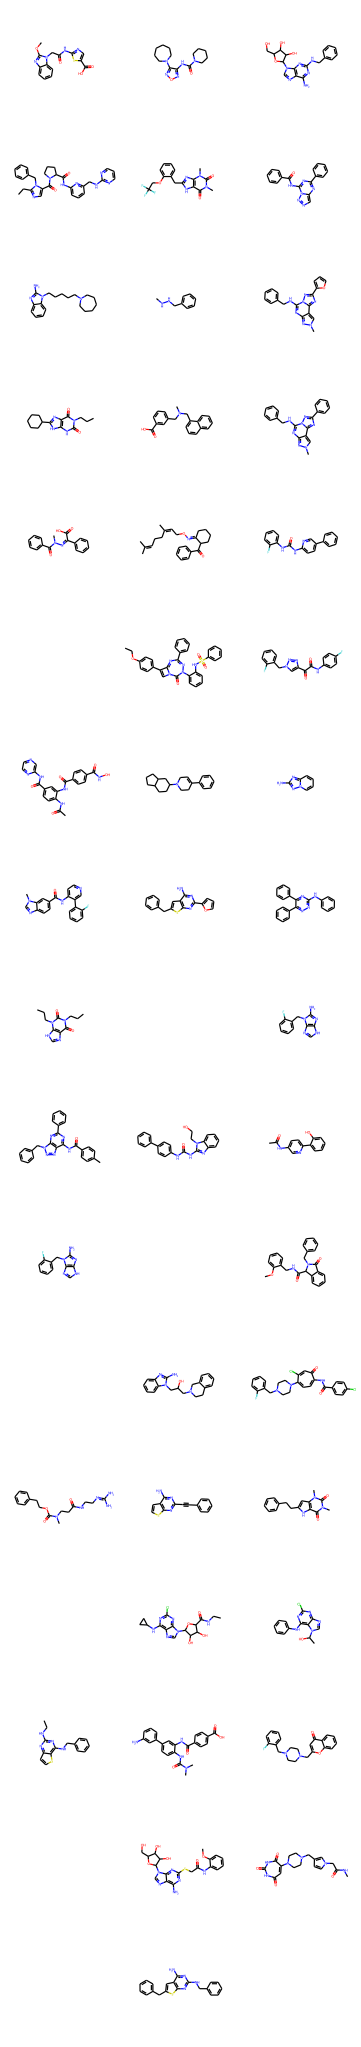

In [11]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in _ [:100]])

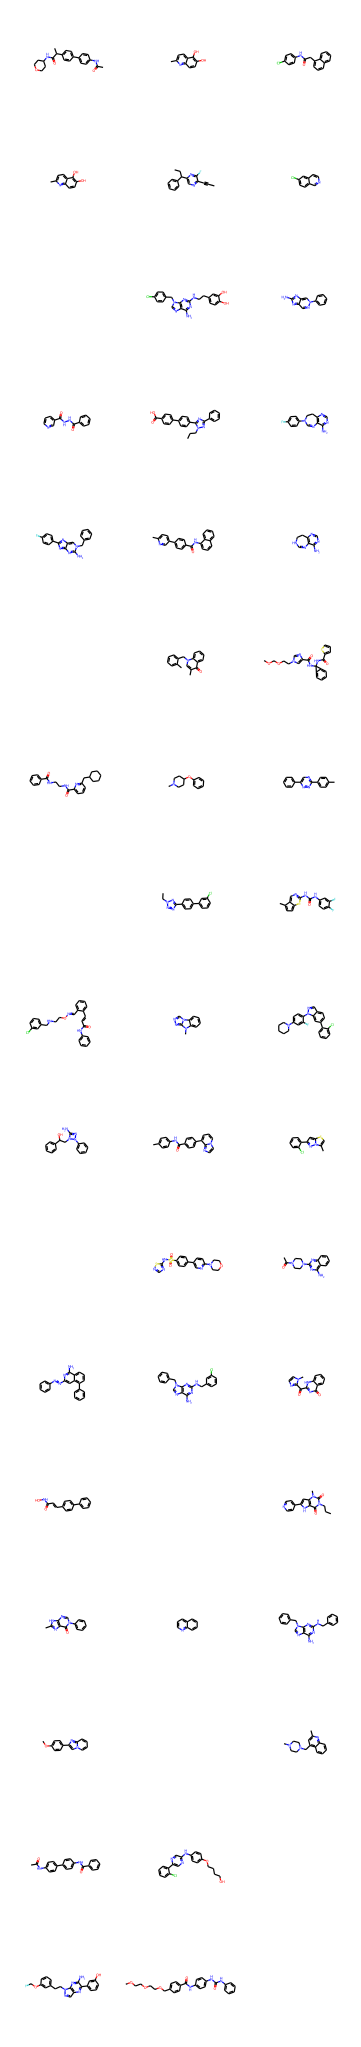

In [12]:
epoch_357_RL_OBJ4 = MODEL_PATH / "output/evolve_OBJ4_PR_220204_021831/evolve_PR_REG_OBJ4_1e-03.pkg"
rl_agent = Generator(voc)
rl_agent.load_state_dict(torch.load(epoch_357_RL_OBJ4))
seqs = rl_agent.sample(1000)
smiles = [voc.decode(s) for s in seqs]

_, valids = voc.check_smiles(seqs)
valid_perc = np.sum(valids) / 1000
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in _ [:100]])